### Tutorial Group: T02
### Student Name: Reuben Yap Jing Xiang
### Student Number: S10243134

In [1]:
# import the required packages
import numpy as np
import pandas as pd
import re

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats

## 1. HR Analytics

### 1.1 Load and Explore the data

In [2]:
# loading the hr dataset into a dataframe variable named "data"
data = pd.read_csv('hr_data.csv')

In [3]:
# Displaying first 5 rows
data.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [4]:
# View last 5 rows
data.tail()

employee_id         department     region         education gender  \
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
54803                 17              0            0                  78   
54804                  6              0            0                  56   
54805                  3              1            0                  79   
54806                  2              0            0                  45   
54807                  5              0            0                  49   

       is_promoted  
54803            0  
54804            0  
54805            0  
54806            0  
54807            0

#### Basic Summary of Dataset

In [5]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(data.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(data.size)   

(54808, 14)
767312


#### In-depth Overview of Dataset

In [6]:
# Viewing the number of items and data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


### Data Preprocessing

In [7]:
# It is a good practice to create a copy of the dataframe
data_bkup = data.copy()

### Identifying Variable Types 

#### Checking Data Types of Different Columns

In [8]:
# print variable types
print(data.dtypes)

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object


In [9]:
# Check the number of variables storing a partcular data type
data.dtypes.value_counts()

int64      8
object     5
float64    1
dtype: int64

### Quantifying Missing Data / Null Values

Missing data occurs when no data is stored for certain observations within a variable. In other words, missing data is the absence of values, and is a common occurrence in most data sets.

I will be quantifying and visualizing missing information in all variables.

In [10]:
# Check for null values in each column
data.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [11]:
# Check the number of null values in data
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Text(0.5, 1.0, 'Quantifying missing data')

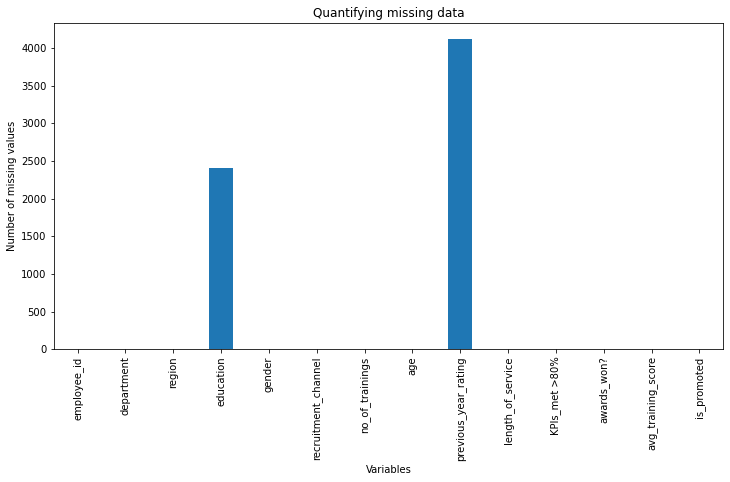

In [12]:
# Plotting the number of missing data utilising
# pandas plot.bar(), and add labels with matplotlib methods 

data.isnull().sum().plot.bar(figsize=(12,6))
plt.ylabel('Number of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

### Determining Cardinality

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [13]:
# Viewing the number of unique values in each variable
data.nunique()

# Note: nunique() ignores missing data by default

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [14]:
# To consider missing values as an additional category,
# we need to explicitly mention so, 
# passing the argument dropna=False

data.nunique(dropna=False)

employee_id             54808
department                  9
region                     34
education                   4
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        6
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

Text(0.5, 1.0, 'Cardinality')

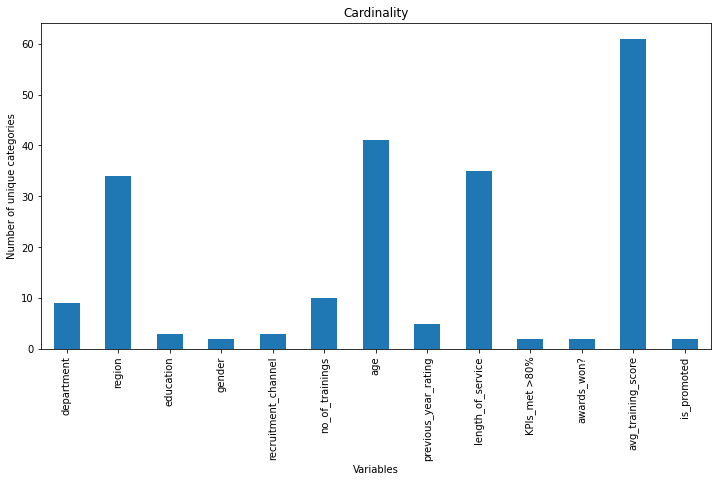

In [15]:
# Plotting cardinality of the variables (excluding employee_id variable)

# Because there are too many unique values in employee_id variable 
# which makes each of the other variables' bar (that shows the number of unique categories) not appear (i.e cannot be seen)

data[['department','region','education','gender','recruitment_channel','no_of_trainings','age',
      'previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score','is_promoted']
    ].nunique().plot.bar(figsize=(12,6))

# add labels and title
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

### Inspecting Unique Categories in Each Variable

In [16]:
# For Variable 'employee_id'
data['employee_id'].sort_values().unique()

array([    1,     2,     4, ..., 78296, 78297, 78298], dtype=int64)

In [17]:
# For Variable 'department'
data['department'].sort_values().unique()

array(['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
       'R&D', 'Sales & Marketing', 'Technology'], dtype=object)

In [18]:
# For Variable 'region'
data['region'].sort_values().unique()

array(['region_1', 'region_10', 'region_11', 'region_12', 'region_13',
       'region_14', 'region_15', 'region_16', 'region_17', 'region_18',
       'region_19', 'region_2', 'region_20', 'region_21', 'region_22',
       'region_23', 'region_24', 'region_25', 'region_26', 'region_27',
       'region_28', 'region_29', 'region_3', 'region_30', 'region_31',
       'region_32', 'region_33', 'region_34', 'region_4', 'region_5',
       'region_6', 'region_7', 'region_8', 'region_9'], dtype=object)

In [19]:
# For Variable 'education'
data['education'].sort_values().unique()

array(["Bachelor's", 'Below Secondary', "Master's & above", nan],
      dtype=object)

In [20]:
# For Variable 'gender'
data['gender'].sort_values().unique()

array(['f', 'm'], dtype=object)

In [21]:
# For Variable 'recruitment_channel'
data['recruitment_channel'].sort_values().unique()

array(['other', 'referred', 'sourcing'], dtype=object)

In [22]:
# For Variable 'no_of_trainings'
data['no_of_trainings'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [23]:
# For Variable 'age'
data['age'].sort_values().unique()

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60], dtype=int64)

In [24]:
# For Variable 'previous_year_rating'
data['previous_year_rating'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

In [25]:
# For Variable 'length_of_service'
data['length_of_service'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       37], dtype=int64)

In [26]:
# For Variable 'KPIs_met >80%'
data['KPIs_met >80%'].sort_values().unique()

array([0, 1], dtype=int64)

In [27]:
# For Variable 'awards_won?'
data['awards_won?'].sort_values().unique()

array([0, 1], dtype=int64)

In [28]:
# For Variable 'avg_training_score'
data['avg_training_score'].sort_values().unique()

array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

In [29]:
# For Variable 'is_promoted'
data['is_promoted'].sort_values().unique()

array([0, 1], dtype=int64)

### Types of Data in Dataset

### Numerical Data

In [30]:
# Selecting Numerical Data from 'data', then display first 5 rows
data_num = data.select_dtypes(['int64', 'float64']).copy()
data_num.head()

employee_id  no_of_trainings  age  previous_year_rating  length_of_service  \
0        65438                1   35                   5.0                  8   
1        65141                1   30                   5.0                  4   
2         7513                1   34                   3.0                  7   
3         2542                2   39                   1.0                 10   
4        48945                1   45                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1            0                  49            0  
1              0            0                  60            0  
2              0            0                  50            0  
3              0            0                  50            0  
4              0            0                  73            0

In [31]:
# Viewing the five-number summary of numerical variables
data_num.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  54808.000000     54808.000000  54808.000000          50684.000000   
mean   39195.830627         1.253011     34.803915              3.329256   
std    22586.581449         0.609264      7.660169              1.259993   
min        1.000000         1.000000     20.000000              1.000000   
25%    19669.750000         1.000000     29.000000              3.000000   
50%    39225.500000         1.000000     33.000000              3.000000   
75%    58730.500000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       54808.000000   54808.000000  54808.000000        54808.000000   
mean            5.865512       0.351974      0.023172           63.386750   
std             4.265094       0.477590      0.150450           13.371559   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

#### Distinguishing Numerical Variable Distributions

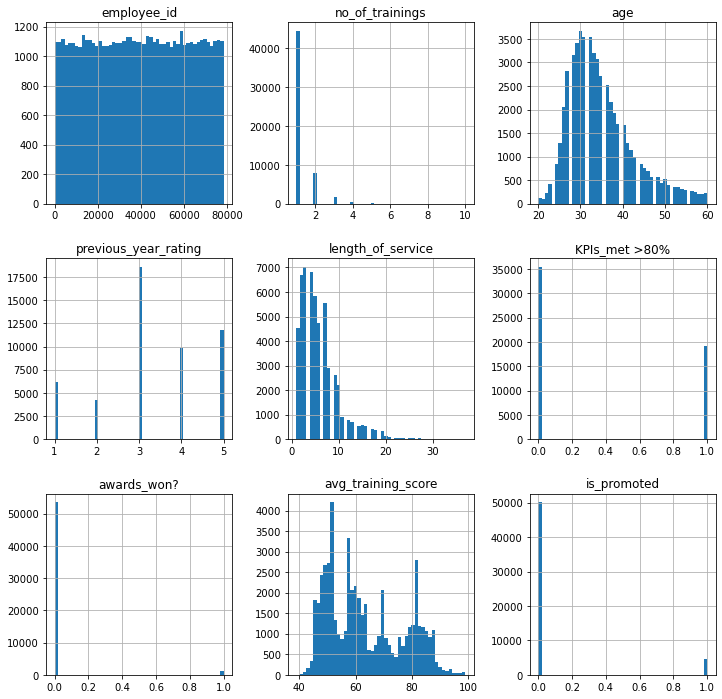

In [32]:
data_num.hist(bins=50, figsize=(12, 12))
plt.show()

#### Visualizing each Numerical Variable

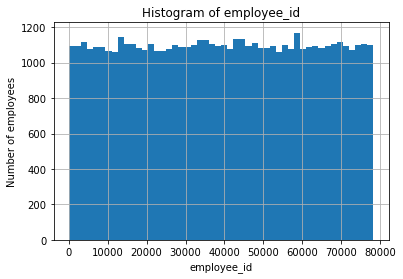

In [33]:
# employee_id variable

plt.hist(data_num['employee_id'].dropna(), bins=50)
plt.xlabel('employee_id')
plt.ylabel('Number of employees') 
plt.title('Histogram of employee_id')
plt.grid(True)

plt.show()

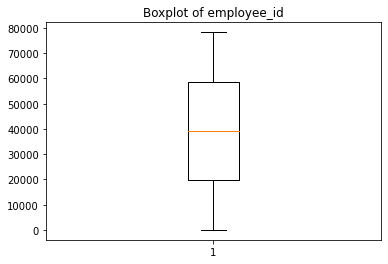

In [34]:
plt.boxplot(data_num['employee_id'].dropna())
plt.title('Boxplot of employee_id')

plt.show()

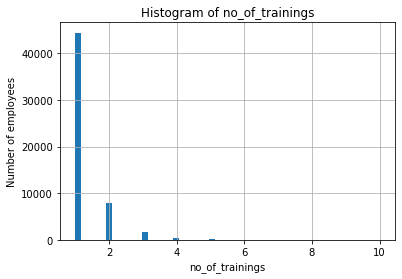

In [35]:
# no_of_trainings variable

plt.hist(data_num['no_of_trainings'].dropna(), bins=50)
plt.xlabel('no_of_trainings')
plt.ylabel('Number of employees') 
plt.title('Histogram of no_of_trainings')
plt.grid(True)

plt.show()

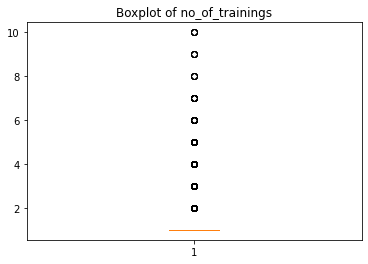

In [36]:
plt.boxplot(data_num['no_of_trainings'].dropna())
plt.title('Boxplot of no_of_trainings')

plt.show()

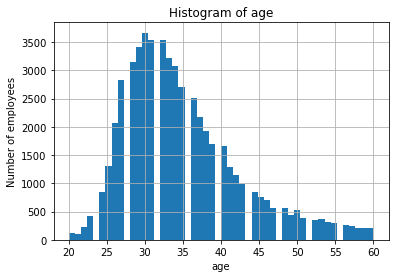

In [37]:
# age variable

plt.hist(data_num['age'].dropna(), bins=50)
plt.xlabel('age')
plt.ylabel('Number of employees') 
plt.title('Histogram of age')
plt.grid(True)

plt.show()

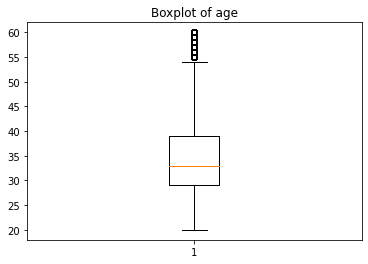

In [38]:
plt.boxplot(data_num['age'].dropna())
plt.title('Boxplot of age')

plt.show()

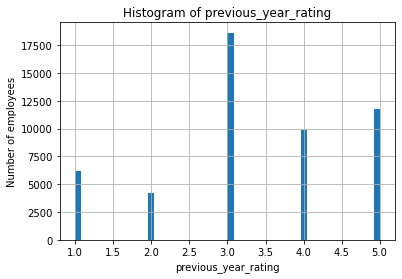

In [39]:
# previous_year_rating variable

plt.hist(data_num['previous_year_rating'].dropna(), bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Number of employees') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

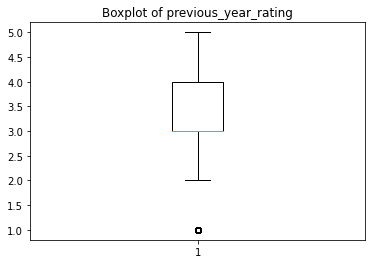

In [40]:
plt.boxplot(data_num['previous_year_rating'].dropna())
plt.title('Boxplot of previous_year_rating')

plt.show()

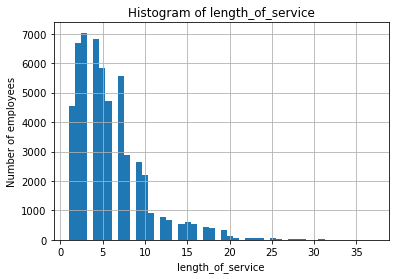

In [41]:
# length_of_service variable

plt.hist(data_num['length_of_service'].dropna(), bins=50)
plt.xlabel('length_of_service')
plt.ylabel('Number of employees') 
plt.title('Histogram of length_of_service')
plt.grid(True)

plt.show()

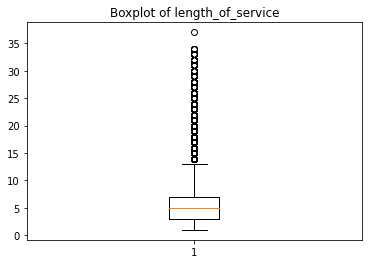

In [42]:
plt.boxplot(data_num['length_of_service'].dropna())
plt.title('Boxplot of length_of_service')

plt.show()

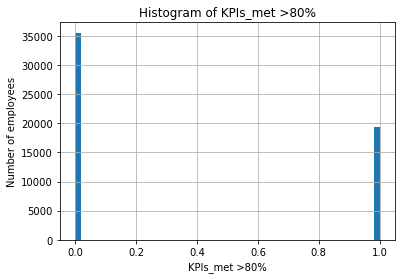

In [43]:
# KPIs_met >80% variable

plt.hist(data_num['KPIs_met >80%'].dropna(), bins=50)
plt.xlabel('KPIs_met >80%')
plt.ylabel('Number of employees') 
plt.title('Histogram of KPIs_met >80%')
plt.grid(True)

plt.show()

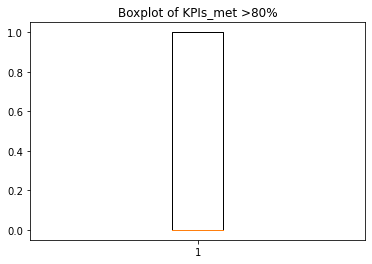

In [44]:
plt.boxplot(data_num['KPIs_met >80%'].dropna())
plt.title('Boxplot of KPIs_met >80%')

plt.show()

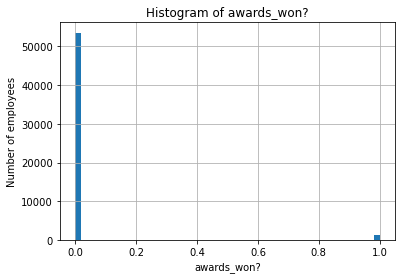

In [45]:
# awards_won? variable

plt.hist(data_num['awards_won?'].dropna(), bins=50)
plt.xlabel('awards_won?')
plt.ylabel('Number of employees') 
plt.title('Histogram of awards_won?')
plt.grid(True)

plt.show()

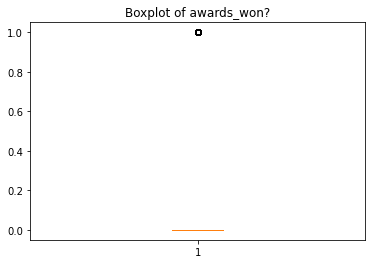

In [46]:
plt.boxplot(data_num['awards_won?'].dropna())
plt.title('Boxplot of awards_won?')

plt.show()

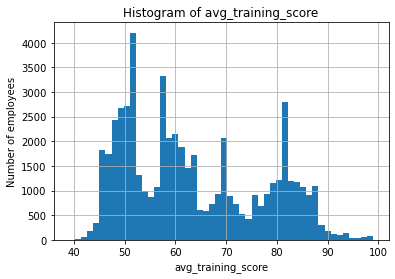

In [47]:
# avg_training_score variable

plt.hist(data_num['avg_training_score'].dropna(), bins=50)
plt.xlabel('avg_training_score')
plt.ylabel('Number of employees') 
plt.title('Histogram of avg_training_score')
plt.grid(True)

plt.show()

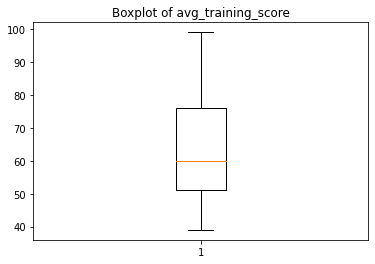

In [48]:
plt.boxplot(data_num['avg_training_score'].dropna())
plt.title('Boxplot of avg_training_score')

plt.show()

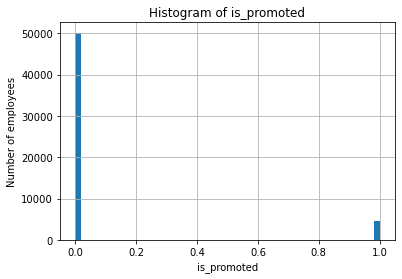

In [49]:
# is_promoted variable

plt.hist(data_num['is_promoted'].dropna(), bins=50)
plt.xlabel('is_promoted')
plt.ylabel('Number of employees') 
plt.title('Histogram of is_promoted')
plt.grid(True)

plt.show()

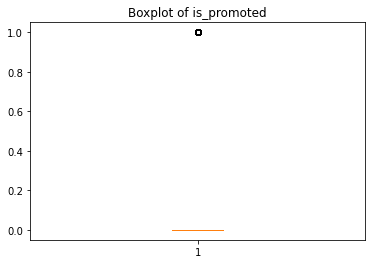

In [50]:
plt.boxplot(data_num['is_promoted'].dropna())
plt.title('Boxplot of is_promoted')

plt.show()

#### Observing the relationship between each Numerical Variable (except employee_id) and the Target Variable (is_promoted)

#### no_of_trainings variable

Text(0.5, 1.0, 'is_promoted vs. no_of_trainings')

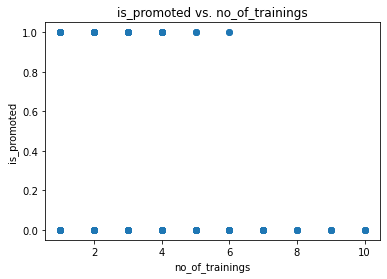

In [51]:
# is_promoted vs. no_of_trainings
plt.scatter(data['no_of_trainings'], data['is_promoted'])
plt.xlabel('no_of_trainings')
plt.ylabel('is_promoted')
plt.title('is_promoted vs. no_of_trainings')

In [52]:
# no_of_trainings vs. is_promoted
data.groupby('no_of_trainings').is_promoted.mean()

no_of_trainings
1     0.088107
2     0.075748
3     0.068694
4     0.055556
5     0.023438
6     0.045455
7     0.000000
8     0.000000
9     0.000000
10    0.000000
Name: is_promoted, dtype: float64

Text(0, 0.5, 'is_promoted')

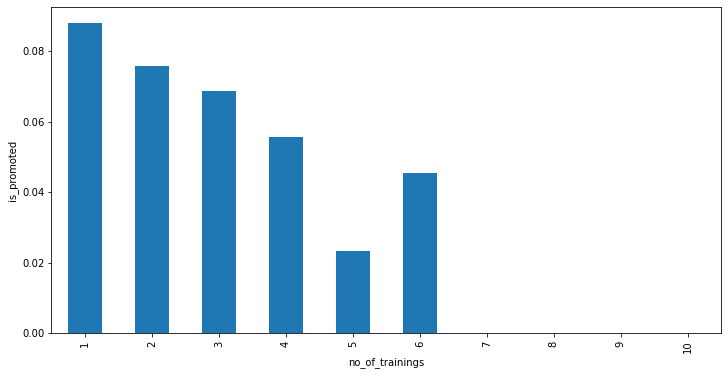

In [53]:
data.groupby('no_of_trainings').is_promoted.mean().plot.bar(figsize=(12,6))
plt.ylabel('is_promoted')

#### age variable

Text(0.5, 1.0, 'is_promoted vs. age')

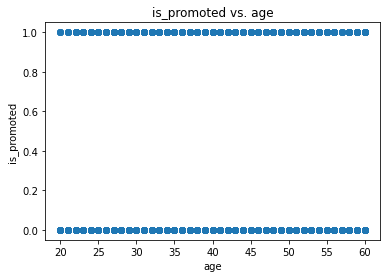

In [54]:
# is_promoted vs. age
plt.scatter(data['age'], data['is_promoted'])
plt.xlabel('age')
plt.ylabel('is_promoted')
plt.title('is_promoted vs. age')

In [55]:
# age vs. is_promoted
data.groupby('age').is_promoted.mean()

age
20    0.035398
21    0.051020
22    0.077922
23    0.079439
24    0.082840
25    0.053118
26    0.079126
27    0.092324
28    0.097871
29    0.086344
30    0.088404
31    0.087719
32    0.084041
33    0.099377
34    0.092978
35    0.104390
36    0.082638
37    0.084988
38    0.095684
39    0.094985
40    0.076368
41    0.080683
42    0.079199
43    0.077621
44    0.082645
45    0.063158
46    0.061693
47    0.048474
48    0.078995
49    0.074830
50    0.059501
51    0.087404
52    0.079772
53    0.038462
54    0.076677
55    0.061224
56    0.079545
57    0.021008
58    0.075117
59    0.081340
60    0.064516
Name: is_promoted, dtype: float64

Text(0, 0.5, 'is_promoted')

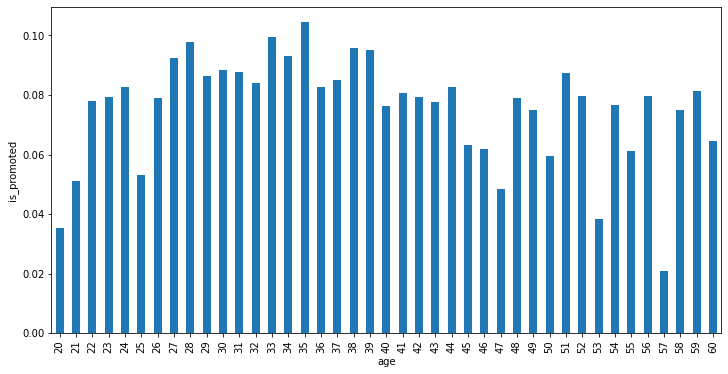

In [56]:
data.groupby('age').is_promoted.mean().plot.bar(figsize=(12,6))
plt.ylabel('is_promoted')

#### previous_year_rating variable

Text(0.5, 1.0, 'is_promoted vs. previous_year_rating')

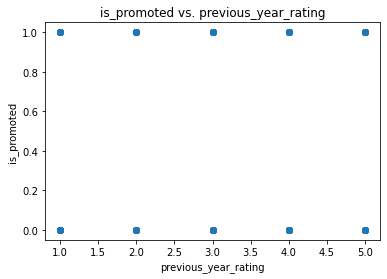

In [57]:
# is_promoted vs. previous_year_rating
plt.scatter(data['previous_year_rating'], data['is_promoted'])
plt.xlabel('previous_year_rating')
plt.ylabel('is_promoted')
plt.title('is_promoted vs. previous_year_rating')

In [58]:
# previous_year_rating vs. is_promoted
data.groupby('previous_year_rating').is_promoted.mean()

previous_year_rating
1.0    0.014141
2.0    0.042840
3.0    0.072779
4.0    0.079376
5.0    0.163615
Name: is_promoted, dtype: float64

Text(0, 0.5, 'is_promoted')

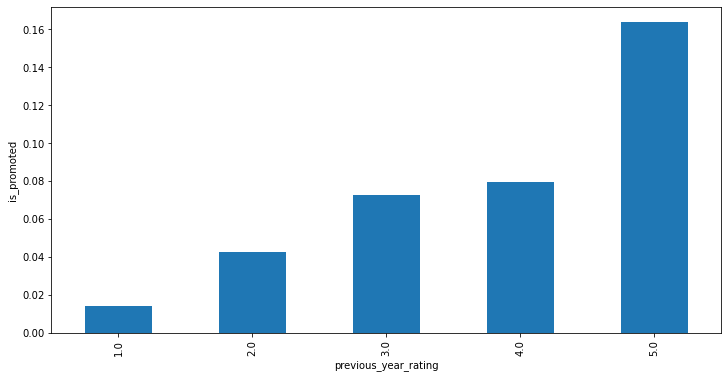

In [59]:
data.groupby('previous_year_rating').is_promoted.mean().plot.bar(figsize=(12,6))
plt.ylabel('is_promoted')

#### length_of_service variable

Text(0.5, 1.0, 'is_promoted vs. length_of_service')

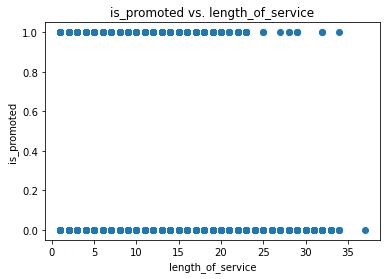

In [60]:
# is_promoted vs. length_of_service
plt.scatter(data['length_of_service'], data['is_promoted'])
plt.xlabel('length_of_service')
plt.ylabel('is_promoted')
plt.title('is_promoted vs. length_of_service')

In [61]:
# length_of_service vs. is_promoted
data.groupby('length_of_service').is_promoted.mean()

length_of_service
1     0.082912
2     0.089019
3     0.086592
4     0.087478
5     0.081447
6     0.084706
7     0.083589
8     0.093306
9     0.087105
10    0.093023
11    0.104803
12    0.079345
13    0.078603
14    0.052823
15    0.072513
16    0.074818
17    0.060185
18    0.063776
19    0.097264
20    0.078125
21    0.051282
22    0.098361
23    0.107692
24    0.000000
25    0.039216
26    0.000000
27    0.027778
28    0.066667
29    0.100000
30    0.000000
31    0.000000
32    0.200000
33    0.000000
34    0.250000
37    0.000000
Name: is_promoted, dtype: float64

Text(0, 0.5, 'is_promoted')

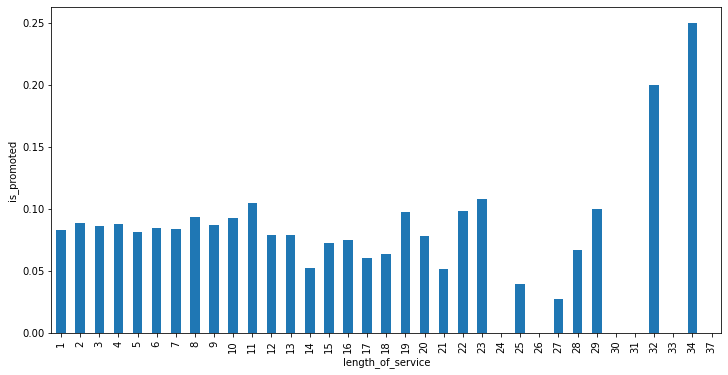

In [62]:
data.groupby('length_of_service').is_promoted.mean().plot.bar(figsize=(12,6))
plt.ylabel('is_promoted')

#### KPIs_met >80% variable

Text(0.5, 1.0, 'is_promoted vs. KPIs_met >80%')

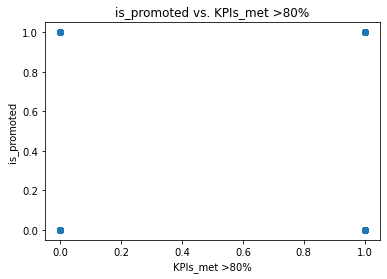

In [63]:
# is_promoted vs. KPIs_met >80%
plt.scatter(data['KPIs_met >80%'], data['is_promoted'])
plt.xlabel('KPIs_met >80%')
plt.ylabel('is_promoted')
plt.title('is_promoted vs. KPIs_met >80%')

In [64]:
# KPIs_met >80% vs. is_promoted
data.groupby('KPIs_met >80%').is_promoted.mean()

KPIs_met >80%
0    0.039587
1    0.169094
Name: is_promoted, dtype: float64

Text(0, 0.5, 'is_promoted')

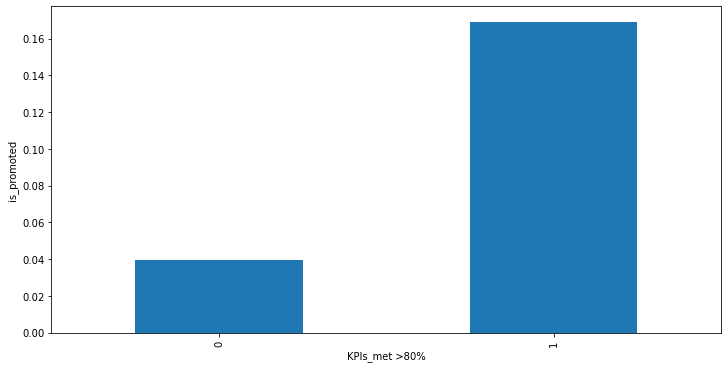

In [65]:
data.groupby('KPIs_met >80%').is_promoted.mean().plot.bar(figsize=(12,6))
plt.ylabel('is_promoted')

#### awards_won? variable

Text(0.5, 1.0, 'is_promoted vs. awards_won?')

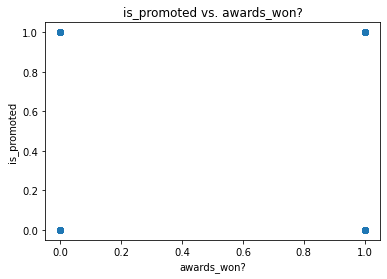

In [66]:
# is_promoted vs. awards_won?
plt.scatter(data['awards_won?'], data['is_promoted'])
plt.xlabel('awards_won?')
plt.ylabel('is_promoted')
plt.title('is_promoted vs. awards_won?')

In [67]:
# awards_won? vs. is_promoted
data.groupby('awards_won?').is_promoted.mean()

awards_won?
0    0.076749
1    0.440157
Name: is_promoted, dtype: float64

Text(0, 0.5, 'is_promoted')

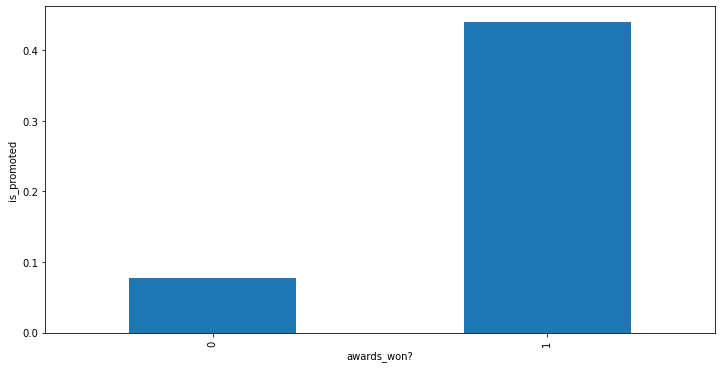

In [68]:
data.groupby('awards_won?').is_promoted.mean().plot.bar(figsize=(12,6))
plt.ylabel('is_promoted')

#### avg_training_score variable

Text(0.5, 1.0, 'is_promoted vs. avg_training_score')

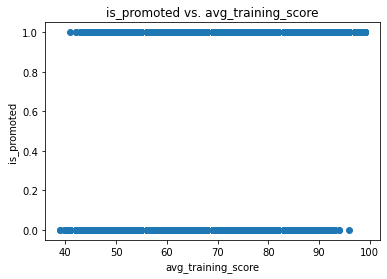

In [69]:
# is_promoted vs. avg_training_score
plt.scatter(data['avg_training_score'], data['is_promoted'])
plt.xlabel('avg_training_score')
plt.ylabel('is_promoted')
plt.title('is_promoted vs. avg_training_score')

In [70]:
# avg_training_score vs. is_promoted
data.groupby('avg_training_score').is_promoted.mean()

avg_training_score
39    0.000000
40    0.000000
41    0.038462
42    0.032258
43    0.039773
        ...   
95    1.000000
96    0.979167
97    1.000000
98    1.000000
99    1.000000
Name: is_promoted, Length: 61, dtype: float64

Text(0, 0.5, 'is_promoted')

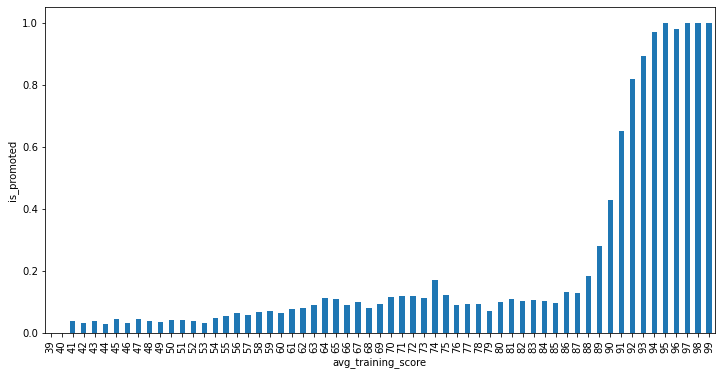

In [71]:
data.groupby('avg_training_score').is_promoted.mean().plot.bar(figsize=(12,6))
plt.ylabel('is_promoted')

### Categorical Data

In [72]:
# Selecting Categorical Data from 'data', then display first 5 rows.
data_cat = data.select_dtypes(['object']).copy()
data_cat.head()

department     region         education gender recruitment_channel
0  Sales & Marketing   region_7  Master's & above      f            sourcing
1         Operations  region_22        Bachelor's      m               other
2  Sales & Marketing  region_19        Bachelor's      m            sourcing
3  Sales & Marketing  region_23        Bachelor's      m               other
4         Technology  region_26        Bachelor's      m               other

In [73]:
# Describing Categorical Variables
data_cat.describe()

department    region   education gender recruitment_channel
count               54808     54808       52399  54808               54808
unique                  9        34           3      2                   3
top     Sales & Marketing  region_2  Bachelor's      m               other
freq                16840     12343       36669  38496               30446

In [74]:
# Viewing the number of unique categories in each Categorical Variable
data_cat.nunique()

department              9
region                 34
education               3
gender                  2
recruitment_channel     3
dtype: int64

#### Barplot of each Categorical Variable

In [75]:
# department variable

data_cat.department.value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

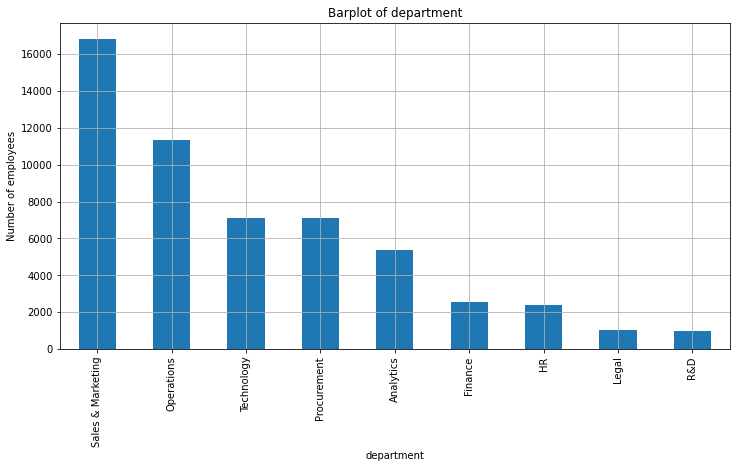

In [76]:
data_cat.department.value_counts().plot.bar(figsize=(12,6))
plt.xlabel('department')
plt.ylabel('Number of employees')
plt.title('Barplot of department')
plt.grid(True)
plt.show()

In [77]:
# region variable

data_cat.region.value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

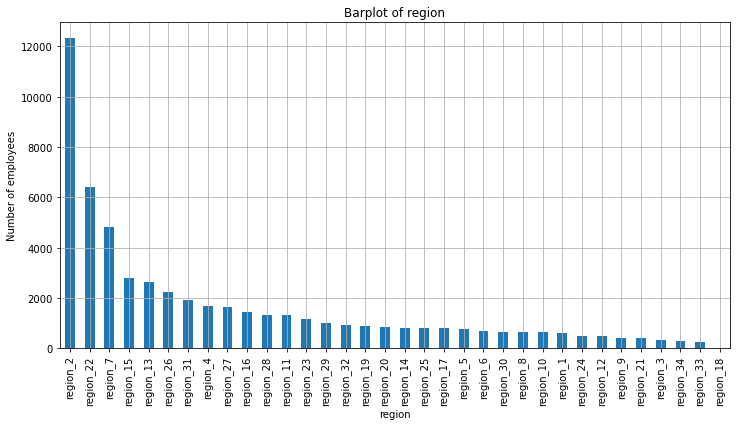

In [78]:
data_cat.region.value_counts().plot.bar(figsize=(12,6))
plt.xlabel('region')
plt.ylabel('Number of employees')
plt.title('Barplot of region')
plt.grid(True)
plt.show()

In [79]:
# education variable

data_cat.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

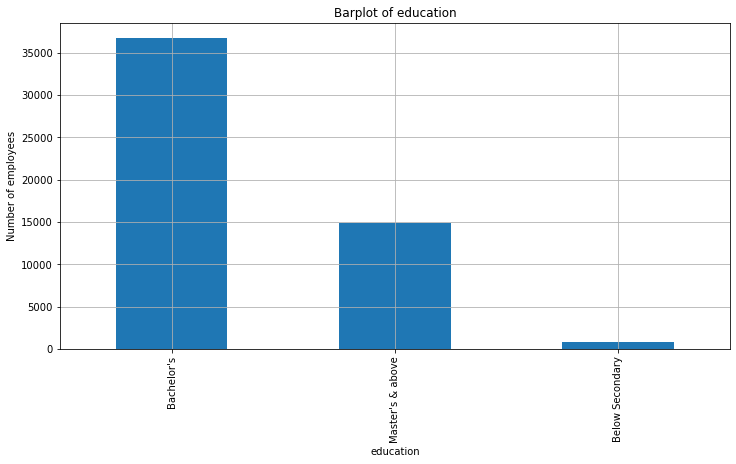

In [80]:
data_cat.education.value_counts().plot.bar(figsize=(12,6))
plt.xlabel('education')
plt.ylabel('Number of employees')
plt.title('Barplot of education')
plt.grid(True)
plt.show()

In [81]:
# gender variable

data_cat.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

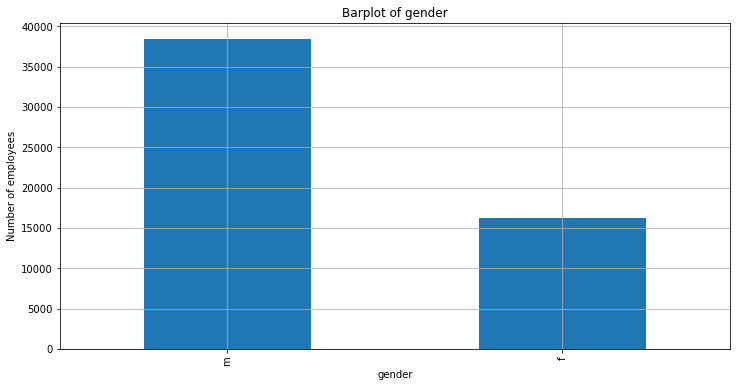

In [82]:
data_cat.gender.value_counts().plot.bar(figsize=(12,6))
plt.xlabel('gender')
plt.ylabel('Number of employees')
plt.title('Barplot of gender')
plt.grid(True)
plt.show()

In [83]:
# recruitment_channel variable

data_cat.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

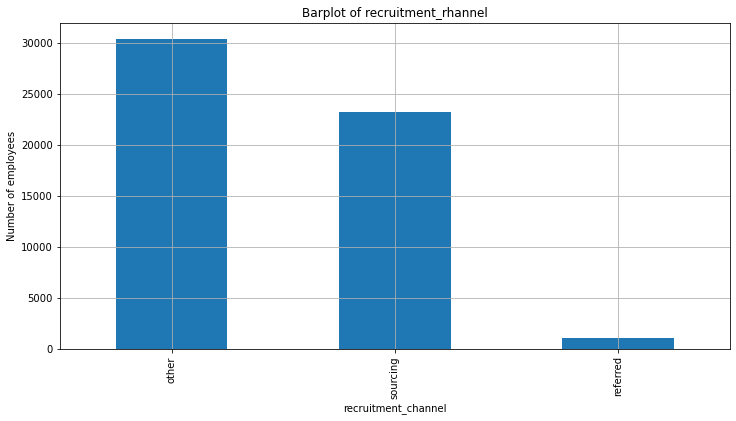

In [84]:
data_cat.recruitment_channel.value_counts().plot.bar(figsize=(12,6))
plt.xlabel('recruitment_channel')
plt.ylabel('Number of employees')
plt.title('Barplot of recruitment_rhannel')
plt.grid(True)
plt.show()

#### Identifying Rare Categories in each Categorical Variable

In [85]:
# department variable

In [86]:
# Calculating frequency for each category

# first we calculate the total number of employees in the dataset
total_employees = len(data)
print('Total number of employees {}'.format(total_employees))

# then we calculate label frequency
# value_counts() counts the number of employees per label
# by dividing by total employees we obtain the frequency

label_freq = data_cat.department.value_counts() / total_employees

# let's inspect the frequency of the labels
label_freq

Total number of employees 54808


Sales & Marketing    0.307254
Operations           0.207050
Technology           0.130236
Procurement          0.130236
Analytics            0.097650
Finance              0.046271
HR                   0.044118
Legal                0.018957
R&D                  0.018227
Name: department, dtype: float64

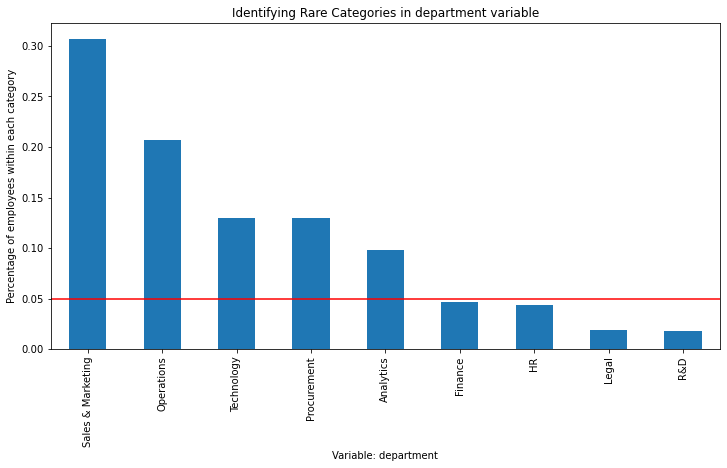

In [87]:
# Making plot with the category frequencies
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12,6))

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('Percentage of employees within each category')
fig.set_xlabel('Variable: department')
fig.set_title('Identifying Rare Categories in department variable')
plt.show()

In [88]:
# region variable

In [89]:
# Calculating frequency for each category

# first we calculate the total number of employees in the dataset
total_employees = len(data)
print('Total number of employees {}'.format(total_employees))

# then we calculate label frequency
# value_counts() counts the number of employees per label
# by dividing by total employees we obtain the frequency

label_freq = data_cat.region.value_counts() / total_employees

# let's inspect the frequency of the labels
label_freq

Total number of employees 54808


region_2     0.225204
region_22    0.117282
region_7     0.088363
region_15    0.051233
region_13    0.048314
region_26    0.041235
region_31    0.035305
region_4     0.031072
region_27    0.030269
region_16    0.026730
region_28    0.024048
region_11    0.023993
region_23    0.021438
region_29    0.018136
region_32    0.017242
region_19    0.015947
region_20    0.015509
region_14    0.015089
region_25    0.014943
region_17    0.014523
region_5     0.013976
region_6     0.012589
region_30    0.011987
region_8     0.011951
region_10    0.011823
region_1     0.011130
region_24    0.009269
region_12    0.009123
region_9     0.007663
region_21    0.007499
region_3     0.006313
region_34    0.005328
region_33    0.004908
region_18    0.000566
Name: region, dtype: float64

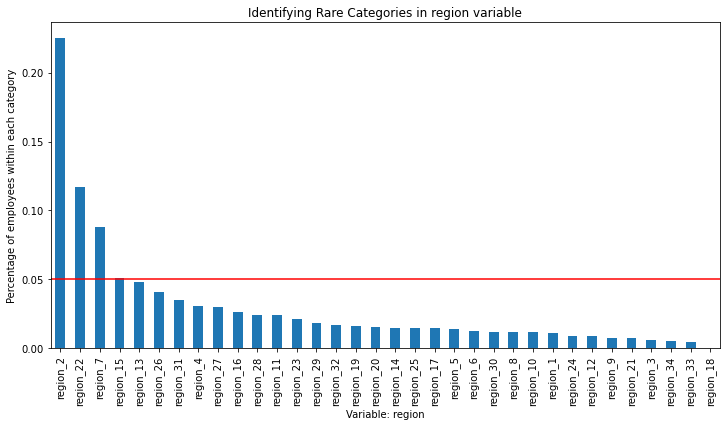

In [90]:
# Making plot with the category frequencies
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12,6))

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('Percentage of employees within each category')
fig.set_xlabel('Variable: region')
fig.set_title('Identifying Rare Categories in region variable')
plt.show()

In [91]:
# education variable

In [92]:
# Calculating frequency for each category

# first we calculate the total number of employees in the dataset
total_employees = len(data)
print('Total number of employees {}'.format(total_employees))

# then we calculate label frequency
# value_counts() counts the number of employees per label
# by dividing by total employees we obtain the frequency

label_freq = data_cat.education.value_counts() / total_employees

# let's inspect the frequency of the labels
label_freq

Total number of employees 54808


Bachelor's          0.669045
Master's & above    0.272314
Below Secondary     0.014688
Name: education, dtype: float64

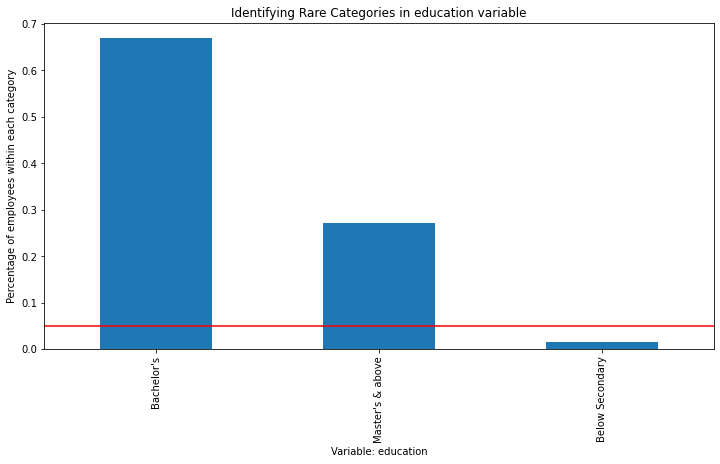

In [93]:
# Making plot with the category frequencies
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12,6))

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('Percentage of employees within each category')
fig.set_xlabel('Variable: education')
fig.set_title('Identifying Rare Categories in education variable')
plt.show()

In [94]:
# gender variable

In [95]:
# Calculating frequency for each category

# first we calculate the total number of employees in the dataset
total_employees = len(data)
print('Total number of employees {}'.format(total_employees))

# then we calculate label frequency
# value_counts() counts the number of employees per label
# by dividing by total employees we obtain the frequency

label_freq = data_cat.gender.value_counts() / total_employees

# let's inspect the frequency of the labels
label_freq

Total number of employees 54808


m    0.702379
f    0.297621
Name: gender, dtype: float64

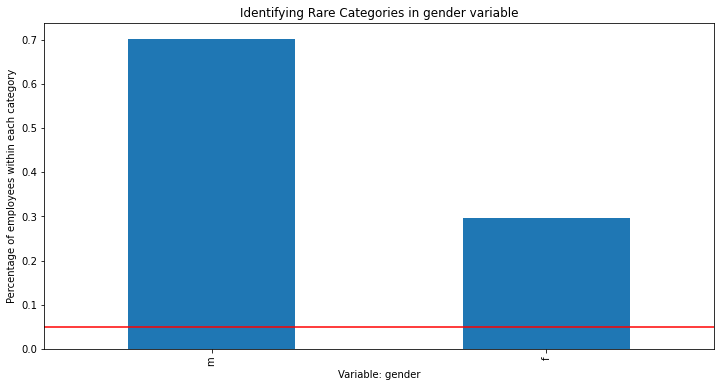

In [96]:
# Making plot with the category frequencies
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12,6))

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('Percentage of employees within each category')
fig.set_xlabel('Variable: gender')
fig.set_title('Identifying Rare Categories in gender variable')
plt.show()

In [97]:
# recruitment_channel variable

In [98]:
# Calculating frequency for each category

# first we calculate the total number of employees in the dataset
total_employees = len(data)
print('Total number of employees {}'.format(total_employees))

# then we calculate label frequency
# value_counts() counts the number of employees per label
# by dividing by total employees we obtain the frequency

label_freq = data_cat.recruitment_channel.value_counts() / total_employees

# let's inspect the frequency of the labels
label_freq

Total number of employees 54808


other       0.555503
sourcing    0.423661
referred    0.020836
Name: recruitment_channel, dtype: float64

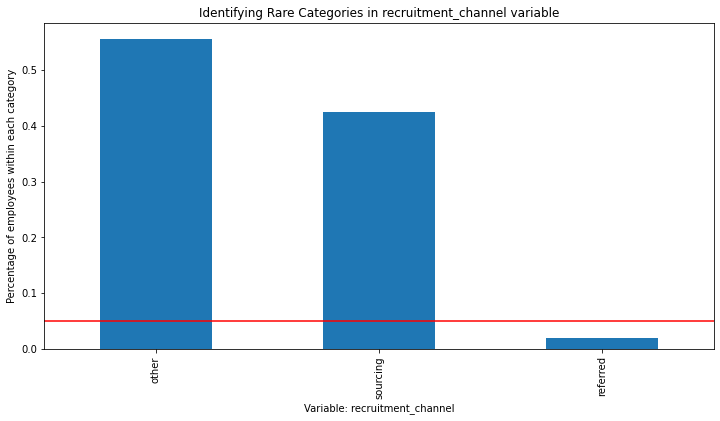

In [99]:
# Making plot with the category frequencies
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12,6))

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('Percentage of employees within each category')
fig.set_xlabel('Variable: recruitment_channel')
fig.set_title('Identifying Rare Categories in recruitment_channel variable')
plt.show()

#### Observing the relationship between each Categorical Variable and the Target Variable (is_promoted)

In [100]:
# department vs. is_promoted
data.groupby('department').is_promoted.mean()

department
Analytics            0.095665
Finance              0.081230
HR                   0.056245
Legal                0.051011
Operations           0.090148
Procurement          0.096386
R&D                  0.069069
Sales & Marketing    0.072031
Technology           0.107593
Name: is_promoted, dtype: float64

Text(0, 0.5, 'is_promoted')

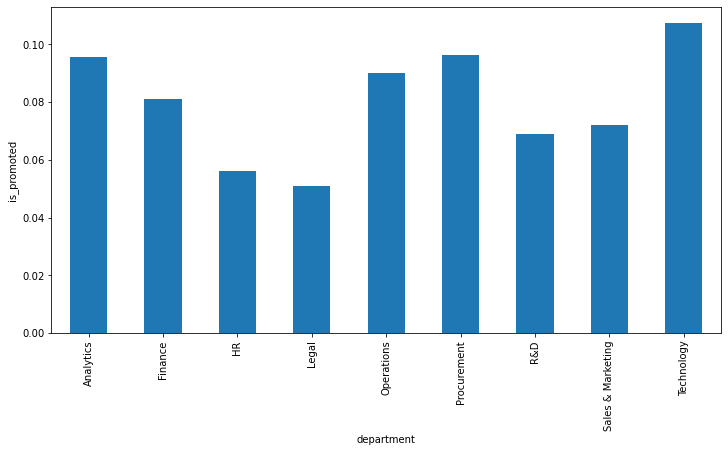

In [101]:
data.groupby('department').is_promoted.mean().plot.bar(figsize=(12,6))
plt.ylabel('is_promoted')

In [102]:
# region vs. is_promoted
data.groupby('region').is_promoted.mean()

region
region_1     0.095082
region_10    0.078704
region_11    0.056274
region_12    0.066000
region_13    0.086858
region_14    0.074970
region_15    0.079060
region_16    0.069625
region_17    0.136935
region_18    0.032258
region_19    0.060641
region_2     0.080126
region_20    0.057647
region_21    0.043796
region_22    0.114188
region_23    0.116596
region_24    0.035433
region_25    0.125763
region_26    0.063274
region_27    0.078963
region_28    0.116844
region_29    0.043260
region_3     0.106936
region_30    0.089802
region_31    0.056848
region_32    0.042328
region_33    0.037175
region_34    0.027397
region_4     0.144451
region_5     0.045692
region_6     0.046377
region_7     0.106546
region_8     0.080916
region_9     0.019048
Name: is_promoted, dtype: float64

Text(0, 0.5, 'is_promoted')

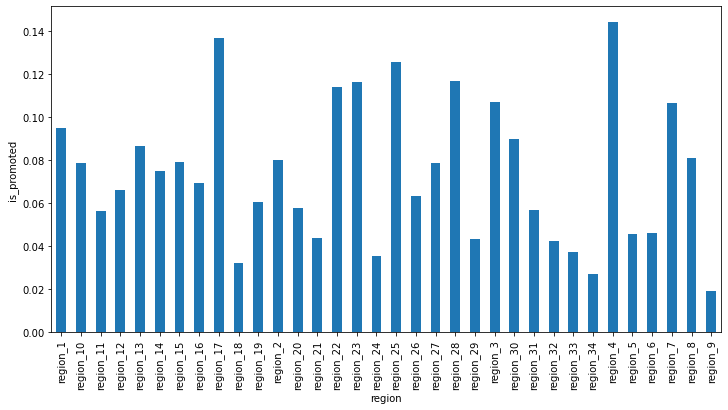

In [103]:
data.groupby('region').is_promoted.mean().plot.bar(figsize=(12,6))
plt.ylabel('is_promoted')

In [104]:
# education vs. is_promoted
data.groupby('education').is_promoted.mean()

education
Bachelor's          0.082031
Below Secondary     0.083230
Master's & above    0.098559
Name: is_promoted, dtype: float64

Text(0, 0.5, 'is_promoted')

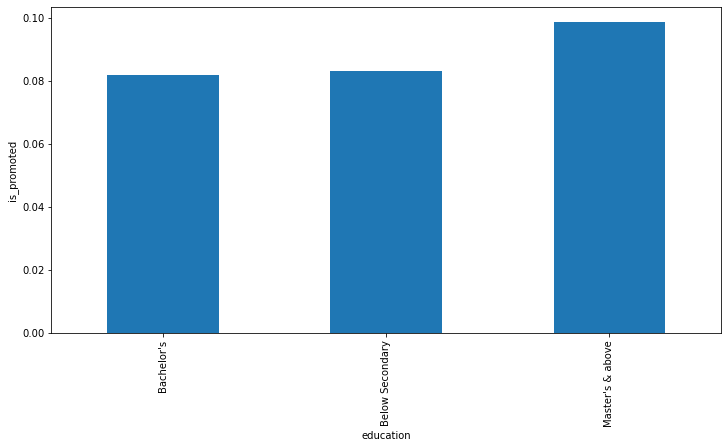

In [105]:
data.groupby('education').is_promoted.mean().plot.bar(figsize=(12,6))
plt.ylabel('is_promoted')

In [106]:
# gender vs. is_promoted
data.groupby('gender').is_promoted.mean()

gender
f    0.089934
m    0.083151
Name: is_promoted, dtype: float64

Text(0, 0.5, 'is_promoted')

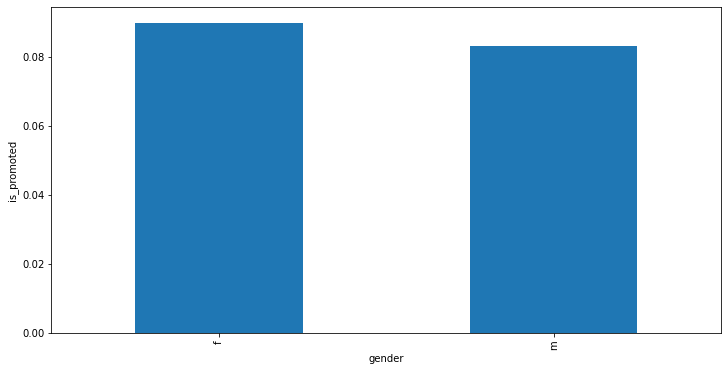

In [107]:
data.groupby('gender').is_promoted.mean().plot.bar(figsize=(12,6))
plt.ylabel('is_promoted')

In [108]:
# recruitment_channel vs. is_promoted
data.groupby('recruitment_channel').is_promoted.mean()

recruitment_channel
other       0.083952
referred    0.120841
sourcing    0.085013
Name: is_promoted, dtype: float64

Text(0, 0.5, 'is_promoted')

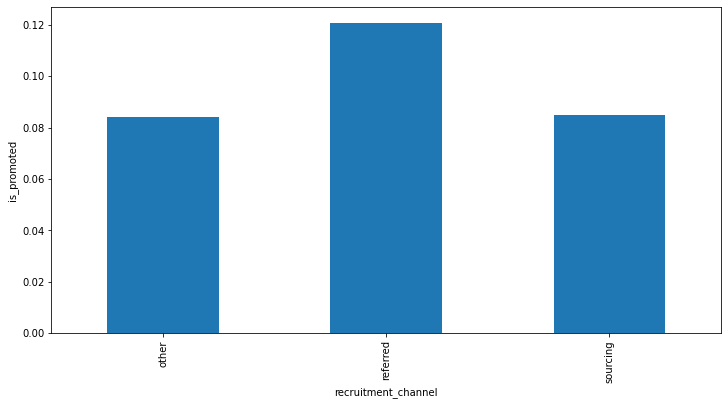

In [109]:
data.groupby('recruitment_channel').is_promoted.mean().plot.bar(figsize=(12,6))
plt.ylabel('is_promoted')

### 1.2 Cleanse and Transform the data

### 1.2.1. Missing Values

Missing Values are data that is not stored for certain observations within a variable. In other words, Missing Values is the absence of values, and is a common occurrence in most data sets.

It is necessary to handle Missing Values because...

1. Missing Values is not permitted by most data sources
2. Missing Values may also cause problems for many data transformation & feature engineering techniques

#### Checking for Missing Values

In order to deal with Missing Values, we need to first check for null values in all variables. The steps on the checking of null values below are done earlier in Quantifying Missing Data / Null Values section and are repeated for the ease of viewing. 

In [110]:
# View number of items and data type of each column (Done in Section 1.1 -> In-depth Overview of Dataset)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [111]:
# Check for null values in each column (Done in Section 1.1 -> Quantifying Missing Data / Null Values)
data.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [112]:
# Check the number of null values in data (Done in Section 1.1 -> Quantifying Missing Data / Null Values)
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

### Are there any Missing Values?

From the results above, there are 2 variables with missing values:

1. education (Categorical Variable) (2409 null values)


2. previous_year_rating (Numerical Variable) (4124 null values)

### Handling Missing Values in education Variable (Categorical Variable)

Since education variable is a categorical variable, there are 4 methods to handle missing values in a Categorical Variable. 

### Method 1: Removing Observations with Missing Data

Complete Case Analysis (CCA), also called list-wise deletion of cases, consists of discarding those observations where the values in any of the variables are missing. CCA can be applied to categorical and numerical variables. CCA is quick and easy to implement and has the advantage that it preserves the distribution of the variables, provided the data is missing at random and only a small proportion of the data is missing. However, if data is missing across many variables, CCA may lead to the removal of a big portion of the dataset.

In [113]:
# make a copy of the dataframe to store the result for this method of handling missing values in education variable

data_impute_mtd_1 = data.copy()

In [114]:
# create a complete case data set, indicate the variable "education" that we would like the complete
data_cca = data_impute_mtd_1.dropna(subset=['education'])

In [115]:
print('Number of total observations: {}'.format(len(data)))
print('Number of observations with complete cases in education Variable: {}'.format(len(data_cca)))

Number of total observations: 54808
Number of observations with complete cases in education Variable: 52399


In [116]:
# check that there are no more null values in education variable 
data_cca.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3739
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

### Method 2: Mode / Frequent Category Imputation

Mode imputation consists of replacing missing values with the mode. We normally use this procedure in categorical variables, hence the frequent category imputation name. 

Note that using Mode / Frequent Category Imputation may distort the original distribution of categories if the percentage of missing values is high.

In [117]:
# Describing education variable
data_cat['education'].describe()

count          52399
unique             3
top       Bachelor's
freq           36669
Name: education, dtype: object

From the above results, we can see that the mode of education variable is Bachelor's.

In [118]:
# make a copy of the dataframe to store the result for this method of handling missing values in education variable

data_impute_mtd_2 = data.copy()

In [119]:
# education column: fill in null values with Bachelor's (majority is Bachelor's as stated above)
data_impute_mtd_2['education'] = data_impute_mtd_2['education'].fillna("Bachelor's")

In [120]:
# check that null values in education variable were replaced
data_impute_mtd_2.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [121]:
# Distribution of education variable after imputation

data_impute_mtd_2.education.value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

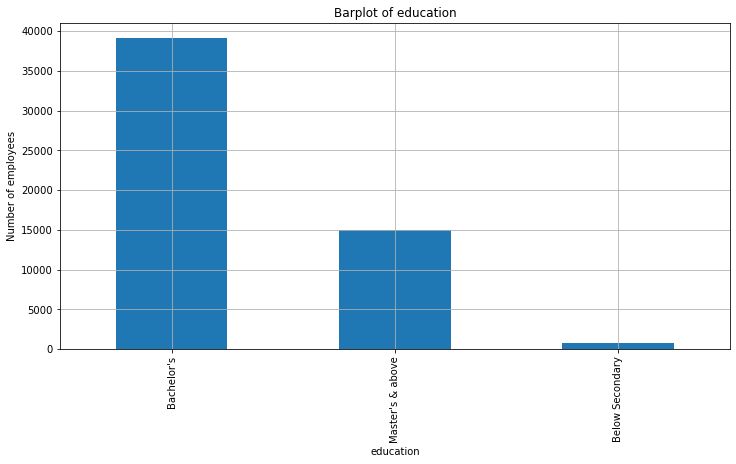

In [122]:
data_impute_mtd_2.education.value_counts().plot.bar(figsize=(12,6))
plt.xlabel('education')
plt.ylabel('Number of employees')
plt.title('Barplot of education')
plt.grid(True)
plt.show()

### Method 3: Capturing Missing Values in a Bespoke Category 

Missing data in categorical variables can be treated as a different category, so it is common to replace missing values with the "Missing" string.

In [123]:
# make a copy of the dataframe to store the result for this method of handling missing values in education variable

data_impute_mtd_3 = data.copy()

In [124]:
# education column: fill in null values with Missing 
data_impute_mtd_3['education'] = data_impute_mtd_3['education'].fillna('Missing')

In [125]:
# check that null values in education variable were replaced
data_impute_mtd_3.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [126]:
# Distribution of education variable after imputation

data_impute_mtd_3.education.value_counts()

Bachelor's          36669
Master's & above    14925
Missing              2409
Below Secondary       805
Name: education, dtype: int64

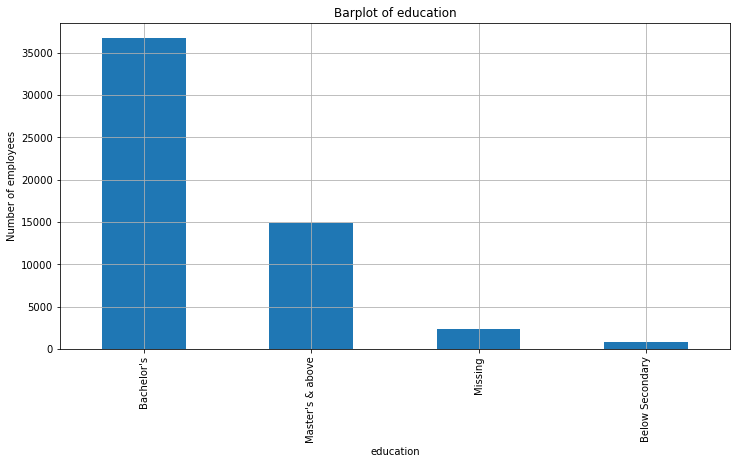

In [127]:
data_impute_mtd_3.education.value_counts().plot.bar(figsize=(12,6))
plt.xlabel('education')
plt.ylabel('Number of employees')
plt.title('Barplot of education')
plt.grid(True)
plt.show()

### Method 4: Converting values into binary codes 0 (no education) and 1 (has education)

In [128]:
# make a copy of the dataframe to store the result for this method of handling missing values in education variable

data_impute_mtd_4 = data.copy()

In [129]:
# Viewing values in education column
data_impute_mtd_4['education']

0        Master's & above
1              Bachelor's
2              Bachelor's
3              Bachelor's
4              Bachelor's
               ...       
54803          Bachelor's
54804    Master's & above
54805          Bachelor's
54806                 NaN
54807          Bachelor's
Name: education, Length: 54808, dtype: object

In [130]:
# education column: replace education with 1 and replace NaN with 0
data_impute_mtd_4.loc[data_impute_mtd_4["education"].notnull(),'education'] = 1
data_impute_mtd_4.loc[data_impute_mtd_4["education"].isna(),'education'] = 0
data_impute_mtd_4['education'] = data_impute_mtd_4['education'].astype(int)

In [131]:
# Viewing values in education column after converting values into binary codes
data_impute_mtd_4['education']

0        1
1        1
2        1
3        1
4        1
        ..
54803    1
54804    1
54805    1
54806    0
54807    1
Name: education, Length: 54808, dtype: int32

In [132]:
# check that there are no more null values in education variable
data_impute_mtd_4.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [133]:
# Distribution of education variable after converting values into binary codes

data_impute_mtd_4.education.value_counts()

1    52399
0     2409
Name: education, dtype: int64

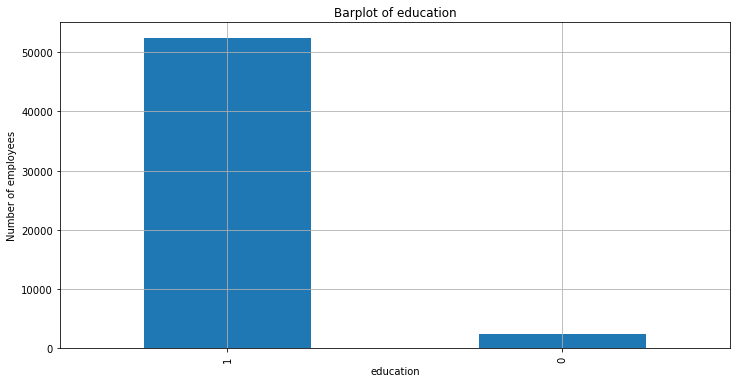

In [134]:
data_impute_mtd_4.education.value_counts().plot.bar(figsize=(12,6))
plt.xlabel('education')
plt.ylabel('Number of employees')
plt.title('Barplot of education')
plt.grid(True)
plt.show()

### Decision on the Ideal Method to handle Missing Values in education Variable (Categorical Variable)

After trying all the different above methods to handle Missing Values in education Variable, I decided to use Mode / Frequent Category Imputation to handle Missing Values in education Variable.


### Handling Missing Values in previous_year_rating Variable (Numerical Variable)

Since previous_year_rating Variable is a numerical variable, there are 6 methods to handle missing values in a Numerical Variable. 

### Method 1: Removing Observations with Missing Data

Complete Case Analysis (CCA), also called list-wise deletion of cases, consists of discarding those observations where the values in any of the variables are missing. CCA can be applied to categorical and numerical variables. CCA is quick and easy to implement and has the advantage that it preserves the distribution of the variables, provided the data is missing at random and only a small proportion of the data is missing. However, if data is missing across many variables, CCA may lead to the removal of a big portion of the dataset.

In [135]:
# make a copy of the dataframe to store the result for this method of handling missing values in previous_year_rating variable

data_impute_mtd_1 = data.copy()

In [136]:
# create a complete case data set, indicate the variable "previous_year_rating" that we would like the complete
data_cca = data_impute_mtd_1.dropna(subset=['previous_year_rating'])

In [137]:
print('Number of total observations: {}'.format(len(data)))
print('Number of observations with complete cases in previous_year_rating Variable: {}'.format(len(data_cca)))

Number of total observations: 54808
Number of observations with complete cases in previous_year_rating Variable: 50684


In [138]:
# check that there are no more null values in previous_year_rating variable 
data_cca.isnull().sum()

employee_id                0
department                 0
region                     0
education               2024
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

### Method 2: Performing Mean Imputation

Mean imputation consists of replacing missing values with the variable mean. This method can only be performed in numerical variables. 

Note that using Mean Imputation may distort the distribution of the original variables.

Suitable to use Mean Imputation for Normally Distributed Variables.

In [139]:
# make a copy of the dataframe to store the result for this method of handling missing values in previous_year_rating variable

data_impute_mtd_2 = data.copy()

In [140]:
# Viewing imputation value (i.e. mean value of previous_year_rating column)
data_impute_mtd_2['previous_year_rating'].mean()

3.329255780917055

In [141]:
# previous_year_rating column: fill in null values with mean value of previous_year_rating column
data_impute_mtd_2['previous_year_rating'] = data_impute_mtd_2['previous_year_rating'].fillna(data_impute_mtd_2['previous_year_rating'].mean())
data_impute_mtd_2['previous_year_rating'] = data_impute_mtd_2['previous_year_rating'].astype(float)

In [142]:
# check that null values in previous_year_rating variable were replaced
data_impute_mtd_2.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

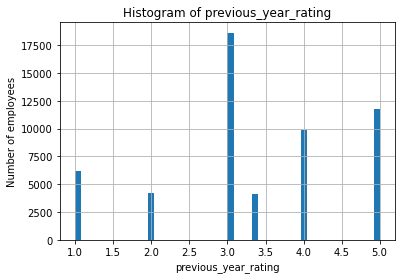

In [143]:
# Distribution of previous_year_rating variable after imputation

plt.hist(data_impute_mtd_2['previous_year_rating'], bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Number of employees') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

### Method 3: Performing Median Imputation

Median imputation consists of replacing missing values with the variable median. This method can only be performed in numerical variables. 

Note that using Median Imputation may distort the distribution of the original variables.

In [144]:
# make a copy of the dataframe to store the result for this method of handling missing values in previous_year_rating variable

data_impute_mtd_3 = data.copy()

In [145]:
# Viewing imputation value (ie. median value of previous_year_rating column)
data_impute_mtd_3['previous_year_rating'].median()

3.0

In [146]:
# previous_year_rating column: fill in null values with median value of previous_year_rating column
data_impute_mtd_3['previous_year_rating'] = data_impute_mtd_3['previous_year_rating'].fillna(data_impute_mtd_3['previous_year_rating'].median())
data_impute_mtd_3['previous_year_rating'] = data_impute_mtd_3['previous_year_rating'].astype(float)

In [147]:
# check that null values in previous_year_rating variable were replaced
data_impute_mtd_3.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

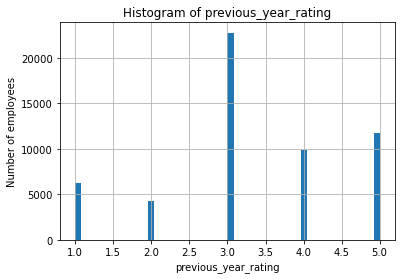

In [148]:
# Distribution of previous_year_rating variable after imputation

plt.hist(data_impute_mtd_3['previous_year_rating'], bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Number of employees') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

### Method 4: Replacing Missing Values by an Arbitrary Number

Arbitrary number means choosing any number that you would want for any reason you deem meaningful.  

Arbitrary number imputation consists of replacing missing values with an arbitrary value. Some commonly used values include 999, 9999, or -1 for positive distributions. This method is suitable for numerical variables. 

When replacing missing values with an arbitrary number, we need to be careful not to select a value close to the mean or the median, or any other common value of the distribution.

For Numerical Variables, the original variable distribution is likely distorted, thus this method is mostly used when...

- Data is not missing at random
- Building Non-Linear Models
- Percentage of Missing Values is High

In [149]:
# make a copy of the dataframe to store the result for this method of handling missing values in previous_year_rating variable

data_impute_mtd_4 = data.copy()

In [150]:
# previous_year_rating column: fill in null values with the arbitrary number of 0
data_impute_mtd_4['previous_year_rating'] = data_impute_mtd_4['previous_year_rating'].fillna(0)
data_impute_mtd_4['previous_year_rating'] = data_impute_mtd_4['previous_year_rating'].astype(float)

In [151]:
# check that null values in previous_year_rating variable were replaced
data_impute_mtd_4.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

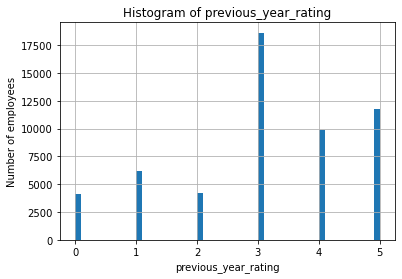

In [152]:
# Distribution of previous_year_rating variable after imputation

plt.hist(data_impute_mtd_4['previous_year_rating'], bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Number of employees') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

### Method 5: Replacing Missing Values by a Value at the End of the Distribution

Replacing missing values with a value at the end of the variable distribution is equivalent to replacing them with an arbitrary value, but instead of identifying the arbitrary values manually, these values are automatically selected as those at the very end of the variable distribution. 

Note that End-of-tail imputation may distort the distribution of the original variables, so it may not be suitable for linear models.

In [153]:
# make a copy of the dataframe to store the result for this method of handling missing values in previous_year_rating variable

data_impute_mtd_5 = data.copy()

In [154]:
# previous_year_rating column: fill in null values with the value at the End of the Distribution of 5
data_impute_mtd_5['previous_year_rating'] = data_impute_mtd_5['previous_year_rating'].fillna(5)
data_impute_mtd_5['previous_year_rating'] = data_impute_mtd_5['previous_year_rating'].astype(float)

In [155]:
# check that null values in previous_year_rating variable were replaced
data_impute_mtd_5.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

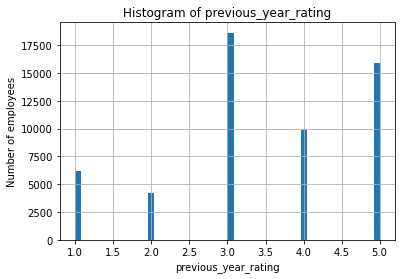

In [156]:
# Distribution of previous_year_rating variable after imputation

plt.hist(data_impute_mtd_5['previous_year_rating'], bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Number of employees') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

### Method 6: Converting values into binary codes 0 (no previous_year_rating) and 1 (has previous_year_rating)

In [157]:
# make a copy of the dataframe to store the result for this method of handling missing values in previous_year_rating variable

data_impute_mtd_6 = data.copy()

In [158]:
# Viewing values in previous_year_rating column
data_impute_mtd_6['previous_year_rating']

0        5.0
1        5.0
2        3.0
3        1.0
4        3.0
        ... 
54803    3.0
54804    2.0
54805    5.0
54806    1.0
54807    1.0
Name: previous_year_rating, Length: 54808, dtype: float64

In [159]:
# education column: replace previous_year_rating with 1 and replace NaN with 0
data_impute_mtd_6.loc[data_impute_mtd_6["previous_year_rating"].notnull(),'previous_year_rating'] = 1
data_impute_mtd_6.loc[data_impute_mtd_6["previous_year_rating"].isna(),'previous_year_rating'] = 0
data_impute_mtd_6['previous_year_rating'] = data_impute_mtd_6['previous_year_rating'].astype(float)

In [160]:
# Viewing values in previous_year_rating column after converting values into binary codes
data_impute_mtd_6['previous_year_rating']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
54803    1.0
54804    1.0
54805    1.0
54806    1.0
54807    1.0
Name: previous_year_rating, Length: 54808, dtype: float64

In [161]:
# check that there are no more null values in previous_year_rating variable
data_impute_mtd_6.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

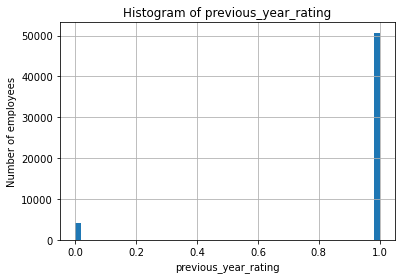

In [162]:
# Distribution of previous_year_rating variable after converting values into binary codes

plt.hist(data_impute_mtd_6['previous_year_rating'], bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Number of employees') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

### Decision on the Ideal Method to handle Missing Values in previous_year_rating Variable (Numerical Variable)

After trying all the different above methods to handle Missing Values in previous_year_rating Variable, I decided to Replace Missing Values by an Arbitrary Number of 0 to handle Missing Values in previous_year_rating Variable.

### Final Confirmed Missing Value Imputation Method for education and previous_year_rating Variables

In [163]:
# For Missing Values in education Variable (Using Mode / Frequent Category Imputation)

In [164]:
# Distribution of education variable before imputation

data.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

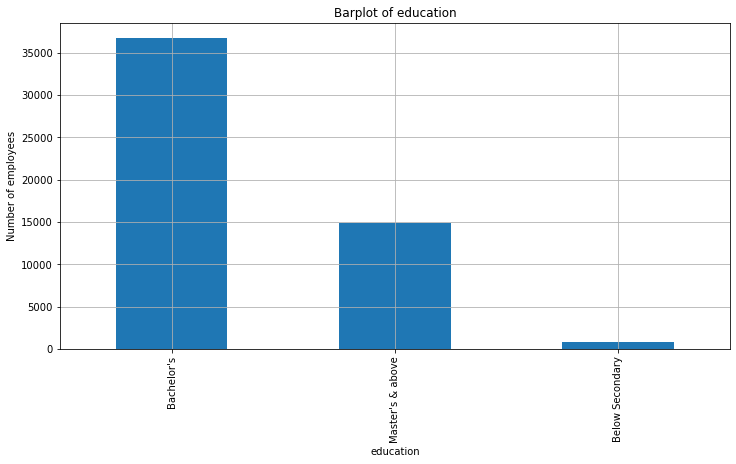

In [165]:
data.education.value_counts().plot.bar(figsize=(12,6))
plt.xlabel('education')
plt.ylabel('Number of employees')
plt.title('Barplot of education')
plt.grid(True)
plt.show()

In [166]:
# Describing education variable
data_cat['education'].describe()

count          52399
unique             3
top       Bachelor's
freq           36669
Name: education, dtype: object

From the above results, we can see that the mode of education variable is Bachelor's.

In [167]:
# education column: fill in null values with Bachelor's (majority is Bachelor's as stated above)
data['education'] = data['education'].fillna("Bachelor's")

In [168]:
# check that null values in education variable were replaced
data.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [169]:
# Distribution of education variable after imputation

data.education.value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

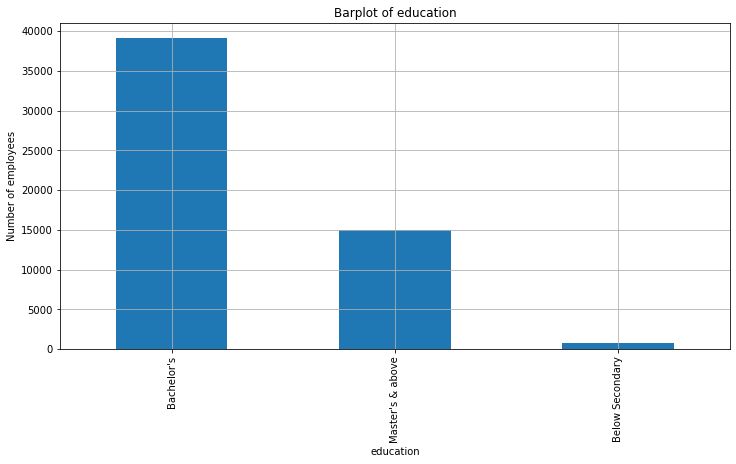

In [170]:
data.education.value_counts().plot.bar(figsize=(12,6))
plt.xlabel('education')
plt.ylabel('Number of employees')
plt.title('Barplot of education')
plt.grid(True)
plt.show()

In [171]:
# For Missing Values in previous_year_rating Variable (Using replacing Missing Values by an Arbitrary Number of 0)

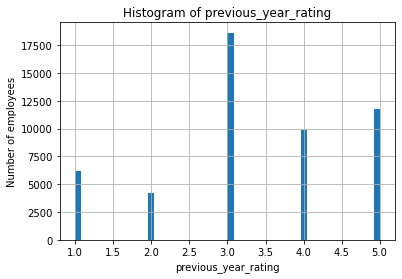

In [172]:
# Distribution of previous_year_rating variable before imputation

plt.hist(data['previous_year_rating'].dropna(), bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Number of employees') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

In [173]:
# previous_year_rating column: fill in null values with the arbitrary number of 0
data['previous_year_rating'] = data['previous_year_rating'].fillna(0)
data['previous_year_rating'] = data['previous_year_rating'].astype(float)

In [174]:
# check that null values in previous_year_rating variable were replaced
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

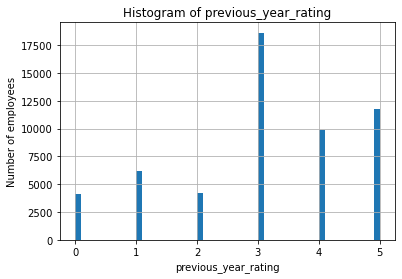

In [175]:
# Distribution of previous_year_rating variable after imputation

plt.hist(data['previous_year_rating'], bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Number of employees') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

### 1.2.2. Feature Engineering

### a. employee_id Variable

#### Determining Cardinality in employee_id Variable

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [176]:
# Viewing the number of unique values in employee_id variable
data.employee_id.nunique()

# Note: nunique() ignores missing data by default

54808

In [177]:
# To consider missing values as an additional category,
# we need to explicitly mention so, 
# passing the argument dropna=False

data.employee_id.nunique(dropna=False)

54808

Text(0.5, 1.0, 'Cardinality')

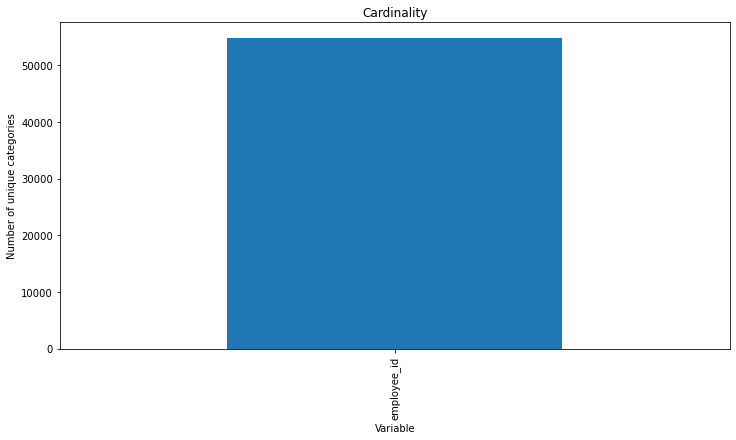

In [178]:
# Plotting cardinality of employee_id variable 

data[['employee_id']].nunique().plot.bar(figsize=(12,6))

# add labels and title
plt.ylabel('Number of unique categories')
plt.xlabel('Variable')
plt.title('Cardinality')

From the results above, employee_id variable has very high cardinality with 54808 unique categories.

### An extra observation on employee_id variable

Since employee_id variable has the same number of unique categories as the number of rows of employee records in hr_data.csv of 54808, it means that employee_id variable has a unique category in each row of employee record in hr_data.csv.

#### Inspecting Unique Categories in employee_id Variable (repeated for ease of viewing)

In [179]:
data['employee_id'].sort_values().unique()

array([    1,     2,     4, ..., 78296, 78297, 78298], dtype=int64)

From the results above, employee_id variable has too many unique categories such that the result of the above code cannot be printed out fully. (i.e. I cannot inspect all the unique categories in employee_id variable)

### Dropping employee_id Column

From all the above results, I decided to drop employee_id Column. This is because...

1. I found out that there are too many unique values in employee_id Column - employee_id variable has very high cardinality with 54808 unique categories. This would result in algorithms being prone to overfitting or being unable to score an observation. 


2. In addition, according to the data dictionary of hr_data.csv provided in the Machine Learning Assignment 1 Brief, employee_id variable contains all the unique ID for each employee. With that, the sole purpose of employee_id variable is only to help uniquely identify each row of employee record in hr_data.csv. In relation to this Machine Learning Assignment 1 dataset's classification problem, employee_id is just an irrelevant feature. Thus, I do not think that the employee_id variable would be of any help to predict whether an employee will be promoted or not. (i.e. I think that there would not be any relationship or there may be close to 0 relationship between employee_id variable and the target variable - is_promoted variable)

In [180]:
# Dropping employee_id Column
data = data.drop(['employee_id'], axis = 1)

# Viewing the result of the dropping of employee_id Column
data.head()

department     region         education gender recruitment_channel  \
0  Sales & Marketing   region_7  Master's & above      f            sourcing   
1         Operations  region_22        Bachelor's      m               other   
2  Sales & Marketing  region_19        Bachelor's      m            sourcing   
3  Sales & Marketing  region_23        Bachelor's      m               other   
4         Technology  region_26        Bachelor's      m               other   

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   35                   5.0                  8   
1                1   30                   5.0                  4   
2                1   34                   3.0                  7   
3                2   39                   1.0                 10   
4                1   45                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1            0                  49            0  
1              0            0                  60            0  
2              0            0                  50            0  
3              0            0                  50            0  
4              0            0                  73            0

### b. region Variable

#### Determining Cardinality in region Variable

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [181]:
# Viewing the number of unique values in region variable
data.region.nunique()

# Note: nunique() ignores missing data by default

34

In [182]:
# To consider missing values as an additional category,
# we need to explicitly mention so, 
# passing the argument dropna=False

data.region.nunique(dropna=False)

34

Text(0.5, 1.0, 'Cardinality')

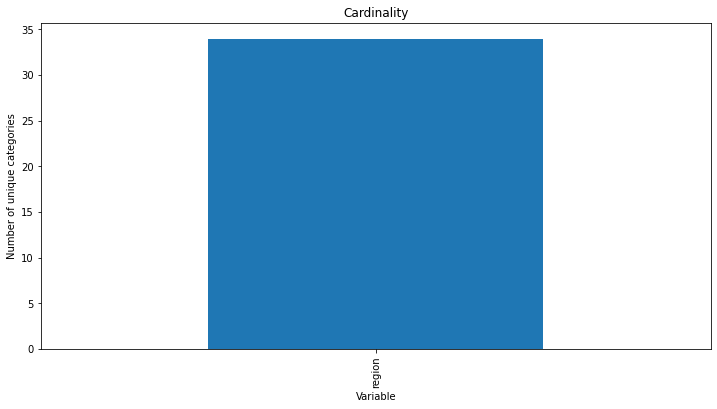

In [183]:
# Plotting cardinality of region variable 

data[['region']].nunique().plot.bar(figsize=(12,6))

# add labels and title
plt.ylabel('Number of unique categories')
plt.xlabel('Variable')
plt.title('Cardinality')

From the results above, region variable has high cardinality with 34 unique categories.

#### Inspecting Unique Categories in region Variable (repeated for ease of viewing)

In [184]:
data['region'].sort_values().unique()

array(['region_1', 'region_10', 'region_11', 'region_12', 'region_13',
       'region_14', 'region_15', 'region_16', 'region_17', 'region_18',
       'region_19', 'region_2', 'region_20', 'region_21', 'region_22',
       'region_23', 'region_24', 'region_25', 'region_26', 'region_27',
       'region_28', 'region_29', 'region_3', 'region_30', 'region_31',
       'region_32', 'region_33', 'region_34', 'region_4', 'region_5',
       'region_6', 'region_7', 'region_8', 'region_9'], dtype=object)

#### Identifying Rare Categories in region Variable (repeated for ease of viewing)

In [185]:
# region variable

In [186]:
# Calculating frequency for each category

# first we calculate the total number of employees in the dataset
total_employees = len(data)
print('Total number of employees {}'.format(total_employees))

# then we calculate label frequency
# value_counts() counts the number of employees per label
# by dividing by total employees we obtain the frequency

label_freq = data_cat.region.value_counts() / total_employees

# let's inspect the frequency of the labels
label_freq

Total number of employees 54808


region_2     0.225204
region_22    0.117282
region_7     0.088363
region_15    0.051233
region_13    0.048314
region_26    0.041235
region_31    0.035305
region_4     0.031072
region_27    0.030269
region_16    0.026730
region_28    0.024048
region_11    0.023993
region_23    0.021438
region_29    0.018136
region_32    0.017242
region_19    0.015947
region_20    0.015509
region_14    0.015089
region_25    0.014943
region_17    0.014523
region_5     0.013976
region_6     0.012589
region_30    0.011987
region_8     0.011951
region_10    0.011823
region_1     0.011130
region_24    0.009269
region_12    0.009123
region_9     0.007663
region_21    0.007499
region_3     0.006313
region_34    0.005328
region_33    0.004908
region_18    0.000566
Name: region, dtype: float64

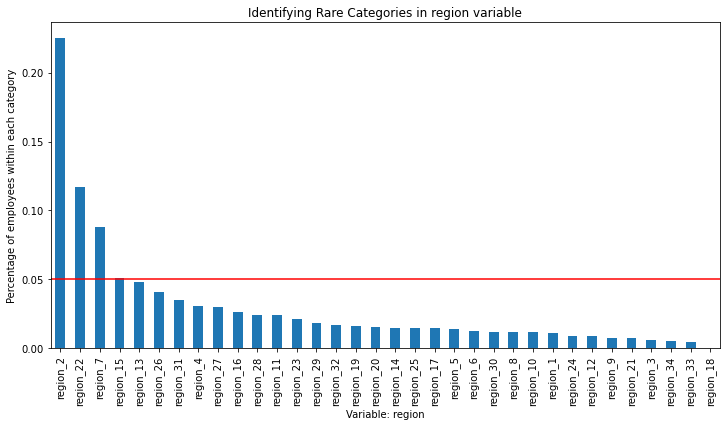

In [187]:
# Making plot with the category frequencies
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12,6))

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('Percentage of employees within each category')
fig.set_xlabel('Variable: region')
fig.set_title('Identifying Rare Categories in region variable')
plt.show()

In addition, from the results above, region variable has many unique categories that has a frequency of less than 5%.

These unique categories are values which are considered Rare.

#### Rare values

Rare values are those categories that are present only in a small percentage of the observations. There is no rule of thumb to determine how small is a small percentage, but typically, any value below 5 % can be considered rare. 

### A need to handle Rare Categories in region variable?

With infrequent labels, it would result in algorithms being prone to overfitting or being unable to score an observation. With that, we need to handle Rare Categories in region variable.

### How to handle Rare Categories?

One way to avoid these complications is to group infrequent categories into a new category called Rare or Other.

Therefore, I am going to group all the unique categories in region variable which has a frequency of less than 5% together as a single category named 'Rare'.

### Grouping Rare Categories in region variable

In [188]:
# function to find all the frequent categories of a variable 

def find_frequent_labels(df, variable, tolerance):
    
    temp = df[variable].value_counts()  / len(df)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare

In [189]:
# Finding the frequent categories in region variable

frequent_cat = find_frequent_labels(data, 'region', 0.05)

frequent_cat

['region_2', 'region_22', 'region_7', 'region_15']

In [190]:
# Finding the rare categories in region variable

[x for x in data['region'].unique() if x not in frequent_cat]

['region_19',
 'region_23',
 'region_26',
 'region_20',
 'region_34',
 'region_1',
 'region_4',
 'region_29',
 'region_31',
 'region_14',
 'region_11',
 'region_5',
 'region_28',
 'region_17',
 'region_13',
 'region_16',
 'region_25',
 'region_10',
 'region_27',
 'region_30',
 'region_12',
 'region_21',
 'region_8',
 'region_32',
 'region_6',
 'region_33',
 'region_24',
 'region_3',
 'region_9',
 'region_18']

In [191]:
# Grouping rare labels into a new category called rare
    
data['region'] = np.where(data['region'].isin(frequent_cat), data['region'], 'Rare')

### Results of the Grouping of Rare Categories in region variable

In [192]:
# Viewing the number of unique values in region variable
data.region.nunique()

5

In [193]:
# Inspecting unique categories in region variable 
data['region'].sort_values().unique()

array(['Rare', 'region_15', 'region_2', 'region_22', 'region_7'],
      dtype=object)

#### Barplot of region Variable after the Grouping of Rare Categories in region variable

In [194]:
# region variable

# Viewing the frequency count of each region in region variable
data.region.value_counts()

Rare         28386
region_2     12343
region_22     6428
region_7      4843
region_15     2808
Name: region, dtype: int64

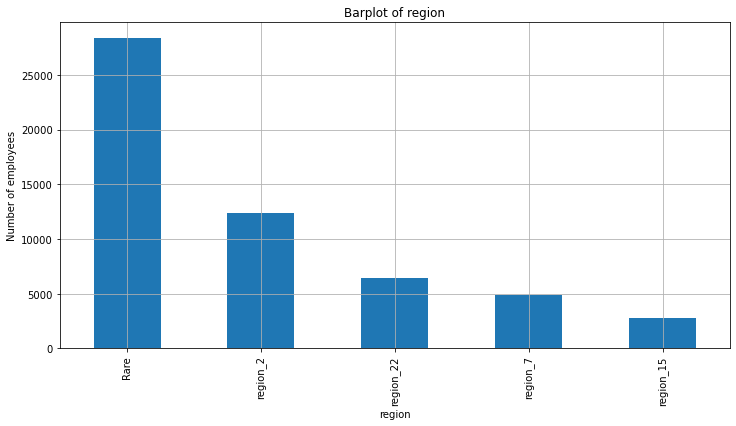

In [195]:
data.region.value_counts().plot.bar(figsize=(12,6))
plt.xlabel('region')
plt.ylabel('Number of employees')
plt.title('Barplot of region')
plt.grid(True)
plt.show()

### 1.2.3. Outliers
An outlier is a data point which is significantly different from the remaining data. Outliers can only be found in numerical variables.

#### Identifying Numerical Variables (repeated for ease of viewing)

In [196]:
# Selecting Numerical Data from 'data', then display first 5 rows
data_num = data.select_dtypes(['int64', 'float64']).copy()
data_num.head()

no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   35                   5.0                  8   
1                1   30                   5.0                  4   
2                1   34                   3.0                  7   
3                2   39                   1.0                 10   
4                1   45                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1            0                  49            0  
1              0            0                  60            0  
2              0            0                  50            0  
3              0            0                  50            0  
4              0            0                  73            0

### Identifying Outliers

I am going to use Boxplots to identify outliers in each numerical variable.

#### Visualizing each Numerical Variable using Boxplots

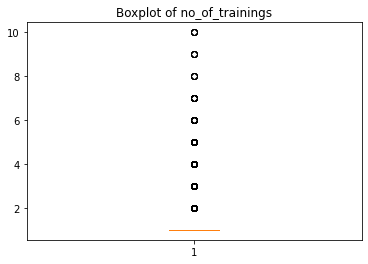

In [197]:
# Boxplot of Numerical Variable 'no_of_trainings'

plt.boxplot(data_num['no_of_trainings'])
plt.title('Boxplot of no_of_trainings')

plt.show()

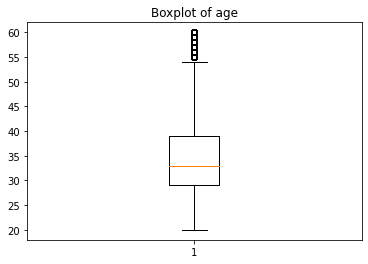

In [198]:
# Boxplot of Numerical Variable 'age'

plt.boxplot(data_num['age'])
plt.title('Boxplot of age')

plt.show()

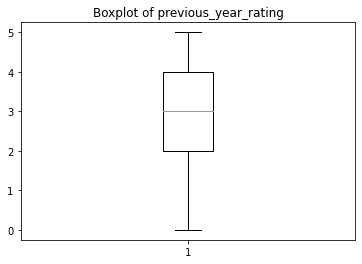

In [199]:
# Boxplot of Numerical Variable 'previous_year_rating'

plt.boxplot(data_num['previous_year_rating'])
plt.title('Boxplot of previous_year_rating')

plt.show()

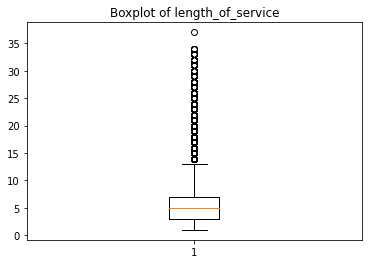

In [200]:
# Boxplot of Numerical Variable 'length_of_service'

plt.boxplot(data_num['length_of_service'])
plt.title('Boxplot of length_of_service')

plt.show()

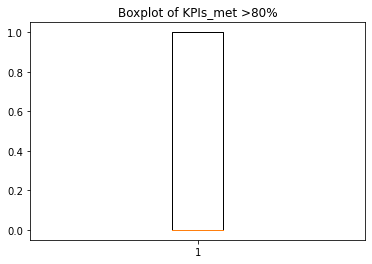

In [201]:
# Boxplot of Numerical Variable 'KPIs_met >80%'

plt.boxplot(data_num['KPIs_met >80%'])
plt.title('Boxplot of KPIs_met >80%')

plt.show()

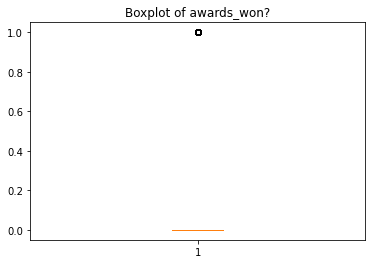

In [202]:
# Boxplot of Numerical Variable 'awards_won?'

plt.boxplot(data_num['awards_won?'])
plt.title('Boxplot of awards_won?')

plt.show()

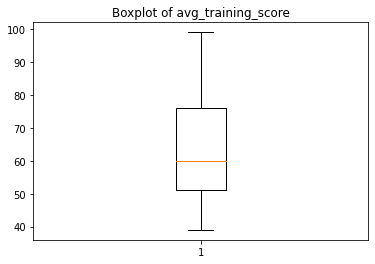

In [203]:
# Boxplot of Numerical Variable 'avg_training_score'

plt.boxplot(data_num['avg_training_score'])
plt.title('Boxplot of avg_training_score')

plt.show()

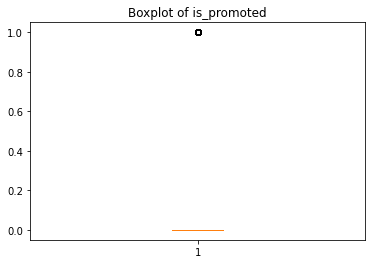

In [204]:
# Boxplot of Numerical Variable 'is_promoted'

plt.boxplot(data_num['is_promoted'])
plt.title('Boxplot of is_promoted')

plt.show()

### Are there any Outliers?

According to the results above, there are indeed outliers in the dataset. There are 2 numerical variables with outliers.

The 2 Numerical Variables with Outliers are:

1. age  


2. length_of_service

### Dealing with Outliers

With outliers in our dataset, we could not just leave it as is. We need to do something about it. 

This is because... 
- Statistical parameters (e.g. mean, variance) are sensitive to outliers
- Outliers may affect the performance of some machine learning models



### Handling Outliers in age Variable

### Method 1: Trimming 

Trimming, or truncating, is the process of removing observations that show outliers in one or more variables in the dataset. There are three commonly used methods to set the boundaries beyond which a value can be considered an outlier. 

For normally distributed variables:

 - Method A: Trimming by setting limits to the mean plus or minus three times the standard deviation
 
   - This is because approximately 99% of the data will be distributed between those limits. 

For normally & not normally, distributed variables:

- Method B: Trimming by setting limits using the inter-quartile range proximity rules

- Method C: Trimming by setting limits to the 5th and 95th quantiles

### Method 1A: Trimming by Setting Limits via Standard Deviation (3 SD away from mean)

In [205]:
# Finding outliers in the dataframe:

# the function finds the upper and lower boundaries
# using 3 standard deviation away from mean

# also passing the distance as a function argument
# to allow for versatility

def find_boundaries_1(df, variable, distance):
    lower_boundary = df[variable].mean() - (df[variable].std() * distance)
    upper_boundary = df[variable].mean() + (df[variable].std() * distance)
    return upper_boundary, lower_boundary

In [206]:
# Finding the boudaries for the variable 'age' using find_boundaries_1() method

age_upper_limit, age_lower_limit = find_boundaries_1(data, 'age', 3)
age_upper_limit, age_lower_limit

(57.784423091547914, 11.82340788203259)

In [207]:
# Flagging outliers in age Variable

outliers_age = np.where(data['age'] > age_upper_limit, True,
                       np.where(data['age'] < age_lower_limit, True, False))

In [208]:
# Trimming the dataset by removing age outliers

data_trimmed_1a = data.loc[~outliers_age]

data.shape, data_trimmed_1a.shape                    # Result is ((54808, 13), (54169, 13))

((54808, 13), (54169, 13))

### Method 1B: Trimming by Setting Limits via Inter-Quantile Range proximity rule

In [209]:
# Finding outliers in the dataframe:

def find_boundaries_2(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [210]:
# Finding the boudaries for the variable 'age' using find_boundaries_2() method

age_upper_limit, age_lower_limit = find_boundaries_2(data, 'age', 3)
age_upper_limit, age_lower_limit

(69.0, -1.0)

In [211]:
# Flagging outliers in age Variable

outliers_age = np.where(data['age'] > age_upper_limit, True,
                       np.where(data['age'] < age_lower_limit, True, False))

In [212]:
# Trimming the dataset by removing age outliers

data_trimmed_1b = data.loc[~outliers_age]

data.shape, data_trimmed_1b.shape                    # Result is ((54808, 13), (54808, 13))

((54808, 13), (54808, 13))

### Method 1C: Trimming by Setting Limits via Arbitrary Percentile method

In [213]:
# Finding outliers in the dataframe:

# the function finds the upper and lower boundaries
# using 5th and 95th quantiles

def find_boundaries_3(df, variable):
    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)
    return upper_boundary, lower_boundary

In [214]:
# Finding the boudaries for the variable 'age' using find_boundaries_3() method

age_upper_limit, age_lower_limit = find_boundaries_3(data, 'age')
age_upper_limit, age_lower_limit

(51.0, 25.0)

In [215]:
# Flagging outliers in age Variable

outliers_age = np.where(data['age'] > age_upper_limit, True,
                       np.where(data['age'] < age_lower_limit, True, False))

In [216]:
# Trimming the dataset by removing age outliers

data_trimmed_1c = data.loc[~outliers_age]

data.shape, data_trimmed_1c.shape                    # Result is ((54808, 13), (50630, 13))

((54808, 13), (50630, 13))

### Method 2: Winsorisation

Winsorization, or winsorizing, is the process of transforming the data by limiting outliers to a certain arbitrary value that is closer to the mean of the distribution. Winsorizing is different from trimming because the extreme values are not removed, but are instead replaced by other values. A typical strategy involves setting outliers to a specified percentile.

For example, with 90% winsorization, we set all data below the 5th percentile to the value at the 5th percentile and all data above the 95th percentile to the value at the 95th percentile. 

Winsorization is symmetric; therefore, the winsorized mean of a symmetric distribution provides an unbiased representation of the distribution of the variable. 

In [217]:
# function to create histogram, Q-Q plot and boxplot


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('age quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


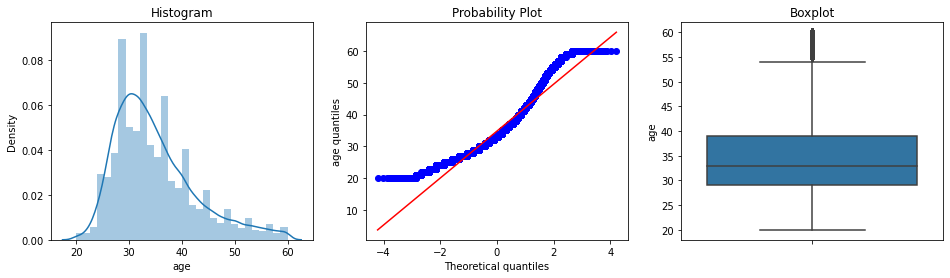

In [218]:
# finding outliers in 'age'

diagnostic_plots(data, 'age')

In [219]:
# Method to winsorise

def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [220]:
# Replacing age outliers by the percentiles

# data['age']= winsorise(data, 'age', data['age'].quantile(0.95), data['age'].quantile(0.05))

In [221]:
# let's explore outliers in the trimmed dataset

# diagnostic_plots(data, 'age')

### Method 3: Capping

Similarly to winsorization, we can replace the extreme values by values closer to other values in the variable, by determining the maximum and minimum boundaries with the mean plus or minus the standard deviation, or the inter-quartile range proximity rule. 

This procedure is also called bottom and top coding, censoring, or capping. We can cap both extremes of the distribution or just one of the tails, depending on where we find the outliers in the variable. 


In [222]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [223]:
def find_normal_boundaries(df, variable, distance):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + df[variable].std() * distance
    lower_boundary = df[variable].mean() - df[variable].std() * distance

    return upper_boundary, lower_boundary

In [224]:
# Finding the boudaries for the variable 'age' using find_skewed_boundaries() mtd

age_upper_limit, age_lower_limit = find_skewed_boundaries(data, 'age', 3)
age_upper_limit, age_lower_limit

(69.0, -1.0)

In [225]:
# Now let's replace the outliers by the maximum and minimum limit

# data['age']= np.where(data['age'] > age_upper_limit, age_upper_limit,
                       # np.where(data['age'] < age_lower_limit, age_lower_limit, data['age']))

In [226]:
# let's explore outliers in the capped dataset

# diagnostic_plots(data, 'age')

In [227]:
# Finding the boudaries for the variable 'age' using find_normal_boundaries() mtd

age_upper_limit, age_lower_limit = find_normal_boundaries(data, 'age', 3)
age_upper_limit, age_lower_limit

(57.784423091547914, 11.82340788203259)

In [228]:
# Now let's replace the outliers by the maximum and minimum limit

# data['age']= np.where(data['age'] > age_upper_limit, age_upper_limit,
                       # np.where(data['age'] < age_lower_limit, age_lower_limit, data['age']))

In [229]:
# let's explore outliers in the capped dataset

# diagnostic_plots(data, 'age')

### Method 4: Zero-coding

Zero-coding is a variant of bottom-coding and refers to the process of capping, usually the lower value of the variable, at zero. It is commonly used for variables that cannot take negative values, such as age or income. 


In [230]:
# Take a look at the Minimum value in 'age'
data['age'].min()

20

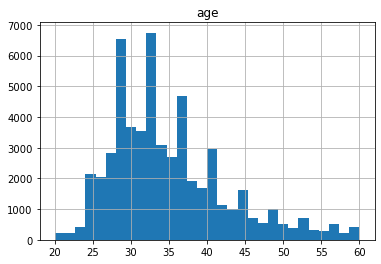

In [231]:
# Histogram of age before Zero-coding
data['age'].hist(bins=30)
plt.title('age')
plt.show()

In [232]:
# Perform Zero-coding

# Note: There is no effect on Outliers in Variable 'age' when performing Zero-coding as the minimum value of 
# Variable 'age' is 20 which is not less than 0

data.loc[data['age'] < 0, 'age'] = 0      

# Take a look at the Minimum value in 'age'
data['age'].min()

20

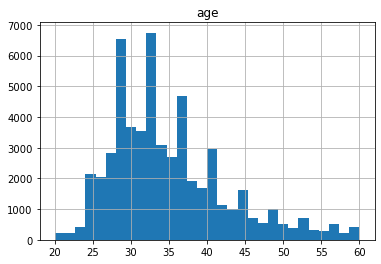

In [233]:
# Histogram of age after Zero-coding
data['age'].hist(bins=30)
plt.title('age')
plt.show()


# Note: There is no effect on Outliers in Variable 'age' when performing Zero-coding as the minimum value of 
# Variable 'age' is 20 which is not less than 0

### Decision on the Ideal Method to Deal with Outliers in age Variable

After trying all the different methods to deal with Outliers in age Variable, I can conclude that using Winsorisation is the best method to deal with Outliers in age Variable.

This is because...

1. Compared to Trimming method, I get to retain most of the values in the dataset instead of dropping them even though Trimming method is also a great method to deal with Outliers in age Variable. By being able to retain most of the values in the dataset using Winsorisation, I could get a better model performance result.


2. Compared to Capping method, I get to deal with all the outliers in age Variable. When dealing with Outliers in age Variable using Capping, there were some outliers that are still not dealt with.


3. Compared to Zero-coding, dealing with Outliers in age Variable by Winsorisation is way better. When performing zero-coding, there is no effect on Variable 'age' as the minimum value of Variable 'age' is 20 which is not less than 0. Zero-coding is a process of capping the lower value of the variable, at zero.

### Handling Outliers in length_of_service Variable

### Method 1: Trimming 

Trimming, or truncating, is the process of removing observations that show outliers in one or more variables in the dataset. There are three commonly used methods to set the boundaries beyond which a value can be considered an outlier. 

For normally distributed variables:

 - Method A: Trimming by setting limits to the mean plus or minus three times the standard deviation
 
   - This is because approximately 99% of the data will be distributed between those limits. 

For normally & not normally, distributed variables:

- Method B: Trimming by setting limits using the inter-quartile range proximity rules

- Method C: Trimming by setting limits to the 5th and 95th quantiles

### Method 1A: Trimming by Setting Limits via Standard Deviation (3 SD away from mean)

In [234]:
# Finding outliers in the dataframe:

# the function finds the upper and lower boundaries
# using 3 standard deviation away from mean

# also passing the distance as a function argument
# to allow for versatility

def find_boundaries_1(df, variable, distance):
    lower_boundary = df[variable].mean() - (df[variable].std() * distance)
    upper_boundary = df[variable].mean() + (df[variable].std() * distance)
    return upper_boundary, lower_boundary

In [235]:
# Finding the boudaries for the variable 'length_of_service' using find_boundaries_1() method

los_upper_limit, los_lower_limit = find_boundaries_1(data, 'length_of_service', 3)
los_upper_limit, los_lower_limit

(18.660794873024663, -6.929770205092973)

In [236]:
# Flagging outliers in length_of_service Variable

outliers_los = np.where(data['length_of_service'] > los_upper_limit, True,
                       np.where(data['length_of_service'] < los_lower_limit, True, False))

In [237]:
# Trimming the dataset by removing length_of_service outliers

data_trimmed_1a = data.loc[~outliers_los]

data.shape, data_trimmed_1a.shape                    # Result is ((54808, 13), (53833, 13))

((54808, 13), (53833, 13))

### Method 1B: Trimming by Setting Limits via Inter-Quantile Range proximity rule

In [238]:
# Finding outliers in the dataframe:

def find_boundaries_2(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [239]:
# Finding the boudaries for the variable 'length_of_service' using find_boundaries_2() method

los_upper_limit, los_lower_limit = find_boundaries_2(data, 'length_of_service', 3)
los_upper_limit, los_lower_limit

(19.0, -9.0)

In [240]:
# Flagging outliers in length_of_service Variable

outliers_los = np.where(data['length_of_service'] > los_upper_limit, True,
                       np.where(data['length_of_service'] < los_lower_limit, True, False))

In [241]:
# Trimming the dataset by removing length_of_service outliers

data_trimmed_1b = data.loc[~outliers_los]

data.shape, data_trimmed_1b.shape                    # Result is ((54808, 13), (54162, 13))

((54808, 13), (54162, 13))

### Method 1C: Trimming by Setting Limits via Arbitrary Percentile method

In [242]:
# Finding outliers in the dataframe:

# the function finds the upper and lower boundaries
# using 5th and 95th quantiles

def find_boundaries_3(df, variable):
    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)
    return upper_boundary, lower_boundary

In [243]:
# Finding the boudaries for the variable 'length_of_service' using find_boundaries_3() method

los_upper_limit, los_lower_limit = find_boundaries_3(data, 'length_of_service')
los_upper_limit, los_lower_limit

(15.0, 1.0)

In [244]:
# Flagging outliers in length_of_service Variable

outliers_los = np.where(data['length_of_service'] > los_upper_limit, True,
                       np.where(data['length_of_service'] < los_lower_limit, True, False))

In [245]:
# Trimming the dataset by removing length_of_service outliers

data_trimmed_1c = data.loc[~outliers_los]

data.shape, data_trimmed_1c.shape                    # Result is ((54808, 13), (52461, 13))

((54808, 13), (52461, 13))

### Method 2: Winsorisation

Winsorization, or winsorizing, is the process of transforming the data by limiting outliers to a certain arbitrary value that is closer to the mean of the distribution. Winsorizing is different from trimming because the extreme values are not removed, but are instead replaced by other values. A typical strategy involves setting outliers to a specified percentile.

For example, with 90% winsorization, we set all data below the 5th percentile to the value at the 5th percentile and all data above the 95th percentile to the value at the 95th percentile. 

Winsorization is symmetric; therefore, the winsorized mean of a symmetric distribution provides an unbiased representation of the distribution of the variable. 

In [246]:
# function to create histogram, Q-Q plot and boxplot


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('length_of_service quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


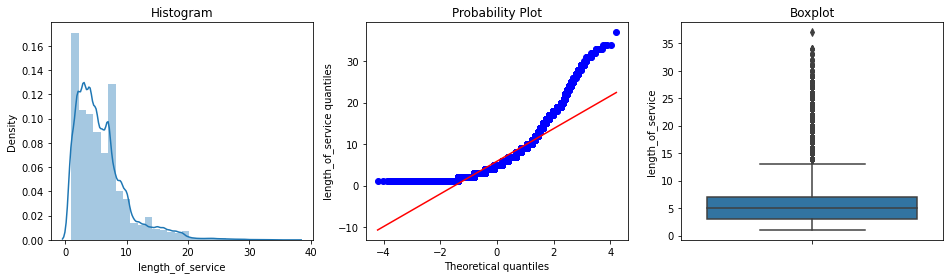

In [247]:
# finding outliers in 'length_of_service'

diagnostic_plots(data, 'length_of_service')

In [248]:
# Method to winsorise

def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [249]:
# Replacing length_of_service outliers by the percentiles

# data['length_of_service']= winsorise(data, 'length_of_service', data['length_of_service'].quantile(0.95), 
                                     # data['length_of_service'].quantile(0.05))

In [250]:
# let's explore outliers in the trimmed dataset

# diagnostic_plots(data, 'length_of_service')

### Method 3: Capping

Similarly to winsorization, we can replace the extreme values by values closer to other values in the variable, by determining the maximum and minimum boundaries with the mean plus or minus the standard deviation, or the inter-quartile range proximity rule. 

This procedure is also called bottom and top coding, censoring, or capping. We can cap both extremes of the distribution or just one of the tails, depending on where we find the outliers in the variable. 


In [251]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [252]:
def find_normal_boundaries(df, variable, distance):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + df[variable].std() * distance
    lower_boundary = df[variable].mean() - df[variable].std() * distance

    return upper_boundary, lower_boundary

In [253]:
# Finding the boudaries for the variable 'length_of_service' using find_skewed_boundaries() mtd

los_upper_limit, los_lower_limit = find_skewed_boundaries(data, 'length_of_service', 3)
los_upper_limit, los_lower_limit

(19.0, -9.0)

In [254]:
# Now let's replace the outliers by the maximum and minimum limit

# data['length_of_service']= np.where(data['length_of_service'] > los_upper_limit, los_upper_limit,
                       # np.where(data['length_of_service'] < los_lower_limit, los_lower_limit, data['length_of_service']))

In [255]:
# let's explore outliers in the capped dataset

# diagnostic_plots(data, 'length_of_service')

In [256]:
# Finding the boudaries for the variable 'length_of_service' using find_normal_boundaries() mtd

los_upper_limit, los_lower_limit = find_normal_boundaries(data, 'length_of_service', 3)
los_upper_limit, los_lower_limit

(18.660794873024663, -6.929770205092973)

In [257]:
# Now let's replace the outliers by the maximum and minimum limit

# data['length_of_service']= np.where(data['length_of_service'] > los_upper_limit, los_upper_limit,
                       # np.where(data['length_of_service'] < los_lower_limit, los_lower_limit, data['length_of_service']))

In [258]:
# let's explore outliers in the capped dataset

# diagnostic_plots(data, 'length_of_service')

### Method 4: Zero-coding

Zero-coding is a variant of bottom-coding and refers to the process of capping, usually the lower value of the variable, at zero. It is commonly used for variables that cannot take negative values, such as age or income. 


In [259]:
# Take a look at the Minimum value in 'length_of_service'
data['length_of_service'].min()

1

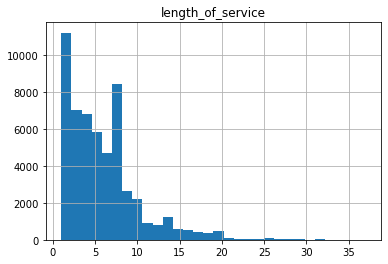

In [260]:
# Histogram of length_of_service before Zero-coding
data['length_of_service'].hist(bins=30)
plt.title('length_of_service')
plt.show()

In [261]:
# Perform Zero-coding

# Note: There is no effect on Outliers in Variable 'length_of_service' when performing Zero-coding as the minimum value of 
# Variable 'length_of_service' is 1 which is not less than 0

data.loc[data['length_of_service'] < 0, 'length_of_service'] = 0      

# Take a look at the Minimum value in 'length_of_service'
data['length_of_service'].min()

1

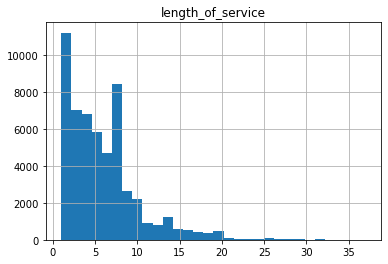

In [262]:
# Histogram of age after Zero-coding
data['length_of_service'].hist(bins=30)
plt.title('length_of_service')
plt.show()


# Note: There is no effect on Outliers in Variable 'length_of_service' when performing Zero-coding as the minimum value of 
# Variable 'length_of_service' is 1 which is not less than 0

### Decision on the Ideal Method to Deal with Outliers in length_of_service Variable

After trying all the different methods to deal with Outliers in length_of_service Variable, I can conclude that using Winsorisation is also the best method to deal with Outliers in length_of_service Variable.

This is also because...

1. Compared to Trimming method, I get to retain most of the values in the dataset instead of dropping them even though Trimming method is also a great method to deal with Outliers in length_of_service Variable. By being able to retain most of the values in the dataset using Winsorisation, I could get a better model performance result.


2. Compared to Capping method, I get to deal with most of the outliers in length_of_service Variable. When dealing with Outliers in length_of_service Variable using Capping, there were more outliers that are still not dealt with.


3. Compared to Zero-coding, dealing with Outliers in length_of_service Variable by Winsorisation is way better. When performing zero-coding, there is no effect on Variable 'length_of_service' as the minimum value of Variable 'length_of_service' is 1 which is not less than 0. Zero-coding is a process of capping the lower value of the variable, at zero.

### Final Confirmed Method to Deal with Outliers in age and length_of_service Variables

In [263]:
# Dealing with Outliers in age variable (Using Winsorisation)

In [264]:
# function to create histogram, Q-Q plot and boxplot


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('age quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


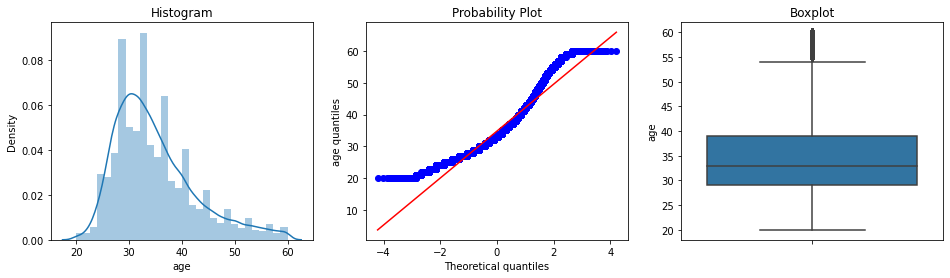

In [265]:
# finding outliers in 'age'

diagnostic_plots(data, 'age')

In [266]:
# Method to winsorise

def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [267]:
# Replacing age outliers by the percentiles

data['age']= winsorise(data, 'age', data['age'].quantile(0.95), data['age'].quantile(0.05))

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


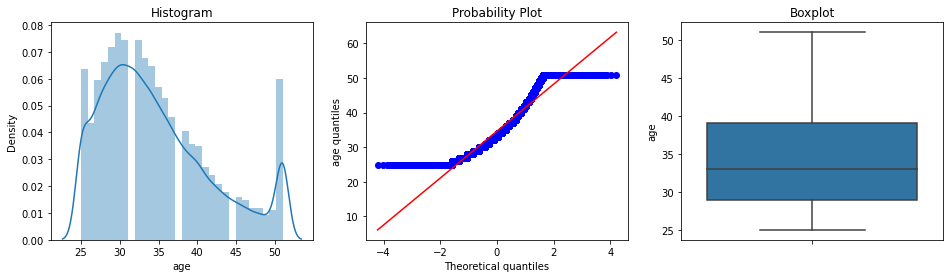

In [268]:
# let's explore outliers in the trimmed dataset

diagnostic_plots(data, 'age')

In [269]:
# Dealing with Outliers in length_of_service variable (Using Winsorisation)

In [270]:
# function to create histogram, Q-Q plot and boxplot


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('length_of_service quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


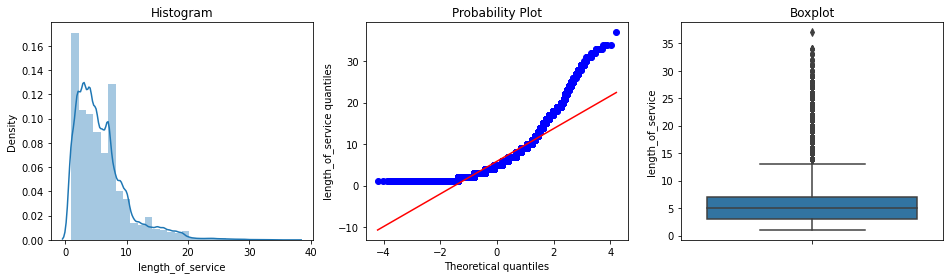

In [271]:
# finding outliers in 'length_of_service'

diagnostic_plots(data, 'length_of_service')

In [272]:
# Method to winsorise

def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [273]:
# Replacing length_of_service outliers by the percentiles

data['length_of_service']= winsorise(data, 'length_of_service', data['length_of_service'].quantile(0.95), 
                                     data['length_of_service'].quantile(0.05))

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


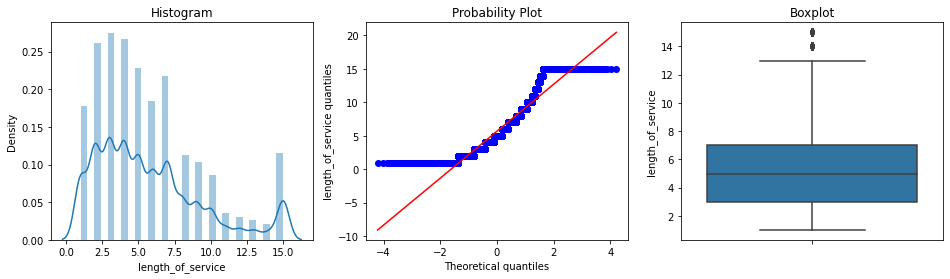

In [274]:
# let's explore outliers in the trimmed dataset

diagnostic_plots(data, 'length_of_service')

### 1.2.4. Categorical Data Encoding

In [275]:
# Selecting Categorical Data from 'data', then display first 5 rows.
data_cat = data.select_dtypes(['object']).copy()
data_cat.head()

department     region         education gender recruitment_channel
0  Sales & Marketing   region_7  Master's & above      f            sourcing
1         Operations  region_22        Bachelor's      m               other
2  Sales & Marketing       Rare        Bachelor's      m            sourcing
3  Sales & Marketing       Rare        Bachelor's      m               other
4         Technology       Rare        Bachelor's      m               other

### Are there any Categorical Data in the dataset?

According to the results above, there are indeed categorical data in the dataset. There are 5 categorical variables in the dataset.

The 5 Categorical Variables in the dataset are:

1. department


2. region


3. education


4. gender


5. recruitment_channel

### A Need to transform the Categorical Data into numbers?

Based on the above results, I think it is necessary to transform the Categorical Data into numbers. This is so that Categorical Data can also be used as part of the overall revised dataset for computers to perform mathematical calculations and to determine suitable algorithms for models.


### List of Categorical Data that needs to be transformed into numbers

Actually, all Categorical Data in the dataset needs to be transformed into numbers.

Therefore, the list of Categorical Data that needs to be transformed into numbers are:

1. department


2. region


3. education


4. gender


5. recruitment_channel

### department variable

#### Determining Cardinality in department Variable

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [276]:
# Viewing the number of unique values in department variable
data.department.nunique()

# Note: nunique() ignores missing data by default

9

#### Inspecting Unique Categories in department Variable (repeated for ease of viewing)

In [277]:
data['department'].sort_values().unique()

array(['Analytics', 'Finance', 'HR', 'Legal', 'Operations', 'Procurement',
       'R&D', 'Sales & Marketing', 'Technology'], dtype=object)

### Transforming department variable into numbers

### Method 1: Creating Binary Variables through One-Hot Encoding

In one-hot encoding, we represent a categorical variable as a group of binary variables, where each binary variable represents one category. The binary variable indicates whether the category is present in an observation (1) or not (0).

For example, we have a variable named **Gender**. **Gender** variable takes in 2 categories - **Male** and **Female**.

The one-hot encoded representation of the **Gender** variable with the categories of **Male** and **Female**  would then derive the binary variable of Female, which shows the value of 1 for females, or the binary variable of Male, which takes the value of 1 for the males in the dataset.

A categorical variable with k unique categories can be encoded in k-1 binary variables. For Gender, k is 2 as it contains two labels (male and female), therefore, we need to create only one binary variable (k - 1 = 1) to capture all of the information.

In [278]:
# One-Hot Encoding department variable
department_ohe = pd.get_dummies(data['department'])

# Visualising the result
department_ohe.head()

Analytics  Finance  HR  Legal  Operations  Procurement  R&D  \
0          0        0   0      0           0            0    0   
1          0        0   0      0           1            0    0   
2          0        0   0      0           0            0    0   
3          0        0   0      0           0            0    0   
4          0        0   0      0           0            0    0   

   Sales & Marketing  Technology  
0                  1           0  
1                  0           0  
2                  1           0  
3                  1           0  
4                  0           1

### Method 2: Performing One-Hot Encoding of Frequent Categories

One-hot encoding represents each category of a categorical variable with a binary variable. Hence, one-hot encoding of highly cardinal variables or datasets with multiple categorical features can expand the feature space dramatically. To reduce the number of binary variables, we can perform one-hot encoding of the most frequent categories only. 

One-hot encoding of top categories is equivalent to treating the remaining, less frequent categories as a single, unique category.

In [279]:
# make a copy of the dataframe to store the result for this method of transforming department variable into numbers

data_encode_mtd_2 = data.copy()

In [280]:
# Finding the top 5 most frequent categories in department variable

data_encode_mtd_2['department'].value_counts().sort_values(ascending=False).head(5)

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Name: department, dtype: int64

In [281]:
# Making a list of the top 5 most frequent categories in department variable

top_5 = [
    x for x in data_encode_mtd_2['department'].value_counts().sort_values(
        ascending=False).head(5).index
]

top_5

['Sales & Marketing', 'Operations', 'Technology', 'Procurement', 'Analytics']

In [282]:
# Creating 5 binary variables to encode department variable

for label in top_5:
    data_encode_mtd_2['department' + '_' + label] = np.where(
        data_encode_mtd_2['department'] == label, 1, 0)

In [283]:
# Visualising the result

print(data_encode_mtd_2[['department'] + ['department'+'_'+ c for c in top_5]].head(10))

          department  department_Sales & Marketing  department_Operations  \
0  Sales & Marketing                             1                      0   
1         Operations                             0                      1   
2  Sales & Marketing                             1                      0   
3  Sales & Marketing                             1                      0   
4         Technology                             0                      0   
5          Analytics                             0                      0   
6         Operations                             0                      1   
7         Operations                             0                      1   
8          Analytics                             0                      0   
9  Sales & Marketing                             1                      0   

   department_Technology  department_Procurement  department_Analytics  
0                      0                       0                     0  
1     

### Method 3: Replacing Categories with Ordinal Numbers

Ordinal encoding consists of replacing the categories with digits from `1 to k` (or `0 to k-1`, depending on the implementation), where `k` is the number of distinct categories of the variable. The numbers are assigned arbitrarily. 

Ordinal encoding is better suited for non-linear machine learning models, which can navigate through the arbitrarily assigned digits to try and find patterns that relate to the target. 

In [284]:
# make a copy of the dataframe to store the result for this method of transforming department variable into numbers

data_encode_mtd_3 = data.copy()

In [285]:
# Creating a dictionary with the mappings of categories to numbers for department variable

ordinal_mapping = {
    k: i
    for i, k in enumerate(data_encode_mtd_3['department'].unique(), 0)
}

ordinal_mapping

{'Sales & Marketing': 0,
 'Operations': 1,
 'Technology': 2,
 'Analytics': 3,
 'R&D': 4,
 'Procurement': 5,
 'Finance': 6,
 'HR': 7,
 'Legal': 8}

In [286]:
# Replacing the labels with the integers

data_encode_mtd_3['department'] = data_encode_mtd_3['department'].map(ordinal_mapping)

In [287]:
# Exploring the result

data_encode_mtd_3['department'].head(10)

0    0
1    1
2    0
3    0
4    2
5    3
6    1
7    1
8    3
9    0
Name: department, dtype: int64

### Method 4: Replacing Categories with Counts of Observations

In count encoding, we replace the categories with the count of observations for that category. That is, if 10 out of 100 observations show the category blue for the variable color, we would replace blue with 10 when doing count encoding.

These techniques, which capture the representation of each label in a dataset, are very popular in data science competitions. The assumption is that the number of observations per category is somewhat predictive of the target.

Note: If two different categories are having the same percentage of observations, they will be replaced by the same value, which may lead to information loss.

In [288]:
# make a copy of the dataframe to store the result for this method of transforming department variable into numbers

data_encode_mtd_4 = data.copy()

In [289]:
# Obtaining the counts for each category in department variable

count_map = data_encode_mtd_4['department'].value_counts().to_dict()

count_map

{'Sales & Marketing': 16840,
 'Operations': 11348,
 'Technology': 7138,
 'Procurement': 7138,
 'Analytics': 5352,
 'Finance': 2536,
 'HR': 2418,
 'Legal': 1039,
 'R&D': 999}

In [290]:
# Replacing the labels with the counts

data_encode_mtd_4['department'] = data_encode_mtd_4['department'].map(count_map)

In [291]:
# Exploring the result

data_encode_mtd_4['department'].head(10)

0    16840
1    11348
2    16840
3    16840
4     7138
5     5352
6    11348
7    11348
8     5352
9    16840
Name: department, dtype: int64

### Method 5: Replacing Categories with Frequency of observations

In frequency encoding, we replace the categories with the percentage of observations for that category. That is, if 10 out of 100 observations show the category blue for the variable color, we would replace blue with 0.1 if performing frequency encoding. 

These techniques, which capture the representation of each label in a dataset, are very popular in data science competitions. The assumption is that the number of observations per category is somewhat predictive of the target.

Note: If two different categories are having the same percentage of observations, they will be replaced by the same value, which may lead to information loss.

In [292]:
# make a copy of the dataframe to store the result for this method of transforming department variable into numbers

data_encode_mtd_5 = data.copy()

In [293]:
# By frequency: Divide the count by the total number of observations

# Obtaining the frequency for each category in department variable
frequency_map = (data_encode_mtd_5['department'].value_counts() / len(data_encode_mtd_5) ).to_dict()
frequency_map

{'Sales & Marketing': 0.3072544154138082,
 'Operations': 0.20705006568384177,
 'Technology': 0.13023646183038973,
 'Procurement': 0.13023646183038973,
 'Analytics': 0.09764997810538607,
 'Finance': 0.046270617428112684,
 'HR': 0.04411764705882353,
 'Legal': 0.01895708655670705,
 'R&D': 0.018227266092541234}

In [294]:
# Replacing the labels with the frequency

data_encode_mtd_5['department'] = data_encode_mtd_5['department'].map(frequency_map)

In [295]:
# Exploring the result

data_encode_mtd_5['department'].head(10)

0    0.307254
1    0.207050
2    0.307254
3    0.307254
4    0.130236
5    0.097650
6    0.207050
7    0.207050
8    0.097650
9    0.307254
Name: department, dtype: float64

### Method 6: Encoding with Integers in an Ordered Manner

In Method 3: Replacing categories with ordinal numbers, I replaced categories with integers, which were assigned arbitrarily. This encoding works well with non-linear machine learning algorithms that can navigate through the arbitrarily assigned digits to try and find patterns that relate them to the target. However, that encoding method may not work so well with linear models.

I can instead assign integers to the categories given the target values. To do this, do the following:
* 1.Calculate the mean value of the target per category.
* 2.Order the categories from the one with the lowest to the one with the highest target mean value.
* 3.Assign digits to the ordered categories, starting with 0 to the first category all of the way up to `k-1` to the last category, where k is the number of distinct categories.

This encoding technique creates a monotonic relationship between the categorical variable and the response and therefore makes the variables more adequate for use in linear models.

Monotonic means strictly increasing or decreasing.

In [296]:
# make a copy of the dataframe to store the result for this method of transforming department variable into numbers

data_encode_mtd_6 = data.copy()

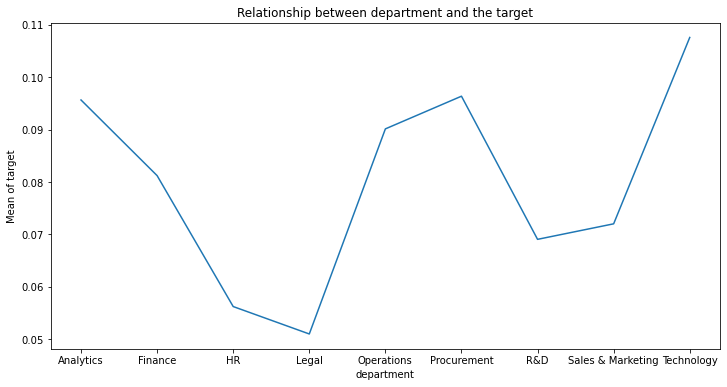

In [297]:
# Plotting line graph of department variable against is_promoted variable

data_encode_mtd_6.groupby(['department'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between department and the target')
plt.ylabel('Mean of target')
plt.show()

From the above plot, there is no monotonic relationship between the department variable and the target variable.

In [298]:
# Ordering the labels in department variable according to the mean target value

data_encode_mtd_6.groupby(['department'])['is_promoted'].mean().sort_values()

department
Legal                0.051011
HR                   0.056245
R&D                  0.069069
Sales & Marketing    0.072031
Finance              0.081230
Operations           0.090148
Analytics            0.095665
Procurement          0.096386
Technology           0.107593
Name: is_promoted, dtype: float64

In [299]:
# Generating an ordered list with the labels of department variable

ordered_labels = data_encode_mtd_6.groupby(['department'])['is_promoted'].mean().sort_values().index

ordered_labels

Index(['Legal', 'HR', 'R&D', 'Sales & Marketing', 'Finance', 'Operations',
       'Analytics', 'Procurement', 'Technology'],
      dtype='object', name='department')

In [300]:
# Creating a dictionary with the mappings of categories to numbers

ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

ordinal_mapping

{'Legal': 0,
 'HR': 1,
 'R&D': 2,
 'Sales & Marketing': 3,
 'Finance': 4,
 'Operations': 5,
 'Analytics': 6,
 'Procurement': 7,
 'Technology': 8}

In [301]:
# Replacing the labels with the ordered numbers

data_encode_mtd_6['department'] = data_encode_mtd_6['department'].map(ordinal_mapping)

In [302]:
# Exploring the result

data_encode_mtd_6['department'].head()

0    3
1    5
2    3
3    3
4    8
Name: department, dtype: int64

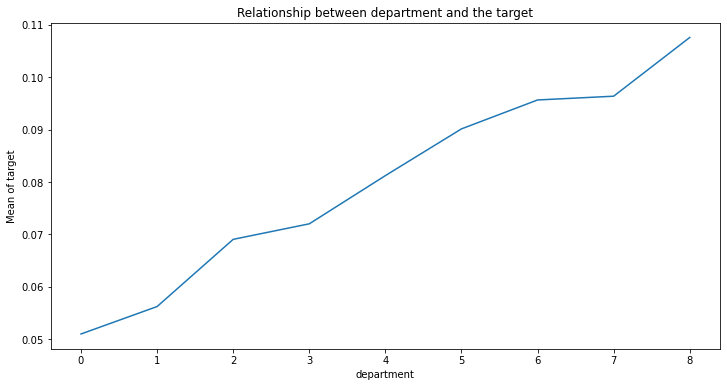

In [303]:
# Exploring the monotonic relationship between the department variable and is_promoted variable

data_encode_mtd_6.groupby(['department'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between department and the target')
plt.ylabel('Mean of target')
plt.show()

### Method 7: Encoding with the Mean of the target

Mean encoding or target encoding implies replacing the categories with the average target value for that category. For example, if we have a City variable, with the categories of London, Manchester, and Bristol, and we want to predict the default rate; if the default rate for London is 30%, we replace London with 0.3; if the default rate for Manchester is 20%, we replace Manchester with 0.2; and so on. The same can be done with a continuous target.

In [304]:
# make a copy of the dataframe to store the result for this method of transforming department variable into numbers

data_encode_mtd_7 = data.copy()

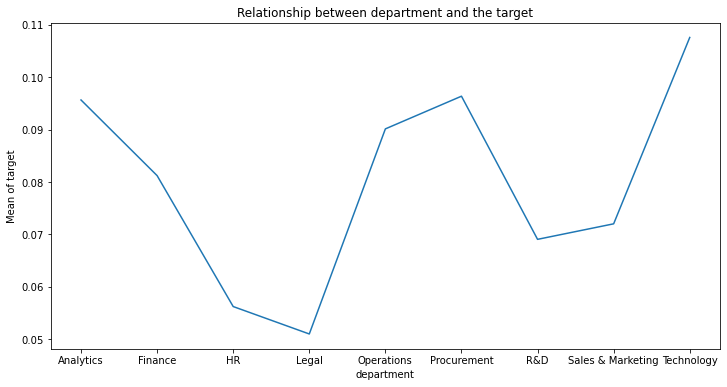

In [305]:
# Plotting line graph of department variable against is_promoted variable

data_encode_mtd_7.groupby(['department'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between department and the target')
plt.ylabel('Mean of target')
plt.show()

From the above plot, there is no monotonic relationship between the department variable and the target variable.

In [306]:
# Creating a dictionary with the target mean per category for the department variable

ordered_labels = data_encode_mtd_7.groupby(['department'])['is_promoted'].mean().to_dict()

ordered_labels

{'Analytics': 0.09566517189835576,
 'Finance': 0.08123028391167192,
 'HR': 0.05624483043837883,
 'Legal': 0.05101058710298364,
 'Operations': 0.0901480437081424,
 'Procurement': 0.0963855421686747,
 'R&D': 0.06906906906906907,
 'Sales & Marketing': 0.07203087885985748,
 'Technology': 0.10759316335107873}

In [307]:
# Replacing the labels with the target mean

data_encode_mtd_7['department'] = data_encode_mtd_7['department'].map(ordered_labels)

In [308]:
# Inspecting the result

data_encode_mtd_7['department'].head()

0    0.072031
1    0.090148
2    0.072031
3    0.072031
4    0.107593
Name: department, dtype: float64

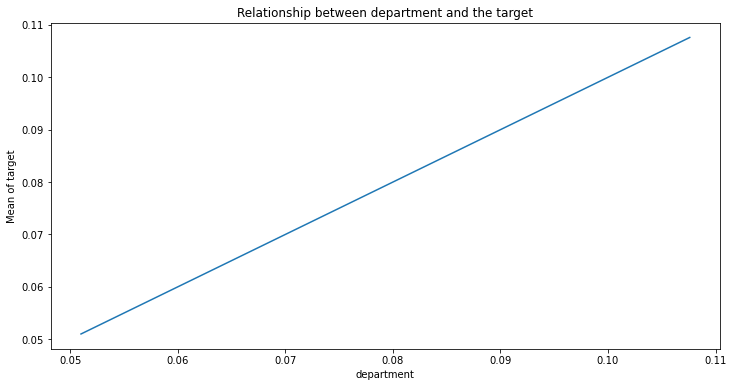

In [309]:
# Exploring the monotonic relationship between the department variable and is_promoted variable

data_encode_mtd_7.groupby(['department'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between department and the target')
plt.ylabel('Mean of target')
plt.show()

### Decision on the Ideal Method to Transform department variable into numbers

After trying all the different above methods to Transform department variable into numbers, I decided to Encode with the Mean of the target to Transform department variable into numbers.  

This is because...

1. With method 1, there would be quite a few binary variables created for department Variable. This is not great as there would be quite a few columns being created. With more columns, there are more columns to transform.


2. Method 2 represents each category of a categorical variable with a binary variable while treating the remaining, less frequent categories as a single, unique category. Method 2 is extremely useful to transform department variable into numbers. This is because department variable is a fairly cardinal categorical variable. When using method 1 to transform, it expands the feature space quite a bit. With method 2, it reduces the number of binary variables. However, I would like all the Categorical variables to be transformed by the same method. Using method 2 to transform other categorical variables may not be the best method. To be transformed with the same method, there is consistency in transforming. With a similar transforming method for all categorical variables, it may achieve a higher model performance.


3. Method 3 assigned numbers arbitrarily. Since the numbers are assigned arbitrarily, there would be no meanings to the values. 


4. Method 4 replaces the categories with the count of observations for that category. However, there are 2 categories in department variable - 'Technology' and 'Procurement' having the same percentage of observations. They will be replaced by the same value, which may lead to information loss. 


5. Method 5 replaces the categories with the percentage of observations for that category. Similar to Method 4 reasoning, there are 2 categories in department variable - 'Technology' and 'Procurement' having the same percentage of observations. They will be replaced by the same value, which may lead to information loss.


6. Method 6 creates a monotonic relationship between the categorical variable and the response. However, I feel that Encoding with Integers in an Ordered Manner would not really help with this dataset's Classification Problem - predicting whether an employee will be promoted or not.


7. Method 7 replaces the categories with the average target value for that category. Thus, I feel that the transformed values using Encode with the Mean of the target would be more helpful for this dataset's Classification Problem - predicting whether an employee will be promoted or not.


Therefore, I decided to Encode with the Mean of the target to Transform department variable into numbers.


### region variable

#### Determining Cardinality in region Variable (repeated for ease of viewing)

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [310]:
# Viewing the number of unique values in region variable
data.region.nunique()

# Note: nunique() ignores missing data by default

5

#### Inspecting Unique Categories in region Variable (repeated for ease of viewing)

In [311]:
data['region'].sort_values().unique()

array(['Rare', 'region_15', 'region_2', 'region_22', 'region_7'],
      dtype=object)

### Transforming region variable into numbers

### Method 1: Creating Binary Variables through One-Hot Encoding

In one-hot encoding, we represent a categorical variable as a group of binary variables, where each binary variable represents one category. The binary variable indicates whether the category is present in an observation (1) or not (0).

For example, we have a variable named **Gender**. **Gender** variable takes in 2 categories - **Male** and **Female**.

The one-hot encoded representation of the **Gender** variable with the categories of **Male** and **Female**  would then derive the binary variable of Female, which shows the value of 1 for females, or the binary variable of Male, which takes the value of 1 for the males in the dataset.

A categorical variable with k unique categories can be encoded in k-1 binary variables. For Gender, k is 2 as it contains two labels (male and female), therefore, we need to create only one binary variable (k - 1 = 1) to capture all of the information.

In [312]:
# One-Hot Encoding region variable
region_ohe = pd.get_dummies(data['region'])

# Visualising the result
region_ohe.head()

Rare  region_15  region_2  region_22  region_7
0     0          0         0          0         1
1     0          0         0          1         0
2     1          0         0          0         0
3     1          0         0          0         0
4     1          0         0          0         0

### Method 2: Performing One-Hot Encoding of Frequent Categories

One-hot encoding represents each category of a categorical variable with a binary variable. Hence, one-hot encoding of highly cardinal variables or datasets with multiple categorical features can expand the feature space dramatically. To reduce the number of binary variables, we can perform one-hot encoding of the most frequent categories only. 

One-hot encoding of top categories is equivalent to treating the remaining, less frequent categories as a single, unique category.

In [313]:
# make a copy of the dataframe to store the result for this method of transforming region variable into numbers

data_encode_mtd_2 = data.copy()

In [314]:
# Finding the top 5 most frequent categories in region variable

data_encode_mtd_2['region'].value_counts().sort_values(ascending=False).head(5)

Rare         28386
region_2     12343
region_22     6428
region_7      4843
region_15     2808
Name: region, dtype: int64

In [315]:
# Making a list of the top 5 most frequent categories in region variable

top_5 = [
    x for x in data_encode_mtd_2['region'].value_counts().sort_values(
        ascending=False).head(5).index
]

top_5

['Rare', 'region_2', 'region_22', 'region_7', 'region_15']

In [316]:
# Creating 5 binary variables to encode region variable

for label in top_5:
    data_encode_mtd_2['region' + '_' + label] = np.where(
        data_encode_mtd_2['region'] == label, 1, 0)

In [317]:
# Visualising the result

print(data_encode_mtd_2[['region'] + ['region'+'_'+ c for c in top_5]].head(10))

      region  region_Rare  region_region_2  region_region_22  region_region_7  \
0   region_7            0                0                 0                1   
1  region_22            0                0                 1                0   
2       Rare            1                0                 0                0   
3       Rare            1                0                 0                0   
4       Rare            1                0                 0                0   
5   region_2            0                1                 0                0   
6       Rare            1                0                 0                0   
7       Rare            1                0                 0                0   
8       Rare            1                0                 0                0   
9       Rare            1                0                 0                0   

   region_region_15  
0                 0  
1                 0  
2                 0  
3                 0 

### Method 3: Replacing Categories with Ordinal Numbers

Ordinal encoding consists of replacing the categories with digits from `1 to k` (or `0 to k-1`, depending on the implementation), where `k` is the number of distinct categories of the variable. The numbers are assigned arbitrarily. 

Ordinal encoding is better suited for non-linear machine learning models, which can navigate through the arbitrarily assigned digits to try and find patterns that relate to the target. 

In [318]:
# make a copy of the dataframe to store the result for this method of transforming region variable into numbers

data_encode_mtd_3 = data.copy()

In [319]:
# Creating a dictionary with the mappings of categories to numbers for region variable

ordinal_mapping = {
    k: i
    for i, k in enumerate(data_encode_mtd_3['region'].unique(), 0)
}

ordinal_mapping

{'region_7': 0, 'region_22': 1, 'Rare': 2, 'region_2': 3, 'region_15': 4}

In [320]:
# Replacing the labels with the integers

data_encode_mtd_3['region'] = data_encode_mtd_3['region'].map(ordinal_mapping)

In [321]:
# Exploring the result

data_encode_mtd_3['region'].head(10)

0    0
1    1
2    2
3    2
4    2
5    3
6    2
7    2
8    2
9    2
Name: region, dtype: int64

### Method 4: Replacing Categories with Counts of Observations

In count encoding, we replace the categories with the count of observations for that category. That is, if 10 out of 100 observations show the category blue for the variable color, we would replace blue with 10 when doing count encoding.

These techniques, which capture the representation of each label in a dataset, are very popular in data science competitions. The assumption is that the number of observations per category is somewhat predictive of the target.

Note: If two different categories are having the same percentage of observations, they will be replaced by the same value, which may lead to information loss.

In [322]:
# make a copy of the dataframe to store the result for this method of transforming region variable into numbers

data_encode_mtd_4 = data.copy()

In [323]:
# Obtaining the counts for each category in region variable

count_map = data_encode_mtd_4['region'].value_counts().to_dict()

count_map

{'Rare': 28386,
 'region_2': 12343,
 'region_22': 6428,
 'region_7': 4843,
 'region_15': 2808}

In [324]:
# Replacing the labels with the counts

data_encode_mtd_4['region'] = data_encode_mtd_4['region'].map(count_map)

In [325]:
# Exploring the result

data_encode_mtd_4['region'].head(10)

0     4843
1     6428
2    28386
3    28386
4    28386
5    12343
6    28386
7    28386
8    28386
9    28386
Name: region, dtype: int64

### Method 5: Replacing Categories with Frequency of observations

In frequency encoding, we replace the categories with the percentage of observations for that category. That is, if 10 out of 100 observations show the category blue for the variable color, we would replace blue with 0.1 if performing frequency encoding. 

These techniques, which capture the representation of each label in a dataset, are very popular in data science competitions. The assumption is that the number of observations per category is somewhat predictive of the target.

Note: If two different categories are having the same percentage of observations, they will be replaced by the same value, which may lead to information loss.

In [326]:
# make a copy of the dataframe to store the result for this method of transforming region variable into numbers

data_encode_mtd_5 = data.copy()

In [327]:
# By frequency: Divide the count by the total number of observations

# Obtaining the frequency for each category in region variable
frequency_map = (data_encode_mtd_5['region'].value_counts() / len(data_encode_mtd_5) ).to_dict()
frequency_map

{'Rare': 0.5179170923952707,
 'region_2': 0.22520434972996642,
 'region_22': 0.1172821485914465,
 'region_7': 0.08836301269887607,
 'region_15': 0.051233396584440226}

In [328]:
# Replacing the labels with the frequency

data_encode_mtd_5['region'] = data_encode_mtd_5['region'].map(frequency_map)

In [329]:
# Exploring the result

data_encode_mtd_5['region'].head(10)

0    0.088363
1    0.117282
2    0.517917
3    0.517917
4    0.517917
5    0.225204
6    0.517917
7    0.517917
8    0.517917
9    0.517917
Name: region, dtype: float64

### Method 6: Encoding with Integers in an Ordered Manner

In Method 3: Replacing categories with ordinal numbers, I replaced categories with integers, which were assigned arbitrarily. This encoding works well with non-linear machine learning algorithms that can navigate through the arbitrarily assigned digits to try and find patterns that relate them to the target. However, that encoding method may not work so well with linear models.

I can instead assign integers to the categories given the target values. To do this, do the following:
* 1.Calculate the mean value of the target per category.
* 2.Order the categories from the one with the lowest to the one with the highest target mean value.
* 3.Assign digits to the ordered categories, starting with 0 to the first category all of the way up to `k-1` to the last category, where k is the number of distinct categories.

This encoding technique creates a monotonic relationship between the categorical variable and the response and therefore makes the variables more adequate for use in linear models.

Monotonic means strictly increasing or decreasing.

In [330]:
# make a copy of the dataframe to store the result for this method of transforming region variable into numbers

data_encode_mtd_6 = data.copy()

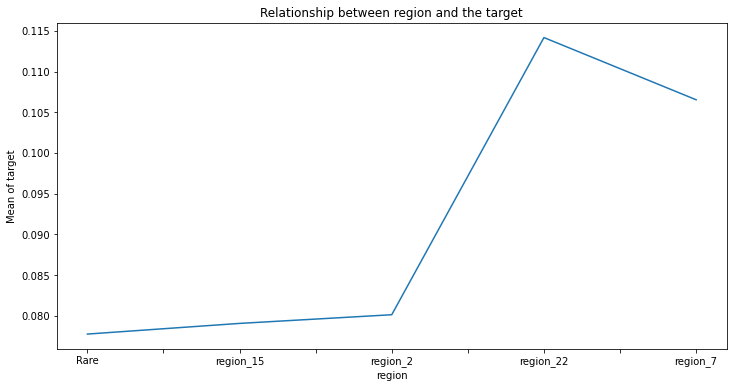

In [331]:
# Plotting line graph of region variable against is_promoted variable

data_encode_mtd_6.groupby(['region'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between region and the target')
plt.ylabel('Mean of target')
plt.show()

From the above plot, there is no monotonic relationship between the region variable and the target variable.

In [332]:
# Ordering the labels in region variable according to the mean target value

data_encode_mtd_6.groupby(['region'])['is_promoted'].mean().sort_values()

region
Rare         0.077750
region_15    0.079060
region_2     0.080126
region_7     0.106546
region_22    0.114188
Name: is_promoted, dtype: float64

In [333]:
# Generating an ordered list with the labels of region variable

ordered_labels = data_encode_mtd_6.groupby(['region'])['is_promoted'].mean().sort_values().index

ordered_labels

Index(['Rare', 'region_15', 'region_2', 'region_7', 'region_22'], dtype='object', name='region')

In [334]:
# Creating a dictionary with the mappings of categories to numbers

ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

ordinal_mapping

{'Rare': 0, 'region_15': 1, 'region_2': 2, 'region_7': 3, 'region_22': 4}

In [335]:
# Replacing the labels with the ordered numbers

data_encode_mtd_6['region'] = data_encode_mtd_6['region'].map(ordinal_mapping)

In [336]:
# Exploring the result

data_encode_mtd_6['region'].head()

0    3
1    4
2    0
3    0
4    0
Name: region, dtype: int64

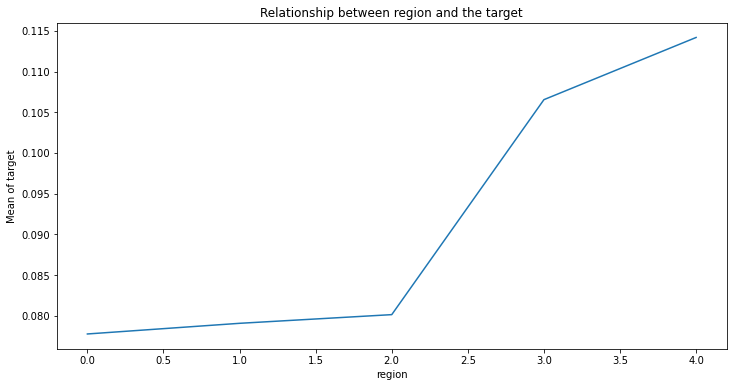

In [337]:
# Exploring the monotonic relationship between the region variable and is_promoted variable

data_encode_mtd_6.groupby(['region'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between region and the target')
plt.ylabel('Mean of target')
plt.show()

### Method 7: Encoding with the Mean of the target

Mean encoding or target encoding implies replacing the categories with the average target value for that category. For example, if we have a City variable, with the categories of London, Manchester, and Bristol, and we want to predict the default rate; if the default rate for London is 30%, we replace London with 0.3; if the default rate for Manchester is 20%, we replace Manchester with 0.2; and so on. The same can be done with a continuous target.

In [338]:
# make a copy of the dataframe to store the result for this method of transforming region variable into numbers

data_encode_mtd_7 = data.copy()

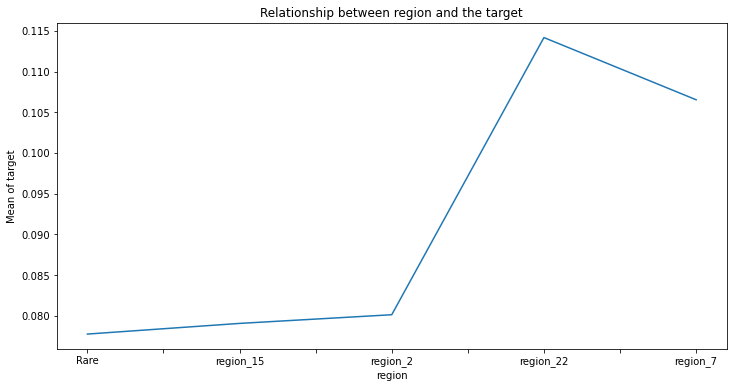

In [339]:
# Plotting line graph of region variable against is_promoted variable

data_encode_mtd_7.groupby(['region'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between region and the target')
plt.ylabel('Mean of target')
plt.show()

From the above plot, there is no monotonic relationship between the region variable and the target variable.

In [340]:
# Creating a dictionary with the target mean per category for the region variable

ordered_labels = data_encode_mtd_7.groupby(['region'])['is_promoted'].mean().to_dict()

ordered_labels

{'Rare': 0.07774959487071091,
 'region_15': 0.07905982905982906,
 'region_2': 0.08012638742607146,
 'region_22': 0.11418792781580585,
 'region_7': 0.10654552963039439}

In [341]:
# Replacing the labels with the target mean

data_encode_mtd_7['region'] = data_encode_mtd_7['region'].map(ordered_labels)

In [342]:
# Inspecting the result

data_encode_mtd_7['region'].head()

0    0.106546
1    0.114188
2    0.077750
3    0.077750
4    0.077750
Name: region, dtype: float64

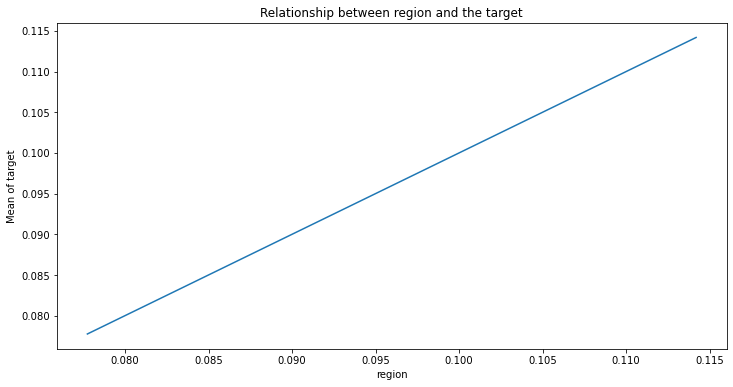

In [343]:
# Exploring the monotonic relationship between the region variable and is_promoted variable

data_encode_mtd_7.groupby(['region'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between region and the target')
plt.ylabel('Mean of target')
plt.show()

### Decision on the Ideal Method to Transform region variable into numbers

After trying all the different above methods to Transform region variable into numbers, I decided to Encode with the Mean of the target to Transform region variable into numbers.  

This is because...

1. With method 1, there would only be 4 binary variables created for region variable. This is because there are only 5 categories in region variable. There are 5 categories in region variable because I grouped infrequent categories in region variable into a new category called Rare in Section 1.2.2: Feature Engine. This is great as there would not be many columns being created. However, I would like all the Categorical variables to be transformed by the same method. Using method 1 to transform other categorical variables may not be the best method. To be transformed with the same method, there is consistency in transforming. With a similar transforming method for all categorical variables, it may achieve a higher model performance.


2. As mentioned earlier, there are only 5 categories to transform in region variable. With that, method 2 would achieve the same results as Method 1.


3. Method 3 assigned numbers arbitrarily. Since the numbers are assigned arbitrarily, there would be no meanings to the values. 


4. Method 4 replaces the categories with the count of observations for that category. Even though, the 5 categories of region variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 4 to replace categorical data.


5. Method 5 replaces the categories with the percentage of observations for that category. Similar to Method 4's reasoning, even though, the 5 categories of region variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 5 to replace categorical data. 


6. Method 6 creates a monotonic relationship between the categorical variable and the response. However, I feel that Encoding with Integers in an Ordered Manner would not really help with this dataset's Classification Problem - predicting whether an employee will be promoted or not.


7. Method 7 replaces the categories with the average target value for that category. Thus, I feel that the transformed values using Encode with the Mean of the target would be more helpful for this dataset's Classification Problem - predicting whether an employee will be promoted or not.


Therefore, I decided to Encode with the Mean of the target to Transform region variable into numbers.


### education variable

#### Determining Cardinality in education Variable 

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [344]:
# Viewing the number of unique values in education variable
data.education.nunique()

# Note: nunique() ignores missing data by default

3

#### Inspecting Unique Categories in education Variable (repeated for ease of viewing)

In [345]:
data['education'].sort_values().unique()

array(["Bachelor's", 'Below Secondary', "Master's & above"], dtype=object)

### Transforming education variable into numbers

### Method 1: Creating Binary Variables through One-Hot Encoding

In one-hot encoding, we represent a categorical variable as a group of binary variables, where each binary variable represents one category. The binary variable indicates whether the category is present in an observation (1) or not (0).

For example, we have a variable named **Gender**. **Gender** variable takes in 2 categories - **Male** and **Female**.

The one-hot encoded representation of the **Gender** variable with the categories of **Male** and **Female**  would then derive the binary variable of Female, which shows the value of 1 for females, or the binary variable of Male, which takes the value of 1 for the males in the dataset.

A categorical variable with k unique categories can be encoded in k-1 binary variables. For Gender, k is 2 as it contains two labels (male and female), therefore, we need to create only one binary variable (k - 1 = 1) to capture all of the information.

In [346]:
# One-Hot Encoding education variable
education_ohe = pd.get_dummies(data['education'])

# Visualising the result
education_ohe.head()

Bachelor's  Below Secondary  Master's & above
0           0                0                 1
1           1                0                 0
2           1                0                 0
3           1                0                 0
4           1                0                 0

### Method 2: Performing One-Hot Encoding of Frequent Categories

One-hot encoding represents each category of a categorical variable with a binary variable. Hence, one-hot encoding of highly cardinal variables or datasets with multiple categorical features can expand the feature space dramatically. To reduce the number of binary variables, we can perform one-hot encoding of the most frequent categories only. 

One-hot encoding of top categories is equivalent to treating the remaining, less frequent categories as a single, unique category.

In [347]:
# make a copy of the dataframe to store the result for this method of transforming education variable into numbers

data_encode_mtd_2 = data.copy()

In [348]:
# Finding the top 5 most frequent categories in education variable

data_encode_mtd_2['education'].value_counts().sort_values(ascending=False).head(5)

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [349]:
# Making a list of the top 5 most frequent categories in education variable

top_5 = [
    x for x in data_encode_mtd_2['education'].value_counts().sort_values(
        ascending=False).head(5).index
]

top_5

["Bachelor's", "Master's & above", 'Below Secondary']

In [350]:
# Creating 5 binary variables to encode education variable

for label in top_5:
    data_encode_mtd_2['education' + '_' + label] = np.where(
        data_encode_mtd_2['education'] == label, 1, 0)

In [351]:
# Visualising the result

print(data_encode_mtd_2[['education'] + ['education'+'_'+ c for c in top_5]].head(10))

          education  education_Bachelor's  education_Master's & above  \
0  Master's & above                     0                           1   
1        Bachelor's                     1                           0   
2        Bachelor's                     1                           0   
3        Bachelor's                     1                           0   
4        Bachelor's                     1                           0   
5        Bachelor's                     1                           0   
6        Bachelor's                     1                           0   
7  Master's & above                     0                           1   
8        Bachelor's                     1                           0   
9  Master's & above                     0                           1   

   education_Below Secondary  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
5         

### Method 3: Replacing Categories with Ordinal Numbers

Ordinal encoding consists of replacing the categories with digits from `1 to k` (or `0 to k-1`, depending on the implementation), where `k` is the number of distinct categories of the variable. The numbers are assigned arbitrarily. 

Ordinal encoding is better suited for non-linear machine learning models, which can navigate through the arbitrarily assigned digits to try and find patterns that relate to the target. 

In [352]:
# make a copy of the dataframe to store the result for this method of transforming education variable into numbers

data_encode_mtd_3 = data.copy()

In [353]:
# Creating a dictionary with the mappings of categories to numbers for education variable

ordinal_mapping = {
    k: i
    for i, k in enumerate(data_encode_mtd_3['education'].unique(), 0)
}

ordinal_mapping

{"Master's & above": 0, "Bachelor's": 1, 'Below Secondary': 2}

In [354]:
# Replacing the labels with the integers

data_encode_mtd_3['education'] = data_encode_mtd_3['education'].map(ordinal_mapping)

In [355]:
# Exploring the result

data_encode_mtd_3['education'].head(10)

0    0
1    1
2    1
3    1
4    1
5    1
6    1
7    0
8    1
9    0
Name: education, dtype: int64

### Method 4: Replacing Categories with Counts of Observations

In count encoding, we replace the categories with the count of observations for that category. That is, if 10 out of 100 observations show the category blue for the variable color, we would replace blue with 10 when doing count encoding.

These techniques, which capture the representation of each label in a dataset, are very popular in data science competitions. The assumption is that the number of observations per category is somewhat predictive of the target.

Note: If two different categories are having the same percentage of observations, they will be replaced by the same value, which may lead to information loss.

In [356]:
# make a copy of the dataframe to store the result for this method of transforming education variable into numbers

data_encode_mtd_4 = data.copy()

In [357]:
# Obtaining the counts for each category in education variable

count_map = data_encode_mtd_4['education'].value_counts().to_dict()

count_map

{"Bachelor's": 39078, "Master's & above": 14925, 'Below Secondary': 805}

In [358]:
# Replacing the labels with the counts

data_encode_mtd_4['education'] = data_encode_mtd_4['education'].map(count_map)

In [359]:
# Exploring the result

data_encode_mtd_4['education'].head(10)

0    14925
1    39078
2    39078
3    39078
4    39078
5    39078
6    39078
7    14925
8    39078
9    14925
Name: education, dtype: int64

### Method 5: Replacing Categories with Frequency of observations

In frequency encoding, we replace the categories with the percentage of observations for that category. That is, if 10 out of 100 observations show the category blue for the variable color, we would replace blue with 0.1 if performing frequency encoding. 

These techniques, which capture the representation of each label in a dataset, are very popular in data science competitions. The assumption is that the number of observations per category is somewhat predictive of the target.

Note: If two different categories are having the same percentage of observations, they will be replaced by the same value, which may lead to information loss.

In [360]:
# make a copy of the dataframe to store the result for this method of transforming education variable into numbers

data_encode_mtd_5 = data.copy()

In [361]:
# By frequency: Divide the count by the total number of observations

# Obtaining the frequency for each category in education variable
frequency_map = (data_encode_mtd_5['education'].value_counts() / len(data_encode_mtd_5) ).to_dict()
frequency_map

{"Bachelor's": 0.7129981024667932,
 "Master's & above": 0.2723142606918698,
 'Below Secondary': 0.014687636841337032}

In [362]:
# Replacing the labels with the frequency

data_encode_mtd_5['education'] = data_encode_mtd_5['education'].map(frequency_map)

In [363]:
# Exploring the result

data_encode_mtd_5['education'].head(10)

0    0.272314
1    0.712998
2    0.712998
3    0.712998
4    0.712998
5    0.712998
6    0.712998
7    0.272314
8    0.712998
9    0.272314
Name: education, dtype: float64

### Method 6: Encoding with Integers in an Ordered Manner

In Method 3: Replacing categories with ordinal numbers, I replaced categories with integers, which were assigned arbitrarily. This encoding works well with non-linear machine learning algorithms that can navigate through the arbitrarily assigned digits to try and find patterns that relate them to the target. However, that encoding method may not work so well with linear models.

I can instead assign integers to the categories given the target values. To do this, do the following:
* 1.Calculate the mean value of the target per category.
* 2.Order the categories from the one with the lowest to the one with the highest target mean value.
* 3.Assign digits to the ordered categories, starting with 0 to the first category all of the way up to `k-1` to the last category, where k is the number of distinct categories.

This encoding technique creates a monotonic relationship between the categorical variable and the response and therefore makes the variables more adequate for use in linear models.

Monotonic means strictly increasing or decreasing.

In [364]:
# make a copy of the dataframe to store the result for this method of transforming education variable into numbers

data_encode_mtd_6 = data.copy()

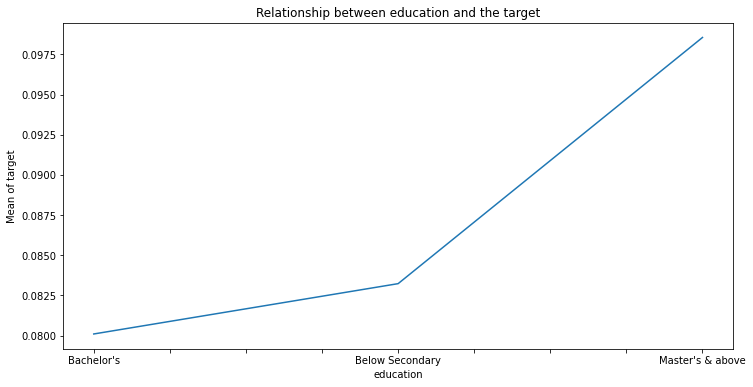

In [365]:
# Plotting line graph of education variable against is_promoted variable

data_encode_mtd_6.groupby(['education'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between education and the target')
plt.ylabel('Mean of target')
plt.show()

From the above plot, there is a monotonic relationship between the education variable and the target variable.

In [366]:
# Ordering the labels in education variable according to the mean target value

data_encode_mtd_6.groupby(['education'])['is_promoted'].mean().sort_values()

education
Bachelor's          0.080096
Below Secondary     0.083230
Master's & above    0.098559
Name: is_promoted, dtype: float64

In [367]:
# Generating an ordered list with the labels of education variable

ordered_labels = data_encode_mtd_6.groupby(['education'])['is_promoted'].mean().sort_values().index

ordered_labels

Index(['Bachelor's', 'Below Secondary', 'Master's & above'], dtype='object', name='education')

In [368]:
# Creating a dictionary with the mappings of categories to numbers

ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

ordinal_mapping

{"Bachelor's": 0, 'Below Secondary': 1, "Master's & above": 2}

In [369]:
# Replacing the labels with the ordered numbers

data_encode_mtd_6['education'] = data_encode_mtd_6['education'].map(ordinal_mapping)

In [370]:
# Exploring the result

data_encode_mtd_6['education'].head()

0    2
1    0
2    0
3    0
4    0
Name: education, dtype: int64

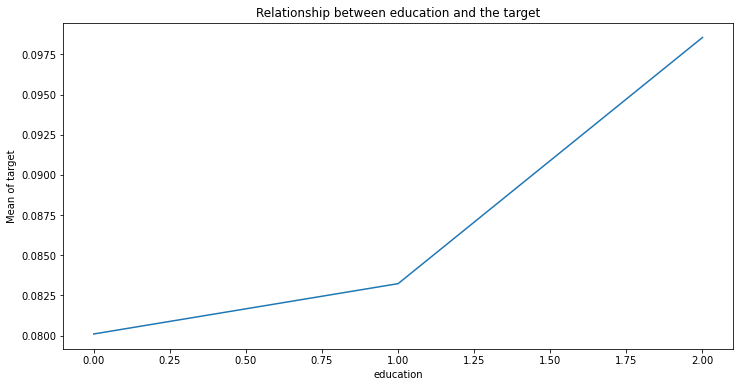

In [371]:
# Exploring the monotonic relationship between the education variable and is_promoted variable

data_encode_mtd_6.groupby(['education'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between education and the target')
plt.ylabel('Mean of target')
plt.show()

### Method 7: Encoding with the Mean of the target

Mean encoding or target encoding implies replacing the categories with the average target value for that category. For example, if we have a City variable, with the categories of London, Manchester, and Bristol, and we want to predict the default rate; if the default rate for London is 30%, we replace London with 0.3; if the default rate for Manchester is 20%, we replace Manchester with 0.2; and so on. The same can be done with a continuous target.

In [372]:
# make a copy of the dataframe to store the result for this method of transforming education variable into numbers

data_encode_mtd_7 = data.copy()

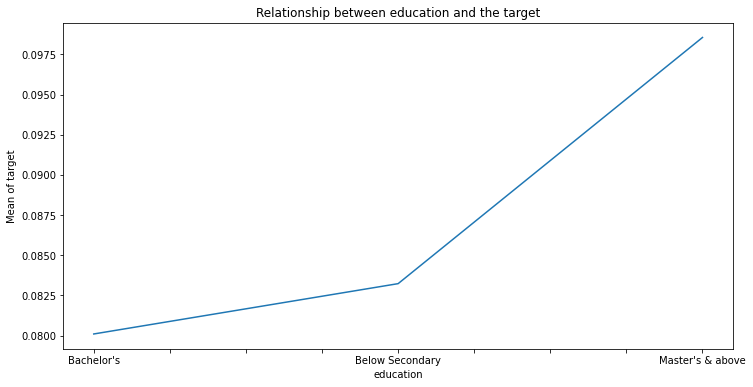

In [373]:
# Plotting line graph of education variable against is_promoted variable

data_encode_mtd_7.groupby(['education'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between education and the target')
plt.ylabel('Mean of target')
plt.show()

From the above plot, there is a monotonic relationship between the education variable and the target variable.

In [374]:
# Creating a dictionary with the target mean per category for the education variable

ordered_labels = data_encode_mtd_7.groupby(['education'])['is_promoted'].mean().to_dict()

ordered_labels

{"Bachelor's": 0.08009621782076871,
 'Below Secondary': 0.08322981366459627,
 "Master's & above": 0.09855946398659966}

In [375]:
# Replacing the labels with the target mean

data_encode_mtd_7['education'] = data_encode_mtd_7['education'].map(ordered_labels)

In [376]:
# Inspecting the result

data_encode_mtd_7['education'].head()

0    0.098559
1    0.080096
2    0.080096
3    0.080096
4    0.080096
Name: education, dtype: float64

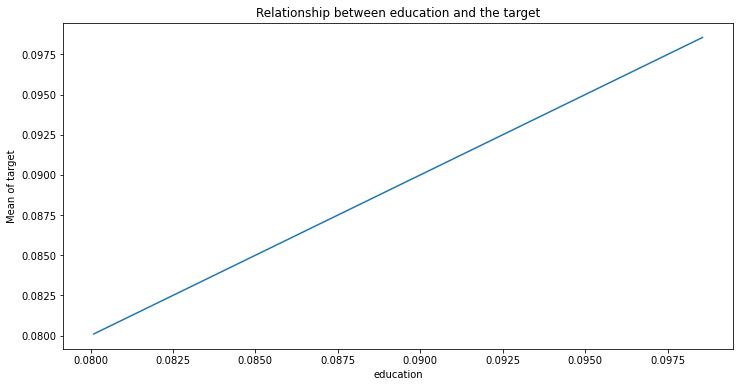

In [377]:
# Exploring the monotonic relationship between the education variable and is_promoted variable

data_encode_mtd_7.groupby(['education'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between education and the target')
plt.ylabel('Mean of target')
plt.show()

### Decision on the Ideal Method to Transform education variable into numbers

After trying all the different above methods to Transform education variable into numbers, I decided to Encode with the Mean of the target to Transform education variable into numbers.  

This is because...

1. With method 1, there would only be 2 binary variables created for education variable. This is because there are only 3 categories in education variable. There are 3 categories in education variable because I imputed missing values in education by the mode - 'Bachelor's' in Section 1.2.1: Missing Values. This is great as there would not be many columns being created. However, I would like all the Categorical variables to be transformed by the same method. Using method 1 to transform other categorical variables may not be the best method. To be transformed with the same method, there is consistency in transforming. With a similar transforming method for all categorical variables, it may achieve a higher model performance.


2. As mentioned earlier, there are only 3 categories to transform in region variable. With that, method 2 would achieve the same results as Method 1.


3. Method 3 assigned numbers arbitrarily. Since the numbers are assigned arbitrarily, there would be no meanings to the values. 


4. Method 4 replaces the categories with the count of observations for that category. Even though, the 3 categories of education variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 4 to replace categorical data.


5. Method 5 replaces the categories with the percentage of observations for that category. Similar to Method 4's reasoning, even though, the 3 categories of education variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 5 to replace categorical data. 


6. Method 6 creates a monotonic relationship between the categorical variable and the response. However, I feel that Encoding with Integers in an Ordered Manner would not really help with this dataset's Classification Problem - predicting whether an employee will be promoted or not.


7. Method 7 replaces the categories with the average target value for that category. Thus, I feel that the transformed values using Encode with the Mean of the target would be more helpful for this dataset's Classification Problem - predicting whether an employee will be promoted or not.


Therefore, I decided to Encode with the Mean of the target to Transform education variable into numbers.


### gender variable

#### Determining Cardinality in gender Variable 

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [378]:
# Viewing the number of unique values in gender variable
data.gender.nunique()

# Note: nunique() ignores missing data by default

2

#### Inspecting Unique Categories in gender Variable (repeated for ease of viewing)

In [379]:
data['gender'].sort_values().unique()

array(['f', 'm'], dtype=object)

### Transforming gender variable into numbers

### Method 1: Creating Binary Variables through One-Hot Encoding

In one-hot encoding, we represent a categorical variable as a group of binary variables, where each binary variable represents one category. The binary variable indicates whether the category is present in an observation (1) or not (0).

For example, we have a variable named **Gender**. **Gender** variable takes in 2 categories - **Male** and **Female**.

The one-hot encoded representation of the **Gender** variable with the categories of **Male** and **Female**  would then derive the binary variable of Female, which shows the value of 1 for females, or the binary variable of Male, which takes the value of 1 for the males in the dataset.

A categorical variable with k unique categories can be encoded in k-1 binary variables. For Gender, k is 2 as it contains two labels (male and female), therefore, we need to create only one binary variable (k - 1 = 1) to capture all of the information.

In [380]:
# One-Hot Encoding gender variable
gender_ohe = pd.get_dummies(data['gender'])

# Visualising the result
gender_ohe.head()

f  m
0  1  0
1  0  1
2  0  1
3  0  1
4  0  1

### Method 2: Performing One-Hot Encoding of Frequent Categories

One-hot encoding represents each category of a categorical variable with a binary variable. Hence, one-hot encoding of highly cardinal variables or datasets with multiple categorical features can expand the feature space dramatically. To reduce the number of binary variables, we can perform one-hot encoding of the most frequent categories only. 

One-hot encoding of top categories is equivalent to treating the remaining, less frequent categories as a single, unique category.

In [381]:
# make a copy of the dataframe to store the result for this method of transforming gender variable into numbers

data_encode_mtd_2 = data.copy()

In [382]:
# Finding the top 5 most frequent categories in gender variable

data_encode_mtd_2['gender'].value_counts().sort_values(ascending=False).head(5)

m    38496
f    16312
Name: gender, dtype: int64

In [383]:
# Making a list of the top 5 most frequent categories in gender variable

top_5 = [
    x for x in data_encode_mtd_2['gender'].value_counts().sort_values(
        ascending=False).head(5).index
]

top_5

['m', 'f']

In [384]:
# Creating 5 binary variables to encode gender variable

for label in top_5:
    data_encode_mtd_2['gender' + '_' + label] = np.where(
        data_encode_mtd_2['gender'] == label, 1, 0)

In [385]:
# Visualising the result

print(data_encode_mtd_2[['gender'] + ['gender'+'_'+ c for c in top_5]].head(10))

  gender  gender_m  gender_f
0      f         0         1
1      m         1         0
2      m         1         0
3      m         1         0
4      m         1         0
5      m         1         0
6      f         0         1
7      m         1         0
8      m         1         0
9      m         1         0


### Method 3: Replacing Categories with Ordinal Numbers

Ordinal encoding consists of replacing the categories with digits from `1 to k` (or `0 to k-1`, depending on the implementation), where `k` is the number of distinct categories of the variable. The numbers are assigned arbitrarily. 

Ordinal encoding is better suited for non-linear machine learning models, which can navigate through the arbitrarily assigned digits to try and find patterns that relate to the target. 

In [386]:
# make a copy of the dataframe to store the result for this method of transforming gender variable into numbers

data_encode_mtd_3 = data.copy()

In [387]:
# Creating a dictionary with the mappings of categories to numbers for gender variable

ordinal_mapping = {
    k: i
    for i, k in enumerate(data_encode_mtd_3['gender'].unique(), 0)
}

ordinal_mapping

{'f': 0, 'm': 1}

In [388]:
# Replacing the labels with the integers

data_encode_mtd_3['gender'] = data_encode_mtd_3['gender'].map(ordinal_mapping)

In [389]:
# Exploring the result

data_encode_mtd_3['gender'].head(10)

0    0
1    1
2    1
3    1
4    1
5    1
6    0
7    1
8    1
9    1
Name: gender, dtype: int64

### Method 4: Replacing Categories with Counts of Observations

In count encoding, we replace the categories with the count of observations for that category. That is, if 10 out of 100 observations show the category blue for the variable color, we would replace blue with 10 when doing count encoding.

These techniques, which capture the representation of each label in a dataset, are very popular in data science competitions. The assumption is that the number of observations per category is somewhat predictive of the target.

Note: If two different categories are having the same percentage of observations, they will be replaced by the same value, which may lead to information loss.

In [390]:
# make a copy of the dataframe to store the result for this method of transforming gender variable into numbers

data_encode_mtd_4 = data.copy()

In [391]:
# Obtaining the counts for each category in gender variable

count_map = data_encode_mtd_4['gender'].value_counts().to_dict()

count_map

{'m': 38496, 'f': 16312}

In [392]:
# Replacing the labels with the counts

data_encode_mtd_4['gender'] = data_encode_mtd_4['gender'].map(count_map)

In [393]:
# Exploring the result

data_encode_mtd_4['gender'].head(10)

0    16312
1    38496
2    38496
3    38496
4    38496
5    38496
6    16312
7    38496
8    38496
9    38496
Name: gender, dtype: int64

### Method 5: Replacing Categories with Frequency of observations

In frequency encoding, we replace the categories with the percentage of observations for that category. That is, if 10 out of 100 observations show the category blue for the variable color, we would replace blue with 0.1 if performing frequency encoding. 

These techniques, which capture the representation of each label in a dataset, are very popular in data science competitions. The assumption is that the number of observations per category is somewhat predictive of the target.

Note: If two different categories are having the same percentage of observations, they will be replaced by the same value, which may lead to information loss.

In [394]:
# make a copy of the dataframe to store the result for this method of transforming gender variable into numbers

data_encode_mtd_5 = data.copy()

In [395]:
# By frequency: Divide the count by the total number of observations

# Obtaining the frequency for each category in gender variable
frequency_map = (data_encode_mtd_5['gender'].value_counts() / len(data_encode_mtd_5) ).to_dict()
frequency_map

{'m': 0.7023792147131805, 'f': 0.29762078528681946}

In [396]:
# Replacing the labels with the frequency

data_encode_mtd_5['gender'] = data_encode_mtd_5['gender'].map(frequency_map)

In [397]:
# Exploring the result

data_encode_mtd_5['gender'].head(10)

0    0.297621
1    0.702379
2    0.702379
3    0.702379
4    0.702379
5    0.702379
6    0.297621
7    0.702379
8    0.702379
9    0.702379
Name: gender, dtype: float64

### Method 6: Encoding with Integers in an Ordered Manner

In Method 3: Replacing categories with ordinal numbers, I replaced categories with integers, which were assigned arbitrarily. This encoding works well with non-linear machine learning algorithms that can navigate through the arbitrarily assigned digits to try and find patterns that relate them to the target. However, that encoding method may not work so well with linear models.

I can instead assign integers to the categories given the target values. To do this, do the following:
* 1.Calculate the mean value of the target per category.
* 2.Order the categories from the one with the lowest to the one with the highest target mean value.
* 3.Assign digits to the ordered categories, starting with 0 to the first category all of the way up to `k-1` to the last category, where k is the number of distinct categories.

This encoding technique creates a monotonic relationship between the categorical variable and the response and therefore makes the variables more adequate for use in linear models.

Monotonic means strictly increasing or decreasing.

In [398]:
# make a copy of the dataframe to store the result for this method of transforming gender variable into numbers

data_encode_mtd_6 = data.copy()

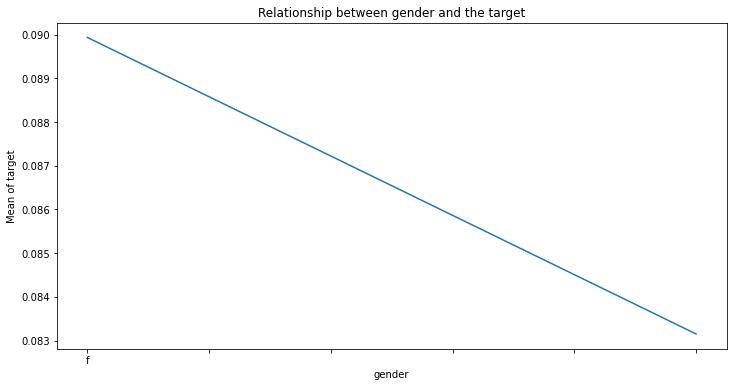

In [399]:
# Plotting line graph of gender variable against is_promoted variable

data_encode_mtd_6.groupby(['gender'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between gender and the target')
plt.ylabel('Mean of target')
plt.show()

From the above plot, there is a monotonic relationship between the gender variable and the target variable.

In [400]:
# Ordering the labels in gender variable according to the mean target value

data_encode_mtd_6.groupby(['gender'])['is_promoted'].mean().sort_values()

gender
m    0.083151
f    0.089934
Name: is_promoted, dtype: float64

In [401]:
# Generating an ordered list with the labels of gender variable

ordered_labels = data_encode_mtd_6.groupby(['gender'])['is_promoted'].mean().sort_values().index

ordered_labels

Index(['m', 'f'], dtype='object', name='gender')

In [402]:
# Creating a dictionary with the mappings of categories to numbers

ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

ordinal_mapping

{'m': 0, 'f': 1}

In [403]:
# Replacing the labels with the ordered numbers

data_encode_mtd_6['gender'] = data_encode_mtd_6['gender'].map(ordinal_mapping)

In [404]:
# Exploring the result

data_encode_mtd_6['gender'].head()

0    1
1    0
2    0
3    0
4    0
Name: gender, dtype: int64

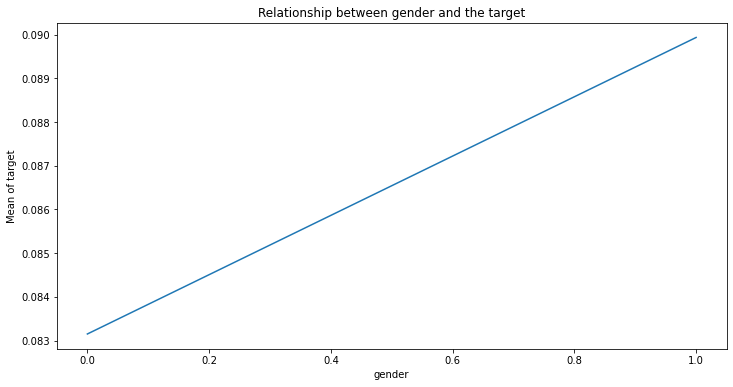

In [405]:
# Exploring the monotonic relationship between the gender variable and is_promoted variable

data_encode_mtd_6.groupby(['gender'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between gender and the target')
plt.ylabel('Mean of target')
plt.show()

### Method 7: Encoding with the Mean of the target

Mean encoding or target encoding implies replacing the categories with the average target value for that category. For example, if we have a City variable, with the categories of London, Manchester, and Bristol, and we want to predict the default rate; if the default rate for London is 30%, we replace London with 0.3; if the default rate for Manchester is 20%, we replace Manchester with 0.2; and so on. The same can be done with a continuous target.

In [406]:
# make a copy of the dataframe to store the result for this method of transforming gender variable into numbers

data_encode_mtd_7 = data.copy()

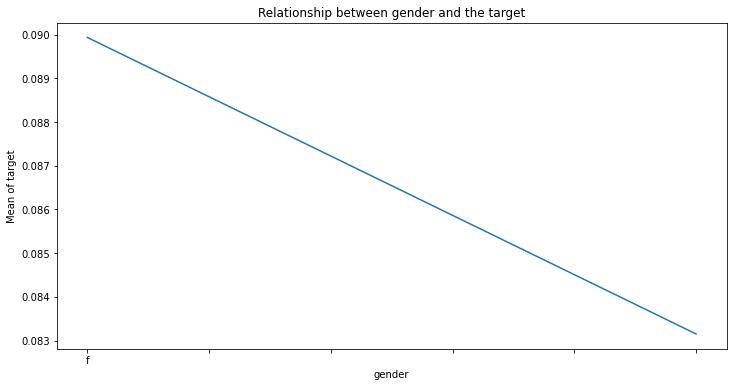

In [407]:
# Plotting line graph of gender variable against is_promoted variable

data_encode_mtd_7.groupby(['gender'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between gender and the target')
plt.ylabel('Mean of target')
plt.show()

From the above plot, there is a monotonic relationship between the gender variable and the target variable.

In [408]:
# Creating a dictionary with the target mean per category for the gender variable

ordered_labels = data_encode_mtd_7.groupby(['gender'])['is_promoted'].mean().to_dict()

ordered_labels

{'f': 0.08993379107405591, 'm': 0.08315149625935161}

In [409]:
# Replacing the labels with the target mean

data_encode_mtd_7['gender'] = data_encode_mtd_7['gender'].map(ordered_labels)

In [410]:
# Inspecting the result

data_encode_mtd_7['gender'].head()

0    0.089934
1    0.083151
2    0.083151
3    0.083151
4    0.083151
Name: gender, dtype: float64

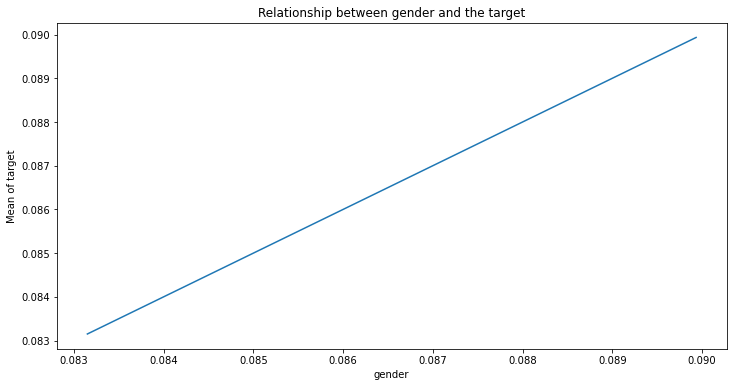

In [411]:
# Exploring the monotonic relationship between the gender variable and is_promoted variable

data_encode_mtd_7.groupby(['gender'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between gender and the target')
plt.ylabel('Mean of target')
plt.show()

### Decision on the Ideal Method to Transform gender variable into numbers

After trying all the different above methods to Transform gender variable into numbers, I decided to Encode with the Mean of the target to Transform gender variable into numbers.  

This is because...

1. With method 1, there would only be 1 binary variable created for gender variable. This is because there are only 2 categories in gender variable. This is great as there would not be many columns being created. However, I would like all the Categorical variables to be transformed by the same method. Using method 1 to transform other categorical variables may not be the best method. To be transformed with the same method, there is consistency in transforming. With a similar transforming method for all categorical variables, it may achieve a higher model performance.


2. As mentioned earlier, there are only 2 categories to transform in gender variable. With that, method 2 would achieve the same results as Method 1.


3. Method 3 assigned numbers arbitrarily. Since the numbers are assigned arbitrarily, there would be no meanings to the values. 


4. Method 4 replaces the categories with the count of observations for that category. Even though, the 2 categories of gender variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 4 to replace categorical data.


5. Method 5 replaces the categories with the percentage of observations for that category. Similar to Method 4's reasoning, even though, the 2 categories of gender variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 5 to replace categorical data. 


6. Method 6 creates a monotonic relationship between the categorical variable and the response. However, I feel that Encoding with Integers in an Ordered Manner would not really help with this dataset's Classification Problem - predicting whether an employee will be promoted or not.


7. Method 7 replaces the categories with the average target value for that category. Thus, I feel that the transformed values using Encode with the Mean of the target would be more helpful for this dataset's Classification Problem - predicting whether an employee will be promoted or not.


Therefore, I decided to Encode with the Mean of the target to Transform gender variable into numbers.


### recruitment_channel variable

#### Determining Cardinality in recruitment_channel Variable 

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [412]:
# Viewing the number of unique values in recruitment_channel variable
data.recruitment_channel.nunique()

# Note: nunique() ignores missing data by default

3

#### Inspecting Unique Categories in recruitment_channel Variable (repeated for ease of viewing)

In [413]:
data['recruitment_channel'].sort_values().unique()

array(['other', 'referred', 'sourcing'], dtype=object)

### Transforming recruitment_channel variable into numbers

### Method 1: Creating Binary Variables through One-Hot Encoding

In one-hot encoding, we represent a categorical variable as a group of binary variables, where each binary variable represents one category. The binary variable indicates whether the category is present in an observation (1) or not (0).

For example, we have a variable named **Gender**. **Gender** variable takes in 2 categories - **Male** and **Female**.

The one-hot encoded representation of the **Gender** variable with the categories of **Male** and **Female**  would then derive the binary variable of Female, which shows the value of 1 for females, or the binary variable of Male, which takes the value of 1 for the males in the dataset.

A categorical variable with k unique categories can be encoded in k-1 binary variables. For Gender, k is 2 as it contains two labels (male and female), therefore, we need to create only one binary variable (k - 1 = 1) to capture all of the information.

In [414]:
# One-Hot Encoding recruitment_channel variable
rc_ohe = pd.get_dummies(data['recruitment_channel'])

# Visualising the result
rc_ohe.head()

other  referred  sourcing
0      0         0         1
1      1         0         0
2      0         0         1
3      1         0         0
4      1         0         0

### Method 2: Performing One-Hot Encoding of Frequent Categories

One-hot encoding represents each category of a categorical variable with a binary variable. Hence, one-hot encoding of highly cardinal variables or datasets with multiple categorical features can expand the feature space dramatically. To reduce the number of binary variables, we can perform one-hot encoding of the most frequent categories only. 

One-hot encoding of top categories is equivalent to treating the remaining, less frequent categories as a single, unique category.

In [415]:
# make a copy of the dataframe to store the result for this method of transforming recruitment_channel variable into numbers

data_encode_mtd_2 = data.copy()

In [416]:
# Finding the top 5 most frequent categories in recruitment_channel variable

data_encode_mtd_2['recruitment_channel'].value_counts().sort_values(ascending=False).head(5)

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [417]:
# Making a list of the top 5 most frequent categories in recruitment_channel variable

top_5 = [
    x for x in data_encode_mtd_2['recruitment_channel'].value_counts().sort_values(
        ascending=False).head(5).index
]

top_5

['other', 'sourcing', 'referred']

In [418]:
# Creating 5 binary variables to encode recruitment_channel variable

for label in top_5:
    data_encode_mtd_2['recruitment_channel' + '_' + label] = np.where(
        data_encode_mtd_2['recruitment_channel'] == label, 1, 0)

In [419]:
# Visualising the result

print(data_encode_mtd_2[['recruitment_channel'] + ['recruitment_channel'+'_'+ c for c in top_5]].head(10))

  recruitment_channel  recruitment_channel_other  \
0            sourcing                          0   
1               other                          1   
2            sourcing                          0   
3               other                          1   
4               other                          1   
5            sourcing                          0   
6               other                          1   
7            sourcing                          0   
8               other                          1   
9            sourcing                          0   

   recruitment_channel_sourcing  recruitment_channel_referred  
0                             1                             0  
1                             0                             0  
2                             1                             0  
3                             0                             0  
4                             0                             0  
5                             1            

### Method 3: Replacing Categories with Ordinal Numbers

Ordinal encoding consists of replacing the categories with digits from `1 to k` (or `0 to k-1`, depending on the implementation), where `k` is the number of distinct categories of the variable. The numbers are assigned arbitrarily. 

Ordinal encoding is better suited for non-linear machine learning models, which can navigate through the arbitrarily assigned digits to try and find patterns that relate to the target. 

In [420]:
# make a copy of the dataframe to store the result for this method of transforming recruitment_channel variable into numbers

data_encode_mtd_3 = data.copy()

In [421]:
# Creating a dictionary with the mappings of categories to numbers for recruitment_channel variable

ordinal_mapping = {
    k: i
    for i, k in enumerate(data_encode_mtd_3['recruitment_channel'].unique(), 0)
}

ordinal_mapping

{'sourcing': 0, 'other': 1, 'referred': 2}

In [422]:
# Replacing the labels with the integers

data_encode_mtd_3['recruitment_channel'] = data_encode_mtd_3['recruitment_channel'].map(ordinal_mapping)

In [423]:
# Exploring the result

data_encode_mtd_3['recruitment_channel'].head(10)

0    0
1    1
2    0
3    1
4    1
5    0
6    1
7    0
8    1
9    0
Name: recruitment_channel, dtype: int64

### Method 4: Replacing Categories with Counts of Observations

In count encoding, we replace the categories with the count of observations for that category. That is, if 10 out of 100 observations show the category blue for the variable color, we would replace blue with 10 when doing count encoding.

These techniques, which capture the representation of each label in a dataset, are very popular in data science competitions. The assumption is that the number of observations per category is somewhat predictive of the target.

Note: If two different categories are having the same percentage of observations, they will be replaced by the same value, which may lead to information loss.

In [424]:
# make a copy of the dataframe to store the result for this method of transforming recruitment_channel variable into numbers

data_encode_mtd_4 = data.copy()

In [425]:
# Obtaining the counts for each category in recruitment_channel variable

count_map = data_encode_mtd_4['recruitment_channel'].value_counts().to_dict()

count_map

{'other': 30446, 'sourcing': 23220, 'referred': 1142}

In [426]:
# Replacing the labels with the counts

data_encode_mtd_4['recruitment_channel'] = data_encode_mtd_4['recruitment_channel'].map(count_map)

In [427]:
# Exploring the result

data_encode_mtd_4['recruitment_channel'].head(10)

0    23220
1    30446
2    23220
3    30446
4    30446
5    23220
6    30446
7    23220
8    30446
9    23220
Name: recruitment_channel, dtype: int64

### Method 5: Replacing Categories with Frequency of observations

In frequency encoding, we replace the categories with the percentage of observations for that category. That is, if 10 out of 100 observations show the category blue for the variable color, we would replace blue with 0.1 if performing frequency encoding. 

These techniques, which capture the representation of each label in a dataset, are very popular in data science competitions. The assumption is that the number of observations per category is somewhat predictive of the target.

Note: If two different categories are having the same percentage of observations, they will be replaced by the same value, which may lead to information loss.

In [428]:
# make a copy of the dataframe to store the result for this method of transforming recruitment_channel variable into numbers

data_encode_mtd_5 = data.copy()

In [429]:
# By frequency: Divide the count by the total number of observations

# Obtaining the frequency for each category in recruitment_channel variable
frequency_map = (data_encode_mtd_5['recruitment_channel'].value_counts() / len(data_encode_mtd_5) ).to_dict()
frequency_map

{'other': 0.5555028462998103,
 'sourcing': 0.42366077944825575,
 'referred': 0.020836374251934024}

In [430]:
# Replacing the labels with the frequency

data_encode_mtd_5['recruitment_channel'] = data_encode_mtd_5['recruitment_channel'].map(frequency_map)

In [431]:
# Exploring the result

data_encode_mtd_5['recruitment_channel'].head(10)

0    0.423661
1    0.555503
2    0.423661
3    0.555503
4    0.555503
5    0.423661
6    0.555503
7    0.423661
8    0.555503
9    0.423661
Name: recruitment_channel, dtype: float64

### Method 6: Encoding with Integers in an Ordered Manner

In Method 3: Replacing categories with ordinal numbers, I replaced categories with integers, which were assigned arbitrarily. This encoding works well with non-linear machine learning algorithms that can navigate through the arbitrarily assigned digits to try and find patterns that relate them to the target. However, that encoding method may not work so well with linear models.

I can instead assign integers to the categories given the target values. To do this, do the following:
* 1.Calculate the mean value of the target per category.
* 2.Order the categories from the one with the lowest to the one with the highest target mean value.
* 3.Assign digits to the ordered categories, starting with 0 to the first category all of the way up to `k-1` to the last category, where k is the number of distinct categories.

This encoding technique creates a monotonic relationship between the categorical variable and the response and therefore makes the variables more adequate for use in linear models.

Monotonic means strictly increasing or decreasing.

In [432]:
# make a copy of the dataframe to store the result for this method of transforming recruitment_channel variable into numbers

data_encode_mtd_6 = data.copy()

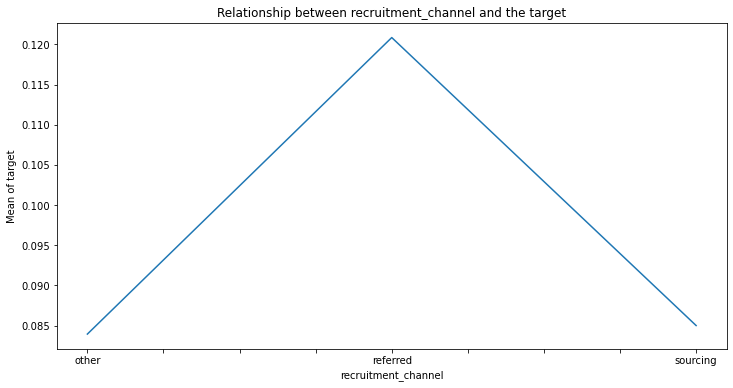

In [433]:
# Plotting line graph of recruitment_channel variable against is_promoted variable

data_encode_mtd_6.groupby(['recruitment_channel'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between recruitment_channel and the target')
plt.ylabel('Mean of target')
plt.show()

From the above plot, there is no monotonic relationship between the recruitment_channel variable and the target variable.

In [434]:
# Ordering the labels in recruitment_channel variable according to the mean target value

data_encode_mtd_6.groupby(['recruitment_channel'])['is_promoted'].mean().sort_values()

recruitment_channel
other       0.083952
sourcing    0.085013
referred    0.120841
Name: is_promoted, dtype: float64

In [435]:
# Generating an ordered list with the labels of recruitment_channel variable

ordered_labels = data_encode_mtd_6.groupby(['recruitment_channel'])['is_promoted'].mean().sort_values().index

ordered_labels

Index(['other', 'sourcing', 'referred'], dtype='object', name='recruitment_channel')

In [436]:
# Creating a dictionary with the mappings of categories to numbers

ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}

ordinal_mapping

{'other': 0, 'sourcing': 1, 'referred': 2}

In [437]:
# Replacing the labels with the ordered numbers

data_encode_mtd_6['recruitment_channel'] = data_encode_mtd_6['recruitment_channel'].map(ordinal_mapping)

In [438]:
# Exploring the result

data_encode_mtd_6['recruitment_channel'].head()

0    1
1    0
2    1
3    0
4    0
Name: recruitment_channel, dtype: int64

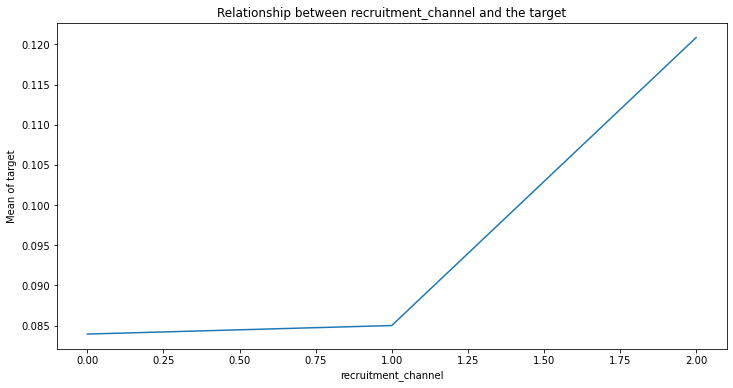

In [439]:
# Exploring the monotonic relationship between the recruitment_channel variable and is_promoted variable

data_encode_mtd_6.groupby(['recruitment_channel'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between recruitment_channel and the target')
plt.ylabel('Mean of target')
plt.show()

### Method 7: Encoding with the Mean of the target

Mean encoding or target encoding implies replacing the categories with the average target value for that category. For example, if we have a City variable, with the categories of London, Manchester, and Bristol, and we want to predict the default rate; if the default rate for London is 30%, we replace London with 0.3; if the default rate for Manchester is 20%, we replace Manchester with 0.2; and so on. The same can be done with a continuous target.

In [440]:
# make a copy of the dataframe to store the result for this method of transforming recruitment_channel variable into numbers

data_encode_mtd_7 = data.copy()

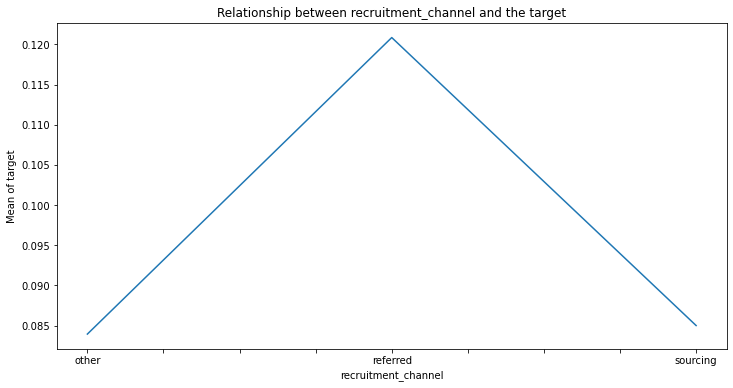

In [441]:
# Plotting line graph of recruitment_channel variable against is_promoted variable

data_encode_mtd_7.groupby(['recruitment_channel'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between recruitment_channel and the target')
plt.ylabel('Mean of target')
plt.show()

From the above plot, there is no monotonic relationship between the recruitment_channel variable and the target variable.

In [442]:
# Creating a dictionary with the target mean per category for the recruitment_channel variable

ordered_labels = data_encode_mtd_7.groupby(['recruitment_channel'])['is_promoted'].mean().to_dict()

ordered_labels

{'other': 0.0839519148656638,
 'referred': 0.12084063047285463,
 'sourcing': 0.08501291989664082}

In [443]:
# Replacing the labels with the target mean

data_encode_mtd_7['recruitment_channel'] = data_encode_mtd_7['recruitment_channel'].map(ordered_labels)

In [444]:
# Inspecting the result

data_encode_mtd_7['recruitment_channel'].head()

0    0.085013
1    0.083952
2    0.085013
3    0.083952
4    0.083952
Name: recruitment_channel, dtype: float64

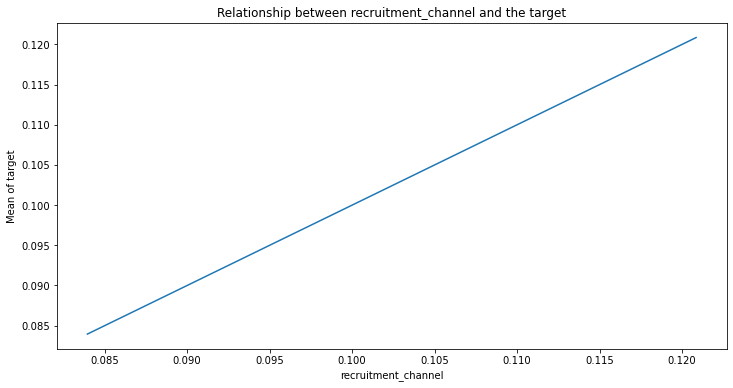

In [445]:
# Exploring the monotonic relationship between the recruitment_channel variable and is_promoted variable

data_encode_mtd_7.groupby(['recruitment_channel'])['is_promoted'].mean().plot(figsize=(12,6))
plt.title('Relationship between recruitment_channel and the target')
plt.ylabel('Mean of target')
plt.show()

### Decision on the Ideal Method to Transform recruitment_channel variable into numbers

After trying all the different above methods to Transform recruitment_channel variable into numbers, I decided to Encode with the Mean of the target to Transform recruitment_channel variable into numbers.  

This is because...

1. With method 1, there would only be 2 binary variables created for recruitment_channel variable. This is because there are only 3 categories in recruitment_channel variable. This is great as there would not be many columns being created. However, I would like all the Categorical variables to be transformed by the same method. Using method 1 to transform other categorical variables may not be the best method. To be transformed with the same method, there is consistency in transforming. With a similar transforming method for all categorical variables, it may achieve a higher model performance.


2. As mentioned earlier, there are only 3 categories to transform in recruitment_channel variable. With that, method 2 would achieve the same results as Method 1.


3. Method 3 assigned numbers arbitrarily. Since the numbers are assigned arbitrarily, there would be no meanings to the values. 


4. Method 4 replaces the categories with the count of observations for that category. Even though, the 3 categories of recruitment_channel variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 4 to replace categorical data.


5. Method 5 replaces the categories with the percentage of observations for that category. Similar to Method 4's reasoning, even though, the 3 categories of recruitment_channel variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 5 to replace categorical data. 


6. Method 6 creates a monotonic relationship between the categorical variable and the response. However, I feel that Encoding with Integers in an Ordered Manner would not really help with this dataset's Classification Problem - predicting whether an employee will be promoted or not.


7. Method 7 replaces the categories with the average target value for that category. Thus, I feel that the transformed values using Encode with the Mean of the target would be more helpful for this dataset's Classification Problem - predicting whether an employee will be promoted or not.


Therefore, I decided to Encode with the Mean of the target to Transform recruitment_channel variable into numbers.


### Final Confirmed Method to Transform all Categorical variables into numbers

In [446]:
# Based on the above decisions, I would:

# Encode with the Mean (Method 7) 
# to transform department, region, education, gender, recruitment_channel Variables into numbers

In [447]:
# department variable

In [448]:
# Creating a dictionary with the target mean per category for the department variable

ordered_labels = data.groupby(['department'])['is_promoted'].mean().to_dict()

ordered_labels

{'Analytics': 0.09566517189835576,
 'Finance': 0.08123028391167192,
 'HR': 0.05624483043837883,
 'Legal': 0.05101058710298364,
 'Operations': 0.0901480437081424,
 'Procurement': 0.0963855421686747,
 'R&D': 0.06906906906906907,
 'Sales & Marketing': 0.07203087885985748,
 'Technology': 0.10759316335107873}

In [449]:
# Replacing the labels with the target mean

data['department'] = data['department'].map(ordered_labels)

In [450]:
# Inspecting the result

data['department'].head()

0    0.072031
1    0.090148
2    0.072031
3    0.072031
4    0.107593
Name: department, dtype: float64

In [451]:
# region variable

In [452]:
# Creating a dictionary with the target mean per category for the region variable

ordered_labels = data.groupby(['region'])['is_promoted'].mean().to_dict()

ordered_labels

{'Rare': 0.07774959487071091,
 'region_15': 0.07905982905982906,
 'region_2': 0.08012638742607146,
 'region_22': 0.11418792781580585,
 'region_7': 0.10654552963039439}

In [453]:
# Replacing the labels with the target mean

data['region'] = data['region'].map(ordered_labels)

In [454]:
# Inspecting the result

data['region'].head()

0    0.106546
1    0.114188
2    0.077750
3    0.077750
4    0.077750
Name: region, dtype: float64

In [455]:
# education variable

In [456]:
# Creating a dictionary with the target mean per category for the education variable

ordered_labels = data.groupby(['education'])['is_promoted'].mean().to_dict()

ordered_labels

{"Bachelor's": 0.08009621782076871,
 'Below Secondary': 0.08322981366459627,
 "Master's & above": 0.09855946398659966}

In [457]:
# Replacing the labels with the target mean

data['education'] = data['education'].map(ordered_labels)

In [458]:
# Inspecting the result

data['education'].head()

0    0.098559
1    0.080096
2    0.080096
3    0.080096
4    0.080096
Name: education, dtype: float64

In [459]:
# gender variable

In [460]:
# Creating a dictionary with the target mean per category for the gender variable

ordered_labels = data.groupby(['gender'])['is_promoted'].mean().to_dict()

ordered_labels

{'f': 0.08993379107405591, 'm': 0.08315149625935161}

In [461]:
# Replacing the labels with the target mean

data['gender'] = data['gender'].map(ordered_labels)

In [462]:
# Inspecting the result

data['gender'].head()

0    0.089934
1    0.083151
2    0.083151
3    0.083151
4    0.083151
Name: gender, dtype: float64

In [463]:
# recruitment_channel variable

In [464]:
# Creating a dictionary with the target mean per category for the recruitment_channel variable

ordered_labels = data.groupby(['recruitment_channel'])['is_promoted'].mean().to_dict()

ordered_labels

{'other': 0.0839519148656638,
 'referred': 0.12084063047285463,
 'sourcing': 0.08501291989664082}

In [465]:
# Replacing the labels with the target mean

data['recruitment_channel'] = data['recruitment_channel'].map(ordered_labels)

In [466]:
# Inspecting the result

data['recruitment_channel'].head()

0    0.085013
1    0.083952
2    0.085013
3    0.083952
4    0.083952
Name: recruitment_channel, dtype: float64

In [467]:
# Viewing the result of the Final Transformation on all Categorical variables into numbers in the dataset

data.head()

department    region  education    gender  recruitment_channel  \
0    0.072031  0.106546   0.098559  0.089934             0.085013   
1    0.090148  0.114188   0.080096  0.083151             0.083952   
2    0.072031  0.077750   0.080096  0.083151             0.085013   
3    0.072031  0.077750   0.080096  0.083151             0.083952   
4    0.107593  0.077750   0.080096  0.083151             0.083952   

   no_of_trainings   age  previous_year_rating  length_of_service  \
0                1  35.0                   5.0                8.0   
1                1  30.0                   5.0                4.0   
2                1  34.0                   3.0                7.0   
3                2  39.0                   1.0               10.0   
4                1  45.0                   3.0                2.0   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1            0                  49            0  
1              0            0                  60            0  
2              0            0                  50            0  
3              0            0                  50            0  
4              0            0                  73            0

### 1.2.5. Variable Discretization / Binning

Discretization, or binning, is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals, also called bins, that span the range of the variable values. Binning groups values together whom we believe should be regarded as effectively similar, rather than to let the computer treat them as separate values, when determining the algorithm for the model.

For example, instead of doing population census analysis based on the exact numerical value of the size of each individual’s home, we might classify it into categories such as, less than 50 square metres, between 50 and 100 square metres, between 100 and 200 square metres, and finally larger than 200 square metres.

#### Numerical Data in dataset (repeated for ease of viewing)

In [468]:
# Selecting Numerical Data from 'data', then display first 5 rows
data_num = data.select_dtypes(['int64', 'float64']).copy()
data_num.head()

department    region  education    gender  recruitment_channel  \
0    0.072031  0.106546   0.098559  0.089934             0.085013   
1    0.090148  0.114188   0.080096  0.083151             0.083952   
2    0.072031  0.077750   0.080096  0.083151             0.085013   
3    0.072031  0.077750   0.080096  0.083151             0.083952   
4    0.107593  0.077750   0.080096  0.083151             0.083952   

   no_of_trainings   age  previous_year_rating  length_of_service  \
0                1  35.0                   5.0                8.0   
1                1  30.0                   5.0                4.0   
2                1  34.0                   3.0                7.0   
3                2  39.0                   1.0               10.0   
4                1  45.0                   3.0                2.0   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1            0                  49            0  
1              0            0                  60            0  
2              0            0                  50            0  
3              0            0                  50            0  
4              0            0                  73            0

In [469]:
# Viewing the five-number summary of numerical variables
data_num.describe()

department        region     education        gender  \
count  54808.000000  54808.000000  54808.000000  54808.000000   
mean       0.085170      0.085170      0.085170      0.085170   
std        0.014672      0.013240      0.008199      0.003101   
min        0.051011      0.077750      0.080096      0.083151   
25%        0.072031      0.077750      0.080096      0.083151   
50%        0.090148      0.077750      0.080096      0.083151   
75%        0.096386      0.080126      0.098559      0.089934   
max        0.107593      0.114188      0.098559      0.089934   

       recruitment_channel  no_of_trainings           age  \
count         54808.000000     54808.000000  54808.000000   
mean              0.085170         1.253011     34.663297   
std               0.005229         0.609264      7.039684   
min               0.083952         1.000000     25.000000   
25%               0.083952         1.000000     29.000000   
50%               0.083952         1.000000     33.000000   
75%               0.085013         1.000000     39.000000   
max               0.120841        10.000000     51.000000   

       previous_year_rating  length_of_service  KPIs_met >80%   awards_won?  \
count          54808.000000       54808.000000   54808.000000  54808.000000   
mean               3.078748           5.688129       0.351974      0.023172   
std                1.496458           3.689403       0.477590      0.150450   
min                0.000000           1.000000       0.000000      0.000000   
25%                2.000000           3.000000       0.000000      0.000000   
50%                3.000000           5.000000       0.000000      0.000000   
75%                4.000000           7.000000       1.000000      0.000000   
max                5.000000          15.000000       1.000000      1.000000   

       avg_training_score   is_promoted  
count        54808.000000  54808.000000  
mean            63.386750      0.085170  
std             13.371559      0.279137  
min             39.000000      0.000000  
25%             51.000000      0.000000  
50%             60.000000      0.000000  
75%             76.000000      0.000000  
max             99.000000      1.000000

#### Distinguishing Numerical Variable Distributions

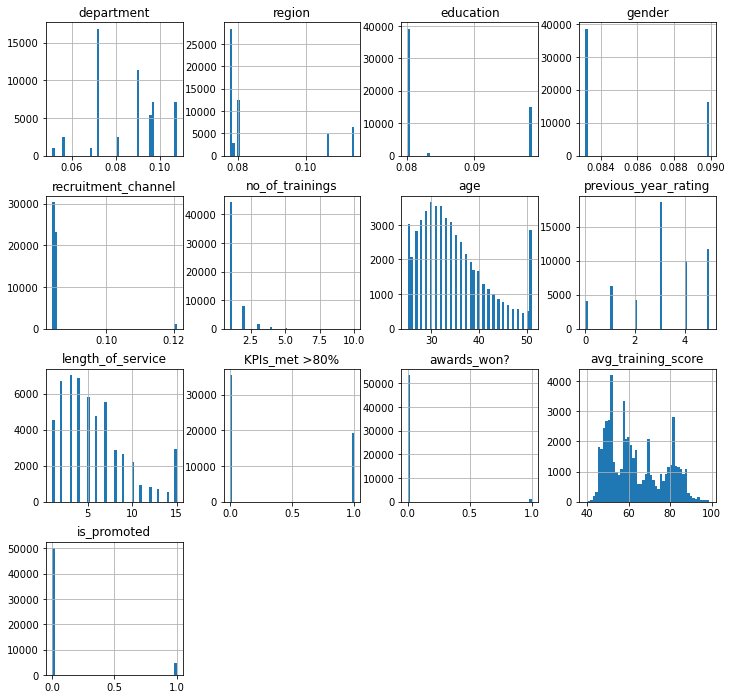

In [470]:
data_num.hist(bins=50, figsize=(12, 12))
plt.show()

#### Visualizing each Continuous Numerical Variable

#### List of Continuous Numerical Variables in the dataset 

As mentioned earlier, since Binning is about converting continuous numerical data into categorical data, I need to find out the List of Continuous Numerical Variables in the dataset in order to start Binning numerical data. 

From my knowledge of differentiating a Discrete Numerical Variable from a Continuous Numerical Variable, the Continuous Numerical Variables in the dataset are:

1. no_of_trainings


2. age


3. length_of_service


4. avg_training_score


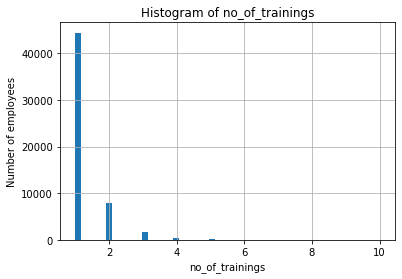

In [471]:
# no_of_trainings variable

plt.hist(data_num['no_of_trainings'], bins=50)
plt.xlabel('no_of_trainings')
plt.ylabel('Number of employees') 
plt.title('Histogram of no_of_trainings')
plt.grid(True)

plt.show()

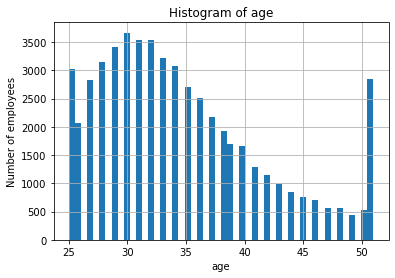

In [472]:
# age variable

plt.hist(data_num['age'], bins=50)
plt.xlabel('age')
plt.ylabel('Number of employees') 
plt.title('Histogram of age')
plt.grid(True)

plt.show()

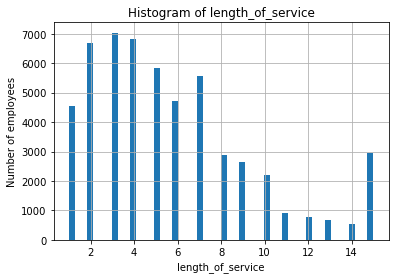

In [473]:
# length_of_service variable

plt.hist(data_num['length_of_service'], bins=50)
plt.xlabel('length_of_service')
plt.ylabel('Number of employees') 
plt.title('Histogram of length_of_service')
plt.grid(True)

plt.show()

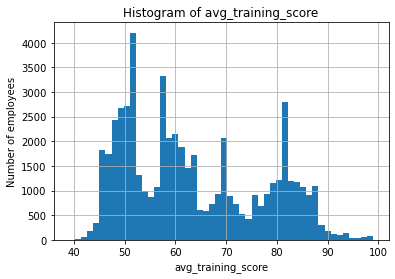

In [474]:
# avg_training_score variable

plt.hist(data_num['avg_training_score'], bins=50)
plt.xlabel('avg_training_score')
plt.ylabel('Number of employees') 
plt.title('Histogram of avg_training_score')
plt.grid(True)

plt.show()

### A Need to Discretize / Bin the Continuous Numerical Data?

I do not think it is necessary to Discretize / Bin the Continuous Numerical Data. 

Discretization is used to change the distribution of skewed variables and to minimize the influence of outliers, and hence improve the performance of some machine learning models. Discretization minimizes the effect of outliers by placing outliers into the lower or higher intervals, together with the remaining inlier values of the distribution. With that, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval or bin. 

However, since I have already dealt with outliers in the dataset of age variable and length_of_service variable in Section 1.2.3: Outliers, there is no need to Discretize / Bin age variable and length_of_service variable to minimize the influence of outliers again.

In addition, there are no skewed distribution in avg_training_score variable. With that, there is no need to Discretize / Bin avg_training_score variable to change the distribution.

For no_of_trainings variable, no_of_trainings variable only holds a small range of values from 0 to 10. With that, it is not necessary to Discretize / Bin no_of_training variable.

Therefore, I do not think it is necessary to Discretize / Bin the Continuous Numerical Data. 

### 1.2.6. Feature Scaling

Feature Scaling is about giving each feature fair numerical airtime to different “X” features or columns containing different ranges of numerical values. This means that Feature Scaling changes the scale of features such that all features have similar scale. This allows users to compare feature importance and helps algorithms converge faster and thus improving performance.

Feature Scaling is done because many machine learning algorithms (such as linear models and principal component analysis) are sensitive to the scale and magnitude of the features. Features with bigger value ranges tend to dominate over features with smaller ranges.

For example, values with naturally high numerical values such as a feature of motorbike cost in Indonesian Rupiah, would impact the model more than a feature of the motorbike’s weight in kg, if trying to predict fuel efficiency.

There are 5 ways to Scale variables 

Note that StandardScaler and MinMaxScaler often produce the best results.

In [475]:
# Taking a look at the values of each variable in data
# to get an idea of the feature magnitudes

data.describe()

department        region     education        gender  \
count  54808.000000  54808.000000  54808.000000  54808.000000   
mean       0.085170      0.085170      0.085170      0.085170   
std        0.014672      0.013240      0.008199      0.003101   
min        0.051011      0.077750      0.080096      0.083151   
25%        0.072031      0.077750      0.080096      0.083151   
50%        0.090148      0.077750      0.080096      0.083151   
75%        0.096386      0.080126      0.098559      0.089934   
max        0.107593      0.114188      0.098559      0.089934   

       recruitment_channel  no_of_trainings           age  \
count         54808.000000     54808.000000  54808.000000   
mean              0.085170         1.253011     34.663297   
std               0.005229         0.609264      7.039684   
min               0.083952         1.000000     25.000000   
25%               0.083952         1.000000     29.000000   
50%               0.083952         1.000000     33.000000   
75%               0.085013         1.000000     39.000000   
max               0.120841        10.000000     51.000000   

       previous_year_rating  length_of_service  KPIs_met >80%   awards_won?  \
count          54808.000000       54808.000000   54808.000000  54808.000000   
mean               3.078748           5.688129       0.351974      0.023172   
std                1.496458           3.689403       0.477590      0.150450   
min                0.000000           1.000000       0.000000      0.000000   
25%                2.000000           3.000000       0.000000      0.000000   
50%                3.000000           5.000000       0.000000      0.000000   
75%                4.000000           7.000000       1.000000      0.000000   
max                5.000000          15.000000       1.000000      1.000000   

       avg_training_score   is_promoted  
count        54808.000000  54808.000000  
mean            63.386750      0.085170  
std             13.371559      0.279137  
min             39.000000      0.000000  
25%             51.000000      0.000000  
50%             60.000000      0.000000  
75%             76.000000      0.000000  
max             99.000000      1.000000

### A Need to Scale the Data?

According to the table above, I think it is necesssary to scale the data. 

In the table above, we can observe the main statistics of each variable, e.g. the 25th, 50th and 75th quantiles, the mean, standard deviation and minimum and maximum value. By comparing the minimum and maximum values of a variable to another, we can quickly understand whether our features are in a similar scale. In this case, they are clearly not.

In addition to the table, we can calculate the range of each variables to determine whether the variables are in a similar scale as shown below.

In [476]:
# Calculating the range of each variables

data.max() - data.min()

department               0.056583
region                   0.036438
education                0.018463
gender                   0.006782
recruitment_channel      0.036889
no_of_trainings          9.000000
age                     26.000000
previous_year_rating     5.000000
length_of_service       14.000000
KPIs_met >80%            1.000000
awards_won?              1.000000
avg_training_score      60.000000
is_promoted              1.000000
dtype: float64

From the above range calculations, the ranges of the each variable are quite different. 

For example, no_of_trainings has a range of 9 while age has a range of 26.

### List of Variables that Needed to be Scaled

1. department


2. region


3. education


4. gender


5. recruitment_channel


6. no_of_trainings


7. age


8. previous_year_rating


9. length_of_service


10. KPIs_met >80% 


11. awards_won? 


12. avg_training_score 


For me, I think all available variables (except the target variable - is_promoted variable) in the data needs to be scaled even though some variables have the same scale (such as KPIs_met >80% and awards_won? Variable). This is because, as mentioned earlier, Feature Scaling changes the scale of features such that all features have similar scale. With a similar scale for all variables, it allows users to compare feature importance and helps algorithms converge faster and thus improving performance.


### Method 1: Standardization

Standardization is the process of centering the variable at zero and standardizing the variance to 1. To standardize features, we subtract the mean from each observation and then divide the result by the standard deviation:

\begin{equation}
z = \frac{x - mean(x)}{std(x)}
\end{equation}

The result of the preceding transformation is called the z-score and represents how many standard deviations a given observation deviates from the mean. 

In [477]:
# Making a copy of the dataframe to store the result for this method of Feature Scaling

data_scale_mtd_1 = data.copy()

### Standardization for department variable

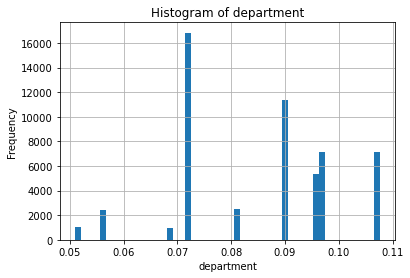

In [478]:
# Visualizing department variable (BEFORE Standardization)

plt.hist(data_scale_mtd_1['department'], bins=50)
plt.xlabel('department')
plt.ylabel('Frequency') 
plt.title('Histogram of department')
plt.grid(True)

plt.show()

In [479]:
# Formula to Standardize department variable

data_scale_mtd_1['department'] = (data_scale_mtd_1['department'] - data_scale_mtd_1['department'].mean()) / data_scale_mtd_1['department'].std()

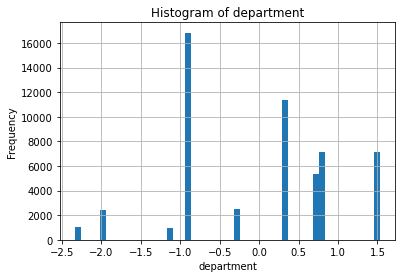

In [480]:
# Visualizing department variable (AFTER Standardization)

plt.hist(data_scale_mtd_1['department'], bins=50)
plt.xlabel('department')
plt.ylabel('Frequency') 
plt.title('Histogram of department')
plt.grid(True)

plt.show()

### Standardization for region variable

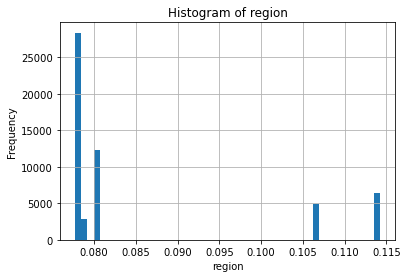

In [481]:
# Visualizing region variable (BEFORE Standardization)

plt.hist(data_scale_mtd_1['region'], bins=50)
plt.xlabel('region')
plt.ylabel('Frequency') 
plt.title('Histogram of region')
plt.grid(True)

plt.show()

In [482]:
# Formula to Standardize region variable

data_scale_mtd_1['region'] = (data_scale_mtd_1['region'] - data_scale_mtd_1['region'].mean()) / data_scale_mtd_1['region'].std()

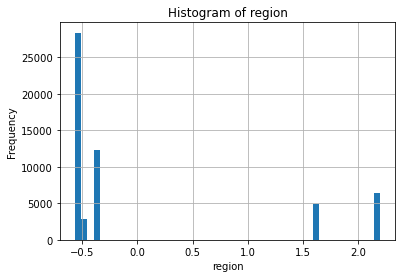

In [483]:
# Visualizing region variable (AFTER Standardization)

plt.hist(data_scale_mtd_1['region'], bins=50)
plt.xlabel('region')
plt.ylabel('Frequency') 
plt.title('Histogram of region')
plt.grid(True)

plt.show()

### Standardization for education variable

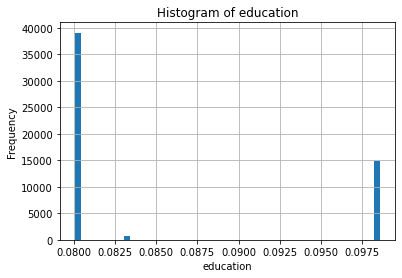

In [484]:
# Visualizing education variable (BEFORE Standardization)

plt.hist(data_scale_mtd_1['education'], bins=50)
plt.xlabel('education')
plt.ylabel('Frequency') 
plt.title('Histogram of education')
plt.grid(True)

plt.show()

In [485]:
# Formula to Standardize education variable

data_scale_mtd_1['education'] = (data_scale_mtd_1['education'] - data_scale_mtd_1['education'].mean()) / data_scale_mtd_1['education'].std()

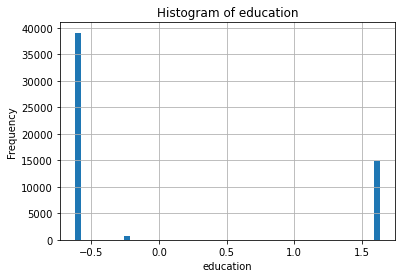

In [486]:
# Visualizing education variable (AFTER Standardization)

plt.hist(data_scale_mtd_1['education'], bins=50)
plt.xlabel('education')
plt.ylabel('Frequency') 
plt.title('Histogram of education')
plt.grid(True)

plt.show()

### Standardization for gender variable

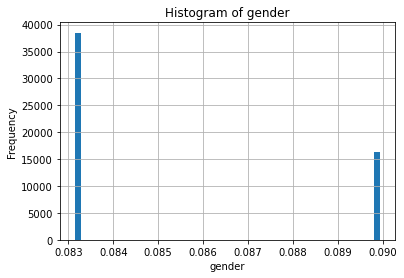

In [487]:
# Visualizing gender variable (BEFORE Standardization)

plt.hist(data_scale_mtd_1['gender'], bins=50)
plt.xlabel('gender')
plt.ylabel('Frequency') 
plt.title('Histogram of gender')
plt.grid(True)

plt.show()

In [488]:
# Formula to Standardize gender variable

data_scale_mtd_1['gender'] = (data_scale_mtd_1['gender'] - data_scale_mtd_1['gender'].mean()) / data_scale_mtd_1['gender'].std()

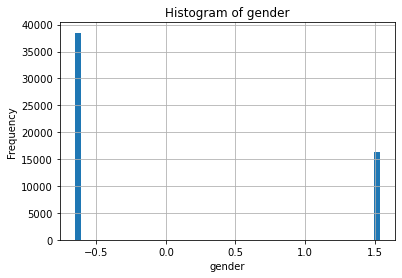

In [489]:
# Visualizing gender variable (AFTER Standardization)

plt.hist(data_scale_mtd_1['gender'], bins=50)
plt.xlabel('gender')
plt.ylabel('Frequency') 
plt.title('Histogram of gender')
plt.grid(True)

plt.show()

### Standardization for recruitment_channel variable

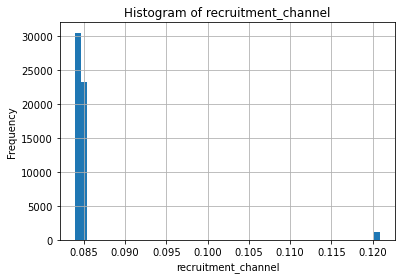

In [490]:
# Visualizing recruitment_channel variable (BEFORE Standardization)

plt.hist(data_scale_mtd_1['recruitment_channel'], bins=50)
plt.xlabel('recruitment_channel')
plt.ylabel('Frequency') 
plt.title('Histogram of recruitment_channel')
plt.grid(True)

plt.show()

In [491]:
# Formula to Standardize recruitment_channel variable

data_scale_mtd_1['recruitment_channel'] = (data_scale_mtd_1['recruitment_channel'] - data_scale_mtd_1['recruitment_channel'].mean()) / data_scale_mtd_1['recruitment_channel'].std()

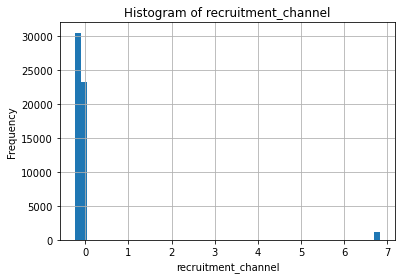

In [492]:
# Visualizing recruitment_channel variable (AFTER Standardization)

plt.hist(data_scale_mtd_1['recruitment_channel'], bins=50)
plt.xlabel('recruitment_channel')
plt.ylabel('Frequency') 
plt.title('Histogram of recruitment_channel')
plt.grid(True)

plt.show()

### Standardization for no_of_trainings variable

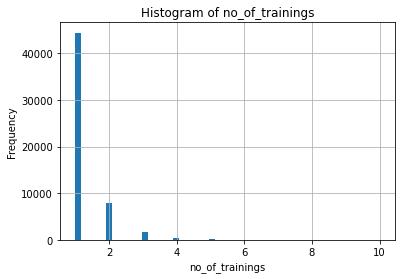

In [493]:
# Visualizing no_of_trainings variable (BEFORE Standardization)

plt.hist(data_scale_mtd_1['no_of_trainings'], bins=50)
plt.xlabel('no_of_trainings')
plt.ylabel('Frequency') 
plt.title('Histogram of no_of_trainings')
plt.grid(True)

plt.show()

In [494]:
# Formula to Standardize no_of_trainings variable

data_scale_mtd_1['no_of_trainings'] = (data_scale_mtd_1['no_of_trainings'] - data_scale_mtd_1['no_of_trainings'].mean()) / data_scale_mtd_1['no_of_trainings'].std()

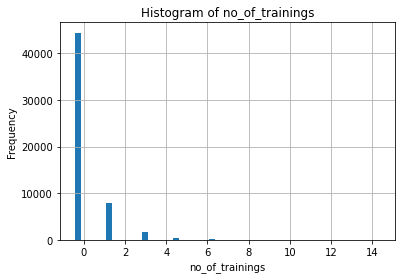

In [495]:
# Visualizing no_of_trainings variable (AFTER Standardization)

plt.hist(data_scale_mtd_1['no_of_trainings'], bins=50)
plt.xlabel('no_of_trainings')
plt.ylabel('Frequency') 
plt.title('Histogram of no_of_trainings')
plt.grid(True)

plt.show()

### Standardization for age variable

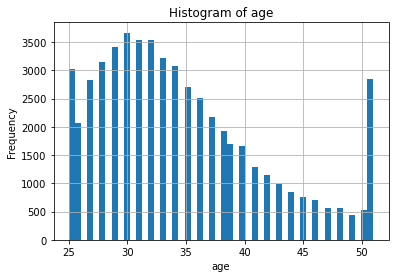

In [496]:
# Visualizing age variable (BEFORE Standardization)

plt.hist(data_scale_mtd_1['age'], bins=50)
plt.xlabel('age')
plt.ylabel('Frequency') 
plt.title('Histogram of age')
plt.grid(True)

plt.show()

In [497]:
# Formula to Standardize age variable

data_scale_mtd_1['age'] = (data_scale_mtd_1['age'] - data_scale_mtd_1['age'].mean()) / data_scale_mtd_1['age'].std()

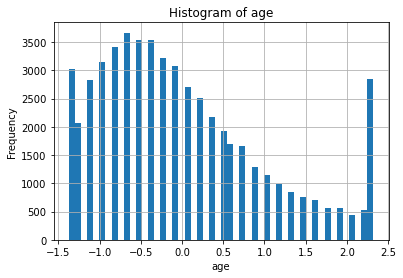

In [498]:
# Visualizing age variable (AFTER Standardization)

plt.hist(data_scale_mtd_1['age'], bins=50)
plt.xlabel('age')
plt.ylabel('Frequency') 
plt.title('Histogram of age')
plt.grid(True)

plt.show()

### Standardization for previous_year_rating variable

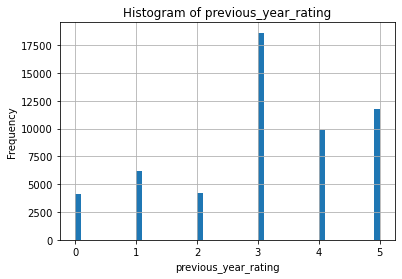

In [499]:
# Visualizing previous_year_rating variable (BEFORE Standardization)

plt.hist(data_scale_mtd_1['previous_year_rating'], bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Frequency') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

In [500]:
# Formula to Standardize previous_year_rating variable

data_scale_mtd_1['previous_year_rating'] = (data_scale_mtd_1['previous_year_rating'] - data_scale_mtd_1['previous_year_rating'].mean()) / data_scale_mtd_1['previous_year_rating'].std()

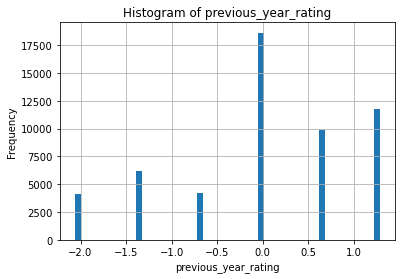

In [501]:
# Visualizing previous_year_rating variable (AFTER Standardization)

plt.hist(data_scale_mtd_1['previous_year_rating'], bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Frequency') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

### Standardization for length_of_service variable

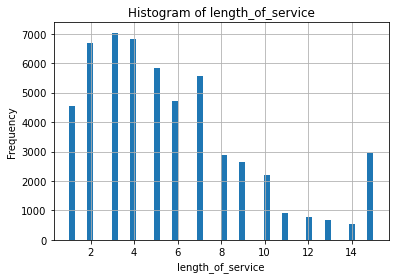

In [502]:
# Visualizing length_of_service variable (BEFORE Standardization)

plt.hist(data_scale_mtd_1['length_of_service'], bins=50)
plt.xlabel('length_of_service')
plt.ylabel('Frequency') 
plt.title('Histogram of length_of_service')
plt.grid(True)

plt.show()

In [503]:
# Formula to Standardize length_of_service variable

data_scale_mtd_1['length_of_service'] = (data_scale_mtd_1['length_of_service'] - data_scale_mtd_1['length_of_service'].mean()) / data_scale_mtd_1['length_of_service'].std()

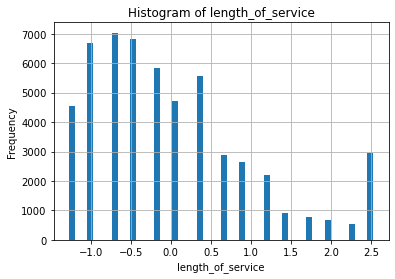

In [504]:
# Visualizing length_of_service variable (AFTER Standardization)

plt.hist(data_scale_mtd_1['length_of_service'], bins=50)
plt.xlabel('length_of_service')
plt.ylabel('Frequency') 
plt.title('Histogram of length_of_service')
plt.grid(True)

plt.show()

### Standardization for KPIs_met >80% variable

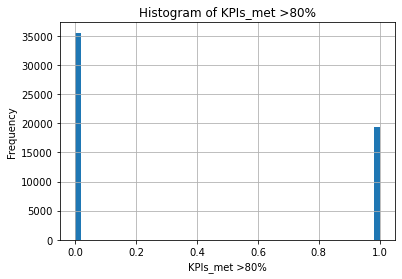

In [505]:
# Visualizing KPIs_met >80% variable (BEFORE Standardization)

plt.hist(data_scale_mtd_1['KPIs_met >80%'], bins=50)
plt.xlabel('KPIs_met >80%')
plt.ylabel('Frequency') 
plt.title('Histogram of KPIs_met >80%')
plt.grid(True)

plt.show()

In [506]:
# Formula to Standardize KPIs_met >80% variable

data_scale_mtd_1['KPIs_met >80%'] = (data_scale_mtd_1['KPIs_met >80%'] - data_scale_mtd_1['KPIs_met >80%'].mean()) / data_scale_mtd_1['KPIs_met >80%'].std()

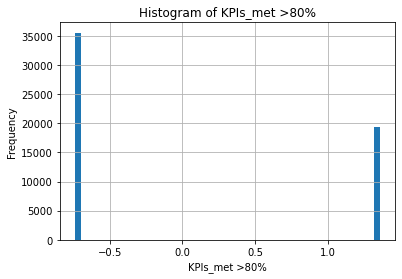

In [507]:
# Visualizing KPIs_met >80% variable (AFTER Standardization)

plt.hist(data_scale_mtd_1['KPIs_met >80%'], bins=50)
plt.xlabel('KPIs_met >80%')
plt.ylabel('Frequency') 
plt.title('Histogram of KPIs_met >80%')
plt.grid(True)

plt.show()

### Standardization for awards_won? variable

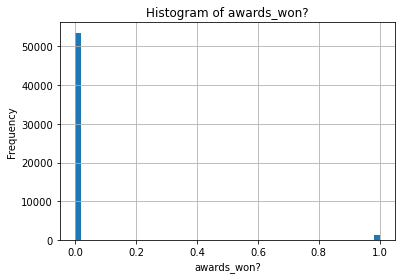

In [508]:
# Visualizing awards_won? variable (BEFORE Standardization)

plt.hist(data_scale_mtd_1['awards_won?'], bins=50)
plt.xlabel('awards_won?')
plt.ylabel('Frequency') 
plt.title('Histogram of awards_won?')
plt.grid(True)

plt.show()

In [509]:
# Formula to Standardize awards_won? variable

data_scale_mtd_1['awards_won?'] = (data_scale_mtd_1['awards_won?'] - data_scale_mtd_1['awards_won?'].mean()) / data_scale_mtd_1['awards_won?'].std()

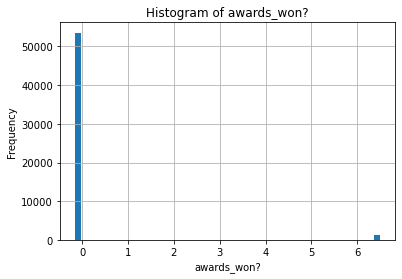

In [510]:
# Visualizing awards_won? variable (AFTER Standardization)

plt.hist(data_scale_mtd_1['awards_won?'], bins=50)
plt.xlabel('awards_won?')
plt.ylabel('Frequency') 
plt.title('Histogram of awards_won?')
plt.grid(True)

plt.show()

### Standardization for avg_training_score variable

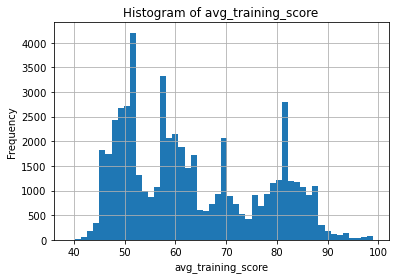

In [511]:
# Visualizing avg_training_score variable (BEFORE Standardization)

plt.hist(data_scale_mtd_1['avg_training_score'], bins=50)
plt.xlabel('avg_training_score')
plt.ylabel('Frequency') 
plt.title('Histogram of avg_training_score')
plt.grid(True)

plt.show()

In [512]:
# Formula to Standardize avg_training_score variable

data_scale_mtd_1['avg_training_score'] = (data_scale_mtd_1['avg_training_score'] - data_scale_mtd_1['avg_training_score'].mean()) / data_scale_mtd_1['avg_training_score'].std()

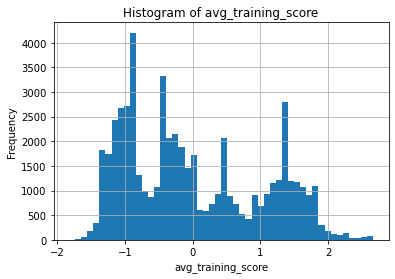

In [513]:
# Visualizing avg_training_score variable (AFTER Standardization)

plt.hist(data_scale_mtd_1['avg_training_score'], bins=50)
plt.xlabel('avg_training_score')
plt.ylabel('Frequency') 
plt.title('Histogram of avg_training_score')
plt.grid(True)

plt.show()

In [514]:
# Describing each variable in the dataset (BEFORE Standardization for all variables)

data.describe()

department        region     education        gender  \
count  54808.000000  54808.000000  54808.000000  54808.000000   
mean       0.085170      0.085170      0.085170      0.085170   
std        0.014672      0.013240      0.008199      0.003101   
min        0.051011      0.077750      0.080096      0.083151   
25%        0.072031      0.077750      0.080096      0.083151   
50%        0.090148      0.077750      0.080096      0.083151   
75%        0.096386      0.080126      0.098559      0.089934   
max        0.107593      0.114188      0.098559      0.089934   

       recruitment_channel  no_of_trainings           age  \
count         54808.000000     54808.000000  54808.000000   
mean              0.085170         1.253011     34.663297   
std               0.005229         0.609264      7.039684   
min               0.083952         1.000000     25.000000   
25%               0.083952         1.000000     29.000000   
50%               0.083952         1.000000     33.000000   
75%               0.085013         1.000000     39.000000   
max               0.120841        10.000000     51.000000   

       previous_year_rating  length_of_service  KPIs_met >80%   awards_won?  \
count          54808.000000       54808.000000   54808.000000  54808.000000   
mean               3.078748           5.688129       0.351974      0.023172   
std                1.496458           3.689403       0.477590      0.150450   
min                0.000000           1.000000       0.000000      0.000000   
25%                2.000000           3.000000       0.000000      0.000000   
50%                3.000000           5.000000       0.000000      0.000000   
75%                4.000000           7.000000       1.000000      0.000000   
max                5.000000          15.000000       1.000000      1.000000   

       avg_training_score   is_promoted  
count        54808.000000  54808.000000  
mean            63.386750      0.085170  
std             13.371559      0.279137  
min             39.000000      0.000000  
25%             51.000000      0.000000  
50%             60.000000      0.000000  
75%             76.000000      0.000000  
max             99.000000      1.000000

In [515]:
# Describing each variable in the dataset (AFTER Standardization for all variables)

data_scale_mtd_1.describe()

department        region     education        gender  \
count  5.480800e+04  5.480800e+04  5.480800e+04  5.480800e+04   
mean  -9.150988e-14  4.664573e-12 -7.969859e-12  3.450667e-12   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.328170e+00 -5.604646e-01 -6.187998e-01 -6.509413e-01   
25%   -8.955123e-01 -5.604646e-01 -6.187998e-01 -6.509413e-01   
50%    3.392799e-01 -5.604646e-01 -6.187998e-01 -6.509413e-01   
75%    7.644024e-01 -3.809462e-01  1.632961e+00  1.536209e+00   
max    1.528268e+00  2.191712e+00  1.632961e+00  1.536209e+00   

       recruitment_channel  no_of_trainings           age  \
count         5.480800e+04     5.480800e+04  5.480800e+04   
mean         -6.949269e-12     2.137098e-15  4.533141e-16   
std           1.000000e+00     1.000000e+00  1.000000e+00   
min          -2.329368e-01    -4.152724e-01 -1.372689e+00   
25%          -2.329368e-01    -4.152724e-01 -8.044818e-01   
50%          -2.329368e-01    -4.152724e-01 -2.362744e-01   
75%          -3.004675e-02    -4.152724e-01  6.160366e-01   
max           6.821084e+00     1.435665e+01  2.320659e+00   

       previous_year_rating  length_of_service  KPIs_met >80%   awards_won?  \
count          5.480800e+04       5.480800e+04   5.480800e+04  5.480800e+04   
mean          -6.093992e-17      -2.250628e-16   1.677873e-15  1.902468e-16   
std            1.000000e+00       1.000000e+00   1.000000e+00  1.000000e+00   
min           -2.057356e+00      -1.270701e+00  -7.369793e-01 -1.540163e-01   
25%           -7.208671e-01      -7.286082e-01  -7.369793e-01 -1.540163e-01   
50%           -5.262266e-02      -1.865151e-01  -7.369793e-01 -1.540163e-01   
75%            6.156218e-01       3.555780e-01   1.356866e+00 -1.540163e-01   
max            1.283866e+00       2.523950e+00   1.356866e+00  6.492699e+00   

       avg_training_score   is_promoted  
count        5.480800e+04  54808.000000  
mean         1.004605e-16      0.085170  
std          1.000000e+00      0.279137  
min         -1.823778e+00      0.000000  
25%         -9.263504e-01      0.000000  
50%         -2.532801e-01      0.000000  
75%          9.432894e-01      0.000000  
max          2.663358e+00      1.000000

### Method 2: Mean Normalization

In mean normalization, we center the variable at zero and rescale the distribution to the value range. This procedure involves subtracting the mean from each observation and then dividing the result by the difference between the minimum and maximum values:

\begin{equation}
x_{scaled} = \frac{x - mean(x)}{max(x) - min(x)}
\end{equation}

This transformation results in a distribution centered at 0, with its minimum and maximum values within the range of -1 to 1. 

In [516]:
# Making a copy of the dataframe to store the result for this method of Feature Scaling

data_scale_mtd_2 = data.copy()

### Mean Normalization for department variable

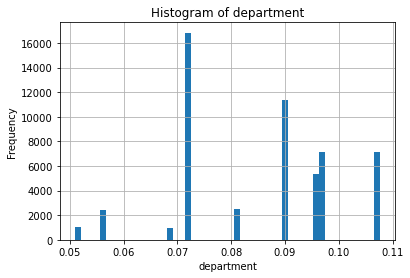

In [517]:
# Visualizing department variable (BEFORE Mean Normalization)

plt.hist(data_scale_mtd_2['department'], bins=50)
plt.xlabel('department')
plt.ylabel('Frequency') 
plt.title('Histogram of department')
plt.grid(True)

plt.show()

In [518]:
# Formula to Mean Normalize department variable

data_scale_mtd_2['department'] = (data_scale_mtd_2['department'] - data_scale_mtd_2['department'].mean()) / (data_scale_mtd_2['department'].max() - data_scale_mtd_2['department'].min()) 

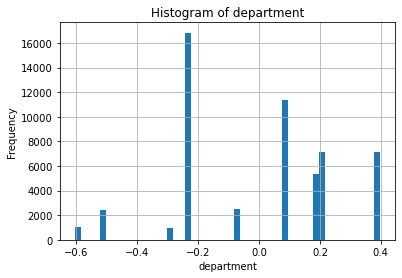

In [519]:
# Visualizing department variable (AFTER Mean Normalization)

plt.hist(data_scale_mtd_2['department'], bins=50)
plt.xlabel('department')
plt.ylabel('Frequency') 
plt.title('Histogram of department')
plt.grid(True)

plt.show()

### Mean Normalization for region variable

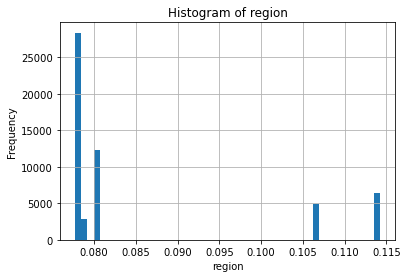

In [520]:
# Visualizing region variable (BEFORE Mean Normalization)

plt.hist(data_scale_mtd_2['region'], bins=50)
plt.xlabel('region')
plt.ylabel('Frequency') 
plt.title('Histogram of region')
plt.grid(True)

plt.show()

In [521]:
# Formula to Mean Normalize region variable

data_scale_mtd_2['region'] = (data_scale_mtd_2['region'] - data_scale_mtd_2['region'].mean()) / (data_scale_mtd_2['region'].max() - data_scale_mtd_2['region'].min())

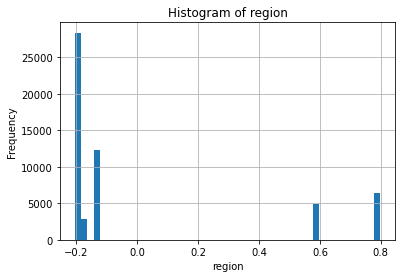

In [522]:
# Visualizing region variable (AFTER Mean Normalization)

plt.hist(data_scale_mtd_2['region'], bins=50)
plt.xlabel('region')
plt.ylabel('Frequency') 
plt.title('Histogram of region')
plt.grid(True)

plt.show()

### Mean Normalization for education variable

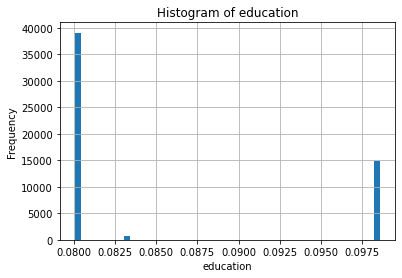

In [523]:
# Visualizing education variable (BEFORE Mean Normalization)

plt.hist(data_scale_mtd_2['education'], bins=50)
plt.xlabel('education')
plt.ylabel('Frequency') 
plt.title('Histogram of education')
plt.grid(True)

plt.show()

In [524]:
# Formula to Mean Normalize education variable

data_scale_mtd_2['education'] = (data_scale_mtd_2['education'] - data_scale_mtd_2['education'].mean()) / (data_scale_mtd_2['education'].max() - data_scale_mtd_2['education'].min())

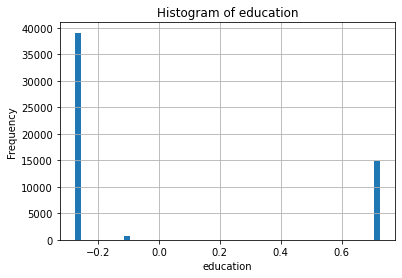

In [525]:
# Visualizing education variable (AFTER Mean Normalization)

plt.hist(data_scale_mtd_2['education'], bins=50)
plt.xlabel('education')
plt.ylabel('Frequency') 
plt.title('Histogram of education')
plt.grid(True)

plt.show()

### Mean Normalization for gender variable

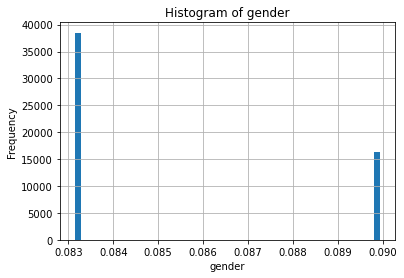

In [526]:
# Visualizing gender variable (BEFORE Mean Normalization)

plt.hist(data_scale_mtd_2['gender'], bins=50)
plt.xlabel('gender')
plt.ylabel('Frequency') 
plt.title('Histogram of gender')
plt.grid(True)

plt.show()

In [527]:
# Formula to Mean Normalize gender variable

data_scale_mtd_2['gender'] = (data_scale_mtd_2['gender'] - data_scale_mtd_2['gender'].mean()) / (data_scale_mtd_2['gender'].max() - data_scale_mtd_2['gender'].min())

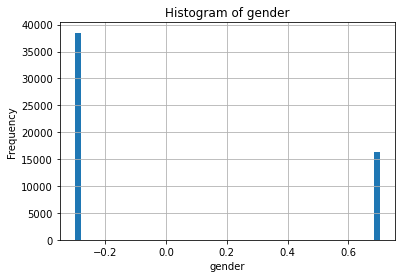

In [528]:
# Visualizing gender variable (AFTER Mean Normalization)

plt.hist(data_scale_mtd_2['gender'], bins=50)
plt.xlabel('gender')
plt.ylabel('Frequency') 
plt.title('Histogram of gender')
plt.grid(True)

plt.show()

### Mean Normalization for recruitment_channel variable

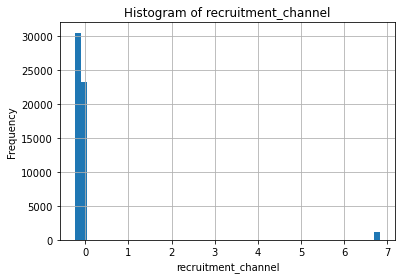

In [529]:
# Visualizing recruitment_channel variable (BEFORE Mean Normalization)

plt.hist(data_scale_mtd_1['recruitment_channel'], bins=50)
plt.xlabel('recruitment_channel')
plt.ylabel('Frequency') 
plt.title('Histogram of recruitment_channel')
plt.grid(True)

plt.show()

In [530]:
# Formula to Mean Normalize recruitment_channel variable

data_scale_mtd_2['recruitment_channel'] = (data_scale_mtd_2['recruitment_channel'] - data_scale_mtd_2['recruitment_channel'].mean()) / (data_scale_mtd_2['recruitment_channel'].max() - data_scale_mtd_2['recruitment_channel'].min())

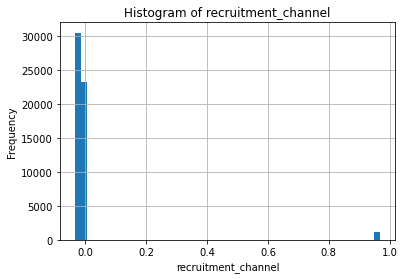

In [531]:
# Visualizing recruitment_channel variable (AFTER Mean Normalization)

plt.hist(data_scale_mtd_2['recruitment_channel'], bins=50)
plt.xlabel('recruitment_channel')
plt.ylabel('Frequency') 
plt.title('Histogram of recruitment_channel')
plt.grid(True)

plt.show()

### Mean Normalization for no_of_trainings variable

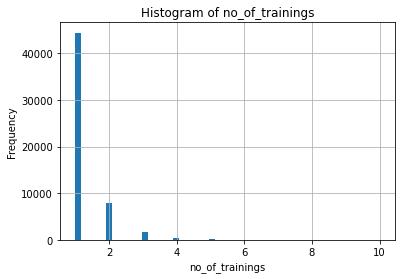

In [532]:
# Visualizing no_of_trainings variable (BEFORE Mean Normalization)

plt.hist(data_scale_mtd_2['no_of_trainings'], bins=50)
plt.xlabel('no_of_trainings')
plt.ylabel('Frequency') 
plt.title('Histogram of no_of_trainings')
plt.grid(True)

plt.show()

In [533]:
# Formula to Mean Normalize no_of_trainings variable

data_scale_mtd_2['no_of_trainings'] = (data_scale_mtd_2['no_of_trainings'] - data_scale_mtd_2['no_of_trainings'].mean()) / (data_scale_mtd_2['no_of_trainings'].max() - data_scale_mtd_2['no_of_trainings'].min())

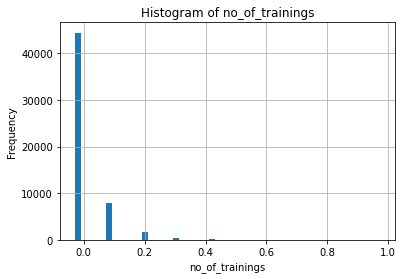

In [534]:
# Visualizing no_of_trainings variable (AFTER Mean Normalization)

plt.hist(data_scale_mtd_2['no_of_trainings'], bins=50)
plt.xlabel('no_of_trainings')
plt.ylabel('Frequency') 
plt.title('Histogram of no_of_trainings')
plt.grid(True)

plt.show()

### Mean Normalization for age variable

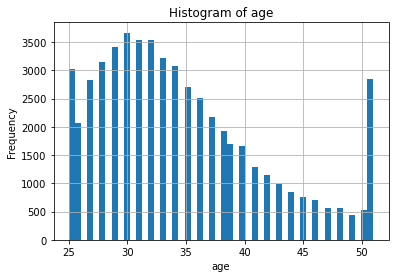

In [535]:
# Visualizing age variable (BEFORE Mean Normalization)

plt.hist(data_scale_mtd_2['age'], bins=50)
plt.xlabel('age')
plt.ylabel('Frequency') 
plt.title('Histogram of age')
plt.grid(True)

plt.show()

In [536]:
# Formula to Mean Normalize age variable

data_scale_mtd_2['age'] = (data_scale_mtd_2['age'] - data_scale_mtd_2['age'].mean()) / (data_scale_mtd_2['age'].max() - data_scale_mtd_2['age'].min())

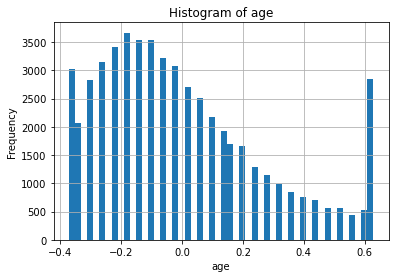

In [537]:
# Visualizing age variable (AFTER Mean Normalization)

plt.hist(data_scale_mtd_2['age'], bins=50)
plt.xlabel('age')
plt.ylabel('Frequency') 
plt.title('Histogram of age')
plt.grid(True)

plt.show()

### Mean Normalization for previous_year_rating variable

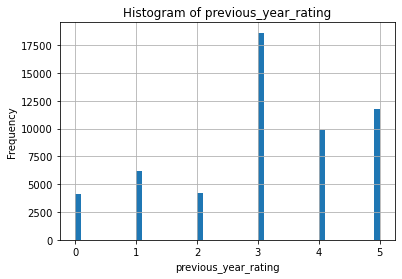

In [538]:
# Visualizing previous_year_rating variable (BEFORE Mean Normalization)

plt.hist(data_scale_mtd_2['previous_year_rating'], bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Frequency') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

In [539]:
# Formula to Mean Normalize previous_year_rating variable

data_scale_mtd_2['previous_year_rating'] = (data_scale_mtd_2['previous_year_rating'] - data_scale_mtd_2['previous_year_rating'].mean()) / (data_scale_mtd_2['previous_year_rating'].max() - data_scale_mtd_2['previous_year_rating'].min())

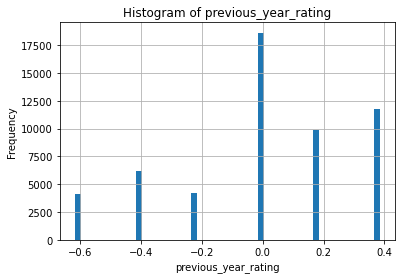

In [540]:
# Visualizing previous_year_rating variable (AFTER Mean Normalization)

plt.hist(data_scale_mtd_2['previous_year_rating'], bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Frequency') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

### Mean Normalization for length_of_service variable

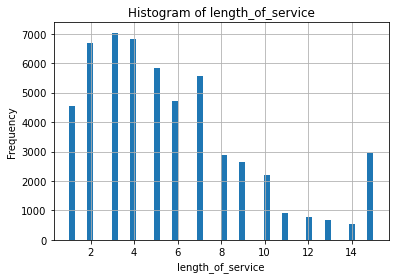

In [541]:
# Visualizing length_of_service variable (BEFORE Mean Normalization)

plt.hist(data_scale_mtd_2['length_of_service'], bins=50)
plt.xlabel('length_of_service')
plt.ylabel('Frequency') 
plt.title('Histogram of length_of_service')
plt.grid(True)

plt.show()

In [542]:
# Formula to Mean Normalize length_of_service variable

data_scale_mtd_2['length_of_service'] = (data_scale_mtd_2['length_of_service'] - data_scale_mtd_2['length_of_service'].mean()) / (data_scale_mtd_2['length_of_service'].max() - data_scale_mtd_2['length_of_service'].min())

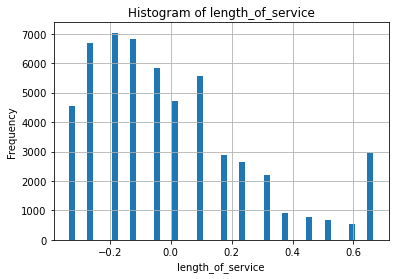

In [543]:
# Visualizing length_of_service variable (AFTER Mean Normalization)

plt.hist(data_scale_mtd_2['length_of_service'], bins=50)
plt.xlabel('length_of_service')
plt.ylabel('Frequency') 
plt.title('Histogram of length_of_service')
plt.grid(True)

plt.show()

### Mean Normalization for KPIs_met >80% variable

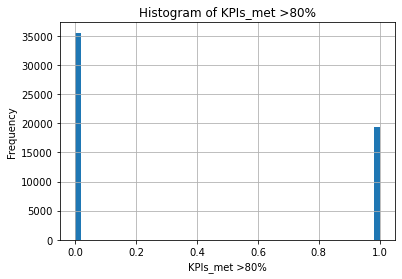

In [544]:
# Visualizing KPIs_met >80% variable (BEFORE Mean Normalization)

plt.hist(data_scale_mtd_2['KPIs_met >80%'], bins=50)
plt.xlabel('KPIs_met >80%')
plt.ylabel('Frequency') 
plt.title('Histogram of KPIs_met >80%')
plt.grid(True)

plt.show()

In [545]:
# Formula to Mean Normalize KPIs_met >80% variable

data_scale_mtd_2['KPIs_met >80%'] = (data_scale_mtd_2['KPIs_met >80%'] - data_scale_mtd_2['KPIs_met >80%'].mean()) / (data_scale_mtd_2['KPIs_met >80%'].max() - data_scale_mtd_2['KPIs_met >80%'].min())

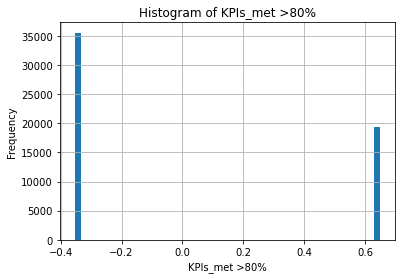

In [546]:
# Visualizing KPIs_met >80% variable (AFTER Mean Normalization)

plt.hist(data_scale_mtd_2['KPIs_met >80%'], bins=50)
plt.xlabel('KPIs_met >80%')
plt.ylabel('Frequency') 
plt.title('Histogram of KPIs_met >80%')
plt.grid(True)

plt.show()

### Mean Normalization for awards_won? variable

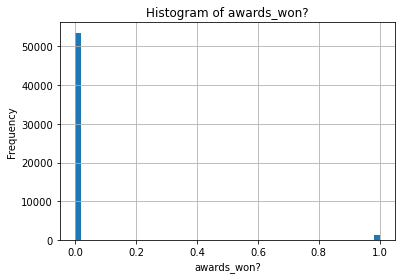

In [547]:
# Visualizing awards_won? variable (BEFORE Mean Normalization)

plt.hist(data_scale_mtd_2['awards_won?'], bins=50)
plt.xlabel('awards_won?')
plt.ylabel('Frequency') 
plt.title('Histogram of awards_won?')
plt.grid(True)

plt.show()

In [548]:
# Formula to Mean Normalize awards_won? variable

data_scale_mtd_2['awards_won?'] = (data_scale_mtd_2['awards_won?'] - data_scale_mtd_2['awards_won?'].mean()) / (data_scale_mtd_2['awards_won?'].max() - data_scale_mtd_2['awards_won?'].min())

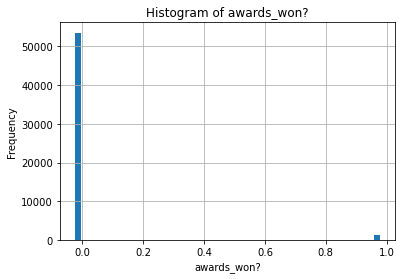

In [549]:
# Visualizing awards_won? variable (AFTER Mean Normalization)

plt.hist(data_scale_mtd_2['awards_won?'], bins=50)
plt.xlabel('awards_won?')
plt.ylabel('Frequency') 
plt.title('Histogram of awards_won?')
plt.grid(True)

plt.show()

### Mean Normalization for avg_training_score variable

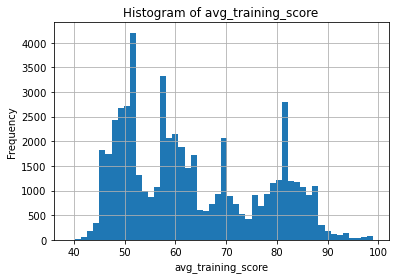

In [550]:
# Visualizing avg_training_score variable (BEFORE Mean Normalization)

plt.hist(data_scale_mtd_2['avg_training_score'], bins=50)
plt.xlabel('avg_training_score')
plt.ylabel('Frequency') 
plt.title('Histogram of avg_training_score')
plt.grid(True)

plt.show()

In [551]:
# Formula to Mean Normalize avg_training_score variable

data_scale_mtd_2['avg_training_score'] = (data_scale_mtd_2['avg_training_score'] - data_scale_mtd_2['avg_training_score'].mean()) / (data_scale_mtd_2['avg_training_score'].max() - data_scale_mtd_2['avg_training_score'].min())

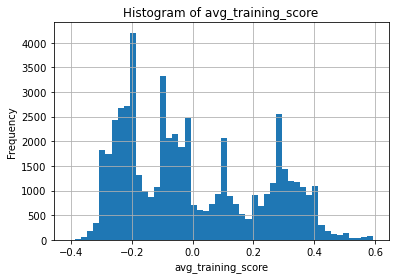

In [552]:
# Visualizing avg_training_score variable (AFTER Mean Normalization)

plt.hist(data_scale_mtd_2['avg_training_score'], bins=50)
plt.xlabel('avg_training_score')
plt.ylabel('Frequency') 
plt.title('Histogram of avg_training_score')
plt.grid(True)

plt.show()

In [553]:
# Describing each variable in the dataset (BEFORE Mean Normalization for all variables)

data.describe()

department        region     education        gender  \
count  54808.000000  54808.000000  54808.000000  54808.000000   
mean       0.085170      0.085170      0.085170      0.085170   
std        0.014672      0.013240      0.008199      0.003101   
min        0.051011      0.077750      0.080096      0.083151   
25%        0.072031      0.077750      0.080096      0.083151   
50%        0.090148      0.077750      0.080096      0.083151   
75%        0.096386      0.080126      0.098559      0.089934   
max        0.107593      0.114188      0.098559      0.089934   

       recruitment_channel  no_of_trainings           age  \
count         54808.000000     54808.000000  54808.000000   
mean              0.085170         1.253011     34.663297   
std               0.005229         0.609264      7.039684   
min               0.083952         1.000000     25.000000   
25%               0.083952         1.000000     29.000000   
50%               0.083952         1.000000     33.000000   
75%               0.085013         1.000000     39.000000   
max               0.120841        10.000000     51.000000   

       previous_year_rating  length_of_service  KPIs_met >80%   awards_won?  \
count          54808.000000       54808.000000   54808.000000  54808.000000   
mean               3.078748           5.688129       0.351974      0.023172   
std                1.496458           3.689403       0.477590      0.150450   
min                0.000000           1.000000       0.000000      0.000000   
25%                2.000000           3.000000       0.000000      0.000000   
50%                3.000000           5.000000       0.000000      0.000000   
75%                4.000000           7.000000       1.000000      0.000000   
max                5.000000          15.000000       1.000000      1.000000   

       avg_training_score   is_promoted  
count        54808.000000  54808.000000  
mean            63.386750      0.085170  
std             13.371559      0.279137  
min             39.000000      0.000000  
25%             51.000000      0.000000  
50%             60.000000      0.000000  
75%             76.000000      0.000000  
max             99.000000      1.000000

In [554]:
# Describing each variable in the dataset (AFTER Mean Normalization for all variables)

data_scale_mtd_2.describe()

department        region     education        gender  \
count  5.480800e+04  5.480800e+04  5.480800e+04  5.480800e+04   
mean  -2.390777e-14  1.695091e-12 -3.538959e-12  1.577939e-12   
std    2.593066e-01  3.633488e-01  4.440969e-01  4.572160e-01   
min   -6.037099e-01 -2.036441e-01 -2.748071e-01 -2.976208e-01   
25%   -2.322123e-01 -2.036441e-01 -2.748071e-01 -2.976208e-01   
50%    8.797753e-02 -2.036441e-01 -2.748071e-01 -2.976208e-01   
75%    1.982146e-01 -1.384163e-01  7.251929e-01  7.023792e-01   
max    3.962901e-01  7.963559e-01  7.251929e-01  7.023792e-01   

       recruitment_channel  no_of_trainings           age  \
count         5.480800e+04     5.480800e+04  5.480800e+04   
mean         -9.851608e-13     1.662150e-16  1.304919e-16   
std           1.417631e-01     6.769600e-02  2.707571e-01   
min          -3.302184e-02    -2.811228e-02 -3.716653e-01   
25%          -3.302184e-02    -2.811228e-02 -2.178191e-01   
50%          -3.302184e-02    -2.811228e-02 -6.397297e-02   
75%          -4.259521e-03    -2.811228e-02  1.667963e-01   
max           9.669782e-01     9.718877e-01  6.283347e-01   

       previous_year_rating  length_of_service  KPIs_met >80%   awards_won?  \
count          5.480800e+04       5.480800e+04   5.480800e+04  5.480800e+04   
mean           3.052870e-17       1.496455e-19   4.828401e-16 -2.589615e-17   
std            2.992917e-01       2.635288e-01   4.775903e-01  1.504503e-01   
min           -6.157495e-01      -3.348664e-01  -3.519742e-01 -2.317180e-02   
25%           -2.157495e-01      -1.920092e-01  -3.519742e-01 -2.317180e-02   
50%           -1.574953e-02      -4.915211e-02  -3.519742e-01 -2.317180e-02   
75%            1.842505e-01       9.370504e-02   6.480258e-01 -2.317180e-02   
max            3.842505e-01       6.651336e-01   6.480258e-01  9.768282e-01   

       avg_training_score   is_promoted  
count        5.480800e+04  54808.000000  
mean        -1.054760e-17      0.085170  
std          2.228593e-01      0.279137  
min         -4.064458e-01      0.000000  
25%         -2.064458e-01      0.000000  
50%         -5.644584e-02      0.000000  
75%          2.102208e-01      0.000000  
max          5.935542e-01      1.000000

### Method 3: Scaling to the Maximum and Minimum values

Scaling to the minimum and maximum values squeezes the values of the variables between 0 and 1. To implement this scaling technique, we need to subtract the minimum value from all the observations and divide the result by the value range, that is, the difference between the maximum and minimum values:

\begin{equation}
x_{scaled} = \frac{x - min(x)}{max(x) - min(x)}
\end{equation}

In [555]:
# Making a copy of the dataframe to store the result for this method of Feature Scaling

data_scale_mtd_3 = data.copy()

### Minimum & Maximum Scaling for department variable

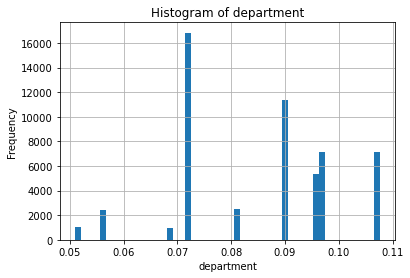

In [556]:
# Visualizing department variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['department'], bins=50)
plt.xlabel('department')
plt.ylabel('Frequency') 
plt.title('Histogram of department')
plt.grid(True)

plt.show()

In [557]:
# Formula to Minimum & Maximum Scale department variable

data_scale_mtd_3['department'] = (data_scale_mtd_3['department'] - data_scale_mtd_3['department'].min()) / (data_scale_mtd_3['department'].max() - data_scale_mtd_3['department'].min())

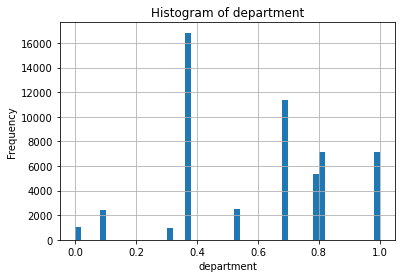

In [558]:
# Visualizing department variable (AFTER Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['department'], bins=50)
plt.xlabel('department')
plt.ylabel('Frequency') 
plt.title('Histogram of department')
plt.grid(True)

plt.show()

### Minimum & Maximum Scaling for region variable

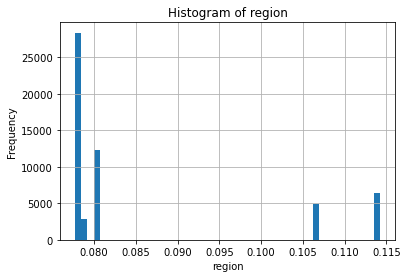

In [559]:
# Visualizing region variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['region'], bins=50)
plt.xlabel('region')
plt.ylabel('Frequency') 
plt.title('Histogram of region')
plt.grid(True)

plt.show()

In [560]:
# Formula to Minimum & Maximum Scale region variable

data_scale_mtd_3['region'] = (data_scale_mtd_3['region'] - data_scale_mtd_3['region'].min()) / (data_scale_mtd_3['region'].max() - data_scale_mtd_3['region'].min())

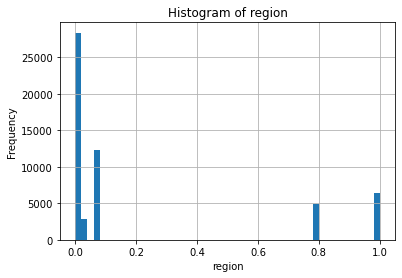

In [561]:
# Visualizing region variable (AFTER Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['region'], bins=50)
plt.xlabel('region')
plt.ylabel('Frequency') 
plt.title('Histogram of region')
plt.grid(True)

plt.show()

### Minimum & Maximum Scaling for education variable

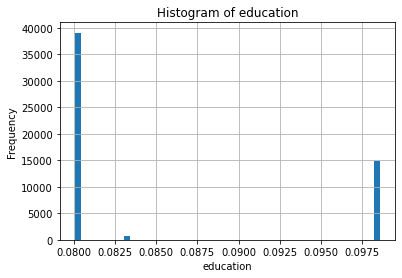

In [562]:
# Visualizing education variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['education'], bins=50)
plt.xlabel('education')
plt.ylabel('Frequency') 
plt.title('Histogram of education')
plt.grid(True)

plt.show()

In [563]:
# Formula to Minimum & Maximum Scale education variable

data_scale_mtd_3['education'] = (data_scale_mtd_3['education'] - data_scale_mtd_3['education'].min()) / (data_scale_mtd_3['education'].max() - data_scale_mtd_3['education'].min())

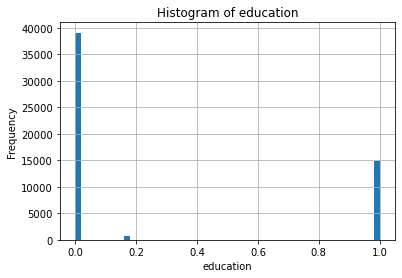

In [564]:
# Visualizing education variable (AFTER Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['education'], bins=50)
plt.xlabel('education')
plt.ylabel('Frequency') 
plt.title('Histogram of education')
plt.grid(True)

plt.show()

### Minimum & Maximum Scaling for gender variable

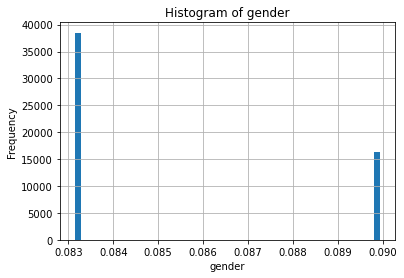

In [565]:
# Visualizing gender variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['gender'], bins=50)
plt.xlabel('gender')
plt.ylabel('Frequency') 
plt.title('Histogram of gender')
plt.grid(True)

plt.show()

In [566]:
# Formula to Minimum & Maximum Scale gender variable

data_scale_mtd_3['gender'] = (data_scale_mtd_3['gender'] - data_scale_mtd_3['gender'].min()) / (data_scale_mtd_3['gender'].max() - data_scale_mtd_3['gender'].min())

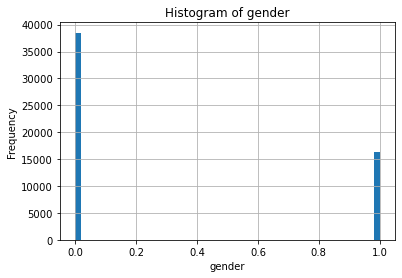

In [567]:
# Visualizing gender variable (AFTER Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['gender'], bins=50)
plt.xlabel('gender')
plt.ylabel('Frequency') 
plt.title('Histogram of gender')
plt.grid(True)

plt.show()

### Minimum & Maximum Scaling for recruitment_channel variable

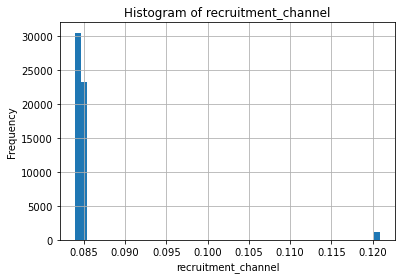

In [568]:
# Visualizing recruitment_channel variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['recruitment_channel'], bins=50)
plt.xlabel('recruitment_channel')
plt.ylabel('Frequency') 
plt.title('Histogram of recruitment_channel')
plt.grid(True)

plt.show()

In [569]:
# Formula to Minimum & Maximum Scale recruitment_channel variable

data_scale_mtd_3['recruitment_channel'] = (data_scale_mtd_3['recruitment_channel'] - data_scale_mtd_3['recruitment_channel'].min()) / (data_scale_mtd_3['recruitment_channel'].max() - data_scale_mtd_3['recruitment_channel'].min())

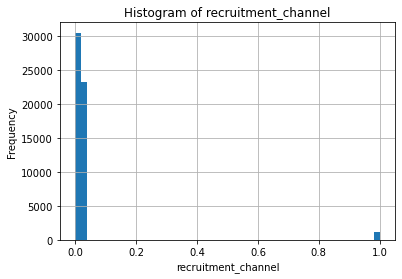

In [570]:
# Visualizing recruitment_channel variable (AFTER Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['recruitment_channel'], bins=50)
plt.xlabel('recruitment_channel')
plt.ylabel('Frequency') 
plt.title('Histogram of recruitment_channel')
plt.grid(True)

plt.show()

### Minimum & Maximum Scaling for no_of_trainings variable

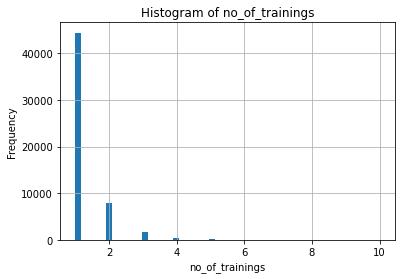

In [571]:
# Visualizing no_of_trainings variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['no_of_trainings'], bins=50)
plt.xlabel('no_of_trainings')
plt.ylabel('Frequency') 
plt.title('Histogram of no_of_trainings')
plt.grid(True)

plt.show()

In [572]:
# Formula to Minimum & Maximum Scale no_of_trainings variable

data_scale_mtd_3['no_of_trainings'] = (data_scale_mtd_3['no_of_trainings'] - data_scale_mtd_3['no_of_trainings'].min()) / (data_scale_mtd_3['no_of_trainings'].max() - data_scale_mtd_3['no_of_trainings'].min())

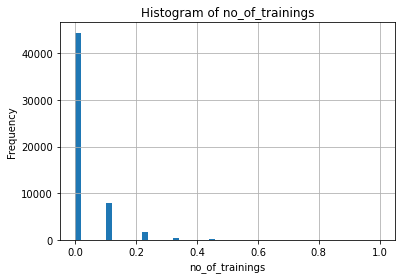

In [573]:
# Visualizing no_of_trainings variable (AFTER Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['no_of_trainings'], bins=50)
plt.xlabel('no_of_trainings')
plt.ylabel('Frequency') 
plt.title('Histogram of no_of_trainings')
plt.grid(True)

plt.show()

### Minimum & Maximum Scaling for age variable

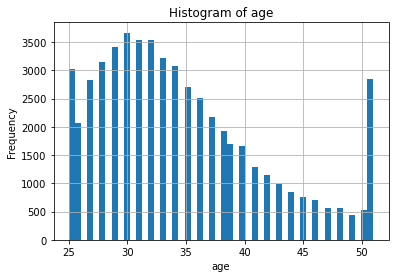

In [574]:
# Visualizing age variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['age'], bins=50)
plt.xlabel('age')
plt.ylabel('Frequency') 
plt.title('Histogram of age')
plt.grid(True)

plt.show()

In [575]:
# Formula to Minimum & Maximum Scale age variable

data_scale_mtd_3['age'] = (data_scale_mtd_3['age'] - data_scale_mtd_3['age'].min()) / (data_scale_mtd_3['age'].max() - data_scale_mtd_3['age'].min())

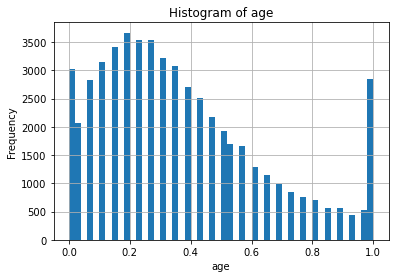

In [576]:
# Visualizing age variable (AFTER Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['age'], bins=50)
plt.xlabel('age')
plt.ylabel('Frequency') 
plt.title('Histogram of age')
plt.grid(True)

plt.show()

### Minimum & Maximum Scaling for previous_year_rating variable

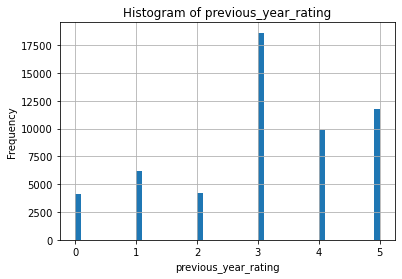

In [577]:
# Visualizing previous_year_rating variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['previous_year_rating'], bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Frequency') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

In [578]:
# Formula to Minimum & Maximum Scale previous_year_rating variable

data_scale_mtd_3['previous_year_rating'] = (data_scale_mtd_3['previous_year_rating'] - data_scale_mtd_3['previous_year_rating'].min()) / (data_scale_mtd_3['previous_year_rating'].max() - data_scale_mtd_3['previous_year_rating'].min())

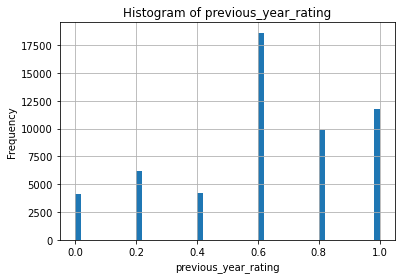

In [579]:
# Visualizing previous_year_rating variable (AFTER Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['previous_year_rating'], bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Frequency') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

### Minimum & Maximum Scaling for length_of_service variable

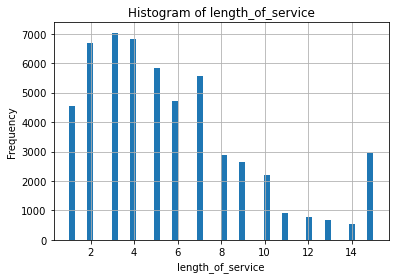

In [580]:
# Visualizing length_of_service variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['length_of_service'], bins=50)
plt.xlabel('length_of_service')
plt.ylabel('Frequency') 
plt.title('Histogram of length_of_service')
plt.grid(True)

plt.show()

In [581]:
# Formula to Minimum & Maximum Scale length_of_service variable

data_scale_mtd_3['length_of_service'] = (data_scale_mtd_3['length_of_service'] - data_scale_mtd_3['length_of_service'].min()) / (data_scale_mtd_3['length_of_service'].max() - data_scale_mtd_3['length_of_service'].min())

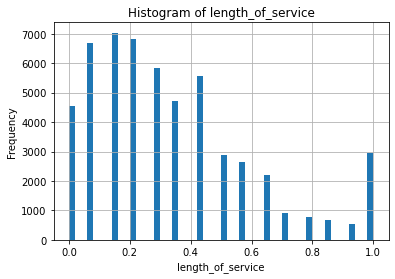

In [582]:
# Visualizing length_of_service variable (AFTER Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['length_of_service'], bins=50)
plt.xlabel('length_of_service')
plt.ylabel('Frequency') 
plt.title('Histogram of length_of_service')
plt.grid(True)

plt.show()

### Minimum & Maximum Scaling for KPIs_met >80% variable

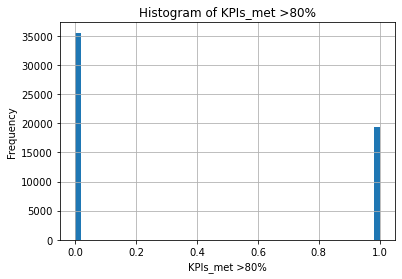

In [583]:
# Visualizing KPIs_met >80% variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['KPIs_met >80%'], bins=50)
plt.xlabel('KPIs_met >80%')
plt.ylabel('Frequency') 
plt.title('Histogram of KPIs_met >80%')
plt.grid(True)

plt.show()

In [584]:
# Formula to Minimum & Maximum Scale KPIs_met >80% variable

data_scale_mtd_3['KPIs_met >80%'] = (data_scale_mtd_3['KPIs_met >80%'] - data_scale_mtd_3['KPIs_met >80%'].min()) / (data_scale_mtd_3['KPIs_met >80%'].max() - data_scale_mtd_3['KPIs_met >80%'].min())

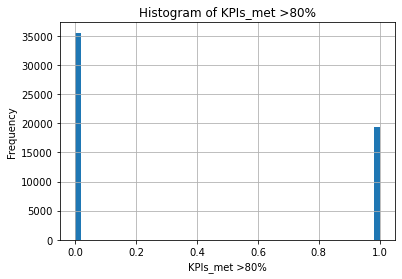

In [585]:
# Visualizing KPIs_met >80% variable (AFTER Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['KPIs_met >80%'], bins=50)
plt.xlabel('KPIs_met >80%')
plt.ylabel('Frequency') 
plt.title('Histogram of KPIs_met >80%')
plt.grid(True)

plt.show()

### Minimum & Maximum Scaling for awards_won? variable

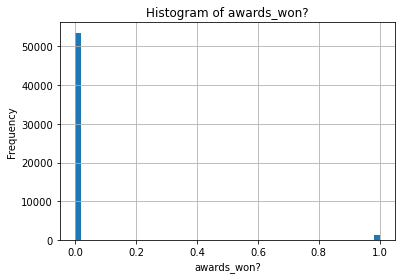

In [586]:
# Visualizing awards_won? variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['awards_won?'], bins=50)
plt.xlabel('awards_won?')
plt.ylabel('Frequency') 
plt.title('Histogram of awards_won?')
plt.grid(True)

plt.show()

In [587]:
# Formula to Minimum & Maximum Scale awards_won? variable

data_scale_mtd_3['awards_won?'] = (data_scale_mtd_3['awards_won?'] - data_scale_mtd_3['awards_won?'].min()) / (data_scale_mtd_3['awards_won?'].max() - data_scale_mtd_3['awards_won?'].min())

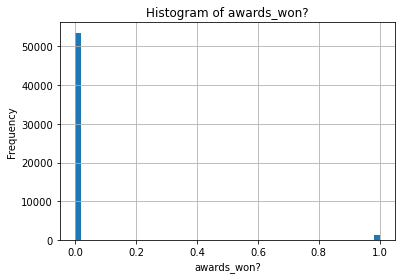

In [588]:
# Visualizing awards_won? variable (AFTER Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['awards_won?'], bins=50)
plt.xlabel('awards_won?')
plt.ylabel('Frequency') 
plt.title('Histogram of awards_won?')
plt.grid(True)

plt.show()

### Minimum & Maximum Scaling for avg_training_score variable

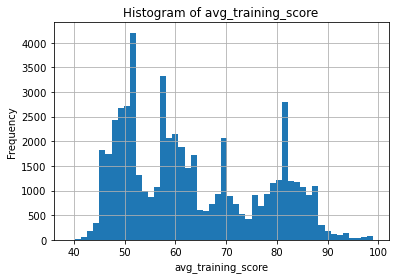

In [589]:
# Visualizing avg_training_score variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['avg_training_score'], bins=50)
plt.xlabel('avg_training_score')
plt.ylabel('Frequency') 
plt.title('Histogram of avg_training_score')
plt.grid(True)

plt.show()

In [590]:
# Formula to Minimum & Maximum Scale avg_training_score variable

data_scale_mtd_3['avg_training_score'] = (data_scale_mtd_3['avg_training_score'] - data_scale_mtd_3['avg_training_score'].min()) / (data_scale_mtd_3['avg_training_score'].max() - data_scale_mtd_3['avg_training_score'].min())

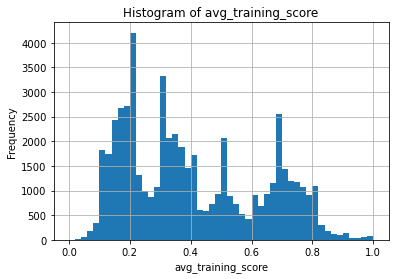

In [591]:
# Visualizing avg_training_score variable (AFTER Minimum & Maximum Scaling)

plt.hist(data_scale_mtd_3['avg_training_score'], bins=50)
plt.xlabel('avg_training_score')
plt.ylabel('Frequency') 
plt.title('Histogram of avg_training_score')
plt.grid(True)

plt.show()

In [592]:
# Describing each variable in the dataset (BEFORE Minimum & Maximum Scaling for all variables)

data.describe()

department        region     education        gender  \
count  54808.000000  54808.000000  54808.000000  54808.000000   
mean       0.085170      0.085170      0.085170      0.085170   
std        0.014672      0.013240      0.008199      0.003101   
min        0.051011      0.077750      0.080096      0.083151   
25%        0.072031      0.077750      0.080096      0.083151   
50%        0.090148      0.077750      0.080096      0.083151   
75%        0.096386      0.080126      0.098559      0.089934   
max        0.107593      0.114188      0.098559      0.089934   

       recruitment_channel  no_of_trainings           age  \
count         54808.000000     54808.000000  54808.000000   
mean              0.085170         1.253011     34.663297   
std               0.005229         0.609264      7.039684   
min               0.083952         1.000000     25.000000   
25%               0.083952         1.000000     29.000000   
50%               0.083952         1.000000     33.000000   
75%               0.085013         1.000000     39.000000   
max               0.120841        10.000000     51.000000   

       previous_year_rating  length_of_service  KPIs_met >80%   awards_won?  \
count          54808.000000       54808.000000   54808.000000  54808.000000   
mean               3.078748           5.688129       0.351974      0.023172   
std                1.496458           3.689403       0.477590      0.150450   
min                0.000000           1.000000       0.000000      0.000000   
25%                2.000000           3.000000       0.000000      0.000000   
50%                3.000000           5.000000       0.000000      0.000000   
75%                4.000000           7.000000       1.000000      0.000000   
max                5.000000          15.000000       1.000000      1.000000   

       avg_training_score   is_promoted  
count        54808.000000  54808.000000  
mean            63.386750      0.085170  
std             13.371559      0.279137  
min             39.000000      0.000000  
25%             51.000000      0.000000  
50%             60.000000      0.000000  
75%             76.000000      0.000000  
max             99.000000      1.000000

In [593]:
# Describing each variable in the dataset (AFTER Minimum & Maximum Scaling for all variables)

data_scale_mtd_3.describe()

department        region     education        gender  \
count  54808.000000  54808.000000  54808.000000  54808.000000   
mean       0.603710      0.203644      0.274807      0.297621   
std        0.259307      0.363349      0.444097      0.457216   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.371498      0.000000      0.000000      0.000000   
50%        0.691687      0.000000      0.000000      0.000000   
75%        0.801925      0.065228      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000   

       recruitment_channel  no_of_trainings           age  \
count         54808.000000     54808.000000  54808.000000   
mean              0.033022         0.028112      0.371665   
std               0.141763         0.067696      0.270757   
min               0.000000         0.000000      0.000000   
25%               0.000000         0.000000      0.153846   
50%               0.000000         0.000000      0.307692   
75%               0.028762         0.000000      0.538462   
max               1.000000         1.000000      1.000000   

       previous_year_rating  length_of_service  KPIs_met >80%   awards_won?  \
count          54808.000000       54808.000000   54808.000000  54808.000000   
mean               0.615750           0.334866       0.351974      0.023172   
std                0.299292           0.263529       0.477590      0.150450   
min                0.000000           0.000000       0.000000      0.000000   
25%                0.400000           0.142857       0.000000      0.000000   
50%                0.600000           0.285714       0.000000      0.000000   
75%                0.800000           0.428571       1.000000      0.000000   
max                1.000000           1.000000       1.000000      1.000000   

       avg_training_score   is_promoted  
count        54808.000000  54808.000000  
mean             0.406446      0.085170  
std              0.222859      0.279137  
min              0.000000      0.000000  
25%              0.200000      0.000000  
50%              0.350000      0.000000  
75%              0.616667      0.000000  
max              1.000000      1.000000

### Method 4: Maximum Absolute Scaling

Maximum absolute scaling scales the data to its maximum value; that is, it divides every observation by the maximum value of the variable:

\begin{equation}
x_{scaled} = \frac{x}{max(x)}
\end{equation}

The result of the preceding transformation is a distribution in which the values vary approximately within the range of -1 to 1.

Note: This method is recommended for data that is centered at zero or on sparse data.

In [594]:
# Making a copy of the dataframe to store the result for this method of Feature Scaling

data_scale_mtd_4 = data.copy()

### Maximum Absolute Scaling for department variable

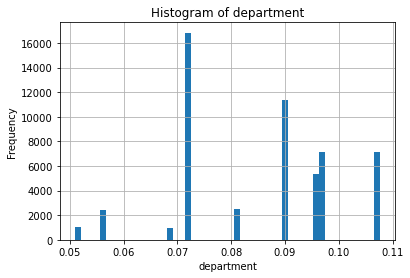

In [595]:
# Visualizing department variable (BEFORE Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['department'], bins=50)
plt.xlabel('department')
plt.ylabel('Frequency') 
plt.title('Histogram of department')
plt.grid(True)

plt.show()

In [596]:
# Formula to Maximum Absolute Scale department variable

data_scale_mtd_4['department'] = data_scale_mtd_4['department'] / data_scale_mtd_4['department'].max() 

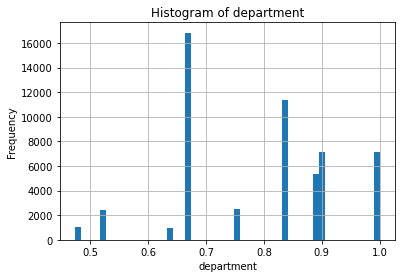

In [597]:
# Visualizing department variable (AFTER Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['department'], bins=50)
plt.xlabel('department')
plt.ylabel('Frequency') 
plt.title('Histogram of department')
plt.grid(True)

plt.show()

### Maximum Absolute Scaling for region variable

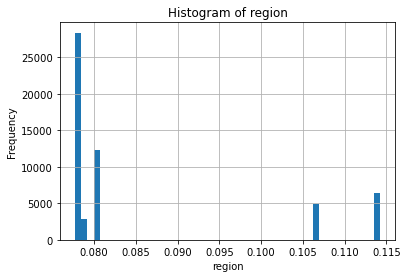

In [598]:
# Visualizing region variable (BEFORE Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['region'], bins=50)
plt.xlabel('region')
plt.ylabel('Frequency') 
plt.title('Histogram of region')
plt.grid(True)

plt.show()

In [599]:
# Formula to Maximum Absolute Scale region variable

data_scale_mtd_4['region'] = data_scale_mtd_4['region'] / data_scale_mtd_4['region'].max() 

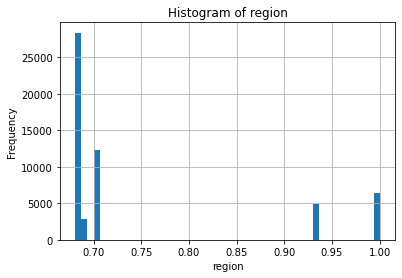

In [600]:
# Visualizing region variable (AFTER Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['region'], bins=50)
plt.xlabel('region')
plt.ylabel('Frequency') 
plt.title('Histogram of region')
plt.grid(True)

plt.show()

### Maximum Absolute Scaling for education variable

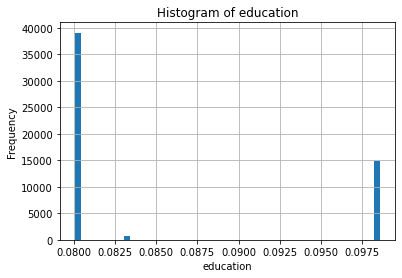

In [601]:
# Visualizing education variable (BEFORE Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['education'], bins=50)
plt.xlabel('education')
plt.ylabel('Frequency') 
plt.title('Histogram of education')
plt.grid(True)

plt.show()

In [602]:
# Formula to Maximum Absolute Scale education variable

data_scale_mtd_4['education'] = data_scale_mtd_4['education'] / data_scale_mtd_4['education'].max() 

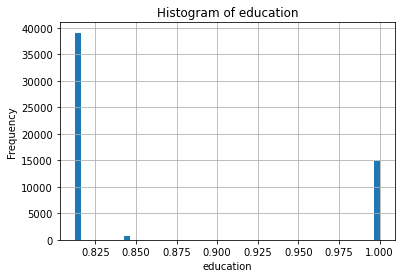

In [603]:
# Visualizing education variable (AFTER Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['education'], bins=50)
plt.xlabel('education')
plt.ylabel('Frequency') 
plt.title('Histogram of education')
plt.grid(True)

plt.show()

### Maximum Absolute Scaling for gender variable

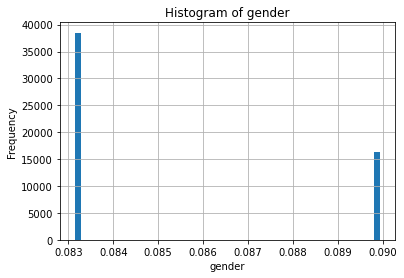

In [604]:
# Visualizing gender variable (BEFORE Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['gender'], bins=50)
plt.xlabel('gender')
plt.ylabel('Frequency') 
plt.title('Histogram of gender')
plt.grid(True)

plt.show()

In [605]:
# Formula to Maximum Absolute Scale gender variable

data_scale_mtd_4['gender'] = data_scale_mtd_4['gender'] / data_scale_mtd_4['gender'].max() 

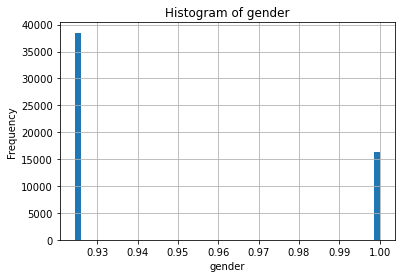

In [606]:
# Visualizing gender variable (AFTER Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['gender'], bins=50)
plt.xlabel('gender')
plt.ylabel('Frequency') 
plt.title('Histogram of gender')
plt.grid(True)

plt.show()

### Maximum Absolute Scaling for recruitment_channel variable

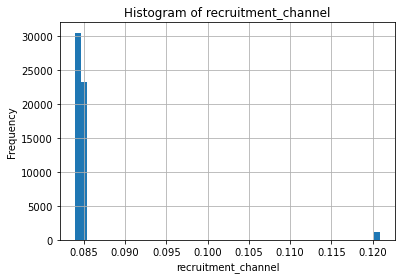

In [607]:
# Visualizing recruitment_channel variable (BEFORE Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['recruitment_channel'], bins=50)
plt.xlabel('recruitment_channel')
plt.ylabel('Frequency') 
plt.title('Histogram of recruitment_channel')
plt.grid(True)

plt.show()

In [608]:
# Formula to Maximum Absolute Scale recruitment_channel variable

data_scale_mtd_4['recruitment_channel'] = data_scale_mtd_4['recruitment_channel'] / data_scale_mtd_4['recruitment_channel'].max() 

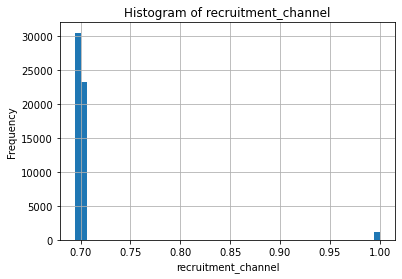

In [609]:
# Visualizing recruitment_channel variable (AFTER Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['recruitment_channel'], bins=50)
plt.xlabel('recruitment_channel')
plt.ylabel('Frequency') 
plt.title('Histogram of recruitment_channel')
plt.grid(True)

plt.show()

### Maximum Absolute Scaling for no_of_trainings variable

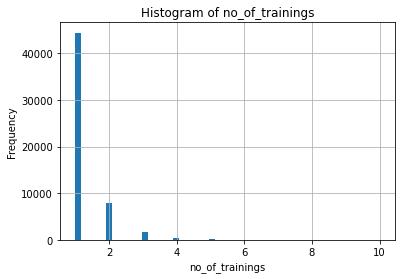

In [610]:
# Visualizing no_of_trainings variable (BEFORE Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['no_of_trainings'], bins=50)
plt.xlabel('no_of_trainings')
plt.ylabel('Frequency') 
plt.title('Histogram of no_of_trainings')
plt.grid(True)

plt.show()

In [611]:
# Formula to Maximum Absolute Scale no_of_trainings variable

data_scale_mtd_4['no_of_trainings'] = data_scale_mtd_4['no_of_trainings'] / data_scale_mtd_4['no_of_trainings'].max() 

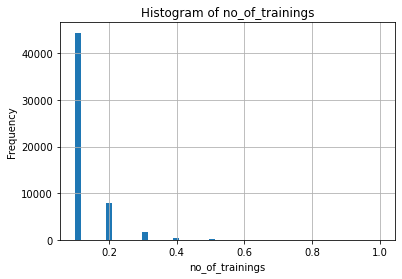

In [612]:
# Visualizing no_of_trainings variable (AFTER Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['no_of_trainings'], bins=50)
plt.xlabel('no_of_trainings')
plt.ylabel('Frequency') 
plt.title('Histogram of no_of_trainings')
plt.grid(True)

plt.show()

### Maximum Absolute Scaling for age variable

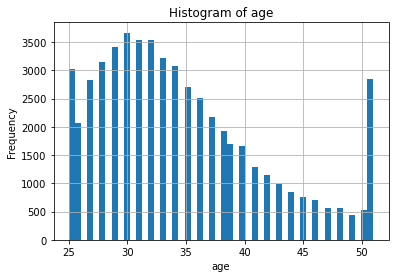

In [613]:
# Visualizing age variable (BEFORE Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['age'], bins=50)
plt.xlabel('age')
plt.ylabel('Frequency') 
plt.title('Histogram of age')
plt.grid(True)

plt.show()

In [614]:
# Formula to Maximum Absolute Scale age variable

data_scale_mtd_4['age'] = data_scale_mtd_4['age'] / data_scale_mtd_4['age'].max() 

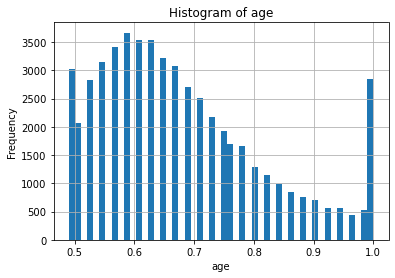

In [615]:
# Visualizing age variable (AFTER Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['age'], bins=50)
plt.xlabel('age')
plt.ylabel('Frequency') 
plt.title('Histogram of age')
plt.grid(True)

plt.show()

### Maximum Absolute Scaling for previous_year_rating variable

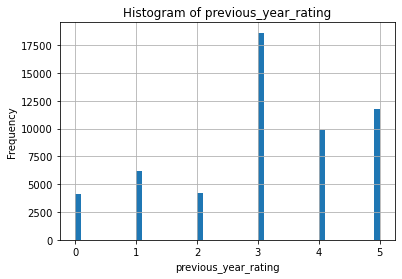

In [616]:
# Visualizing previous_year_rating variable (BEFORE Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['previous_year_rating'], bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Frequency') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

In [617]:
# Formula to Maximum Absolute Scale previous_year_rating variable

data_scale_mtd_4['previous_year_rating'] = data_scale_mtd_4['previous_year_rating'] / data_scale_mtd_4['previous_year_rating'].max() 

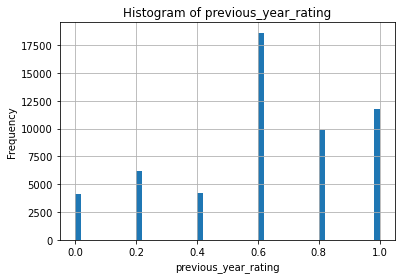

In [618]:
# Visualizing previous_year_rating variable (AFTER Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['previous_year_rating'], bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Frequency') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

### Maximum Absolute Scaling for length_of_service variable

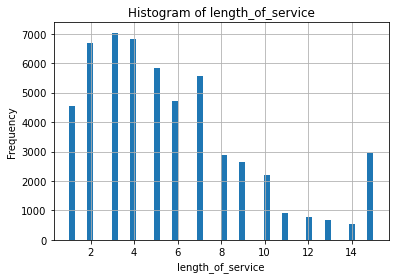

In [619]:
# Visualizing length_of_service variable (BEFORE Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['length_of_service'], bins=50)
plt.xlabel('length_of_service')
plt.ylabel('Frequency') 
plt.title('Histogram of length_of_service')
plt.grid(True)

plt.show()

In [620]:
# Formula to Maximum Absolute Scale length_of_service variable

data_scale_mtd_4['length_of_service'] = data_scale_mtd_4['length_of_service'] / data_scale_mtd_4['length_of_service'].max() 

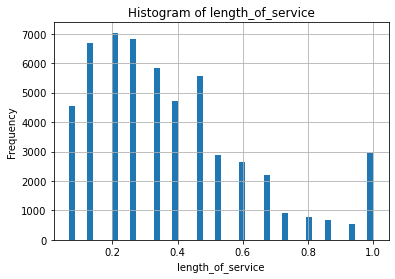

In [621]:
# Visualizing length_of_service variable (AFTER Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['length_of_service'], bins=50)
plt.xlabel('length_of_service')
plt.ylabel('Frequency') 
plt.title('Histogram of length_of_service')
plt.grid(True)

plt.show()

### Maximum Absolute Scaling for KPIs_met >80% variable

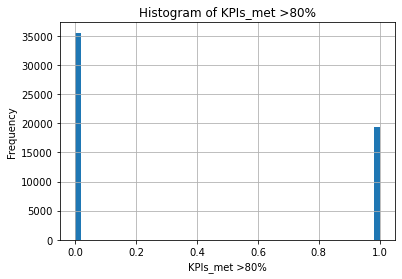

In [622]:
# Visualizing KPIs_met >80% variable (BEFORE Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['KPIs_met >80%'], bins=50)
plt.xlabel('KPIs_met >80%')
plt.ylabel('Frequency') 
plt.title('Histogram of KPIs_met >80%')
plt.grid(True)

plt.show()

In [623]:
# Formula to Maximum Absolute Scale KPIs_met >80% variable

data_scale_mtd_4['KPIs_met >80%'] = data_scale_mtd_4['KPIs_met >80%'] / data_scale_mtd_4['KPIs_met >80%'].max() 

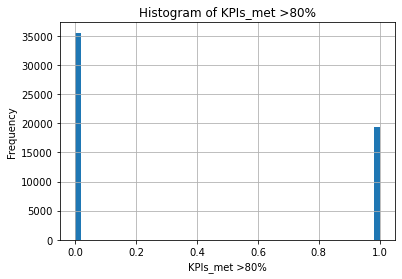

In [624]:
# Visualizing KPIs_met >80% variable (AFTER Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['KPIs_met >80%'], bins=50)
plt.xlabel('KPIs_met >80%')
plt.ylabel('Frequency') 
plt.title('Histogram of KPIs_met >80%')
plt.grid(True)

plt.show()

### Maximum Absolute Scaling for awards_won? variable

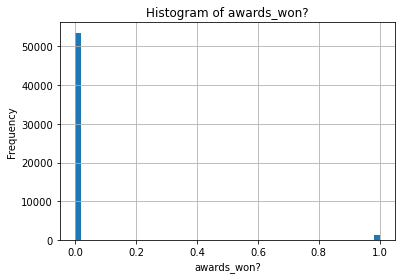

In [625]:
# Visualizing awards_won? variable (BEFORE Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['awards_won?'], bins=50)
plt.xlabel('awards_won?')
plt.ylabel('Frequency') 
plt.title('Histogram of awards_won?')
plt.grid(True)

plt.show()

In [626]:
# Formula to Maximum Absolute Scale awards_won? variable

data_scale_mtd_4['awards_won?'] = data_scale_mtd_4['awards_won?'] / data_scale_mtd_4['awards_won?'].max() 

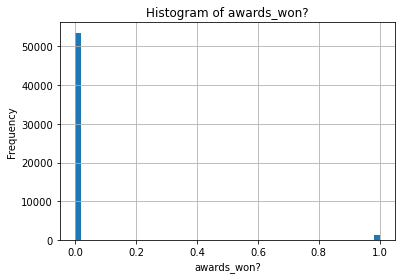

In [627]:
# Visualizing awards_won? variable (AFTER Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['awards_won?'], bins=50)
plt.xlabel('awards_won?')
plt.ylabel('Frequency') 
plt.title('Histogram of awards_won?')
plt.grid(True)

plt.show()

### Maximum Absolute Scaling for avg_training_score variable

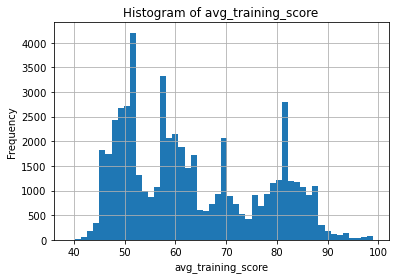

In [628]:
# Visualizing avg_training_score variable (BEFORE Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['avg_training_score'], bins=50)
plt.xlabel('avg_training_score')
plt.ylabel('Frequency') 
plt.title('Histogram of avg_training_score')
plt.grid(True)

plt.show()

In [629]:
# Formula to Maximum Absolute Scale avg_training_score variable

data_scale_mtd_4['avg_training_score'] = data_scale_mtd_4['avg_training_score'] / data_scale_mtd_4['avg_training_score'].max() 

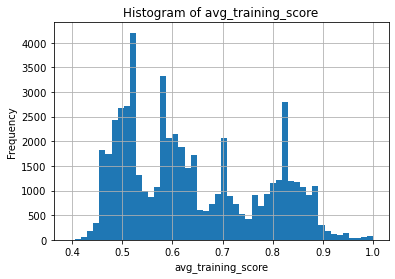

In [630]:
# Visualizing avg_training_score variable (AFTER Maximum Absolute Scaling)

plt.hist(data_scale_mtd_4['avg_training_score'], bins=50)
plt.xlabel('avg_training_score')
plt.ylabel('Frequency') 
plt.title('Histogram of avg_training_score')
plt.grid(True)

plt.show()

In [631]:
# Describing each variable in the dataset (BEFORE Maximum Absolute Scaling for all variables)

data.describe()

department        region     education        gender  \
count  54808.000000  54808.000000  54808.000000  54808.000000   
mean       0.085170      0.085170      0.085170      0.085170   
std        0.014672      0.013240      0.008199      0.003101   
min        0.051011      0.077750      0.080096      0.083151   
25%        0.072031      0.077750      0.080096      0.083151   
50%        0.090148      0.077750      0.080096      0.083151   
75%        0.096386      0.080126      0.098559      0.089934   
max        0.107593      0.114188      0.098559      0.089934   

       recruitment_channel  no_of_trainings           age  \
count         54808.000000     54808.000000  54808.000000   
mean              0.085170         1.253011     34.663297   
std               0.005229         0.609264      7.039684   
min               0.083952         1.000000     25.000000   
25%               0.083952         1.000000     29.000000   
50%               0.083952         1.000000     33.000000   
75%               0.085013         1.000000     39.000000   
max               0.120841        10.000000     51.000000   

       previous_year_rating  length_of_service  KPIs_met >80%   awards_won?  \
count          54808.000000       54808.000000   54808.000000  54808.000000   
mean               3.078748           5.688129       0.351974      0.023172   
std                1.496458           3.689403       0.477590      0.150450   
min                0.000000           1.000000       0.000000      0.000000   
25%                2.000000           3.000000       0.000000      0.000000   
50%                3.000000           5.000000       0.000000      0.000000   
75%                4.000000           7.000000       1.000000      0.000000   
max                5.000000          15.000000       1.000000      1.000000   

       avg_training_score   is_promoted  
count        54808.000000  54808.000000  
mean            63.386750      0.085170  
std             13.371559      0.279137  
min             39.000000      0.000000  
25%             51.000000      0.000000  
50%             60.000000      0.000000  
75%             76.000000      0.000000  
max             99.000000      1.000000

In [632]:
# Describing each variable in the dataset (AFTER Maximum Absolute Scaling for all variables)

data_scale_mtd_4.describe()

department        region     education        gender  \
count  54808.000000  54808.000000  54808.000000  54808.000000   
mean       0.791593      0.745876      0.864149      0.947031   
std        0.136368      0.115948      0.083193      0.034481   
min        0.474106      0.680892      0.812669      0.924586   
25%        0.669474      0.680892      0.812669      0.924586   
50%        0.837860      0.680892      0.812669      0.924586   
75%        0.895833      0.701706      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000   

       recruitment_channel  no_of_trainings           age  \
count         54808.000000     54808.000000  54808.000000   
mean              0.704813         0.125301      0.679672   
std               0.043276         0.060926      0.138033   
min               0.694733         0.100000      0.490196   
25%               0.694733         0.100000      0.568627   
50%               0.694733         0.100000      0.647059   
75%               0.703513         0.100000      0.764706   
max               1.000000         1.000000      1.000000   

       previous_year_rating  length_of_service  KPIs_met >80%   awards_won?  \
count          54808.000000       54808.000000   54808.000000  54808.000000   
mean               0.615750           0.379209       0.351974      0.023172   
std                0.299292           0.245960       0.477590      0.150450   
min                0.000000           0.066667       0.000000      0.000000   
25%                0.400000           0.200000       0.000000      0.000000   
50%                0.600000           0.333333       0.000000      0.000000   
75%                0.800000           0.466667       1.000000      0.000000   
max                1.000000           1.000000       1.000000      1.000000   

       avg_training_score   is_promoted  
count        54808.000000  54808.000000  
mean             0.640270      0.085170  
std              0.135066      0.279137  
min              0.393939      0.000000  
25%              0.515152      0.000000  
50%              0.606061      0.000000  
75%              0.767677      0.000000  
max              1.000000      1.000000

### Method 5: Scaling to Quantiles and Median - RobustScaling

When scaling variables to the median and quantiles, the median value is removed from the observations and the result is divided by the inter-quartile range (IQR). The IQR is the range between the 1st quartile and the 3rd quartile, or, in other words, the range between the 25th quantile and the 75th quantile:


\begin{equation}
x_{scaled} = \frac{x - median(x)}{x.quantile(0.75) - x.quantile(0.25)}
\end{equation}

This method is known as robust scaling because it produces more robust estimates for the center and value range of the variable, and is recommended if the data contains outliers.

In [633]:
# Making a copy of the dataframe to store the result for this method of Feature Scaling

data_scale_mtd_5 = data.copy()

### Robust Scaling for department variable

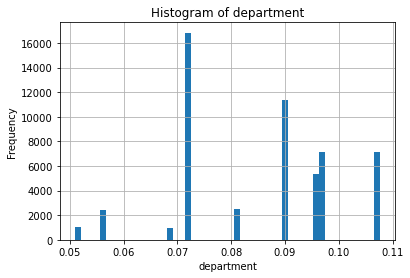

In [634]:
# Visualizing department variable (BEFORE Robust Scaling)

plt.hist(data_scale_mtd_5['department'], bins=50)
plt.xlabel('department')
plt.ylabel('Frequency') 
plt.title('Histogram of department')
plt.grid(True)

plt.show()

In [635]:
# Formula to Robust Scale department variable

data_scale_mtd_5['department'] = (data_scale_mtd_5['department'] - data_scale_mtd_5['department'].median()) / (data_scale_mtd_5['department'].quantile(0.75) - data_scale_mtd_5['department'].quantile(0.25)) 

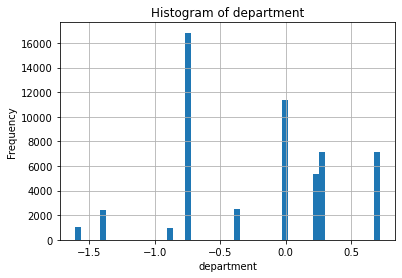

In [636]:
# Visualizing department variable (AFTER Robust Scaling)

plt.hist(data_scale_mtd_5['department'], bins=50)
plt.xlabel('department')
plt.ylabel('Frequency') 
plt.title('Histogram of department')
plt.grid(True)

plt.show()

### Robust Scaling for region variable

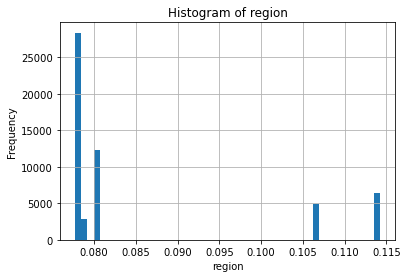

In [637]:
# Visualizing region variable (BEFORE Robust Scaling)

plt.hist(data_scale_mtd_5['region'], bins=50)
plt.xlabel('region')
plt.ylabel('Frequency') 
plt.title('Histogram of region')
plt.grid(True)

plt.show()

In [638]:
# Formula to Robust Scale region variable

data_scale_mtd_5['region'] = (data_scale_mtd_5['region'] - data_scale_mtd_5['region'].median()) / (data_scale_mtd_5['region'].quantile(0.75) - data_scale_mtd_5['region'].quantile(0.25)) 

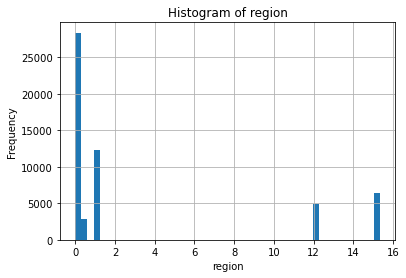

In [639]:
# Visualizing region variable (AFTER Robust Scaling)

plt.hist(data_scale_mtd_5['region'], bins=50)
plt.xlabel('region')
plt.ylabel('Frequency') 
plt.title('Histogram of region')
plt.grid(True)

plt.show()

### Robust Scaling for education variable

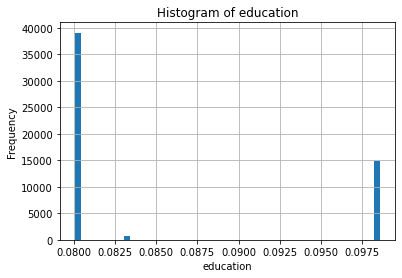

In [640]:
# Visualizing education variable (BEFORE Robust Scaling)

plt.hist(data_scale_mtd_5['education'], bins=50)
plt.xlabel('education')
plt.ylabel('Frequency') 
plt.title('Histogram of education')
plt.grid(True)

plt.show()

In [641]:
# Formula to Robust Scale education variable

data_scale_mtd_5['education'] = (data_scale_mtd_5['education'] - data_scale_mtd_5['education'].median()) / (data_scale_mtd_5['education'].quantile(0.75) - data_scale_mtd_5['education'].quantile(0.25)) 

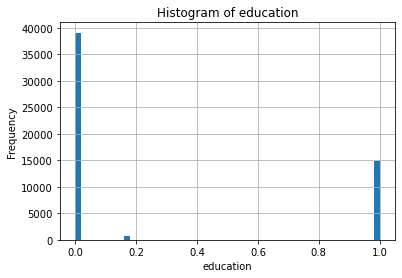

In [642]:
# Visualizing education variable (AFTER Robust Scaling)

plt.hist(data_scale_mtd_5['education'], bins=50)
plt.xlabel('education')
plt.ylabel('Frequency') 
plt.title('Histogram of education')
plt.grid(True)

plt.show()

### Robust Scaling for gender variable

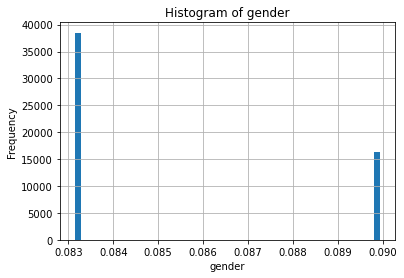

In [643]:
# Visualizing gender variable (BEFORE Robust Scaling)

plt.hist(data_scale_mtd_5['gender'], bins=50)
plt.xlabel('gender')
plt.ylabel('Frequency') 
plt.title('Histogram of gender')
plt.grid(True)

plt.show()

In [644]:
# Formula to Robust Scale gender variable

data_scale_mtd_5['gender'] = (data_scale_mtd_5['gender'] - data_scale_mtd_5['gender'].median()) / (data_scale_mtd_5['gender'].quantile(0.75) - data_scale_mtd_5['gender'].quantile(0.25)) 

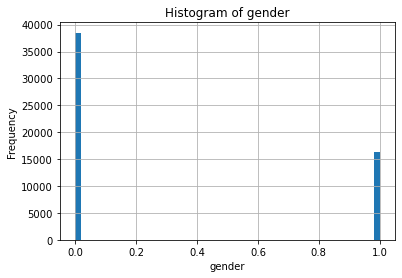

In [645]:
# Visualizing gender variable (AFTER Robust Scaling)

plt.hist(data_scale_mtd_5['gender'], bins=50)
plt.xlabel('gender')
plt.ylabel('Frequency') 
plt.title('Histogram of gender')
plt.grid(True)

plt.show()

### Robust Scaling for recruitment_channel variable

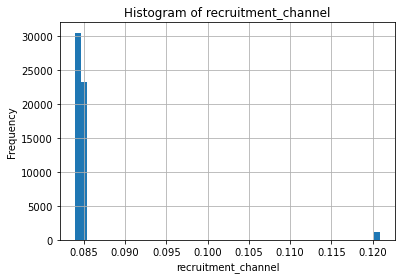

In [646]:
# Visualizing recruitment_channel variable (BEFORE Robust Scaling)

plt.hist(data_scale_mtd_5['recruitment_channel'], bins=50)
plt.xlabel('recruitment_channel')
plt.ylabel('Frequency') 
plt.title('Histogram of recruitment_channel')
plt.grid(True)

plt.show()

In [647]:
# Formula to Robust Scale recruitment_channel variable

data_scale_mtd_5['recruitment_channel'] = (data_scale_mtd_5['recruitment_channel'] - data_scale_mtd_5['recruitment_channel'].median()) / (data_scale_mtd_5['recruitment_channel'].quantile(0.75) - data_scale_mtd_5['recruitment_channel'].quantile(0.25)) 

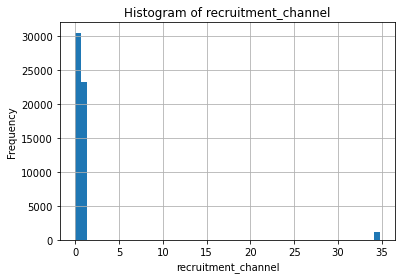

In [648]:
# Visualizing recruitment_channel variable (AFTER Robust Scaling)

plt.hist(data_scale_mtd_5['recruitment_channel'], bins=50)
plt.xlabel('recruitment_channel')
plt.ylabel('Frequency') 
plt.title('Histogram of recruitment_channel')
plt.grid(True)

plt.show()

### Robust Scaling for no_of_trainings variable

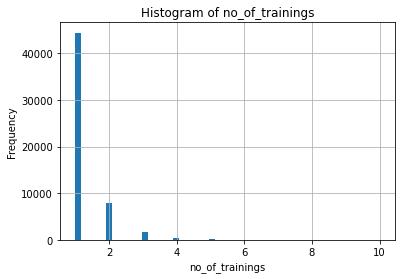

In [649]:
# Visualizing no_of_trainings variable (BEFORE Robust Scaling)

plt.hist(data_scale_mtd_5['no_of_trainings'], bins=50)
plt.xlabel('no_of_trainings')
plt.ylabel('Frequency') 
plt.title('Histogram of no_of_trainings')
plt.grid(True)

plt.show()

In [650]:
# Formula to Robust Scale no_of_trainings variable

data_scale_mtd_5['no_of_trainings'] = (data_scale_mtd_5['no_of_trainings'] - data_scale_mtd_5['no_of_trainings'].median()) / (data_scale_mtd_5['no_of_trainings'].quantile(0.75) - data_scale_mtd_5['no_of_trainings'].quantile(0.25)) 

In [651]:
# Visualizing no_of_trainings variable (AFTER Robust Scaling)

# plt.hist(data_scale_mtd_5['no_of_trainings'], bins=50)
# plt.xlabel('no_of_trainings')
# plt.ylabel('Frequency') 
# plt.title('Histogram of no_of_trainings')
# plt.grid(True)

# plt.show()


# Result: Receiving ValueError due to supplied range of no_of_trainings variable [inf, inf] not being finite

### Robust Scaling for age variable

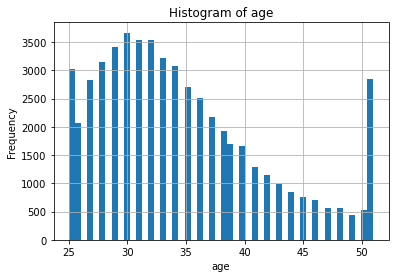

In [652]:
# Visualizing age variable (BEFORE Robust Scaling)

plt.hist(data_scale_mtd_5['age'], bins=50)
plt.xlabel('age')
plt.ylabel('Frequency') 
plt.title('Histogram of age')
plt.grid(True)

plt.show()

In [653]:
# Formula to Robust Scale age variable

data_scale_mtd_5['age'] = (data_scale_mtd_5['age'] - data_scale_mtd_5['age'].median()) / (data_scale_mtd_5['age'].quantile(0.75) - data_scale_mtd_5['age'].quantile(0.25)) 

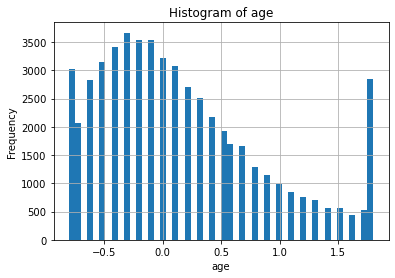

In [654]:
# Visualizing age variable (AFTER Robust Scaling)

plt.hist(data_scale_mtd_5['age'], bins=50)
plt.xlabel('age')
plt.ylabel('Frequency') 
plt.title('Histogram of age')
plt.grid(True)

plt.show()

### Robust Scaling for previous_year_rating variable

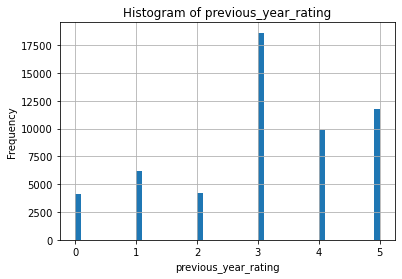

In [655]:
# Visualizing previous_year_rating variable (BEFORE Robust Scaling)

plt.hist(data_scale_mtd_5['previous_year_rating'], bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Frequency') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

In [656]:
# Formula to Robust Scale previous_year_rating variable

data_scale_mtd_5['previous_year_rating'] = (data_scale_mtd_5['previous_year_rating'] - data_scale_mtd_5['previous_year_rating'].median()) / (data_scale_mtd_5['previous_year_rating'].quantile(0.75) - data_scale_mtd_5['previous_year_rating'].quantile(0.25)) 

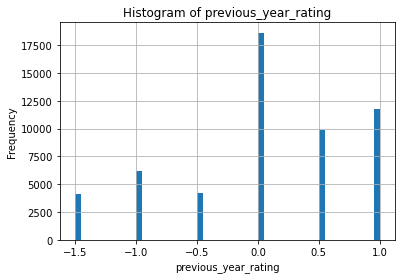

In [657]:
# Visualizing previous_year_rating variable (AFTER Robust Scaling)

plt.hist(data_scale_mtd_5['previous_year_rating'], bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Frequency') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

### Robust Scaling for length_of_service variable

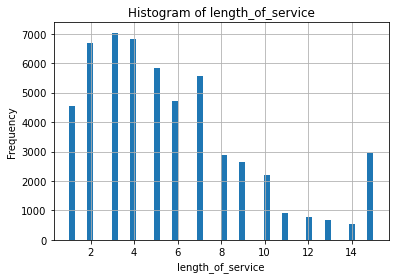

In [658]:
# Visualizing length_of_service variable (BEFORE Robust Scaling)

plt.hist(data_scale_mtd_5['length_of_service'], bins=50)
plt.xlabel('length_of_service')
plt.ylabel('Frequency') 
plt.title('Histogram of length_of_service')
plt.grid(True)

plt.show()

In [659]:
# Formula to Robust Scale length_of_service variable

data_scale_mtd_5['length_of_service'] = (data_scale_mtd_5['length_of_service'] - data_scale_mtd_5['length_of_service'].median()) / (data_scale_mtd_5['length_of_service'].quantile(0.75) - data_scale_mtd_5['length_of_service'].quantile(0.25)) 

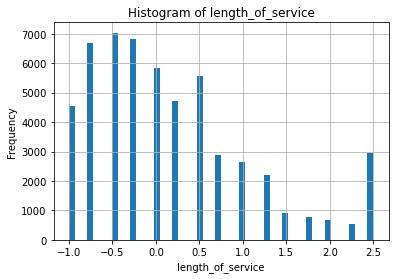

In [660]:
# Visualizing length_of_service variable (AFTER Robust Scaling)

plt.hist(data_scale_mtd_5['length_of_service'], bins=50)
plt.xlabel('length_of_service')
plt.ylabel('Frequency') 
plt.title('Histogram of length_of_service')
plt.grid(True)

plt.show()

### Robust Scaling for KPIs_met >80% variable

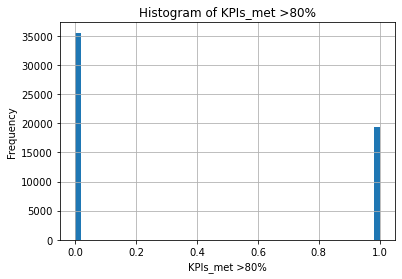

In [661]:
# Visualizing KPIs_met >80% variable (BEFORE Robust Scaling)

plt.hist(data_scale_mtd_5['KPIs_met >80%'], bins=50)
plt.xlabel('KPIs_met >80%')
plt.ylabel('Frequency') 
plt.title('Histogram of KPIs_met >80%')
plt.grid(True)

plt.show()

In [662]:
# Formula to Robust Scale KPIs_met >80% variable

data_scale_mtd_5['KPIs_met >80%'] = (data_scale_mtd_5['KPIs_met >80%'] - data_scale_mtd_5['KPIs_met >80%'].median()) / (data_scale_mtd_5['KPIs_met >80%'].quantile(0.75) - data_scale_mtd_5['KPIs_met >80%'].quantile(0.25)) 

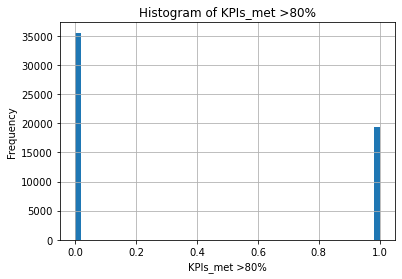

In [663]:
# Visualizing KPIs_met >80% variable (AFTER Robust Scaling)

plt.hist(data_scale_mtd_5['KPIs_met >80%'], bins=50)
plt.xlabel('KPIs_met >80%')
plt.ylabel('Frequency') 
plt.title('Histogram of KPIs_met >80%')
plt.grid(True)

plt.show()

### Robust Scaling for awards_won? variable

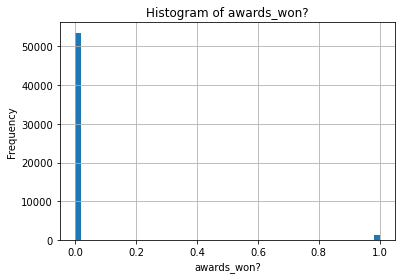

In [664]:
# Visualizing awards_won? variable (BEFORE Robust Scaling)

plt.hist(data_scale_mtd_5['awards_won?'], bins=50)
plt.xlabel('awards_won?')
plt.ylabel('Frequency') 
plt.title('Histogram of awards_won?')
plt.grid(True)

plt.show()

In [665]:
# Formula to Robust Scale awards_won? variable

data_scale_mtd_5['awards_won?'] = (data_scale_mtd_5['awards_won?'] - data_scale_mtd_5['awards_won?'].median()) / (data_scale_mtd_5['awards_won?'].quantile(0.75) - data_scale_mtd_5['awards_won?'].quantile(0.25)) 

In [666]:
# Visualizing awards_won? variable (AFTER Robust Scaling)

# plt.hist(data_scale_mtd_5['awards_won?'], bins=50)
# plt.xlabel('awards_won?')
# plt.ylabel('Frequency') 
# plt.title('Histogram of awards_won?')
# plt.grid(True)

# plt.show()


# Result: Receiving ValueError due to supplied range of awards_won? variable [inf, inf] not being finite

### Robust Scaling for avg_training_score variable

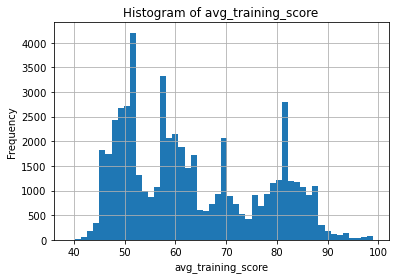

In [667]:
# Visualizing avg_training_score variable (BEFORE Robust Scaling)

plt.hist(data_scale_mtd_5['avg_training_score'], bins=50)
plt.xlabel('avg_training_score')
plt.ylabel('Frequency') 
plt.title('Histogram of avg_training_score')
plt.grid(True)

plt.show()

In [668]:
# Formula to Robust Scale avg_training_score variable

data_scale_mtd_5['avg_training_score'] = (data_scale_mtd_5['avg_training_score'] - data_scale_mtd_5['avg_training_score'].median()) / (data_scale_mtd_5['avg_training_score'].quantile(0.75) - data_scale_mtd_5['avg_training_score'].quantile(0.25)) 

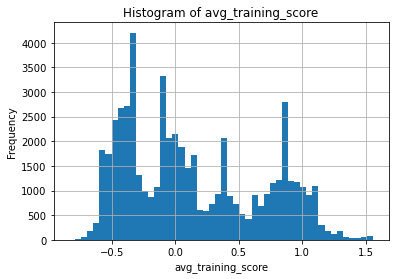

In [669]:
# Visualizing avg_training_score variable (AFTER Robust Scaling)

plt.hist(data_scale_mtd_5['avg_training_score'], bins=50)
plt.xlabel('avg_training_score')
plt.ylabel('Frequency') 
plt.title('Histogram of avg_training_score')
plt.grid(True)

plt.show()

In [670]:
# Describing each variable in the dataset (BEFORE Robust Scaling for all variables)

data.describe()

department        region     education        gender  \
count  54808.000000  54808.000000  54808.000000  54808.000000   
mean       0.085170      0.085170      0.085170      0.085170   
std        0.014672      0.013240      0.008199      0.003101   
min        0.051011      0.077750      0.080096      0.083151   
25%        0.072031      0.077750      0.080096      0.083151   
50%        0.090148      0.077750      0.080096      0.083151   
75%        0.096386      0.080126      0.098559      0.089934   
max        0.107593      0.114188      0.098559      0.089934   

       recruitment_channel  no_of_trainings           age  \
count         54808.000000     54808.000000  54808.000000   
mean              0.085170         1.253011     34.663297   
std               0.005229         0.609264      7.039684   
min               0.083952         1.000000     25.000000   
25%               0.083952         1.000000     29.000000   
50%               0.083952         1.000000     33.000000   
75%               0.085013         1.000000     39.000000   
max               0.120841        10.000000     51.000000   

       previous_year_rating  length_of_service  KPIs_met >80%   awards_won?  \
count          54808.000000       54808.000000   54808.000000  54808.000000   
mean               3.078748           5.688129       0.351974      0.023172   
std                1.496458           3.689403       0.477590      0.150450   
min                0.000000           1.000000       0.000000      0.000000   
25%                2.000000           3.000000       0.000000      0.000000   
50%                3.000000           5.000000       0.000000      0.000000   
75%                4.000000           7.000000       1.000000      0.000000   
max                5.000000          15.000000       1.000000      1.000000   

       avg_training_score   is_promoted  
count        54808.000000  54808.000000  
mean            63.386750      0.085170  
std             13.371559      0.279137  
min             39.000000      0.000000  
25%             51.000000      0.000000  
50%             60.000000      0.000000  
75%             76.000000      0.000000  
max             99.000000      1.000000

In [671]:
# Describing each variable in the dataset (AFTER Robust Scaling for all variables)

data_scale_mtd_5.describe()

C:\Users\mante\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\mante\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


department        region     education        gender  \
count  54808.000000  54808.000000  54808.000000  54808.000000   
mean      -0.204396      3.122045      0.274807      0.297621   
std        0.602441      5.570459      0.444097      0.457216   
min       -1.606980      0.000000      0.000000      0.000000   
25%       -0.743889      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000   
75%        0.256111      1.000000      1.000000      1.000000   
max        0.716295     15.330885      1.000000      1.000000   

       recruitment_channel  no_of_trainings           age  \
count         54808.000000          10430.0  54808.000000   
mean              1.148094              inf      0.166330   
std               4.928779              NaN      0.703968   
min               0.000000              inf     -0.800000   
25%               0.000000              NaN     -0.400000   
50%               0.000000              NaN      0.000000   
75%               1.000000              NaN      0.600000   
max              34.767710              inf      1.800000   

       previous_year_rating  length_of_service  KPIs_met >80%  awards_won?  \
count          54808.000000       54808.000000   54808.000000       1270.0   
mean               0.039374           0.172032       0.351974          inf   
std                0.748229           0.922351       0.477590          NaN   
min               -1.500000          -1.000000       0.000000          inf   
25%               -0.500000          -0.500000       0.000000          NaN   
50%                0.000000           0.000000       0.000000          NaN   
75%                0.500000           0.500000       1.000000          NaN   
max                1.000000           2.500000       1.000000          inf   

       avg_training_score   is_promoted  
count        54808.000000  54808.000000  
mean             0.135470      0.085170  
std              0.534862      0.279137  
min             -0.840000      0.000000  
25%             -0.360000      0.000000  
50%              0.000000      0.000000  
75%              0.640000      0.000000  
max              1.560000      1.000000

### Decision on the Ideal Method to Scale All Variables

After trying all the different above available methods to Scale all variables, I decided to use Method 3: Scaling to the Maximum and Minimum values to scale all variables.

This is because Scaling to the Maximum and Minimum values produces the best result for each variable.

### Final Confirmed Scaling Method on all Variables

In [672]:
# From the decision above, I decided to use Method 3: Scaling to the Maximum and Minimum values to scale all variables.

In [673]:
# department variable

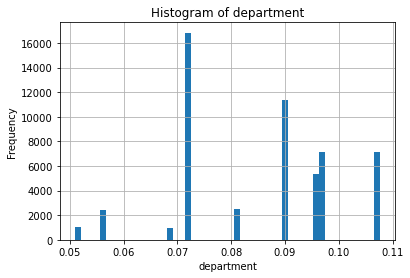

In [674]:
# Visualizing department variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data['department'], bins=50)
plt.xlabel('department')
plt.ylabel('Frequency') 
plt.title('Histogram of department')
plt.grid(True)

plt.show()

In [675]:
# Formula to Minimum & Maximum Scale department variable

data['department'] = (data['department'] - data['department'].min()) / (data['department'].max() - data['department'].min())

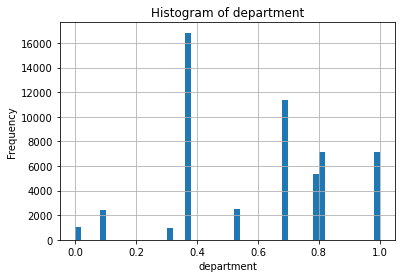

In [676]:
# Visualizing department variable (AFTER Minimum & Maximum Scaling)

plt.hist(data['department'], bins=50)
plt.xlabel('department')
plt.ylabel('Frequency') 
plt.title('Histogram of department')
plt.grid(True)

plt.show()

In [677]:
# region variable

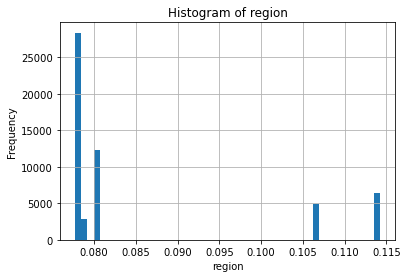

In [678]:
# Visualizing region variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data['region'], bins=50)
plt.xlabel('region')
plt.ylabel('Frequency') 
plt.title('Histogram of region')
plt.grid(True)

plt.show()

In [679]:
# Formula to Minimum & Maximum Scale region variable

data['region'] = (data['region'] - data['region'].min()) / (data['region'].max() - data['region'].min())

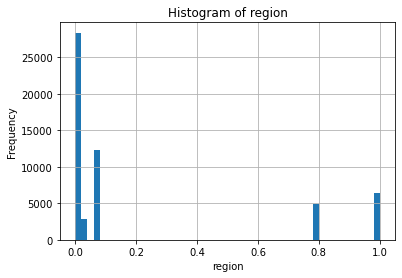

In [680]:
# Visualizing region variable (AFTER Minimum & Maximum Scaling)

plt.hist(data['region'], bins=50)
plt.xlabel('region')
plt.ylabel('Frequency') 
plt.title('Histogram of region')
plt.grid(True)

plt.show()

In [681]:
# education variable

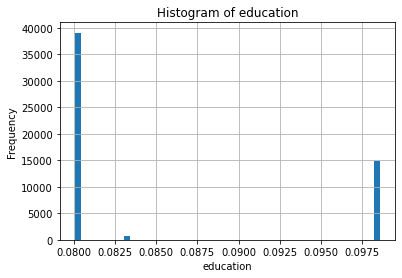

In [682]:
# Visualizing education variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data['education'], bins=50)
plt.xlabel('education')
plt.ylabel('Frequency') 
plt.title('Histogram of education')
plt.grid(True)

plt.show()

In [683]:
# Formula to Minimum & Maximum Scale education variable

data['education'] = (data['education'] - data['education'].min()) / (data['education'].max() - data['education'].min())

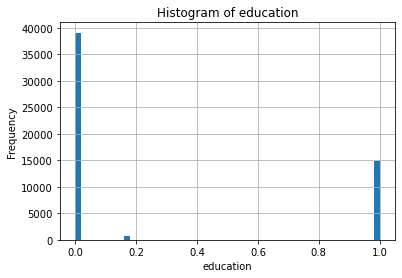

In [684]:
# Visualizing education variable (AFTER Minimum & Maximum Scaling)

plt.hist(data['education'], bins=50)
plt.xlabel('education')
plt.ylabel('Frequency') 
plt.title('Histogram of education')
plt.grid(True)

plt.show()

In [685]:
# gender variable

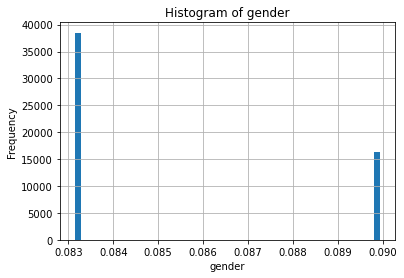

In [686]:
# Visualizing gender variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data['gender'], bins=50)
plt.xlabel('gender')
plt.ylabel('Frequency') 
plt.title('Histogram of gender')
plt.grid(True)

plt.show()

In [687]:
# Formula to Minimum & Maximum Scale gender variable

data['gender'] = (data['gender'] - data['gender'].min()) / (data['gender'].max() - data['gender'].min())

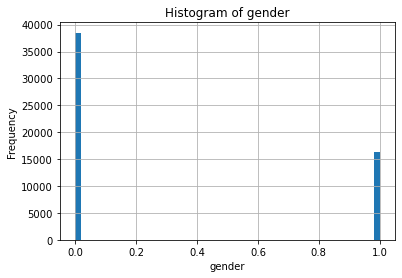

In [688]:
# Visualizing gender variable (AFTER Minimum & Maximum Scaling)

plt.hist(data['gender'], bins=50)
plt.xlabel('gender')
plt.ylabel('Frequency') 
plt.title('Histogram of gender')
plt.grid(True)

plt.show()

In [689]:
# recruitment_channel variable

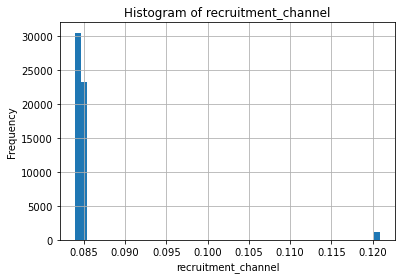

In [690]:
# Visualizing recruitment_channel variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data['recruitment_channel'], bins=50)
plt.xlabel('recruitment_channel')
plt.ylabel('Frequency') 
plt.title('Histogram of recruitment_channel')
plt.grid(True)

plt.show()

In [691]:
# Formula to Minimum & Maximum Scale recruitment_channel variable

data['recruitment_channel'] = (data['recruitment_channel'] - data['recruitment_channel'].min()) / (data['recruitment_channel'].max() - data['recruitment_channel'].min())

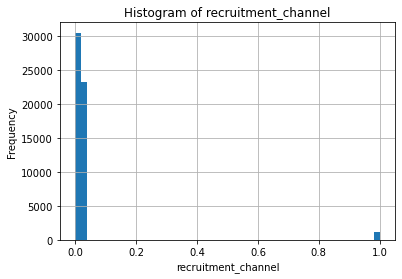

In [692]:
# Visualizing recruitment_channel variable (AFTER Minimum & Maximum Scaling)

plt.hist(data['recruitment_channel'], bins=50)
plt.xlabel('recruitment_channel')
plt.ylabel('Frequency') 
plt.title('Histogram of recruitment_channel')
plt.grid(True)

plt.show()

In [693]:
# no_of_trainings variable

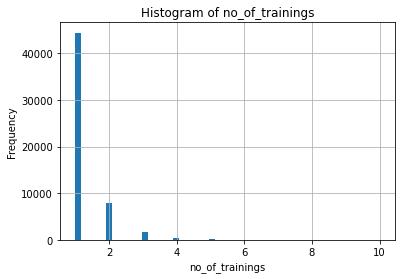

In [694]:
# Visualizing no_of_trainings variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data['no_of_trainings'], bins=50)
plt.xlabel('no_of_trainings')
plt.ylabel('Frequency') 
plt.title('Histogram of no_of_trainings')
plt.grid(True)

plt.show()

In [695]:
# Formula to Minimum & Maximum Scale no_of_trainings variable

data['no_of_trainings'] = (data['no_of_trainings'] - data['no_of_trainings'].min()) / (data['no_of_trainings'].max() - data['no_of_trainings'].min())

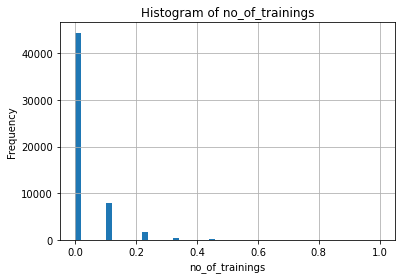

In [696]:
# Visualizing no_of_trainings variable (AFTER Minimum & Maximum Scaling)

plt.hist(data['no_of_trainings'], bins=50)
plt.xlabel('no_of_trainings')
plt.ylabel('Frequency') 
plt.title('Histogram of no_of_trainings')
plt.grid(True)

plt.show()

In [697]:
# age variable

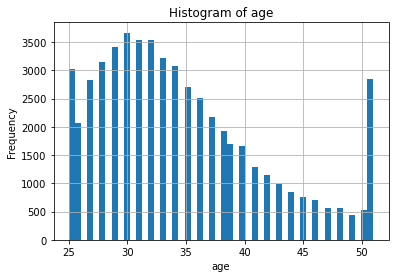

In [698]:
# Visualizing age variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data['age'], bins=50)
plt.xlabel('age')
plt.ylabel('Frequency') 
plt.title('Histogram of age')
plt.grid(True)

plt.show()

In [699]:
# Formula to Minimum & Maximum Scale age variable

data['age'] = (data['age'] - data['age'].min()) / (data['age'].max() - data['age'].min())

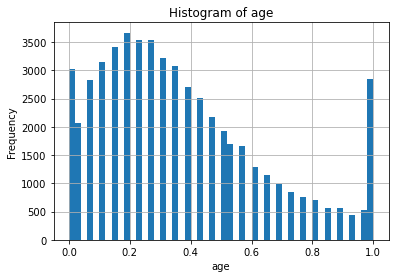

In [700]:
# Visualizing age variable (AFTER Minimum & Maximum Scaling)

plt.hist(data['age'], bins=50)
plt.xlabel('age')
plt.ylabel('Frequency') 
plt.title('Histogram of age')
plt.grid(True)

plt.show()

In [701]:
# previous_year_rating variable

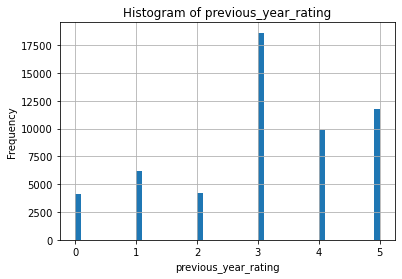

In [702]:
# Visualizing previous_year_rating variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data['previous_year_rating'], bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Frequency') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

In [703]:
# Formula to Minimum & Maximum Scale previous_year_rating variable

data['previous_year_rating'] = (data['previous_year_rating'] - data['previous_year_rating'].min()) / (data['previous_year_rating'].max() - data['previous_year_rating'].min())

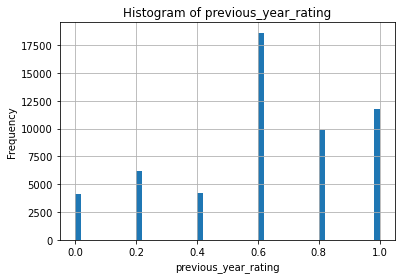

In [704]:
# Visualizing previous_year_rating variable (AFTER Minimum & Maximum Scaling)

plt.hist(data['previous_year_rating'], bins=50)
plt.xlabel('previous_year_rating')
plt.ylabel('Frequency') 
plt.title('Histogram of previous_year_rating')
plt.grid(True)

plt.show()

In [705]:
# length_of_service variable

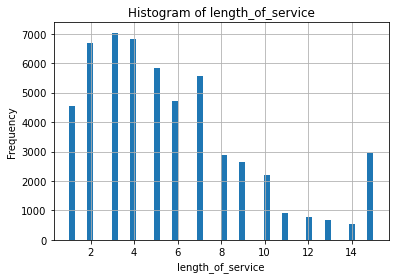

In [706]:
# Visualizing length_of_service variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data['length_of_service'], bins=50)
plt.xlabel('length_of_service')
plt.ylabel('Frequency') 
plt.title('Histogram of length_of_service')
plt.grid(True)

plt.show()

In [707]:
# Formula to Minimum & Maximum Scale length_of_service variable

data['length_of_service'] = (data['length_of_service'] - data['length_of_service'].min()) / (data['length_of_service'].max() - data['length_of_service'].min())

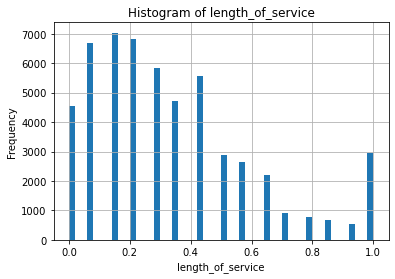

In [708]:
# Visualizing length_of_service variable (AFTER Minimum & Maximum Scaling)

plt.hist(data['length_of_service'], bins=50)
plt.xlabel('length_of_service')
plt.ylabel('Frequency') 
plt.title('Histogram of length_of_service')
plt.grid(True)

plt.show()

In [709]:
# KPIs_met >80% variable

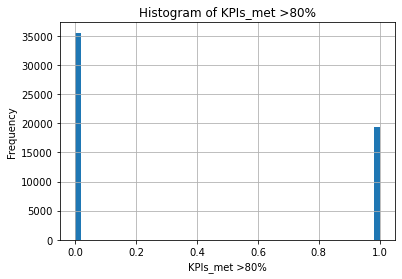

In [710]:
# Visualizing KPIs_met >80% variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data['KPIs_met >80%'], bins=50)
plt.xlabel('KPIs_met >80%')
plt.ylabel('Frequency') 
plt.title('Histogram of KPIs_met >80%')
plt.grid(True)

plt.show()

In [711]:
# Formula to Minimum & Maximum Scale KPIs_met >80% variable

data['KPIs_met >80%'] = (data['KPIs_met >80%'] - data['KPIs_met >80%'].min()) / (data['KPIs_met >80%'].max() - data['KPIs_met >80%'].min())

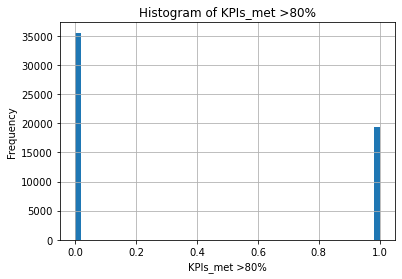

In [712]:
# Visualizing KPIs_met >80% variable (AFTER Minimum & Maximum Scaling)

plt.hist(data['KPIs_met >80%'], bins=50)
plt.xlabel('KPIs_met >80%')
plt.ylabel('Frequency') 
plt.title('Histogram of KPIs_met >80%')
plt.grid(True)

plt.show()

In [713]:
# awards_won? variable

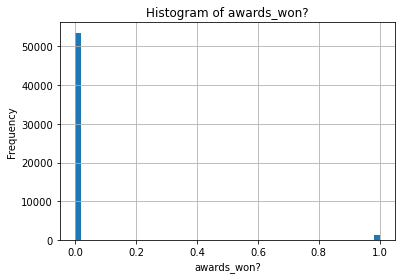

In [714]:
# Visualizing awards_won? variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data['awards_won?'], bins=50)
plt.xlabel('awards_won?')
plt.ylabel('Frequency') 
plt.title('Histogram of awards_won?')
plt.grid(True)

plt.show()

In [715]:
# Formula to Minimum & Maximum Scale awards_won? variable

data['awards_won?'] = (data['awards_won?'] - data['awards_won?'].min()) / (data['awards_won?'].max() - data['awards_won?'].min())

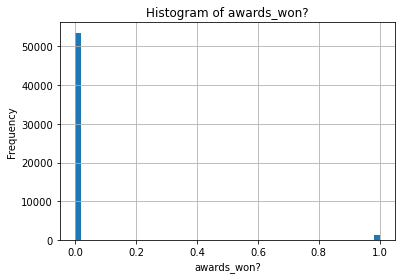

In [716]:
# Visualizing awards_won? variable (AFTER Minimum & Maximum Scaling)

plt.hist(data['awards_won?'], bins=50)
plt.xlabel('awards_won?')
plt.ylabel('Frequency') 
plt.title('Histogram of awards_won?')
plt.grid(True)

plt.show()

In [717]:
# avg_training_score variable

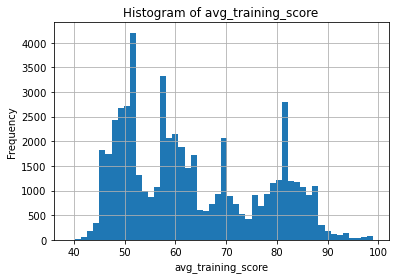

In [718]:
# Visualizing avg_training_score variable (BEFORE Minimum & Maximum Scaling)

plt.hist(data['avg_training_score'], bins=50)
plt.xlabel('avg_training_score')
plt.ylabel('Frequency') 
plt.title('Histogram of avg_training_score')
plt.grid(True)

plt.show()

In [719]:
# Formula to Minimum & Maximum Scale avg_training_score variable

data['avg_training_score'] = (data['avg_training_score'] - data['avg_training_score'].min()) / (data['avg_training_score'].max() - data['avg_training_score'].min())

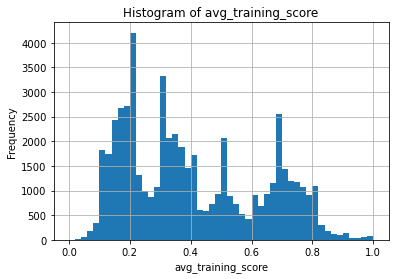

In [720]:
# Visualizing avg_training_score variable (AFTER Minimum & Maximum Scaling)

plt.hist(data['avg_training_score'], bins=50)
plt.xlabel('avg_training_score')
plt.ylabel('Frequency') 
plt.title('Histogram of avg_training_score')
plt.grid(True)

plt.show()

In [721]:
# Describing each variable in the dataset (AFTER Minimum & Maximum Scaling for all variables)

data.describe()

department        region     education        gender  \
count  54808.000000  54808.000000  54808.000000  54808.000000   
mean       0.603710      0.203644      0.274807      0.297621   
std        0.259307      0.363349      0.444097      0.457216   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.371498      0.000000      0.000000      0.000000   
50%        0.691687      0.000000      0.000000      0.000000   
75%        0.801925      0.065228      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000   

       recruitment_channel  no_of_trainings           age  \
count         54808.000000     54808.000000  54808.000000   
mean              0.033022         0.028112      0.371665   
std               0.141763         0.067696      0.270757   
min               0.000000         0.000000      0.000000   
25%               0.000000         0.000000      0.153846   
50%               0.000000         0.000000      0.307692   
75%               0.028762         0.000000      0.538462   
max               1.000000         1.000000      1.000000   

       previous_year_rating  length_of_service  KPIs_met >80%   awards_won?  \
count          54808.000000       54808.000000   54808.000000  54808.000000   
mean               0.615750           0.334866       0.351974      0.023172   
std                0.299292           0.263529       0.477590      0.150450   
min                0.000000           0.000000       0.000000      0.000000   
25%                0.400000           0.142857       0.000000      0.000000   
50%                0.600000           0.285714       0.000000      0.000000   
75%                0.800000           0.428571       1.000000      0.000000   
max                1.000000           1.000000       1.000000      1.000000   

       avg_training_score   is_promoted  
count        54808.000000  54808.000000  
mean             0.406446      0.085170  
std              0.222859      0.279137  
min              0.000000      0.000000  
25%              0.200000      0.000000  
50%              0.350000      0.000000  
75%              0.616667      0.000000  
max              1.000000      1.000000

### 1.3 Correlation Analysis

In Correlation Analysis, I will investigate the relationships between different features/variables in my Final Cleansed and Transformed Dataset.

In [722]:
# Displaying the first 5 rows of the Final Cleansed and Transformed Dataset
data.head()

department    region  education  gender  recruitment_channel  \
0    0.371498  0.790265        1.0     1.0             0.028762   
1    0.691687  1.000000        0.0     0.0             0.000000   
2    0.371498  0.000000        0.0     0.0             0.028762   
3    0.371498  0.000000        0.0     0.0             0.000000   
4    1.000000  0.000000        0.0     0.0             0.000000   

   no_of_trainings       age  previous_year_rating  length_of_service  \
0         0.000000  0.384615                   1.0           0.500000   
1         0.000000  0.192308                   1.0           0.214286   
2         0.000000  0.346154                   0.6           0.428571   
3         0.111111  0.538462                   0.2           0.642857   
4         0.000000  0.769231                   0.6           0.071429   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0            1.0          0.0            0.166667            0  
1            0.0          0.0            0.350000            0  
2            0.0          0.0            0.183333            0  
3            0.0          0.0            0.183333            0  
4            0.0          0.0            0.566667            0

#### Basic Summary of the Final Cleansed and Transformed Dataset

In [723]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(data.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(data.size)   

(54808, 13)
712504


#### In-depth Overview of the Final Cleansed and Transformed Dataset

In [724]:
# Viewing the number of items and data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  float64
 1   region                54808 non-null  float64
 2   education             54808 non-null  float64
 3   gender                54808 non-null  float64
 4   recruitment_channel   54808 non-null  float64
 5   no_of_trainings       54808 non-null  float64
 6   age                   54808 non-null  float64
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  float64
 9   KPIs_met >80%         54808 non-null  float64
 10  awards_won?           54808 non-null  float64
 11  avg_training_score    54808 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 5.4 MB


In [725]:
# Showing the correlations between the variables
data.corr()

department    region  education    gender  \
department              1.000000  0.000201   0.040192  0.132775   
region                  0.000201  1.000000   0.027138  0.003517   
education               0.040192  0.027138   1.000000  0.030947   
gender                  0.132775  0.003517   0.030947  1.000000   
recruitment_channel     0.029611  0.081157  -0.027602 -0.007835   
no_of_trainings         0.036370  0.087123  -0.033924 -0.084501   
age                     0.022796 -0.062380   0.369362  0.012201   
previous_year_rating    0.051951  0.002013   0.100475  0.025053   
length_of_service       0.030184 -0.048210   0.257803  0.019948   
KPIs_met >80%           0.072007  0.044323   0.011041  0.037400   
awards_won?             0.010100  0.001940  -0.000991 -0.002381   
avg_training_score      0.730475  0.062507   0.031577  0.024494   
is_promoted             0.052563  0.047431   0.029374  0.011109   

                      recruitment_channel  no_of_trainings       age  \
department                       0.029611         0.036370  0.022796   
region                           0.081157         0.087123 -0.062380   
education                       -0.027602        -0.033924  0.369362   
gender                          -0.007835        -0.084501  0.012201   
recruitment_channel              1.000000        -0.014556 -0.043791   
no_of_trainings                 -0.014556         1.000000 -0.084175   
age                             -0.043791        -0.084175  1.000000   
previous_year_rating             0.046046        -0.064119  0.181160   
length_of_service               -0.030192        -0.059152  0.654749   
KPIs_met >80%                    0.047262        -0.045576 -0.025304   
awards_won?                      0.002435        -0.007628 -0.008276   
avg_training_score               0.030045         0.042517 -0.053286   
is_promoted                      0.018734        -0.024896 -0.017013   

                      previous_year_rating  length_of_service  KPIs_met >80%  \
department                        0.051951           0.030184       0.072007   
region                            0.002013          -0.048210       0.044323   
education                         0.100475           0.257803       0.011041   
gender                            0.025053           0.019948       0.037400   
recruitment_channel               0.046046          -0.030192       0.047262   
no_of_trainings                  -0.064119          -0.059152      -0.045576   
age                               0.181160           0.654749      -0.025304   
previous_year_rating              1.000000           0.213017       0.274593   
length_of_service                 0.213017           1.000000      -0.078799   
KPIs_met >80%                     0.274593          -0.078799       1.000000   
awards_won?                       0.021475          -0.040626       0.097000   
avg_training_score                0.058718          -0.040432       0.078391   
is_promoted                       0.125991          -0.008667       0.221582   

                      awards_won?  avg_training_score  is_promoted  
department               0.010100            0.730475     0.052563  
region                   0.001940            0.062507     0.047431  
education               -0.000991            0.031577     0.029374  
gender                  -0.002381            0.024494     0.011109  
recruitment_channel      0.002435            0.030045     0.018734  
no_of_trainings         -0.007628            0.042517    -0.024896  
age                     -0.008276           -0.053286    -0.017013  
previous_year_rating     0.021475            0.058718     0.125991  
length_of_service       -0.040626           -0.040432    -0.008667  
KPIs_met >80%            0.097000            0.078391     0.221582  
awards_won?              1.000000            0.072138     0.195871  
avg_training_score       0.072138            1.000000     0.181147  
is_promoted              0.195871            0.181147   

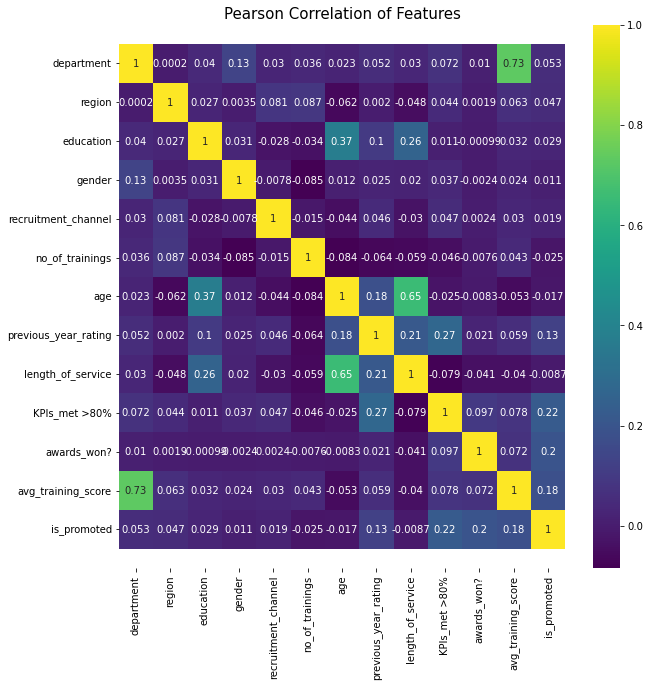

In [726]:
# Heatmap: the correlation between any two features/variables
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(data.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

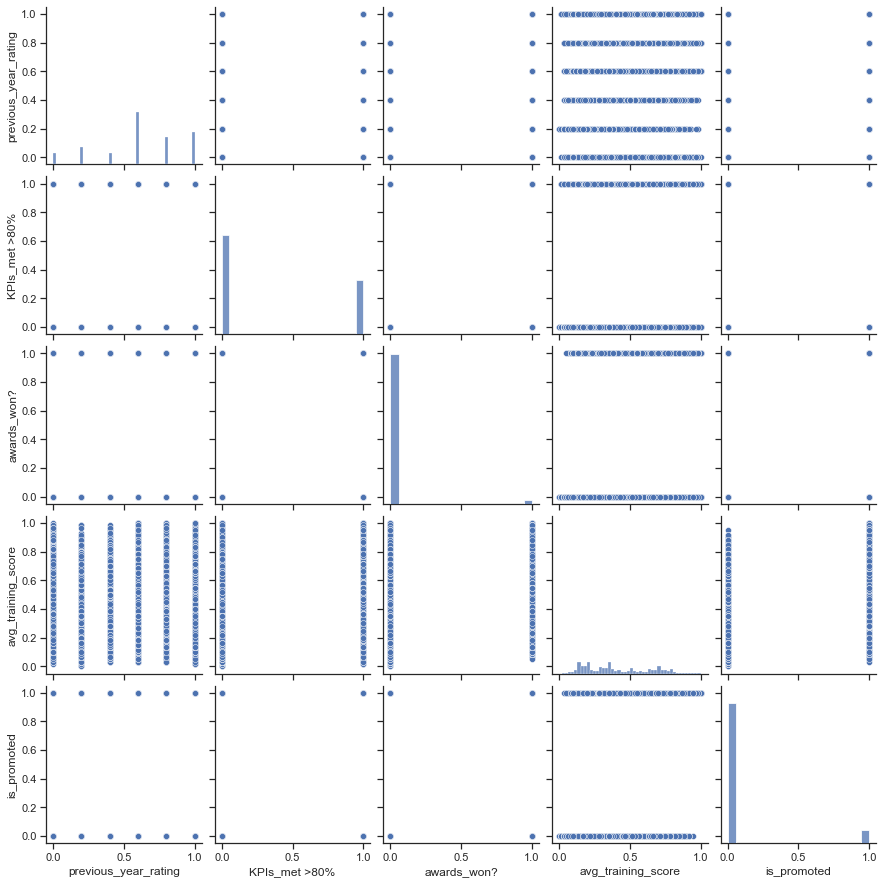

In [727]:
# Scatter matrix
sns.set(style="ticks")
sns.pairplot(data[['previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']])

### Conclusion - Which features / variables are likely helpful to make predictions for this dataset's Classification Problem (to predict whether an employee will be promoted or not) ?

After investigating the relationships between different features/variables, there are 4 variables that are likely helpful to make predictions for this dataset's Classification Problem - to predict whether an employee will be promoted or not.

The 4 variables that are likely helpful to make predictions for this dataset's Classification Problem are:

1. previous_year_rating


2. KPIs_met >80%


3. awards_won?


4. avg_training_score


These 4 variables that are likely helpful to make predictions for this dataset's Classification Problem because according to the heatmap above, these 4 variables each have a higher correlation of 0.1 and above with the target variable - is_promoted than each of the other variables' correlation of around 0.01 to 0.05 with the target variable - is_promoted.

### Did I create any new features / variables for this dataset's Classification Problem (to predict whether an employee will be promoted or not)

For me, after taking a look at all the variables in this dataset, I feel that there is no possible new variable that I could think of to create from the existing variables. Therefore, I did not create any new features / variables for this dataset's Classification Problem.

### Did I drop any features/variables?

Yes, I did drop a variable which is the employee_id variable. The reason for dropping employee_id variable was explained earlier in Section 1.2.2 Feature Engineering and I would repeat the explanation for ease of reference as stated below.

#### Dropping employee_id variable

I decided to drop employee_id variable because...

1. I found out that there are too many unique values in employee_id Column - employee_id variable has very high cardinality with 54808 unique categories. This would result in algorithms being prone to overfitting or being unable to score an observation. 


2. In addition, according to the data dictionary of hr_data.csv provided in the Machine Learning Assignment 1 Brief, employee_id variable contains all the unique ID for each employee. With that, the sole purpose of employee_id variable is only to help uniquely identify each row of employee record in hr_data.csv. In relation to this Machine Learning Assignment 1 dataset's classification problem, employee_id is just an irrelevant feature. Thus, I do not think that the employee_id variable would be of any help to predict whether an employee will be promoted or not. (i.e. I think that there would not be any relationship or there may be close to 0 relationship between employee_id variable and the target variable - is_promoted variable)

### 1.4 Export the data

In [728]:
data.to_csv('hr_data_new.csv', index=False)

## 2. Airbnb

### 2.1 Load and Explore the data

In [729]:
# loading the airbnb dataset into a dataframe variable named "airbnb_data"
airbnb_data = pd.read_csv('listings.csv')

In [730]:
# Displaying first 5 rows
airbnb_data.head()

id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               9               353  
4                               9               355

In [731]:
# Viewing last 5 rows
airbnb_data.tail()

id                                               name    host_id  \
7902  38105126  Loft 2 pax near Haw Par / Pasir Panjang. Free ...  278109833   
7903  38108273                         3bedroom luxury at Orchard  238891646   
7904  38109336    [ Farrer Park ] New City Fringe CBD Mins to MRT  281448565   
7905  38110493          Cheap Master Room in Central of Singapore  243835202   
7906  38112762  Amazing room with private bathroom walk to Orc...   28788520   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
7902     Belle      Central Region    Queenstown   1.27973  103.78751   
7903      Neha      Central Region       Tanglin   1.29269  103.82623   
7904     Mindy      Central Region       Kallang   1.31286  103.85996   
7905     Huang      Central Region  River Valley   1.29543  103.83801   
7906   Terence      Central Region  River Valley   1.29672  103.83325   

            room_type  price  minimum_nights  number_of_reviews last_review  \
7902  Entire home/apt    100               3                  0         NaN   
7903  Entire home/apt    550               6                  0         NaN   
7904     Private room     58              30                  0         NaN   
7905     Private room     56              14                  0         NaN   
7906     Private room     65              90                  0         NaN   

      reviews_per_month  calculated_host_listings_count  availability_365  
7902                NaN                              31                61  
7903                NaN                              34               365  
7904                NaN                               3               173  
7905                NaN                               2                30  
7906                NaN                               7               365

#### Basic Summary of Dataset

In [732]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(airbnb_data.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(airbnb_data.size)   

(7907, 16)
126512


#### In-depth Overview of Dataset

In [733]:
# Viewing the number of items and data type of each column
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

### Data Preprocessing

In [734]:
# It is a good practice to create a copy of the dataframe
airbnb_data_bkup = airbnb_data.copy()

### Identifying Variable Types 

#### Checking Data Types of Different Columns

In [735]:
# print variable types
print(airbnb_data.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [736]:
# Check the number of variables storing a partcular data type
airbnb_data.dtypes.value_counts()

int64      7
object     6
float64    3
dtype: int64

### Quantifying Missing Data / Null Values

Missing data occurs when no data is stored for certain observations within a variable. In other words, missing data is the absence of values, and is a common occurrence in most data sets.

I will be quantifying and visualizing missing information in all variables.

In [737]:
# Check for null values in each column
airbnb_data.isnull().any()

id                                False
name                               True
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [738]:
# Check the number of null values in airbnb_data
airbnb_data.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

Text(0.5, 1.0, 'Quantifying missing data')

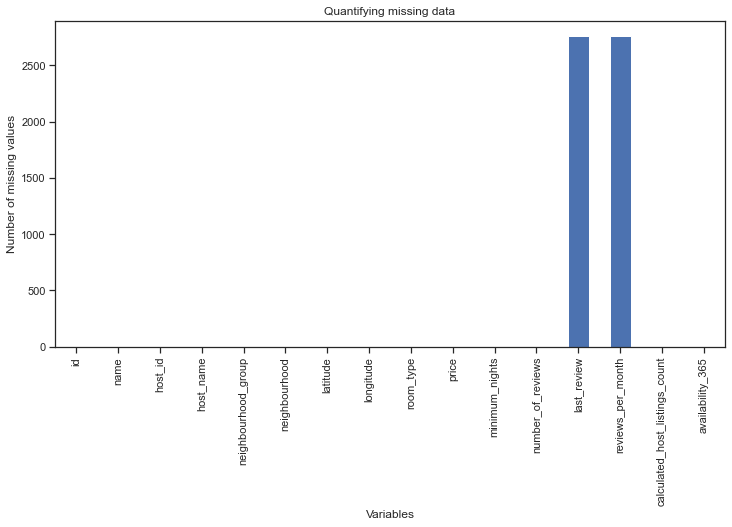

In [739]:
# Plotting the number of missing data utilising
# pandas plot.bar(), and add labels with matplotlib methods 

airbnb_data.isnull().sum().plot.bar(figsize=(12,6))
plt.ylabel('Number of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

### Determining Cardinality

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [740]:
# Viewing the number of unique values in each variable
airbnb_data.nunique()

# Note: nunique() ignores missing data by default

id                                7907
name                              7457
host_id                           2705
host_name                         1833
neighbourhood_group                  5
neighbourhood                       43
latitude                          4885
longitude                         5414
room_type                            3
price                              374
minimum_nights                      73
number_of_reviews                  208
last_review                       1001
reviews_per_month                  527
calculated_host_listings_count      55
availability_365                   359
dtype: int64

In [741]:
# To consider missing values as an additional category,
# we need to explicitly mention so, 
# passing the argument dropna=False

airbnb_data.nunique(dropna=False)

id                                7907
name                              7458
host_id                           2705
host_name                         1833
neighbourhood_group                  5
neighbourhood                       43
latitude                          4885
longitude                         5414
room_type                            3
price                              374
minimum_nights                      73
number_of_reviews                  208
last_review                       1002
reviews_per_month                  528
calculated_host_listings_count      55
availability_365                   359
dtype: int64

### Inspecting Unique Categories in Each Variable

In [742]:
# For Variable 'id'
airbnb_data['id'].sort_values().unique()

array([   49091,    50646,    56334, ..., 38109336, 38110493, 38112762],
      dtype=int64)

In [743]:
# For Variable 'name'
airbnb_data['name'].sort_values().unique()

array(['!! CozyRoom@City Center,Little India,FarrerParkMRT',
       '!!!2BR ART Apartment near shopping mall Katong ON5',
       '!!!2BR Amazing Apartment Phenthouse @ Katong ON7', ...,
       'ｵｰﾁｬｰﾄﾞﾛｰﾄﾞｴﾘｱ!ﾌｨｯﾄﾈｽ設備!無料wifi!ｽﾀｲﾘｯｼｭなｺﾝﾄﾞﾐﾆｱﾑ',
       'ｼﾃｨｰに近くて閑静な住宅街｡ いつもｷﾚｲでﾋﾟｯｶﾋﾟｶ｡', nan], dtype=object)

In [744]:
# For Variable 'host_id'
airbnb_data['host_id'].sort_values().unique()

array([    23666,     59498,    165209, ..., 288249975, 288546201,
       288567551], dtype=int64)

In [745]:
# For Variable 'host_name'
airbnb_data['host_name'].sort_values().unique()

array(['(Email hidden by Airbnb)', '23 Lees', '5footway', ..., '진', '현재',
       'ｼﾝ'], dtype=object)

In [746]:
# For Variable 'neighbourhood_group'
airbnb_data['neighbourhood_group'].sort_values().unique()

array(['Central Region', 'East Region', 'North Region',
       'North-East Region', 'West Region'], dtype=object)

In [747]:
# For Variable 'neighbourhood'
airbnb_data['neighbourhood'].sort_values().unique()

array(['Ang Mo Kio', 'Bedok', 'Bishan', 'Bukit Batok', 'Bukit Merah',
       'Bukit Panjang', 'Bukit Timah', 'Central Water Catchment',
       'Choa Chu Kang', 'Clementi', 'Downtown Core', 'Geylang', 'Hougang',
       'Jurong East', 'Jurong West', 'Kallang', 'Lim Chu Kang', 'Mandai',
       'Marina South', 'Marine Parade', 'Museum', 'Newton', 'Novena',
       'Orchard', 'Outram', 'Pasir Ris', 'Punggol', 'Queenstown',
       'River Valley', 'Rochor', 'Sembawang', 'Sengkang', 'Serangoon',
       'Singapore River', 'Southern Islands', 'Sungei Kadut', 'Tampines',
       'Tanglin', 'Toa Payoh', 'Tuas', 'Western Water Catchment',
       'Woodlands', 'Yishun'], dtype=object)

In [748]:
# For Variable 'latitude'
airbnb_data['latitude'].sort_values().unique()

array([1.24387, 1.24391, 1.24526, ..., 1.45301, 1.45328, 1.45459])

In [749]:
# For Variable 'longitude'
airbnb_data['longitude'].sort_values().unique()

array([103.64656, 103.66547, 103.68162, ..., 103.97171, 103.97292,
       103.97342])

In [750]:
# For Variable 'room_type'
airbnb_data['room_type'].sort_values().unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [751]:
# For Variable 'price'
airbnb_data['price'].sort_values().unique()

array([    0,    14,    15,    18,    19,    21,    22,    24,    25,
          26,    28,    29,    31,    32,    33,    35,    36,    37,
          39,    40,    42,    43,    44,    46,    47,    49,    50,
          51,    53,    54,    56,    57,    58,    60,    61,    62,
          64,    65,    67,    68,    69,    71,    72,    74,    75,
          76,    78,    79,    81,    82,    83,    85,    86,    87,
          89,    90,    92,    93,    94,    96,    97,    99,   100,
         101,   103,   104,   106,   107,   108,   110,   111,   112,
         114,   115,   117,   118,   119,   121,   122,   124,   125,
         126,   128,   129,   131,   132,   133,   135,   136,   137,
         139,   140,   142,   143,   144,   146,   147,   149,   150,
         151,   153,   154,   156,   157,   158,   160,   161,   162,
         164,   165,   167,   168,   169,   171,   172,   174,   175,
         176,   178,   179,   181,   182,   183,   185,   186,   187,
         189,   190,

In [752]:
# For Variable 'minimum_nights'
airbnb_data['minimum_nights'].sort_values().unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         24,   25,   26,   27,   28,   29,   30,   31,   32,   35,   40,
         45,   48,   50,   55,   59,   60,   62,   65,   70,   75,   80,
         84,   85,   88,   89,   90,   91,   92,   93,   96,  100,  108,
        120,  150,  180,  181,  183,  185,  186,  188,  190,  200,  210,
        240,  356,  360,  365,  500,  700, 1000], dtype=int64)

In [753]:
# For Variable 'number_of_reviews'
airbnb_data['number_of_reviews'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 123, 124, 125, 126, 127, 129, 130, 131, 133,
       134, 135, 136, 137, 138, 141, 142, 144, 145, 146, 148, 149, 150,
       151, 152, 153, 154, 157, 158, 160, 161, 162, 163, 165, 166, 168,
       169, 170, 172, 173, 174, 175, 177, 179, 181, 184, 185, 186, 187,
       188, 189, 191, 192, 193, 195, 197, 198, 199, 201, 202, 20

In [754]:
# For Variable 'last_review'
airbnb_data['last_review'].sort_values().unique()

array(['2013-10-21', '2014-02-22', '2014-03-08', ..., '2019-08-26',
       '2019-08-27', nan], dtype=object)

In [755]:
# For Variable 'reviews_per_month'
airbnb_data['reviews_per_month'].sort_values().unique()

array([1.000e-02, 2.000e-02, 3.000e-02, 4.000e-02, 5.000e-02, 6.000e-02,
       7.000e-02, 8.000e-02, 9.000e-02, 1.000e-01, 1.100e-01, 1.200e-01,
       1.300e-01, 1.400e-01, 1.500e-01, 1.600e-01, 1.700e-01, 1.800e-01,
       1.900e-01, 2.000e-01, 2.100e-01, 2.200e-01, 2.300e-01, 2.400e-01,
       2.500e-01, 2.600e-01, 2.700e-01, 2.800e-01, 2.900e-01, 3.000e-01,
       3.100e-01, 3.200e-01, 3.300e-01, 3.400e-01, 3.500e-01, 3.600e-01,
       3.700e-01, 3.800e-01, 3.900e-01, 4.000e-01, 4.100e-01, 4.200e-01,
       4.300e-01, 4.400e-01, 4.500e-01, 4.600e-01, 4.700e-01, 4.800e-01,
       4.900e-01, 5.000e-01, 5.100e-01, 5.200e-01, 5.300e-01, 5.400e-01,
       5.500e-01, 5.600e-01, 5.700e-01, 5.800e-01, 5.900e-01, 6.000e-01,
       6.100e-01, 6.200e-01, 6.300e-01, 6.400e-01, 6.500e-01, 6.600e-01,
       6.700e-01, 6.800e-01, 6.900e-01, 7.000e-01, 7.100e-01, 7.200e-01,
       7.300e-01, 7.400e-01, 7.500e-01, 7.600e-01, 7.700e-01, 7.800e-01,
       7.900e-01, 8.000e-01, 8.100e-01, 8.200e-01, 

In [756]:
# For Variable 'calculated_host_listings_count'
airbnb_data['calculated_host_listings_count'].sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  30,  31,  32,  34,  37,  38,  40,  41,  43,  45,  48,
        59,  64,  67,  76,  78,  79,  83,  84, 109, 112, 113, 114, 141,
       157, 203, 274], dtype=int64)

In [757]:
# For Variable 'availability_365'
airbnb_data['availability_365'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

### Types of Data in Dataset

### Numerical Data

In [758]:
# Selecting Numerical Data from 'airbnb_data', then display first 5 rows
airbnb_data_num = airbnb_data.select_dtypes(['int64', 'float64']).copy()
airbnb_data_num.head()

id  host_id  latitude  longitude  price  minimum_nights  \
0  49091   266763   1.44255  103.79580     83             180   
1  50646   227796   1.33235  103.78521     81              90   
2  56334   266763   1.44246  103.79667     69               6   
3  71609   367042   1.34541  103.95712    206               1   
4  71896   367042   1.34567  103.95963     94               1   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  1               0.01                               2   
1                 18               0.28                               1   
2                 20               0.20                               2   
3                 14               0.15                               9   
4                 22               0.22                               9   

   availability_365  
0               365  
1               365  
2               365  
3               353  
4               355

In [759]:
# Viewing the five-number summary of numerical variables
airbnb_data_num.describe()

id       host_id     latitude    longitude         price  \
count  7.907000e+03  7.907000e+03  7907.000000  7907.000000   7907.000000   
mean   2.338862e+07  9.114481e+07     1.314192   103.848787    169.332996   
std    1.016416e+07  8.190910e+07     0.030577     0.043675    340.187599   
min    4.909100e+04  2.366600e+04     1.243870   103.646560      0.000000   
25%    1.582180e+07  2.305808e+07     1.295795   103.835825     65.000000   
50%    2.470627e+07  6.344891e+07     1.311030   103.849410    124.000000   
75%    3.234850e+07  1.553811e+08     1.322110   103.872535    199.000000   
max    3.811276e+07  2.885676e+08     1.454590   103.973420  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     7907.000000        7907.000000        5149.000000   
mean        17.510054          12.807386           1.043669   
std         42.094616          29.707746           1.285851   
min          1.000000           0.000000           0.010000   
25%          1.000000           0.000000           0.180000   
50%          3.000000           2.000000           0.550000   
75%         10.000000          10.000000           1.370000   
max       1000.000000         323.000000          13.000000   

       calculated_host_listings_count  availability_365  
count                     7907.000000       7907.000000  
mean                        40.607689        208.726318  
std                         65.135253        146.120034  
min                          1.000000          0.000000  
25%                          2.000000         54.000000  
50%                          9.000000        260.000000  
75%                         48.000000        355.000000  
max                        274.000000        365.000000

#### Distinguishing Numerical Variable Distributions

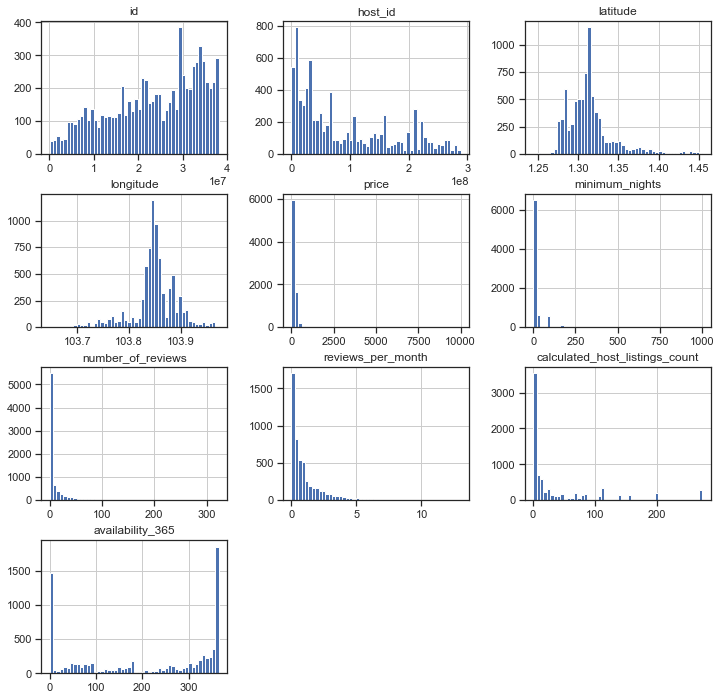

In [760]:
airbnb_data_num.hist(bins=50, figsize=(12, 12))
plt.show()

#### Visualizing each Numerical Variable

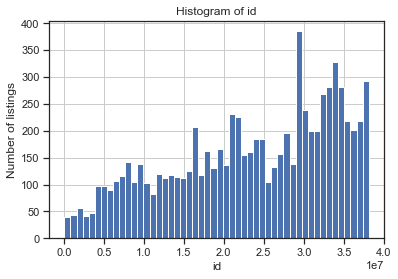

In [761]:
# id variable

plt.hist(airbnb_data_num['id'].dropna(), bins=50)
plt.xlabel('id')
plt.ylabel('Number of listings') 
plt.title('Histogram of id')
plt.grid(True)

plt.show()

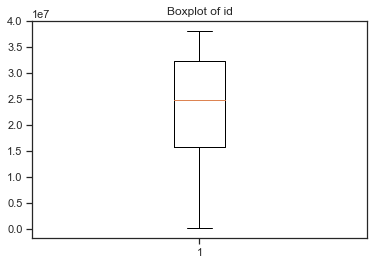

In [762]:
plt.boxplot(airbnb_data_num['id'].dropna())
plt.title('Boxplot of id')

plt.show()

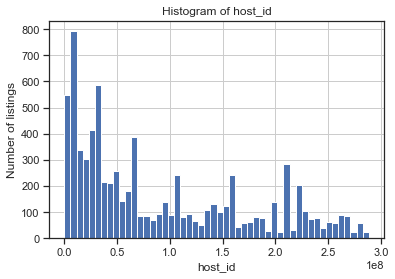

In [763]:
# host_id variable

plt.hist(airbnb_data_num['host_id'].dropna(), bins=50)
plt.xlabel('host_id')
plt.ylabel('Number of listings') 
plt.title('Histogram of host_id')
plt.grid(True)

plt.show()

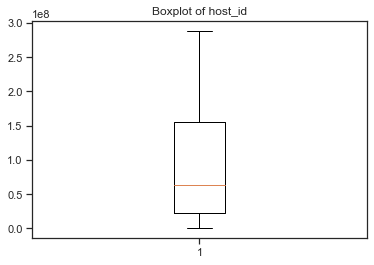

In [764]:
plt.boxplot(airbnb_data_num['host_id'].dropna())
plt.title('Boxplot of host_id')

plt.show()

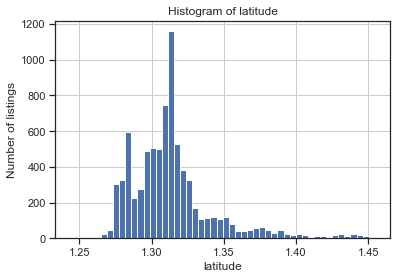

In [765]:
# latitude variable

plt.hist(airbnb_data_num['latitude'].dropna(), bins=50)
plt.xlabel('latitude')
plt.ylabel('Number of listings') 
plt.title('Histogram of latitude')
plt.grid(True)

plt.show()

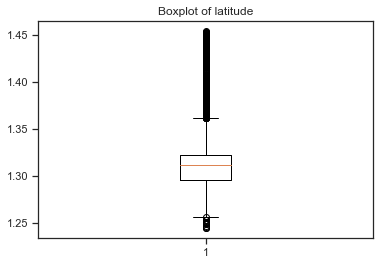

In [766]:
plt.boxplot(airbnb_data_num['latitude'].dropna())
plt.title('Boxplot of latitude')

plt.show()

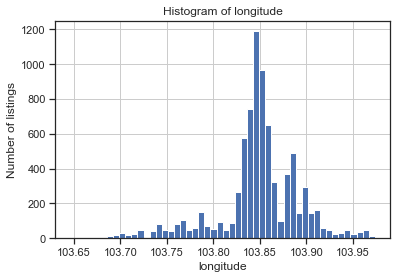

In [767]:
# longitude variable

plt.hist(airbnb_data_num['longitude'].dropna(), bins=50)
plt.xlabel('longitude')
plt.ylabel('Number of listings') 
plt.title('Histogram of longitude')
plt.grid(True)

plt.show()

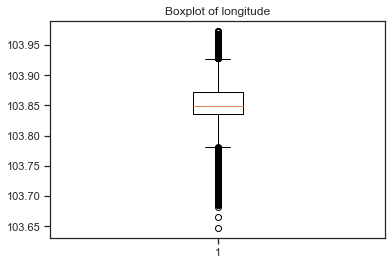

In [768]:
plt.boxplot(airbnb_data_num['longitude'].dropna())
plt.title('Boxplot of longitude')

plt.show()

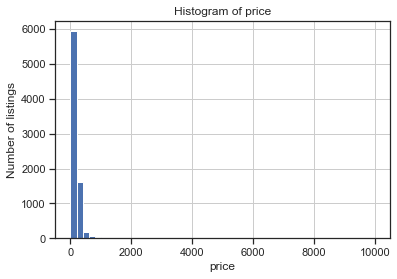

In [769]:
# price variable

plt.hist(airbnb_data_num['price'].dropna(), bins=50)
plt.xlabel('price')
plt.ylabel('Number of listings') 
plt.title('Histogram of price')
plt.grid(True)

plt.show()

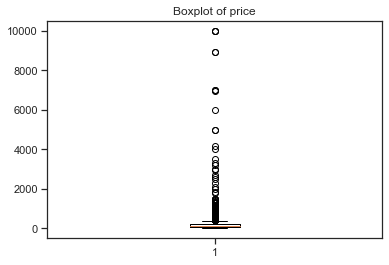

In [770]:
plt.boxplot(airbnb_data_num['price'].dropna())
plt.title('Boxplot of price')

plt.show()

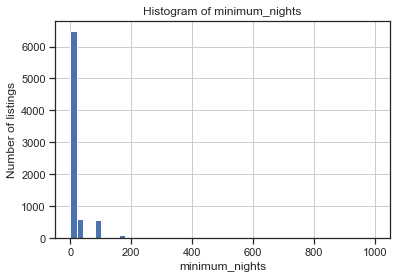

In [771]:
# minimum_nights variable

plt.hist(airbnb_data_num['minimum_nights'].dropna(), bins=50)
plt.xlabel('minimum_nights')
plt.ylabel('Number of listings') 
plt.title('Histogram of minimum_nights')
plt.grid(True)

plt.show()

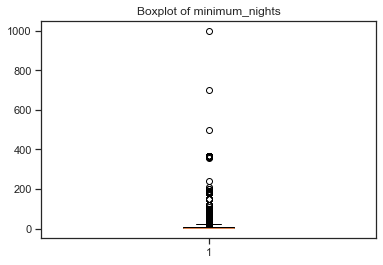

In [772]:
plt.boxplot(airbnb_data_num['minimum_nights'].dropna())
plt.title('Boxplot of minimum_nights')

plt.show()

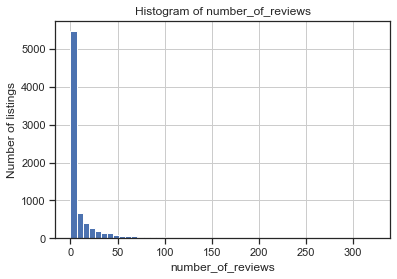

In [773]:
# number_of_reviews variable

plt.hist(airbnb_data_num['number_of_reviews'].dropna(), bins=50)
plt.xlabel('number_of_reviews')
plt.ylabel('Number of listings') 
plt.title('Histogram of number_of_reviews')
plt.grid(True)

plt.show()

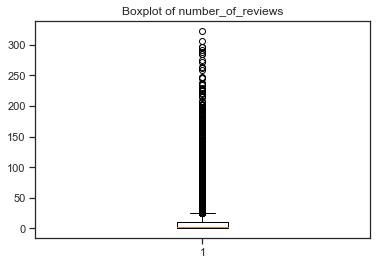

In [774]:
plt.boxplot(airbnb_data_num['number_of_reviews'].dropna())
plt.title('Boxplot of number_of_reviews')

plt.show()

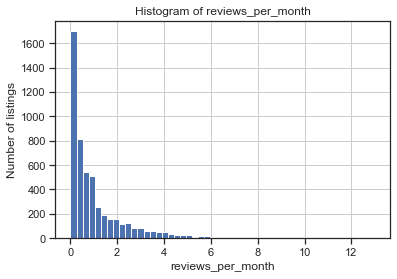

In [775]:
# reviews_per_month variable

plt.hist(airbnb_data_num['reviews_per_month'].dropna(), bins=50)
plt.xlabel('reviews_per_month')
plt.ylabel('Number of listings') 
plt.title('Histogram of reviews_per_month')
plt.grid(True)

plt.show()

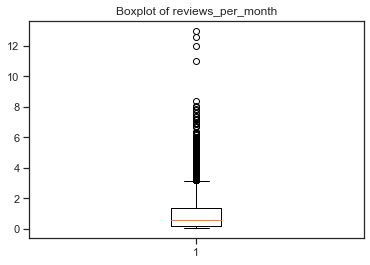

In [776]:
plt.boxplot(airbnb_data_num['reviews_per_month'].dropna())
plt.title('Boxplot of reviews_per_month')

plt.show()

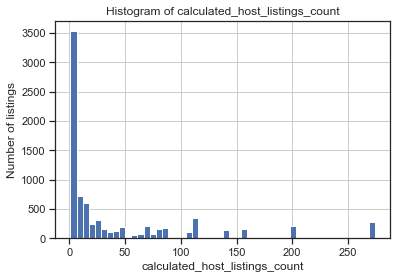

In [777]:
# calculated_host_listings_count variable

plt.hist(airbnb_data_num['calculated_host_listings_count'].dropna(), bins=50)
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Number of listings') 
plt.title('Histogram of calculated_host_listings_count')
plt.grid(True)

plt.show()

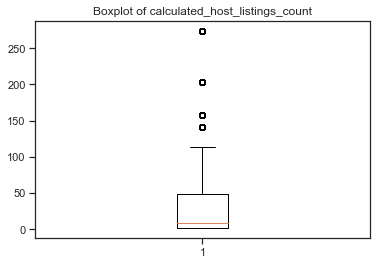

In [778]:
plt.boxplot(airbnb_data_num['calculated_host_listings_count'].dropna())
plt.title('Boxplot of calculated_host_listings_count')

plt.show()

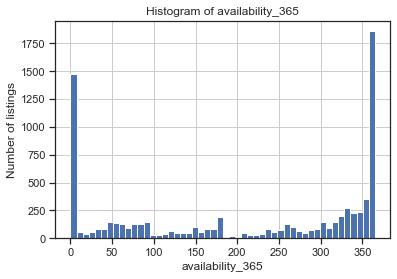

In [779]:
# availability_365 variable

plt.hist(airbnb_data_num['availability_365'].dropna(), bins=50)
plt.xlabel('availability_365')
plt.ylabel('Number of listings') 
plt.title('Histogram of availability_365')
plt.grid(True)

plt.show()

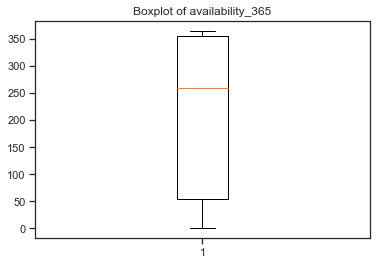

In [780]:
plt.boxplot(airbnb_data_num['availability_365'].dropna())
plt.title('Boxplot of availability_365')

plt.show()

#### Observing the relationship between each Numerical Variable (except price) and the Target Variable (price)

#### id variable

Text(0.5, 1.0, 'price vs. id')

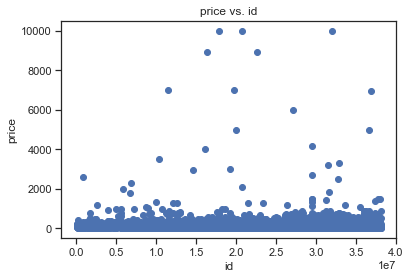

In [781]:
# price vs. id (Scatter plot)
plt.scatter(airbnb_data['id'], airbnb_data['price'])
plt.xlabel('id')
plt.ylabel('price')
plt.title('price vs. id')

In [782]:
# id vs. price (Target Mean)
airbnb_data.groupby('id').price.mean()

id
49091        83.0
50646        81.0
56334        69.0
71609       206.0
71896        94.0
            ...  
38105126    100.0
38108273    550.0
38109336     58.0
38110493     56.0
38112762     65.0
Name: price, Length: 7907, dtype: float64

#### host_id variable

Text(0.5, 1.0, 'price vs. host_id')

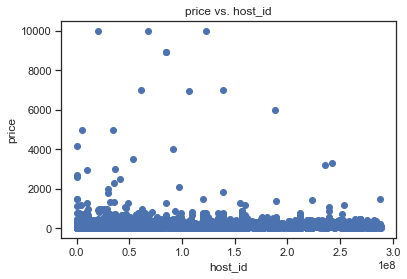

In [783]:
# price vs. host_id (Scatter plot)
plt.scatter(airbnb_data['host_id'], airbnb_data['price'])
plt.xlabel('host_id')
plt.ylabel('price')
plt.title('price vs. host_id')

In [784]:
# host_id vs. price (Target Mean)
airbnb_data.groupby('host_id').price.mean()

host_id
23666        108.000000
59498        123.333333
165209       103.000000
184596       310.000000
227796        81.000000
                ...    
288016519    242.000000
288110467     56.000000
288249975    110.000000
288546201     43.000000
288567551     65.000000
Name: price, Length: 2705, dtype: float64

#### latitude variable

Text(0.5, 1.0, 'price vs. latitude')

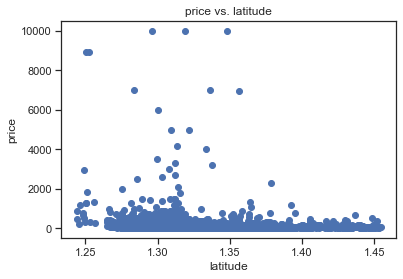

In [785]:
# price vs. latitude (Scatter plot)
plt.scatter(airbnb_data['latitude'], airbnb_data['price'])
plt.xlabel('latitude')
plt.ylabel('price')
plt.title('price vs. latitude')

In [786]:
# latitude vs. price (Target Mean)
airbnb_data.groupby('latitude').price.mean()

latitude
1.24387     865.0
1.24391     481.0
1.24526     200.0
1.24627    1200.0
1.24847     700.0
            ...  
1.45203     110.0
1.45265      19.0
1.45301      69.0
1.45328      19.0
1.45459      87.0
Name: price, Length: 4885, dtype: float64

#### longitude variable

Text(0.5, 1.0, 'price vs. longitude')

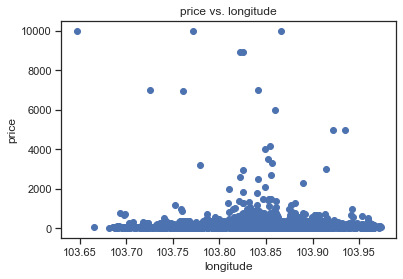

In [787]:
# price vs. longitude (Scatter plot)
plt.scatter(airbnb_data['longitude'], airbnb_data['price'])
plt.xlabel('longitude')
plt.ylabel('price')
plt.title('price vs. longitude')

In [788]:
# longitude vs. price (Target Mean)
airbnb_data.groupby('longitude').price.mean()

longitude
103.64656    10000.0
103.66547       60.0
103.68162       31.0
103.68520       81.0
103.68536       50.0
              ...   
103.97105       37.0
103.97158       69.0
103.97171      100.0
103.97292       99.0
103.97342       85.0
Name: price, Length: 5414, dtype: float64

#### minimum_nights variable

Text(0.5, 1.0, 'price vs. minimum_nights')

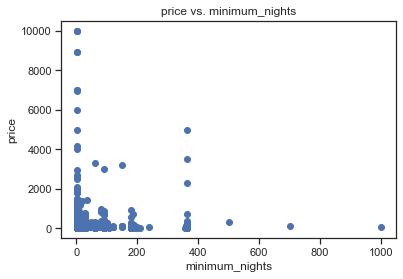

In [789]:
# price vs. minimum_nights (Scatter plot)
plt.scatter(airbnb_data['minimum_nights'], airbnb_data['price'])
plt.xlabel('minimum_nights')
plt.ylabel('price')
plt.title('price vs. minimum_nights')

In [790]:
# minimum_nights vs. price (Target Mean)
airbnb_data.groupby('minimum_nights').price.mean()

minimum_nights
1       162.247487
2       200.917867
3       186.824360
4       158.920561
5       149.117207
           ...    
360      81.666667
365     485.066667
500     331.000000
700     108.000000
1000     81.000000
Name: price, Length: 73, dtype: float64

#### number_of_reviews variable

Text(0.5, 1.0, 'price vs. number_of_reviews')

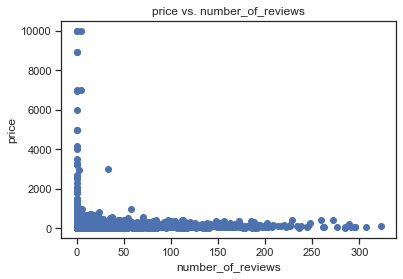

In [791]:
# price vs. number_of_reviews (Scatter plot)
plt.scatter(airbnb_data['number_of_reviews'], airbnb_data['price'])
plt.xlabel('number_of_reviews')
plt.ylabel('price')
plt.title('price vs. number_of_reviews')

In [792]:
# number_of_reviews vs. price (Target Mean)
airbnb_data.groupby('number_of_reviews').price.mean()

number_of_reviews
0      203.008339
1      156.601476
2      149.082770
3      154.538874
4      147.620155
          ...    
289    218.000000
291     72.000000
296     54.500000
307     69.000000
323    139.000000
Name: price, Length: 208, dtype: float64

#### reviews_per_month variable

Text(0.5, 1.0, 'price vs. reviews_per_month')

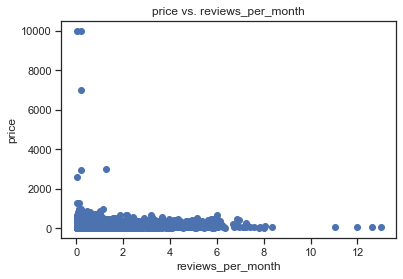

In [793]:
# reviews_per_month vs. price (Scatter plot)
plt.scatter(airbnb_data['reviews_per_month'], airbnb_data['price'])
plt.xlabel('reviews_per_month')
plt.ylabel('price')
plt.title('price vs. reviews_per_month')

In [794]:
# reviews_per_month vs. price (Target Mean)
airbnb_data.groupby('reviews_per_month').price.mean()

reviews_per_month
0.01     1079.000000
0.02      113.426230
0.03      112.069444
0.04      200.509615
0.05      140.247312
            ...     
8.37       67.000000
11.03      75.000000
12.00      69.000000
12.60      85.000000
13.00      69.000000
Name: price, Length: 527, dtype: float64

#### calculated_host_listings_count variable

Text(0.5, 1.0, 'price vs. calculated_host_listings_count')

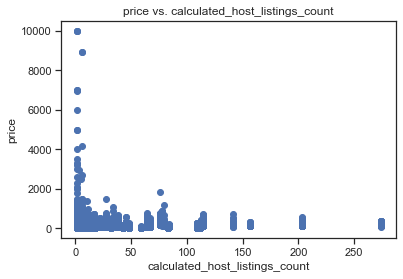

In [795]:
# price vs. calculated_host_listings_count (Scatter plot)
plt.scatter(airbnb_data['calculated_host_listings_count'], airbnb_data['price'])
plt.xlabel('calculated_host_listings_count')
plt.ylabel('price')
plt.title('price vs. calculated_host_listings_count')

In [796]:
# calculated_host_listings_count vs. price (Target Mean)
airbnb_data.groupby('calculated_host_listings_count').price.mean()

calculated_host_listings_count
1      176.823919
2      119.167702
3      151.383481
4      132.319444
5      183.560000
6      343.494792
7      140.042328
8      135.315217
9      134.829630
10     166.775000
11     151.397727
12     205.300000
13     145.392308
14     132.922078
15     197.752381
16     197.462500
17     181.588235
18     102.577778
19     171.736842
20     188.400000
21     125.761905
22     290.787879
23     158.217391
24     156.277778
25     147.400000
26     113.961538
27     305.203704
28     153.910714
30     145.350000
31     132.048387
32      66.281250
34     355.117647
37      66.081081
38     265.631579
40     140.825000
41      97.317073
43      28.511628
45     201.033333
48      92.125000
59      49.728814
64     278.531250
67     166.199005
76     375.907895
78     380.705128
79     222.379747
83      50.313253
84     108.119048
109    101.009174
112     49.544643
113    222.292035
114    222.105263
141    195.808511
157    185.331210
203    223.2068

#### availability_365 variable

Text(0.5, 1.0, 'price vs. availability_365')

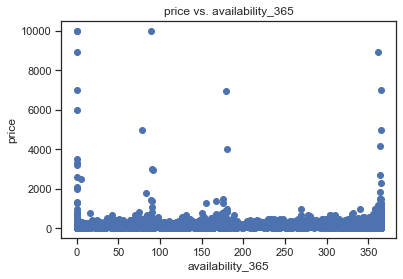

In [797]:
# price vs. availability_365 (Scatter plot)
plt.scatter(airbnb_data['availability_365'], airbnb_data['price'])
plt.xlabel('availability_365')
plt.ylabel('price')
plt.title('price vs. availability_365')

In [798]:
# availability_365 vs. price (Target Mean)
airbnb_data.groupby('availability_365').price.mean()

availability_365
0      165.056999
1       96.200000
2      125.052632
3      134.750000
4      115.272727
          ...    
361    264.635294
362    157.173333
363    119.448276
364    281.196429
365    191.188612
Name: price, Length: 359, dtype: float64

### Categorical Data

In [799]:
# Selecting Categorical Data from 'airbnb_data', then display first 5 rows.
airbnb_data_cat = airbnb_data.select_dtypes(['object']).copy()
airbnb_data_cat.head()

name  host_name neighbourhood_group  \
0    COZICOMFORT LONG TERM STAY ROOM 2  Francesca        North Region   
1      Pleasant Room along Bukit Timah    Sujatha      Central Region   
2                          COZICOMFORT  Francesca        North Region   
3  Ensuite Room (Room 1 & 2) near EXPO    Belinda         East Region   
4      B&B  Room 1 near Airport & EXPO    Belinda         East Region   

  neighbourhood     room_type last_review  
0     Woodlands  Private room  2013-10-21  
1   Bukit Timah  Private room  2014-12-26  
2     Woodlands  Private room  2015-10-01  
3      Tampines  Private room  2019-08-11  
4      Tampines  Private room  2019-07-28

In [800]:
# Describing Categorical Variables
airbnb_data_cat.describe()

name host_name  \
count                                                7905      7907   
unique                                               7457      1833   
top     Luxury hostel with in-cabin locker - Single mixed       Jay   
freq                                                   13       290   

       neighbourhood_group neighbourhood        room_type last_review  
count                 7907          7907             7907        5149  
unique                   5            43                3        1001  
top         Central Region       Kallang  Entire home/apt  2019-08-12  
freq                  6309          1043             4132         152

In [801]:
# Viewing the number of unique categories in each Categorical Variable
airbnb_data_cat.nunique()

name                   7457
host_name              1833
neighbourhood_group       5
neighbourhood            43
room_type                 3
last_review            1001
dtype: int64

#### Viewing the count of each category in each Categorical Variable

In [802]:
# name variable

airbnb_data_cat.name.value_counts()

Luxury hostel with in-cabin locker - Single mixed     13
Studio Apartment - Oakwood Premier                     9
Inviting & Cozy 1BR APT 3 mins from Tg Pagar MRT       9
Stylish 1BR Located 7 mins from Tg Pagar MRT           8
City-located 1BR loft apartment *BRAND NEW*            8
                                                      ..
Boonlay 16sqm Cosy Master Room for Rent                1
Tanjong Pagar Pristine Studio Apartment                1
lavLoftbed *RmT, no-sharing, wifi, mrt                 1
Newly furnished spacious room                          1
Amazing room with private bathroom walk to Orchard     1
Name: name, Length: 7457, dtype: int64

In [803]:
# host_name variable

airbnb_data_cat.host_name.value_counts()

Jay         290
Alvin       249
Richards    157
Aaron       145
Rain        115
           ... 
Nassiba       1
Dianna        1
Geo           1
Ziad          1
Bo            1
Name: host_name, Length: 1833, dtype: int64

In [804]:
# neighbourhood_group variable

airbnb_data_cat.neighbourhood_group.value_counts()

Central Region       6309
West Region           540
East Region           508
North-East Region     346
North Region          204
Name: neighbourhood_group, dtype: int64

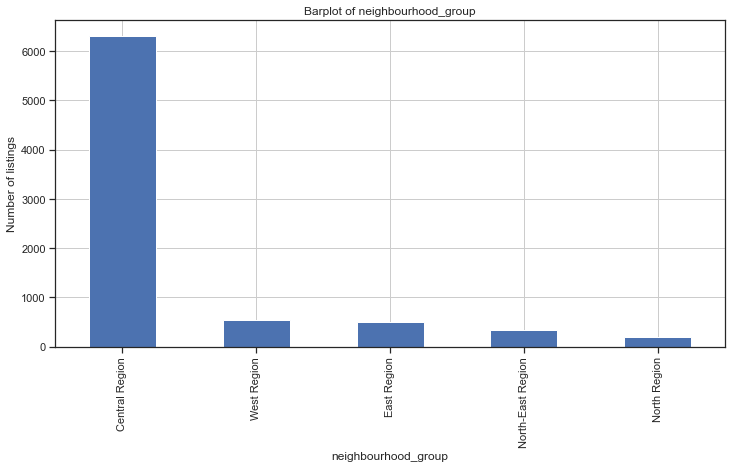

In [805]:
airbnb_data_cat.neighbourhood_group.value_counts().plot.bar(figsize=(12,6))
plt.xlabel('neighbourhood_group')
plt.ylabel('Number of listings')
plt.title('Barplot of neighbourhood_group')
plt.grid(True)
plt.show()

In [806]:
# neighbourhood variable

airbnb_data_cat.neighbourhood.value_counts()

Kallang                    1043
Geylang                     994
Novena                      537
Rochor                      536
Outram                      477
Bukit Merah                 470
Downtown Core               428
Bedok                       373
River Valley                362
Queenstown                  266
Tanglin                     210
Singapore River             175
Marine Parade               171
Jurong West                 153
Orchard                     136
Newton                      134
Bukit Timah                 131
Jurong East                 118
Hougang                     109
Clementi                    102
Toa Payoh                   101
Pasir Ris                    71
Serangoon                    69
Sengkang                     67
Woodlands                    67
Bukit Batok                  65
Tampines                     64
Museum                       63
Choa Chu Kang                63
Ang Mo Kio                   58
Bishan                       57
Yishun  

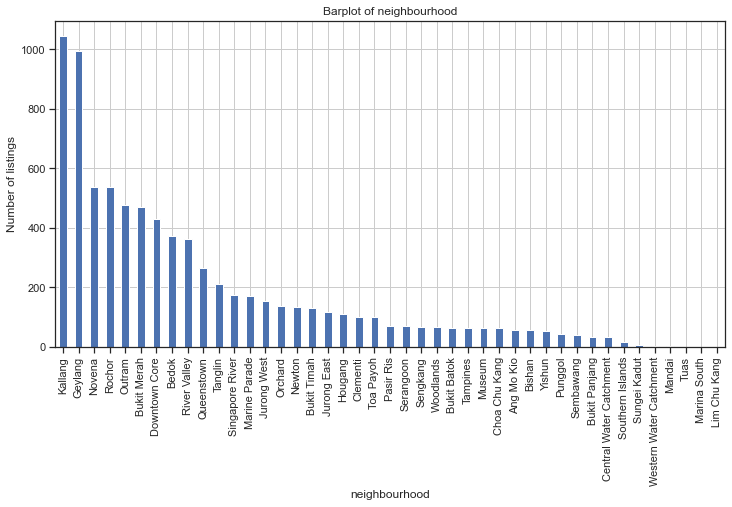

In [807]:
airbnb_data_cat.neighbourhood.value_counts().plot.bar(figsize=(12,6))
plt.xlabel('neighbourhood')
plt.ylabel('Number of listings')
plt.title('Barplot of neighbourhood')
plt.grid(True)
plt.show()

In [808]:
# room_type variable

airbnb_data_cat.room_type.value_counts()

Entire home/apt    4132
Private room       3381
Shared room         394
Name: room_type, dtype: int64

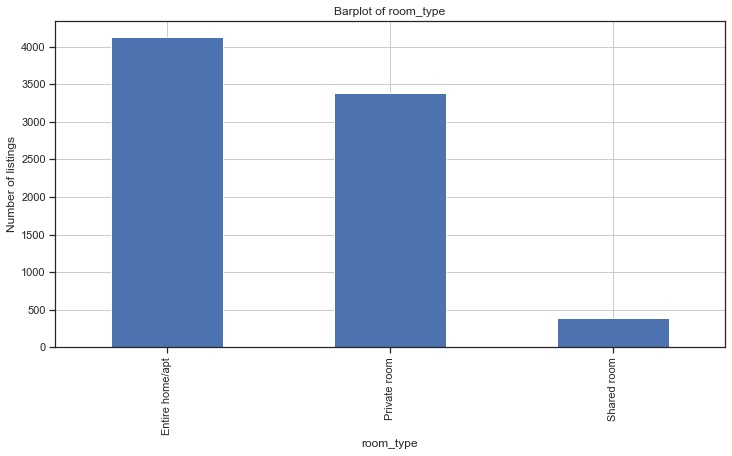

In [809]:
airbnb_data_cat.room_type.value_counts().plot.bar(figsize=(12,6))
plt.xlabel('room_type')
plt.ylabel('Number of listings')
plt.title('Barplot of room_type')
plt.grid(True)
plt.show()

In [810]:
# last_review variable

airbnb_data_cat.last_review.value_counts()

2019-08-12    152
2019-08-11    128
2019-08-13    110
2019-08-10     87
2019-08-08     78
             ... 
2016-12-03      1
2016-01-18      1
2016-07-27      1
2017-08-19      1
2019-03-22      1
Name: last_review, Length: 1001, dtype: int64

#### Identifying Rare Categories in neighbourhood_group, neighbourhood and room_type variables

In [811]:
# neighbourhood_group variable

In [812]:
# Calculating frequency for each category

# first we calculate the total number of listings in the dataset
total_listings = len(airbnb_data)
print('Total number of listings {}'.format(total_listings))

# then we calculate label frequency
# value_counts() counts the number of listings per label
# by dividing by total listings we obtain the frequency

label_freq = airbnb_data_cat.neighbourhood_group.value_counts() / total_listings

# let's inspect the frequency of the labels
label_freq

Total number of listings 7907


Central Region       0.797901
West Region          0.068294
East Region          0.064247
North-East Region    0.043759
North Region         0.025800
Name: neighbourhood_group, dtype: float64

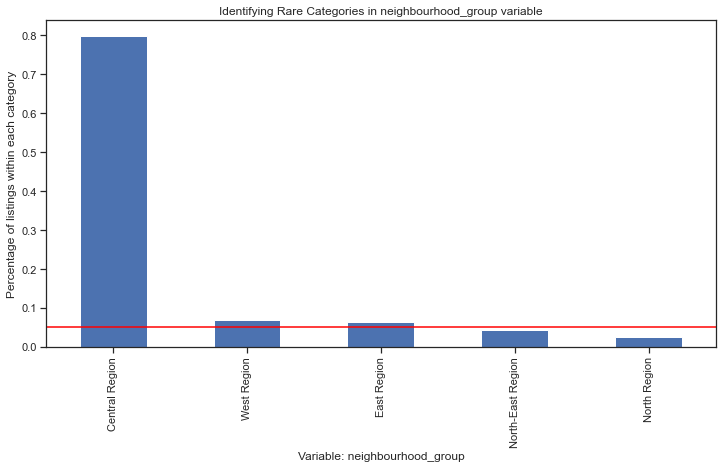

In [813]:
# Making plot with the category frequencies
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12,6))

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('Percentage of listings within each category')
fig.set_xlabel('Variable: neighbourhood_group')
fig.set_title('Identifying Rare Categories in neighbourhood_group variable')
plt.show()

In [814]:
# neighbourhood variable

In [815]:
# Calculating frequency for each category

# first we calculate the total number of listings in the dataset
total_listings = len(airbnb_data)
print('Total number of listings {}'.format(total_listings))

# then we calculate label frequency
# value_counts() counts the number of listings per label
# by dividing by total listings we obtain the frequency

label_freq = airbnb_data_cat.neighbourhood.value_counts() / total_listings

# let's inspect the frequency of the labels
label_freq

Total number of listings 7907


Kallang                    0.131908
Geylang                    0.125711
Novena                     0.067915
Rochor                     0.067788
Outram                     0.060326
Bukit Merah                0.059441
Downtown Core              0.054129
Bedok                      0.047173
River Valley               0.045782
Queenstown                 0.033641
Tanglin                    0.026559
Singapore River            0.022132
Marine Parade              0.021626
Jurong West                0.019350
Orchard                    0.017200
Newton                     0.016947
Bukit Timah                0.016568
Jurong East                0.014923
Hougang                    0.013785
Clementi                   0.012900
Toa Payoh                  0.012773
Pasir Ris                  0.008979
Serangoon                  0.008726
Sengkang                   0.008474
Woodlands                  0.008474
Bukit Batok                0.008221
Tampines                   0.008094
Museum                     0

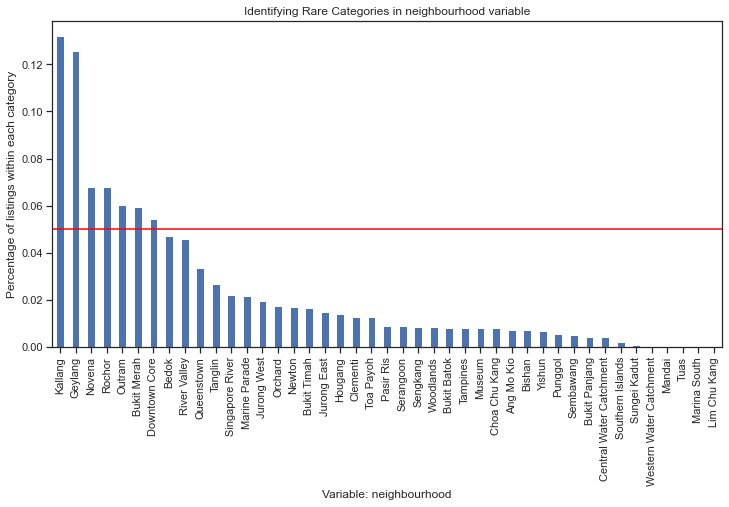

In [816]:
# Making plot with the category frequencies
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12,6))

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('Percentage of listings within each category')
fig.set_xlabel('Variable: neighbourhood')
fig.set_title('Identifying Rare Categories in neighbourhood variable')
plt.show()

In [817]:
# room_type variable

In [818]:
# Calculating frequency for each category

# first we calculate the total number of listings in the dataset
total_listings = len(airbnb_data)
print('Total number of listings {}'.format(total_listings))

# then we calculate label frequency
# value_counts() counts the number of listings per label
# by dividing by total listings we obtain the frequency

label_freq = airbnb_data_cat.room_type.value_counts() / total_listings

# let's inspect the frequency of the labels
label_freq

Total number of listings 7907


Entire home/apt    0.522575
Private room       0.427596
Shared room        0.049829
Name: room_type, dtype: float64

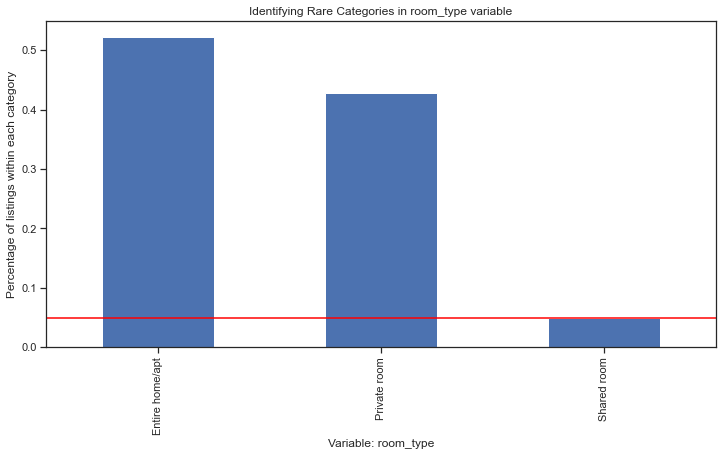

In [819]:
# Making plot with the category frequencies
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12,6))

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('Percentage of listings within each category')
fig.set_xlabel('Variable: room_type')
fig.set_title('Identifying Rare Categories in room_type variable')
plt.show()

#### Observing the relationship between each Categorical Variable and the Target Variable (price)

#### name variable

In [820]:
# name vs. price (Target Mean)
airbnb_data.groupby('name').price.mean()

name
!! CozyRoom@City Center,Little India,FarrerParkMRT     67.0
!!!2BR ART Apartment near shopping mall Katong ON5    168.0
!!!2BR Amazing Apartment Phenthouse @ Katong ON7      199.0
!!!2BR Spacious ART Katong near shopping mall ON6     168.0
!!!Amazing 2 Bedroom Penthouse View @ Katong ON8      228.0
                                                      ...  
马林百烈                                                   44.0
马里士他                                                   50.0
高级公寓｡交通四方八达｡饮食天堂｡二十四小时超市｡                             128.0
ｵｰﾁｬｰﾄﾞﾛｰﾄﾞｴﾘｱ!ﾌｨｯﾄﾈｽ設備!無料wifi!ｽﾀｲﾘｯｼｭなｺﾝﾄﾞﾐﾆｱﾑ        72.0
ｼﾃｨｰに近くて閑静な住宅街｡ いつもｷﾚｲでﾋﾟｯｶﾋﾟｶ｡                       157.0
Name: price, Length: 7457, dtype: float64

#### host_name variable

In [821]:
# host_name vs. price (Target Mean)
airbnb_data.groupby('host_name').price.mean()

host_name
(Email hidden by Airbnb)             287.000000
23 Lees                              177.666667
5footway                              84.750000
8 On Claymore Serviced Residences    287.000000
A                                    175.000000
                                        ...    
욱                                     94.000000
은혜                                   144.000000
진                                    119.000000
현재                                   115.000000
ｼﾝ                                   128.555556
Name: price, Length: 1833, dtype: float64

#### neighbourhood_group variable

In [822]:
# neighbourhood_group vs. price (Target Mean)
airbnb_data.groupby('neighbourhood_group').price.mean()

neighbourhood_group
Central Region       176.629418
East Region          142.503937
North Region         110.779412
North-East Region     99.838150
West Region          175.974074
Name: price, dtype: float64

Text(0, 0.5, 'price')

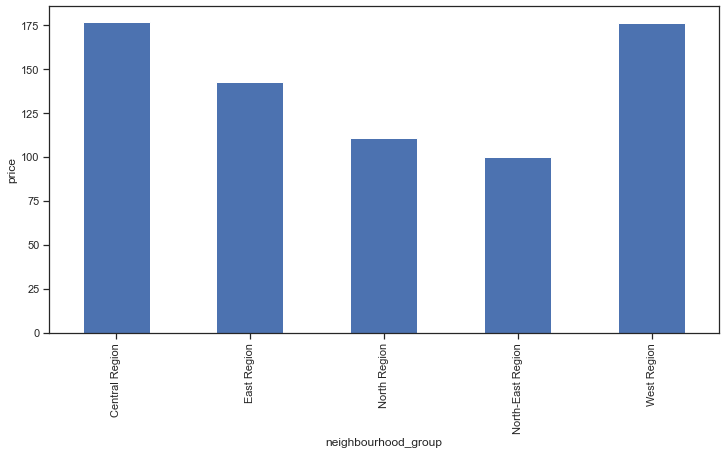

In [823]:
airbnb_data.groupby('neighbourhood_group').price.mean().plot.bar(figsize=(12,6))
plt.ylabel('price')

#### neighbourhood variable

In [824]:
# neighbourhood vs. price (Target Mean)
airbnb_data.groupby('neighbourhood').price.mean()

neighbourhood
Ang Mo Kio                   103.448276
Bedok                        158.630027
Bishan                       170.508772
Bukit Batok                  206.169231
Bukit Merah                  151.442553
Bukit Panjang                365.352941
Bukit Timah                  153.969466
Central Water Catchment      184.852941
Choa Chu Kang                 93.317460
Clementi                     170.705882
Downtown Core                205.394860
Geylang                      161.598592
Hougang                      124.321101
Jurong East                  184.720339
Jurong West                   91.045752
Kallang                      166.162991
Lim Chu Kang                  65.000000
Mandai                        56.666667
Marina South                 419.000000
Marine Parade                145.818713
Museum                       236.317460
Newton                       188.746269
Novena                       177.441341
Orchard                      291.029412
Outram                    

Text(0, 0.5, 'price')

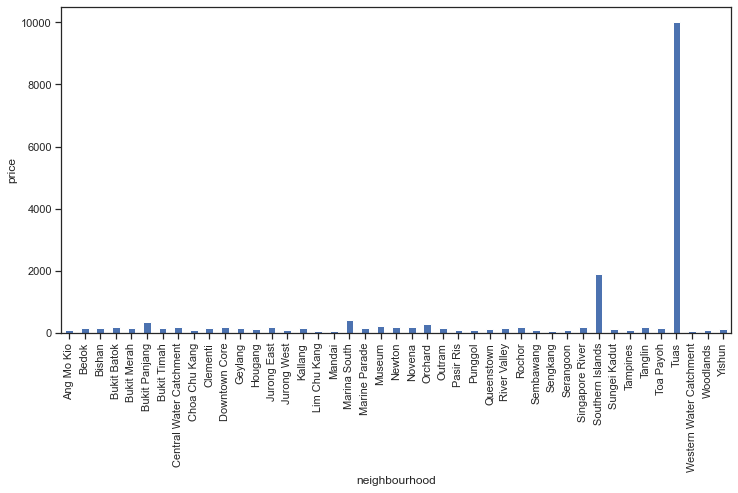

In [825]:
airbnb_data.groupby('neighbourhood').price.mean().plot.bar(figsize=(12,6))
plt.ylabel('price')

#### room_type variable

In [826]:
# room_type vs. price (Target Mean)
airbnb_data.groupby('room_type').price.mean()

room_type
Entire home/apt    226.998306
Private room       110.938480
Shared room         65.675127
Name: price, dtype: float64

Text(0, 0.5, 'price')

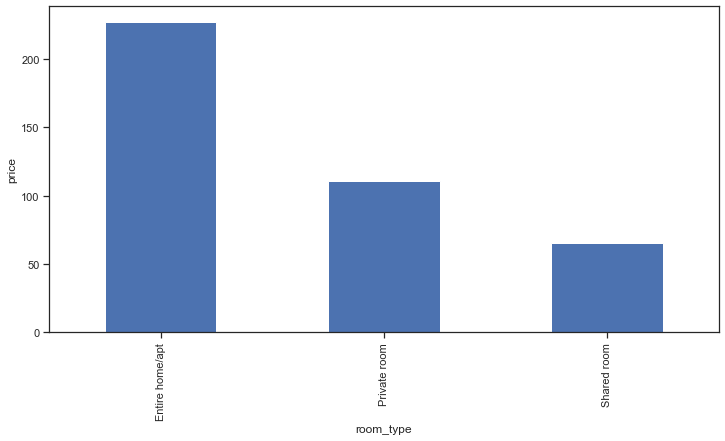

In [827]:
airbnb_data.groupby('room_type').price.mean().plot.bar(figsize=(12,6))
plt.ylabel('price')

#### last_review variable

In [828]:
# last_review vs. price (Target Mean)
airbnb_data.groupby('last_review').price.mean()

last_review
2013-10-21      83.000000
2014-02-22    2604.000000
2014-03-08     550.000000
2014-06-28     181.000000
2014-07-14      31.000000
                 ...     
2019-08-23     166.953488
2019-08-24     155.311475
2019-08-25     137.500000
2019-08-26     170.136364
2019-08-27     140.000000
Name: price, Length: 1001, dtype: float64

### 2.2 Cleanse and Transform the data

### 2.2.1. Missing Values

Missing Values are data that is not stored for certain observations within a variable. In other words, Missing Values is the absence of values, and is a common occurrence in most data sets.

It is necessary to handle Missing Values because...

1. Missing Values is not permitted by most data sources
2. Missing Values may also cause problems for many data transformation & feature engineering techniques

#### Checking for Missing Values

In order to deal with Missing Values, we need to first check for null values in all variables. The steps on the checking of null values below are done earlier in Quantifying Missing Data / Null Values section and are repeated for the ease of viewing. 

In [829]:
# Viewing number of items and data type of each column (Done in Section 2.1 -> In-depth Overview of Dataset)
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [830]:
# Check for null values in each column (Done in Section 2.1 -> Quantifying Missing Data / Null Values)
airbnb_data.isnull().any()

id                                False
name                               True
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [831]:
# Check the number of null values in data (Done in Section 2.1 -> Quantifying Missing Data / Null Values)
airbnb_data.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

### Are there any Missing Values?

From the results above, there are 3 variables with missing values:

1. name (Categorical Variable) (2 null values)


2. last_review (Categorical Variable) (2758 null values)


3. reviews_per_month (Numerical Variable) (2758 null values)

### Handling Missing Values in name Variable (Categorical Variable)

Since name variable is a categorical variable, there are 4 methods to handle missing values in a Categorical Variable. 

### Method 1: Removing Observations with Missing Data

Complete Case Analysis (CCA), also called list-wise deletion of cases, consists of discarding those observations where the values in any of the variables are missing. CCA can be applied to categorical and numerical variables. CCA is quick and easy to implement and has the advantage that it preserves the distribution of the variables, provided the data is missing at random and only a small proportion of the data is missing. However, if data is missing across many variables, CCA may lead to the removal of a big portion of the dataset.

In [832]:
# make a copy of the dataframe to store the result for this method of handling missing values in name variable

airbnb_data_impute_mtd_1 = airbnb_data.copy()

In [833]:
# create a complete case data set, indicate the variable "name" that we would like the complete
airbnb_data_cca = airbnb_data_impute_mtd_1.dropna(subset=['name'])

In [834]:
print('Number of total observations: {}'.format(len(airbnb_data)))
print('Number of observations with complete cases in name Variable: {}'.format(len(airbnb_data_cca)))

Number of total observations: 7907
Number of observations with complete cases in name Variable: 7905


In [835]:
# check that there are no more null values in name variable 
airbnb_data_cca.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2757
reviews_per_month                 2757
calculated_host_listings_count       0
availability_365                     0
dtype: int64

### Method 2: Mode / Frequent Category Imputation

Mode imputation consists of replacing missing values with the mode. We normally use this procedure in categorical variables, hence the frequent category imputation name. 

Note that using Mode / Frequent Category Imputation may distort the original distribution of categories if the percentage of missing values is high.

In [836]:
# Describing name variable
airbnb_data_cat['name'].describe()

count                                                  7905
unique                                                 7457
top       Luxury hostel with in-cabin locker - Single mixed
freq                                                     13
Name: name, dtype: object

From the above results, we can see that the mode of name variable is Luxury hostel with in-cabin locker - Single mixed.

In [837]:
# make a copy of the dataframe to store the result for this method of handling missing values in name variable

airbnb_data_impute_mtd_2 = airbnb_data.copy()

In [838]:
# name column: fill in null values with Luxury hostel with in-cabin locker - Single mixed (majority is Luxury hostel with in-cabin locker - Single mixed as stated above)
airbnb_data_impute_mtd_2['name'] = airbnb_data_impute_mtd_2['name'].fillna("Luxury hostel with in-cabin locker - Single mixed")

In [839]:
# check that null values in name variable were replaced
airbnb_data_impute_mtd_2.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [840]:
# Count of each category in name variable after imputation

airbnb_data_impute_mtd_2.name.value_counts()

Luxury hostel with in-cabin locker - Single mixed     15
Inviting & Cozy 1BR APT 3 mins from Tg Pagar MRT       9
Studio Apartment - Oakwood Premier                     9
Superhost 1BR APT in the heart of Tg Pagar             8
Stylish 1BR Located 7 mins from Tg Pagar MRT           8
                                                      ..
Boonlay 16sqm Cosy Master Room for Rent                1
Tanjong Pagar Pristine Studio Apartment                1
lavLoftbed *RmT, no-sharing, wifi, mrt                 1
Newly furnished spacious room                          1
Amazing room with private bathroom walk to Orchard     1
Name: name, Length: 7457, dtype: int64

### Method 3: Capturing Missing Values in a Bespoke Category 

Missing data in categorical variables can be treated as a different category, so it is common to replace missing values with the "Missing" string.

In [841]:
# make a copy of the dataframe to store the result for this method of handling missing values in name variable

airbnb_data_impute_mtd_3 = airbnb_data.copy()

In [842]:
# name column: fill in null values with Missing 
airbnb_data_impute_mtd_3['name'] = airbnb_data_impute_mtd_3['name'].fillna('Missing')

In [843]:
# check that null values in name variable were replaced
airbnb_data_impute_mtd_3.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [844]:
# Count of each category in name variable after imputation

airbnb_data_impute_mtd_3.name.value_counts()

Luxury hostel with in-cabin locker - Single mixed     13
Inviting & Cozy 1BR APT 3 mins from Tg Pagar MRT       9
Studio Apartment - Oakwood Premier                     9
Superhost 1BR APT in the heart of Tg Pagar             8
Tasteful & Cozy 1 BR near SGH/Tiong Bahru              8
                                                      ..
Boonlay 16sqm Cosy Master Room for Rent                1
Tanjong Pagar Pristine Studio Apartment                1
lavLoftbed *RmT, no-sharing, wifi, mrt                 1
Newly furnished spacious room                          1
Amazing room with private bathroom walk to Orchard     1
Name: name, Length: 7458, dtype: int64

### Method 4: Converting values into binary codes 0 (no name) and 1 (has name)

In [845]:
# make a copy of the dataframe to store the result for this method of handling missing values in name variable

airbnb_data_impute_mtd_4 = airbnb_data.copy()

In [846]:
# Viewing values in name column
airbnb_data_impute_mtd_4['name']

0                       COZICOMFORT LONG TERM STAY ROOM 2
1                         Pleasant Room along Bukit Timah
2                                             COZICOMFORT
3                     Ensuite Room (Room 1 & 2) near EXPO
4                         B&B  Room 1 near Airport & EXPO
                              ...                        
7902    Loft 2 pax near Haw Par / Pasir Panjang. Free ...
7903                           3bedroom luxury at Orchard
7904      [ Farrer Park ] New City Fringe CBD Mins to MRT
7905            Cheap Master Room in Central of Singapore
7906    Amazing room with private bathroom walk to Orc...
Name: name, Length: 7907, dtype: object

In [847]:
# name column: replace name with 1 and replace NaN with 0
airbnb_data_impute_mtd_4.loc[airbnb_data_impute_mtd_4["name"].notnull(),'name'] = 1
airbnb_data_impute_mtd_4.loc[airbnb_data_impute_mtd_4["name"].isna(),'name'] = 0
airbnb_data_impute_mtd_4['name'] = airbnb_data_impute_mtd_4['name'].astype(int)

In [848]:
# Viewing values in name column after converting values into binary codes
airbnb_data_impute_mtd_4['name']

0       1
1       1
2       1
3       1
4       1
       ..
7902    1
7903    1
7904    1
7905    1
7906    1
Name: name, Length: 7907, dtype: int32

In [849]:
# check that there are no more null values in name variable
airbnb_data_impute_mtd_4.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [850]:
# Distribution of name variable after converting values into binary codes

airbnb_data_impute_mtd_4.name.value_counts()

1    7905
0       2
Name: name, dtype: int64

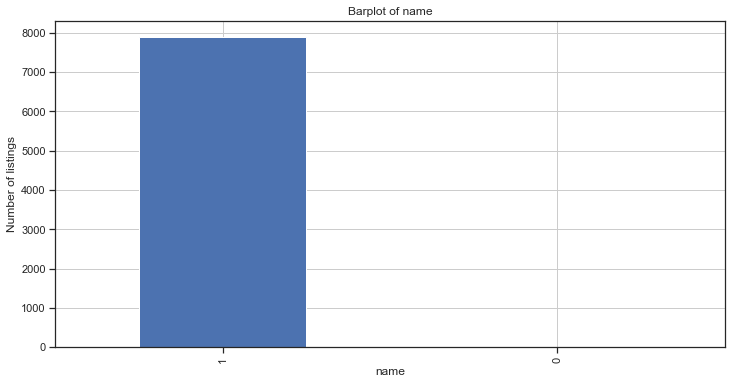

In [851]:
airbnb_data_impute_mtd_4.name.value_counts().plot.bar(figsize=(12,6))
plt.xlabel('name')
plt.ylabel('Number of listings')
plt.title('Barplot of name')
plt.grid(True)
plt.show()

### Decision on the Ideal Method to handle Missing Values in name Variable (Categorical Variable)

After trying all the different above methods to handle Missing Values in name Variable, I decided to use Capturing Missing Values in a Bespoke Category to handle Missing Values in name Variable.


### Handling Missing Values in last_review Variable (Categorical Variable)

Similarly, since last_review variable is also a categorical variable, there are also therefore 4 methods to handle missing values in a Categorical Variable. 

### Method 1: Removing Observations with Missing Data

Complete Case Analysis (CCA), also called list-wise deletion of cases, consists of discarding those observations where the values in any of the variables are missing. CCA can be applied to categorical and numerical variables. CCA is quick and easy to implement and has the advantage that it preserves the distribution of the variables, provided the data is missing at random and only a small proportion of the data is missing. However, if data is missing across many variables, CCA may lead to the removal of a big portion of the dataset.

In [852]:
# make a copy of the dataframe to store the result for this method of handling missing values in last_review variable

airbnb_data_impute_mtd_1 = airbnb_data.copy()

In [853]:
# create a complete case data set, indicate the variable "last_review" that we would like the complete
airbnb_data_cca = airbnb_data_impute_mtd_1.dropna(subset=['last_review'])

In [854]:
print('Number of total observations: {}'.format(len(airbnb_data)))
print('Number of observations with complete cases in last_review Variable: {}'.format(len(airbnb_data_cca)))

Number of total observations: 7907
Number of observations with complete cases in last_review Variable: 5149


In [855]:
# check that there are no more null values in last_review variable 
airbnb_data_cca.isnull().sum()

id                                0
name                              1
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Method 2: Mode / Frequent Category Imputation

Mode imputation consists of replacing missing values with the mode. We normally use this procedure in categorical variables, hence the frequent category imputation name. 

Note that using Mode / Frequent Category Imputation may distort the original distribution of categories if the percentage of missing values is high.

In [856]:
# Describing last_review variable
airbnb_data_cat['last_review'].describe()

count           5149
unique          1001
top       2019-08-12
freq             152
Name: last_review, dtype: object

From the above results, we can see that the mode of last_review variable is 2019-08-12.

In [857]:
# make a copy of the dataframe to store the result for this method of handling missing values in last_review variable

airbnb_data_impute_mtd_2 = airbnb_data.copy()

In [858]:
# last_review column: fill in null values with 2019-08-12 (majority is 2019-08-12 as stated above)
airbnb_data_impute_mtd_2['last_review'] = airbnb_data_impute_mtd_2['last_review'].fillna("2019-08-12")

In [859]:
# check that null values in last_review variable were replaced
airbnb_data_impute_mtd_2.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [860]:
# Count of each category in last_review variable after imputation

airbnb_data_impute_mtd_2.last_review.value_counts()

2019-08-12    2910
2019-08-11     128
2019-08-13     110
2019-08-10      87
2019-08-08      78
              ... 
2016-12-03       1
2016-01-18       1
2016-07-27       1
2017-08-19       1
2019-03-22       1
Name: last_review, Length: 1001, dtype: int64

### Method 3: Capturing Missing Values in a Bespoke Category 

Missing data in categorical variables can be treated as a different category, so it is common to replace missing values with another category

In [861]:
# make a copy of the dataframe to store the result for this method of handling missing values in last_review variable

airbnb_data_impute_mtd_3 = airbnb_data.copy()

In [862]:
# last_review column: fill in null values with N.A 
airbnb_data_impute_mtd_3['last_review'] = airbnb_data_impute_mtd_3['last_review'].fillna('N.A')

In [863]:
# check that null values in last_review variable were replaced
airbnb_data_impute_mtd_3.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [864]:
# Count of each category in last_review variable after imputation

airbnb_data_impute_mtd_3.last_review.value_counts()

N.A           2758
2019-08-12     152
2019-08-11     128
2019-08-13     110
2019-08-10      87
              ... 
2016-12-03       1
2016-01-18       1
2016-07-27       1
2017-08-19       1
2019-03-22       1
Name: last_review, Length: 1002, dtype: int64

### Method 4: Converting values into binary codes 0 (no last_review) and 1 (has last_review)

In [865]:
# make a copy of the dataframe to store the result for this method of handling missing values in last_review variable

airbnb_data_impute_mtd_4 = airbnb_data.copy()

In [866]:
# Viewing values in last_review column
airbnb_data_impute_mtd_4['last_review']

0       2013-10-21
1       2014-12-26
2       2015-10-01
3       2019-08-11
4       2019-07-28
           ...    
7902           NaN
7903           NaN
7904           NaN
7905           NaN
7906           NaN
Name: last_review, Length: 7907, dtype: object

In [867]:
# last_review column: replace last_review with 1 and replace NaN with 0
airbnb_data_impute_mtd_4.loc[airbnb_data_impute_mtd_4["last_review"].notnull(),'last_review'] = 1
airbnb_data_impute_mtd_4.loc[airbnb_data_impute_mtd_4["last_review"].isna(),'last_review'] = 0
airbnb_data_impute_mtd_4['last_review'] = airbnb_data_impute_mtd_4['last_review'].astype(int)

In [868]:
# Viewing values in last_review column after converting values into binary codes
airbnb_data_impute_mtd_4['last_review']

0       1
1       1
2       1
3       1
4       1
       ..
7902    0
7903    0
7904    0
7905    0
7906    0
Name: last_review, Length: 7907, dtype: int32

In [869]:
# check that there are no more null values in last_review variable
airbnb_data_impute_mtd_4.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [870]:
# Distribution of last_review variable after converting values into binary codes

airbnb_data_impute_mtd_4.last_review.value_counts()

1    5149
0    2758
Name: last_review, dtype: int64

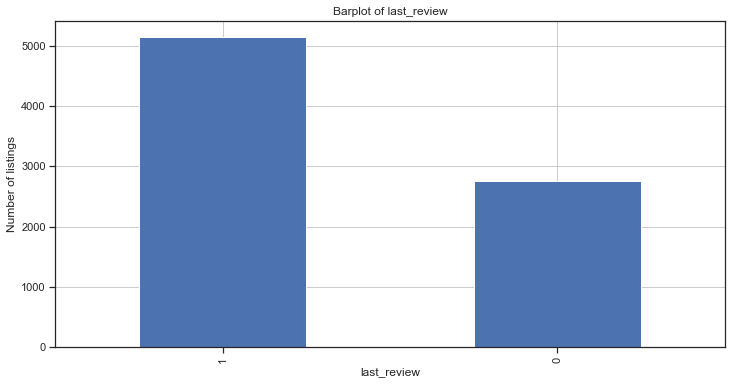

In [871]:
airbnb_data_impute_mtd_4.last_review.value_counts().plot.bar(figsize=(12,6))
plt.xlabel('last_review')
plt.ylabel('Number of listings')
plt.title('Barplot of last_review')
plt.grid(True)
plt.show()

### Decision on the Ideal Method to handle Missing Values in last_review Variable (Categorical Variable)

After trying all the different above methods to handle Missing Values in last_review Variable, I decided to use Capturing Missing Values in a Bespoke Category to handle Missing Values in last_review Variable.


### Handling Missing Values in reviews_per_month Variable (Numerical Variable)

Since reviews_per_month Variable is a numerical variable, there are 6 methods to handle missing values in a Numerical Variable. 

### Method 1: Removing Observations with Missing Data

Complete Case Analysis (CCA), also called list-wise deletion of cases, consists of discarding those observations where the values in any of the variables are missing. CCA can be applied to categorical and numerical variables. CCA is quick and easy to implement and has the advantage that it preserves the distribution of the variables, provided the data is missing at random and only a small proportion of the data is missing. However, if data is missing across many variables, CCA may lead to the removal of a big portion of the dataset.

In [872]:
# make a copy of the dataframe to store the result for this method of handling missing values in reviews_per_month variable

airbnb_data_impute_mtd_1 = airbnb_data.copy()

In [873]:
# create a complete case data set, indicate the variable "reviews_per_month" that we would like the complete
airbnb_data_cca = airbnb_data_impute_mtd_1.dropna(subset=['reviews_per_month'])

In [874]:
print('Number of total observations: {}'.format(len(airbnb_data)))
print('Number of observations with complete cases in reviews_per_month Variable: {}'.format(len(airbnb_data_cca)))

Number of total observations: 7907
Number of observations with complete cases in reviews_per_month Variable: 5149


In [875]:
# check that there are no more null values in reviews_per_month variable 
airbnb_data_cca.isnull().sum()

id                                0
name                              1
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Method 2: Performing Mean Imputation

Mean imputation consists of replacing missing values with the variable mean. This method can only be performed in numerical variables. 

Note that using Mean Imputation may distort the distribution of the original variables.

Suitable to use Mean Imputation for Normally Distributed Variables.

In [876]:
# make a copy of the dataframe to store the result for this method of handling missing values in reviews_per_month variable

airbnb_data_impute_mtd_2 = airbnb_data.copy()

In [877]:
# Viewing imputation value (i.e. mean value of reviews_per_month column)
airbnb_data_impute_mtd_2['reviews_per_month'].mean()

1.0436686735288356

In [878]:
# reviews_per_month column: fill in null values with mean value of reviews_per_month column
airbnb_data_impute_mtd_2['reviews_per_month'] = airbnb_data_impute_mtd_2['reviews_per_month'].fillna(airbnb_data_impute_mtd_2['reviews_per_month'].mean())
airbnb_data_impute_mtd_2['reviews_per_month'] = airbnb_data_impute_mtd_2['reviews_per_month'].astype(float)

In [879]:
# check that null values in reviews_per_month variable were replaced
airbnb_data_impute_mtd_2.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

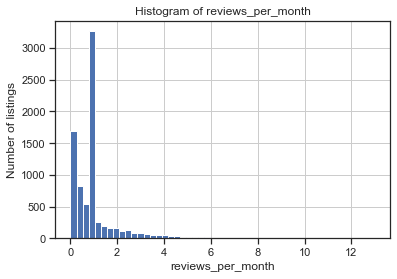

In [880]:
# Distribution of reviews_per_month variable after imputation

plt.hist(airbnb_data_impute_mtd_2['reviews_per_month'], bins=50)
plt.xlabel('reviews_per_month')
plt.ylabel('Number of listings') 
plt.title('Histogram of reviews_per_month')
plt.grid(True)

plt.show()

### Method 3: Performing Median Imputation

Median imputation consists of replacing missing values with the variable median. This method can only be performed in numerical variables. 

Note that using Median Imputation may distort the distribution of the original variables.

In [881]:
# make a copy of the dataframe to store the result for this method of handling missing values in reviews_per_month variable

airbnb_data_impute_mtd_3 = airbnb_data.copy()

In [882]:
# Viewing imputation value (ie. median value of reviews_per_month column)
airbnb_data_impute_mtd_3['reviews_per_month'].median()

0.55

In [883]:
# reviews_per_month column: fill in null values with median value of reviews_per_month column
airbnb_data_impute_mtd_3['reviews_per_month'] = airbnb_data_impute_mtd_3['reviews_per_month'].fillna(airbnb_data_impute_mtd_3['reviews_per_month'].median())
airbnb_data_impute_mtd_3['reviews_per_month'] = airbnb_data_impute_mtd_3['reviews_per_month'].astype(float)

In [884]:
# check that null values in reviews_per_month variable were replaced
airbnb_data_impute_mtd_3.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

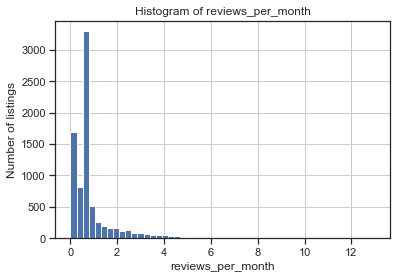

In [885]:
# Distribution of reviews_per_month variable after imputation

plt.hist(airbnb_data_impute_mtd_3['reviews_per_month'], bins=50)
plt.xlabel('reviews_per_month')
plt.ylabel('Number of listings') 
plt.title('Histogram of reviews_per_month')
plt.grid(True)

plt.show()

### Method 4: Replacing Missing Values by an Arbitrary Number

Arbitrary number means choosing any number that you would want for any reason you deem meaningful.  

Arbitrary number imputation consists of replacing missing values with an arbitrary value. Some commonly used values include 999, 9999, or -1 for positive distributions. This method is suitable for numerical variables. 

When replacing missing values with an arbitrary number, we need to be careful not to select a value close to the mean or the median, or any other common value of the distribution.

For Numerical Variables, the original variable distribution is likely distorted, thus this method is mostly used when...

- Data is not missing at random
- Building Non-Linear Models
- Percentage of Missing Values is High

In [886]:
# make a copy of the dataframe to store the result for this method of handling missing values in reviews_per_month variable

airbnb_data_impute_mtd_4 = airbnb_data.copy()

In [887]:
# reviews_per_month column: fill in null values with the arbitrary number of 0
airbnb_data_impute_mtd_4['reviews_per_month'] = airbnb_data_impute_mtd_4['reviews_per_month'].fillna(0)
airbnb_data_impute_mtd_4['reviews_per_month'] = airbnb_data_impute_mtd_4['reviews_per_month'].astype(float)

In [888]:
# check that null values in reviews_per_month variable were replaced
airbnb_data_impute_mtd_4.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

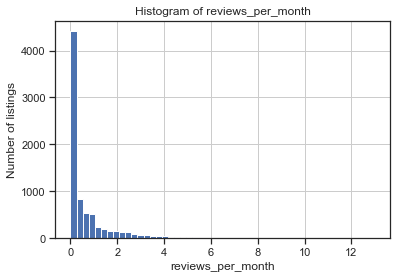

In [889]:
# Distribution of reviews_per_month variable after imputation

plt.hist(airbnb_data_impute_mtd_4['reviews_per_month'], bins=50)
plt.xlabel('reviews_per_month')
plt.ylabel('Number of listings') 
plt.title('Histogram of reviews_per_month')
plt.grid(True)

plt.show()

### Method 5: Replacing Missing Values by a Value at the End of the Distribution

Replacing missing values with a value at the end of the variable distribution is equivalent to replacing them with an arbitrary value, but instead of identifying the arbitrary values manually, these values are automatically selected as those at the very end of the variable distribution. 

Note that End-of-tail imputation may distort the distribution of the original variables, so it may not be suitable for linear models.

In [890]:
# make a copy of the dataframe to store the result for this method of handling missing values in reviews_per_month variable

airbnb_data_impute_mtd_5 = airbnb_data.copy()

In [891]:
# reviews_per_month column: fill in null values with the value at the End of the Distribution of 13
airbnb_data_impute_mtd_5['reviews_per_month'] = airbnb_data_impute_mtd_5['reviews_per_month'].fillna(13)
airbnb_data_impute_mtd_5['reviews_per_month'] = airbnb_data_impute_mtd_5['reviews_per_month'].astype(float)

In [892]:
# check that null values in reviews_per_month variable were replaced
airbnb_data_impute_mtd_5.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

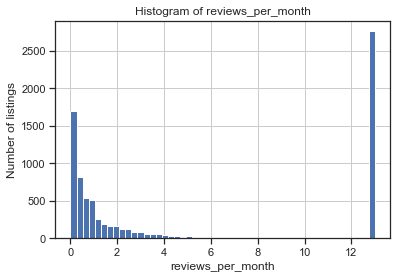

In [893]:
# Distribution of reviews_per_month variable after imputation

plt.hist(airbnb_data_impute_mtd_5['reviews_per_month'], bins=50)
plt.xlabel('reviews_per_month')
plt.ylabel('Number of listings') 
plt.title('Histogram of reviews_per_month')
plt.grid(True)

plt.show()

### Method 6: Converting values into binary codes 0 (no reviews_per_month) and 1 (has reviews_per_month)

In [894]:
# make a copy of the dataframe to store the result for this method of handling missing values in reviews_per_month variable

airbnb_data_impute_mtd_6 = airbnb_data.copy()

In [895]:
# Viewing values in reviews_per_month column
airbnb_data_impute_mtd_6['reviews_per_month']

0       0.01
1       0.28
2       0.20
3       0.15
4       0.22
        ... 
7902     NaN
7903     NaN
7904     NaN
7905     NaN
7906     NaN
Name: reviews_per_month, Length: 7907, dtype: float64

In [896]:
# reviews_per_month column: replace reviews_per_month with 1 and replace NaN with 0
airbnb_data_impute_mtd_6.loc[airbnb_data_impute_mtd_6["reviews_per_month"].notnull(),'reviews_per_month'] = 1
airbnb_data_impute_mtd_6.loc[airbnb_data_impute_mtd_6["reviews_per_month"].isna(),'reviews_per_month'] = 0
airbnb_data_impute_mtd_6['reviews_per_month'] = airbnb_data_impute_mtd_6['reviews_per_month'].astype(float)

In [897]:
# Viewing values in reviews_per_month column after converting values into binary codes
airbnb_data_impute_mtd_6['reviews_per_month']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
7902    0.0
7903    0.0
7904    0.0
7905    0.0
7906    0.0
Name: reviews_per_month, Length: 7907, dtype: float64

In [898]:
# check that there are no more null values in reviews_per_month variable
airbnb_data_impute_mtd_6.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

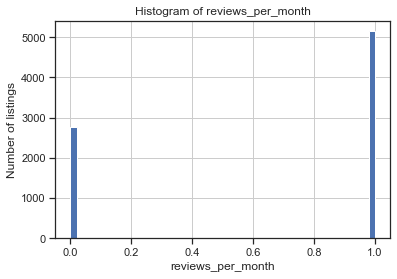

In [899]:
# Distribution of reviews_per_month variable after converting values into binary codes

plt.hist(airbnb_data_impute_mtd_6['reviews_per_month'], bins=50)
plt.xlabel('reviews_per_month')
plt.ylabel('Number of listings') 
plt.title('Histogram of reviews_per_month')
plt.grid(True)

plt.show()

### Decision on the Ideal Method to handle Missing Values in reviews_per_month Variable (Numerical Variable)

After trying all the different above methods to handle Missing Values in reviews_per_month Variable, I decided to Replace Missing Values by an Arbitrary Number of 0 to handle Missing Values in reviews_per_month Variable.

### Final Confirmed Missing Value Imputation Method for name, last_review and reviews_per_month Variables

In [900]:
# For Missing Values in name Variable (Using Capturing Missing Values in a Bespoke Category - Missing)

In [901]:
# Distribution of name variable before imputation

airbnb_data.name.value_counts()

Luxury hostel with in-cabin locker - Single mixed     13
Studio Apartment - Oakwood Premier                     9
Inviting & Cozy 1BR APT 3 mins from Tg Pagar MRT       9
Stylish 1BR Located 7 mins from Tg Pagar MRT           8
City-located 1BR loft apartment *BRAND NEW*            8
                                                      ..
Boonlay 16sqm Cosy Master Room for Rent                1
Tanjong Pagar Pristine Studio Apartment                1
lavLoftbed *RmT, no-sharing, wifi, mrt                 1
Newly furnished spacious room                          1
Amazing room with private bathroom walk to Orchard     1
Name: name, Length: 7457, dtype: int64

In [902]:
# name column: fill in null values with Missing 
airbnb_data['name'] = airbnb_data['name'].fillna('Missing')

In [903]:
# check that null values in name variable were replaced
airbnb_data.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [904]:
# Count of each category in name variable after imputation

airbnb_data.name.value_counts()

Luxury hostel with in-cabin locker - Single mixed     13
Inviting & Cozy 1BR APT 3 mins from Tg Pagar MRT       9
Studio Apartment - Oakwood Premier                     9
Superhost 1BR APT in the heart of Tg Pagar             8
Tasteful & Cozy 1 BR near SGH/Tiong Bahru              8
                                                      ..
Boonlay 16sqm Cosy Master Room for Rent                1
Tanjong Pagar Pristine Studio Apartment                1
lavLoftbed *RmT, no-sharing, wifi, mrt                 1
Newly furnished spacious room                          1
Amazing room with private bathroom walk to Orchard     1
Name: name, Length: 7458, dtype: int64

In [905]:
# For Missing Values in last_review Variable (Using Capturing Missing Values in a Bespoke Category - N.A)

In [906]:
# Distribution of last_review variable before imputation

airbnb_data.last_review.value_counts()

2019-08-12    152
2019-08-11    128
2019-08-13    110
2019-08-10     87
2019-08-08     78
             ... 
2016-12-03      1
2016-01-18      1
2016-07-27      1
2017-08-19      1
2019-03-22      1
Name: last_review, Length: 1001, dtype: int64

In [907]:
# last_review column: fill in null values with N.A 
airbnb_data['last_review'] = airbnb_data['last_review'].fillna('N.A')

In [908]:
# check that null values in last_review variable were replaced
airbnb_data.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [909]:
# Count of each category in last_review variable after imputation

airbnb_data.last_review.value_counts()

N.A           2758
2019-08-12     152
2019-08-11     128
2019-08-13     110
2019-08-10      87
              ... 
2016-12-03       1
2016-01-18       1
2016-07-27       1
2017-08-19       1
2019-03-22       1
Name: last_review, Length: 1002, dtype: int64

In [910]:
# For Missing Values in reviews_per_month Variable (Using Replacing Missing Values by an Arbitrary Number of 0)

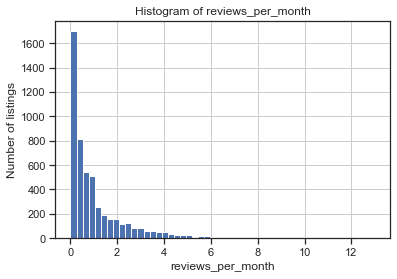

In [911]:
# Distribution of reviews_per_month variable before imputation

plt.hist(airbnb_data['reviews_per_month'].dropna(), bins=50)
plt.xlabel('reviews_per_month')
plt.ylabel('Number of listings') 
plt.title('Histogram of reviews_per_month')
plt.grid(True)

plt.show()

In [912]:
# reviews_per_month column: fill in null values with the arbitrary number of 0
airbnb_data['reviews_per_month'] = airbnb_data['reviews_per_month'].fillna(0)
airbnb_data['reviews_per_month'] = airbnb_data['reviews_per_month'].astype(float)

In [913]:
# check that null values in reviews_per_month variable were replaced
airbnb_data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

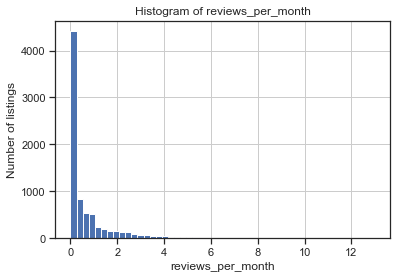

In [914]:
# Distribution of reviews_per_month variable after imputation

plt.hist(airbnb_data['reviews_per_month'], bins=50)
plt.xlabel('reviews_per_month')
plt.ylabel('Number of listings') 
plt.title('Histogram of reviews_per_month')
plt.grid(True)

plt.show()

### 2.2.2. Feature Engineering

### a. id Variable

#### Determining Cardinality in id Variable

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [915]:
# Viewing the number of unique values in id variable
airbnb_data.id.nunique()

# Note: nunique() ignores missing data by default

7907

In [916]:
# To consider missing values as an additional category,
# we need to explicitly mention so, 
# passing the argument dropna=False

airbnb_data.id.nunique(dropna=False)

7907

Text(0.5, 1.0, 'Cardinality')

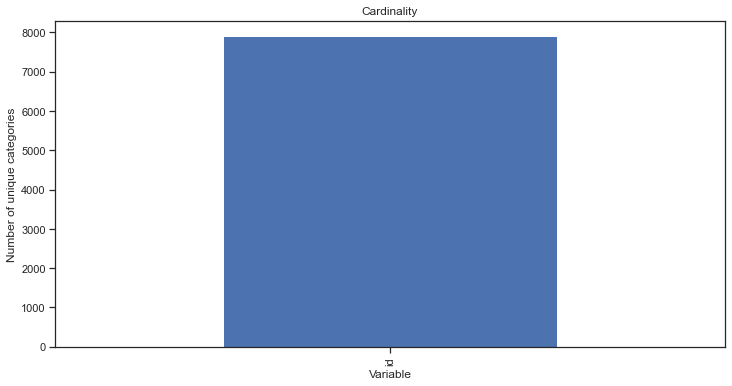

In [917]:
# Plotting cardinality of id variable 

airbnb_data[['id']].nunique().plot.bar(figsize=(12,6))

# add labels and title
plt.ylabel('Number of unique categories')
plt.xlabel('Variable')
plt.title('Cardinality')

From the results above, id variable has very high cardinality with 7907 unique categories.

### An extra observation on id Variable

Since id variable has the same number of unique categories as the number of rows of listing records in listings.csv of 7907, it means that id variable has a unique category in each row of listing record in listings.csv.

#### Inspecting Unique Categories in id Variable (repeated for ease of viewing)

In [918]:
airbnb_data['id'].sort_values().unique()

array([   49091,    50646,    56334, ..., 38109336, 38110493, 38112762],
      dtype=int64)

From the results above, id variable has too many unique categories such that the result of the above code cannot be printed out fully. (i.e. I cannot inspect all the unique categories in id variable)

### Dropping id Column

From all the above results, I decided to drop id Column. This is because...

1. I found out that there are too many unique values in id Column - id variable has very high cardinality with 7907 unique categories. This would result in algorithms being prone to overfitting or being unable to score an observation. 


2. In addition, according to the data dictionary of listings.csv provided in the Machine Learning Assignment 1 Brief, id variable only contains the listing ID. With that, the sole purpose of id variable is only to help uniquely identify each row of listing record in listings.csv. In relation to this Machine Learning Assignment 1 dataset's regression problem, id is just an irrelevant feature. Thus, I do not think that the id variable would be of any help to predict the rental price of a listed Airbnb property. (i.e. I think that there would not be any relationship or there may be close to 0 relationship between id variable and the target variable - price variable)

In [919]:
# Dropping id Column
airbnb_data = airbnb_data.drop(['id'], axis = 1)

# Viewing the result of the dropping of id Column
airbnb_data.head()

name  host_id  host_name  \
0    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1      Pleasant Room along Bukit Timah   227796    Sujatha   
2                          COZICOMFORT   266763  Francesca   
3  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               9               353  
4                               9               355

### b. name Variable

#### Determining Cardinality in name Variable

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [920]:
# Viewing the number of unique values in name variable
airbnb_data.name.nunique()

# Note: nunique() ignores missing data by default

7458

In [921]:
# To consider missing values as an additional category,
# we need to explicitly mention so, 
# passing the argument dropna=False

airbnb_data.name.nunique(dropna=False)

7458

Text(0.5, 1.0, 'Cardinality')

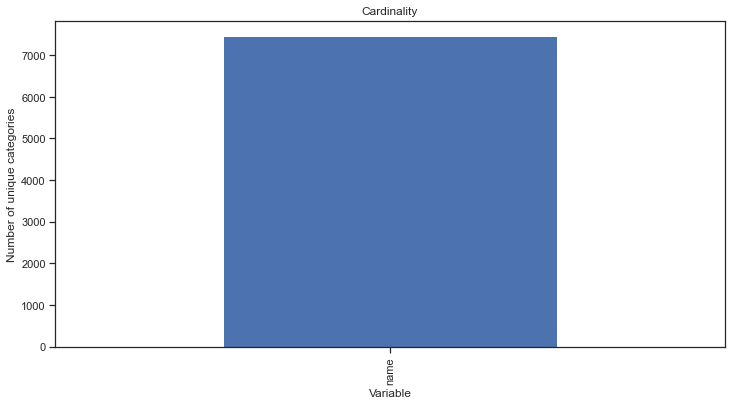

In [922]:
# Plotting cardinality of id variable 

airbnb_data[['name']].nunique().plot.bar(figsize=(12,6))

# add labels and title
plt.ylabel('Number of unique categories')
plt.xlabel('Variable')
plt.title('Cardinality')

From the results above, name variable has very high cardinality with 7458 unique categories.

### An extra observation on name Variable

Even though name variable has very high cardinality with 7458 unique categories, name variable does not uniquely identify each row of listing record in listings.csv. 

In order to uniquely identify each row of listing record in listings.csv, name variable needs to have the same number of unique categories as the number of rows of records in listings.csv of 7907.

Since name variable has only 7458 unique categories out of the possible 7907 unique categories, it means that some of the names of listings are repeated.

To further back up my conclusion that name variable does not uniquely identify each row of listing record in listings.csv, the data dictionary of listings.csv provided in the Machine Learning Assignment 1 Brief also states that name variable contains the name of listing. It does not state that name variable contains the unique name of listings.

Therefore, I can conclude that name variable does not uniquely identify each row of listing record in listings.csv.

#### Inspecting Unique Categories in name Variable (repeated for ease of viewing)

In [923]:
airbnb_data['name'].sort_values().unique()

array(['!! CozyRoom@City Center,Little India,FarrerParkMRT',
       '!!!2BR ART Apartment near shopping mall Katong ON5',
       '!!!2BR Amazing Apartment Phenthouse @ Katong ON7', ...,
       '高级公寓｡交通四方八达｡饮食天堂｡二十四小时超市｡',
       'ｵｰﾁｬｰﾄﾞﾛｰﾄﾞｴﾘｱ!ﾌｨｯﾄﾈｽ設備!無料wifi!ｽﾀｲﾘｯｼｭなｺﾝﾄﾞﾐﾆｱﾑ',
       'ｼﾃｨｰに近くて閑静な住宅街｡ いつもｷﾚｲでﾋﾟｯｶﾋﾟｶ｡'], dtype=object)

### Disadvantage of name Variable

According to the result above on the unique categories in name variable, even though the name variable contains the name of the listing as stated in the data dictionary of listings.csv provided in the Machine Learning Assignment 1 Brief, the name variable does not have a standardise format for the name of each listing. 

From the above results, the name of the each listing may: 

1. be of another language such as Mandarin or Japanese 

2. contain symbols such as '!' , '@'

3. contain shortforms such as 'BR' that represents bedroom

4. not be of a proper sentence


### Filtering out rows in airbnb_data where values in name Variable are not in English language

As mentioned earlier, values in name variable may not be in English Language. With that, I am going to filter out rows in airbnb_data where values in name Variable are not in English language.

I am doing this because...

1. Firstly, I do not know how to translate sentences from other languages to english language by coding. With that, I do not know how to even use pandas to translate sentences from other languages to english language. This is because I have not be taught on how to translate sentences from other languages to english language.


2. Secondly, with my knowledge in coding, I think it would be very troublesome to translate sentences from other languages to english language by coding. To translate sentences from other languages to english language by coding, I need to create a dictionary to map each other languages' characters to english words. It would be very time-consuming. In addition, the processing speed of the computer will slowed down even more due to the long lines of codes from the hard coding of mapping each other languages' characters to english words.

Thus, I think the best and fastest way to handle values that are not english language in name variable is to just exclude out these rows of data.

In [924]:
# Defining function to filter rows from a pandas DataFrame where a specified column contains values that only contain english characters.
    
def filter_english_characters(df, column_name):
    
  english_pattern = re.compile(r"[A-Za-z0-9\s.,!?;-@#$%^&*()-_+={}|\:''""<>/]+")

  def is_english_characters(text):
    return bool(english_pattern.fullmatch(text))

  return df[df[column_name].apply(is_english_characters)]

In [925]:
# Filter the airbnb_data Dataframe to include rows with only english characters in name column
airbnb_data_filtered = filter_english_characters(airbnb_data.copy(), 'name')

# Viewing the result of the filtering of name column to include rows with only english characters
airbnb_data_filtered['name'].sort_values().unique()

array(['!! CozyRoom@City Center,Little India,FarrerParkMRT',
       '!!!2BR ART Apartment near shopping mall Katong ON5',
       '!!!2BR Amazing Apartment Phenthouse @ Katong ON7', ...,
       'wonderland apartment', 'yishun 657 opp ktph near mrt',
       'your serviced room in town!'], dtype=object)

### Exploring the Filtered Dataset

In [926]:
# Displaying first 5 rows
airbnb_data_filtered.head()

name  host_id  host_name  \
0    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1      Pleasant Room along Bukit Timah   227796    Sujatha   
2                          COZICOMFORT   266763  Francesca   
3  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               9               353  
4                               9               355

In [927]:
# Viewing last 5 rows
airbnb_data_filtered.tail()

name    host_id host_name  \
7902  Loft 2 pax near Haw Par / Pasir Panjang. Free ...  278109833     Belle   
7903                         3bedroom luxury at Orchard  238891646      Neha   
7904    [ Farrer Park ] New City Fringe CBD Mins to MRT  281448565     Mindy   
7905          Cheap Master Room in Central of Singapore  243835202     Huang   
7906  Amazing room with private bathroom walk to Orc...   28788520   Terence   

     neighbourhood_group neighbourhood  latitude  longitude        room_type  \
7902      Central Region    Queenstown   1.27973  103.78751  Entire home/apt   
7903      Central Region       Tanglin   1.29269  103.82623  Entire home/apt   
7904      Central Region       Kallang   1.31286  103.85996     Private room   
7905      Central Region  River Valley   1.29543  103.83801     Private room   
7906      Central Region  River Valley   1.29672  103.83325     Private room   

      price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
7902    100               3                  0         N.A                0.0   
7903    550               6                  0         N.A                0.0   
7904     58              30                  0         N.A                0.0   
7905     56              14                  0         N.A                0.0   
7906     65              90                  0         N.A                0.0   

      calculated_host_listings_count  availability_365  
7902                              31                61  
7903                              34               365  
7904                               3               173  
7905                               2                30  
7906                               7               365

#### Basic Summary of the Filtered Dataset

In [928]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(airbnb_data_filtered.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(airbnb_data_filtered.size)   

(6928, 15)
103920


#### In-depth Overview of the Filtered Dataset

In [929]:
# Viewing the number of items and data type of each column
airbnb_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6928 entries, 0 to 7906
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            6928 non-null   object 
 1   host_id                         6928 non-null   int64  
 2   host_name                       6928 non-null   object 
 3   neighbourhood_group             6928 non-null   object 
 4   neighbourhood                   6928 non-null   object 
 5   latitude                        6928 non-null   float64
 6   longitude                       6928 non-null   float64
 7   room_type                       6928 non-null   object 
 8   price                           6928 non-null   int64  
 9   minimum_nights                  6928 non-null   int64  
 10  number_of_reviews               6928 non-null   int64  
 11  last_review                     6928 non-null   object 
 12  reviews_per_month               69

### Advantage of name Variable

However, even with the disadvantages, I feel like there are some parts of each name of listing that I think would contain useful information in predicting the rental price of a listed Airbnb property. 

Therefore, I will be creating new columns based on the values in name column.

### Creating new columns based on the values in name Column

#### 1. cozy? Column

In [930]:
# Defining function to find all occurrences of the word "Cozy" and its variants in a specified column of a pandas DataFrame.
def find_cozy_variants(df, column_name):
    
    # Defining a regular expression for searching variants of "Cozy"
    cozy_pattern = re.compile(r"(Cos|Coz|Cozy|Cosy|Comfortable|Warm)", re.IGNORECASE)
    
    # function to check if each column_name values contains any "Cozy" variants.
    def has_cozy_variant(column_name):
        return bool(cozy_pattern.search(column_name))
    
    # Creating a new column named 'cozy?' to store the results (1 for has_cozy_variant, 0 otherwise)
    df['cozy?'] = df[column_name].apply(lambda column_name: 1 if has_cozy_variant(column_name) else 0)
    
    return df

In [931]:
airbnb_data = find_cozy_variants(airbnb_data_filtered.copy(), 'name')

# Viewing the result of the creation of cozy? column
airbnb_data.head()

name  host_id  host_name  \
0    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1      Pleasant Room along Bukit Timah   227796    Sujatha   
2                          COZICOMFORT   266763  Francesca   
3  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  cozy?  
0                               2               365      1  
1                               1               365      0  
2                               2               365      1  
3                               9               353      0  
4                               9               355      0

#### 2. near_mrt? Column

In [932]:
# Defining function to find all occurrences of the word "mrt" and its variants in a specified column of a pandas DataFrame.
def find_mrt_variants(df, column_name):
    
    # Defining a regular expression for searching variants of "mrt"
    mrt_pattern = re.compile(r"(mrt|metro|subway)", re.IGNORECASE)
    
    # function to check if each column_name values contains any "mrt" variants.
    def has_mrt_variant(column_name):
        return bool(mrt_pattern.search(column_name))
    
    # Creating a new column named 'near_mrt?' to store the results (1 for has_mrt_variant, 0 otherwise)
    df['near_mrt?'] = df[column_name].apply(lambda column_name: 1 if has_mrt_variant(column_name) else 0)
    
    return df

In [933]:
airbnb_data = find_mrt_variants(airbnb_data.copy(), 'name')

# Viewing the result of the creation of near_mrt? column
airbnb_data.head()

name  host_id  host_name  \
0    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1      Pleasant Room along Bukit Timah   227796    Sujatha   
2                          COZICOMFORT   266763  Francesca   
3  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  cozy?  near_mrt?  
0                               2               365      1          0  
1                               1               365      0          0  
2                               2               365      1          0  
3                               9               353      0          0  
4                               9               355      0          0

#### 3. new? Column

In [934]:
# Defining function to find all occurrences of the word "new" and its variants in a specified column of a pandas DataFrame.
def find_new_variants(df, column_name):
    
    # Defining a regular expression for searching variants of "new"
    new_pattern = re.compile(r"(new|newly)", re.IGNORECASE)
    
    # function to check if each column_name values contains any "new" variants.
    def has_new_variant(column_name):
        return bool(new_pattern.search(column_name))
    
    # Creating a new column named 'new?' to store the results (1 for has_new_variant, 0 otherwise)
    df['new?'] = df[column_name].apply(lambda column_name: 1 if has_new_variant(column_name) else 0)
    
    return df

In [935]:
airbnb_data = find_new_variants(airbnb_data.copy(), 'name')

# Viewing the result of the creation of new? column
airbnb_data.head()

name  host_id  host_name  \
0    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1      Pleasant Room along Bukit Timah   227796    Sujatha   
2                          COZICOMFORT   266763  Francesca   
3  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  cozy?  near_mrt?  new?  
0                               2               365      1          0     0  
1                               1               365      0          0     0  
2                               2               365      1          0     0  
3                               9               353      0          0     0  
4                               9               355      0          0     0

#### 4. within_distance_of_something? Column

In [936]:
# Defining function to find all occurrences of the word "near" and its variants in a specified column of a pandas DataFrame.
def find_near_variants(df, column_name):
    
    # Defining a regular expression for searching variants of "near"
    near_pattern = re.compile(r"(near|nearby|minutes|mins|walk|walking|next|within|across|close)", re.IGNORECASE)
    
    # function to check if each column_name values contains any "near" variants.
    def has_near_variant(column_name):
        return bool(near_pattern.search(column_name))
    
    # Creating a new column named 'within_distance_of_something?' to store the results (1 for has_near_variant, 0 otherwise)
    df['within_distance_of_something?'] = df[column_name].apply(lambda column_name: 1 if has_near_variant(column_name) else 0)
    
    return df

In [937]:
airbnb_data = find_near_variants(airbnb_data.copy(), 'name')

# Viewing the result of the creation of within_distance_of_something? column
airbnb_data.head()

name  host_id  host_name  \
0    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1      Pleasant Room along Bukit Timah   227796    Sujatha   
2                          COZICOMFORT   266763  Francesca   
3  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  cozy?  near_mrt?  new?  \
0                               2               365      1          0     0   
1                               1               365      0          0     0   
2                               2               365      1          0     0   
3                               9               353      0          0     0   
4                               9               355      0          0     0   

   within_distance_of_something?  
0                              0  
1                              0  
2                              0  
3                              1  
4                              1

### Dropping name Column

After creating new columns based on the values in name column, I decided to drop name Column. This is because...

1. As mentioned earlier, there are too many unique values in name Column - name variable has very high cardinality with 7458 unique categories before filtering. This would result in algorithms being prone to overfitting or being unable to score an observation. 


2. In addition, according to the data dictionary of listings.csv provided in the Machine Learning Assignment 1 Brief, name variable only contains the name of listing. This explains the very long listing names for each name value in name variable. With very long values, it is not easy to visualise the data.


3. Lastly, in relation to this Machine Learning Assignment 1 dataset's regression problem, after creating new columns based on the values in name column, name is just an irrelevant feature. Thus, I do not think that the name variable would be of any help to predict the rental price of a listed Airbnb property. (i.e. I think that there would not be any relationship or there may be close to 0 relationship between name variable and the target variable - price variable)


In [938]:
# Dropping name Column
airbnb_data = airbnb_data.drop(['name'], axis = 1)

# Viewing the result of the dropping of name Column
airbnb_data.head()

host_id  host_name neighbourhood_group neighbourhood  latitude  longitude  \
0   266763  Francesca        North Region     Woodlands   1.44255  103.79580   
1   227796    Sujatha      Central Region   Bukit Timah   1.33235  103.78521   
2   266763  Francesca        North Region     Woodlands   1.44246  103.79667   
3   367042    Belinda         East Region      Tampines   1.34541  103.95712   
4   367042    Belinda         East Region      Tampines   1.34567  103.95963   

      room_type  price  minimum_nights  number_of_reviews last_review  \
0  Private room     83             180                  1  2013-10-21   
1  Private room     81              90                 18  2014-12-26   
2  Private room     69               6                 20  2015-10-01   
3  Private room    206               1                 14  2019-08-11   
4  Private room     94               1                 22  2019-07-28   

   reviews_per_month  calculated_host_listings_count  availability_365  cozy?  \
0               0.01                               2               365      1   
1               0.28                               1               365      0   
2               0.20                               2               365      1   
3               0.15                               9               353      0   
4               0.22                               9               355      0   

   near_mrt?  new?  within_distance_of_something?  
0          0     0                              0  
1          0     0                              0  
2          0     0                              0  
3          0     0                              1  
4          0     0                              1

### c. host_id and host_name Variables

#### Determining Cardinality in host_id and host_name Variables

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

#### host_id Variable

In [939]:
# Viewing the number of unique values in host_id variable
airbnb_data.host_id.nunique()

# Note: nunique() ignores missing data by default

2518

In [940]:
# To consider missing values as an additional category,
# we need to explicitly mention so, 
# passing the argument dropna=False

airbnb_data.host_id.nunique(dropna=False)

2518

Text(0.5, 1.0, 'Cardinality')

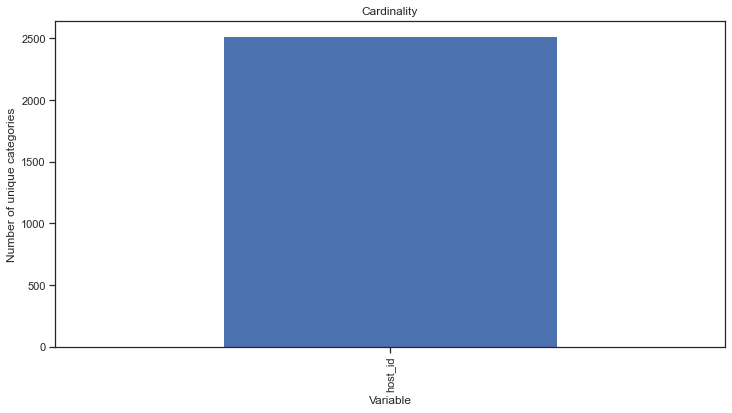

In [941]:
# Plotting cardinality of host_id variable 

airbnb_data[['host_id']].nunique().plot.bar(figsize=(12,6))

# add labels and title
plt.ylabel('Number of unique categories')
plt.xlabel('Variable')
plt.title('Cardinality')

From the results above, host_id variable has very high cardinality with 2518 unique categories.

### An extra observation on host_id Variable

After comparing the number of unique categories in host_id variable to the number of rows of records of the filtered listings.csv dataset, I realised that the number of unique categories in host_id variable does not tally with the number of rows of records of the filtered listings.csv dataset.

The number of unique categories in host_id variable is 2518 while the number of rows of records of the filtered listings.csv dataset is 6928.

With a different number of unique categories in host_id variable compared to the number of rows of records of the filtered listings.csv dataset, it means that most of the host_id values in host_id variable are repeated in the filtered listings.csv dataset.

However, it is not an error.

It just means that most of the hosts has more than 1 Airbnb property listed.

#### host_name Variable

In [942]:
# Viewing the number of unique values in host_name variable
airbnb_data.host_name.nunique()

# Note: nunique() ignores missing data by default

1723

In [943]:
# To consider missing values as an additional category,
# we need to explicitly mention so, 
# passing the argument dropna=False

airbnb_data.host_name.nunique(dropna=False)

1723

Text(0.5, 1.0, 'Cardinality')

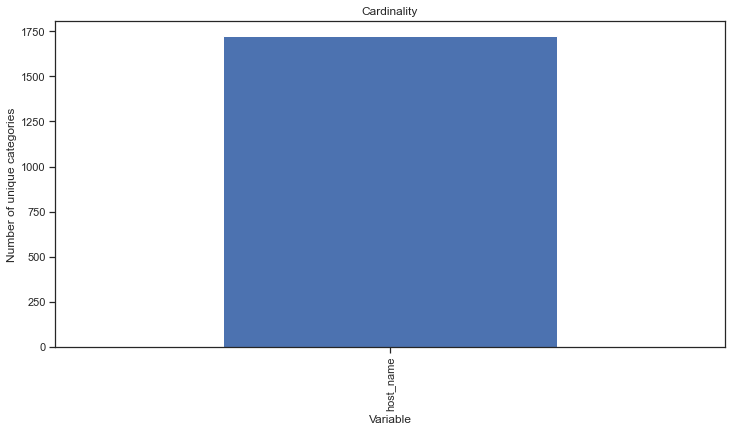

In [944]:
# Plotting cardinality of host_name variable 

airbnb_data[['host_name']].nunique().plot.bar(figsize=(12,6))

# add labels and title
plt.ylabel('Number of unique categories')
plt.xlabel('Variable')
plt.title('Cardinality')

From the results above, host_name variable has very high cardinality with 1723 unique categories.

### An extra observation on host_name Variable

After comparing the number of unique categories in host_name variable to the number of unique categories in host_id variable, I realised that the number of unique categories in host_name variable does not tally with the number of unique categories in host_id variable.

The number of unique categories in host_name variable is 1723 while the the number of unique categories in host_id variable is 2518.

With a different number of unique categories in host_name variable compared to the number of unique categories in host_id variable, it means that there is a repeat of host_name values in host_name variable in the filtered listings.csv dataset.

However, it is not an error.

It just means that there are multiple people with different host_id value having the same host_name value. In real life, it is possible for different people to have the same name.

#### Inspecting Unique Categories in host_id and host_name Variables (repeated for ease of viewing)

In [945]:
# For Varible 'host_id'
airbnb_data['host_id'].sort_values().unique()

array([    23666,     59498,    165209, ..., 288249975, 288546201,
       288567551], dtype=int64)

In [946]:
# For Varible 'host_name'
airbnb_data['host_name'].sort_values().unique()

array(['(Email hidden by Airbnb)', '23 Lees', '5footway', ..., '진', '현재',
       'ｼﾝ'], dtype=object)

### Creating a new variable by joining host_id and host_name variables together

I decided to create a new variable by joining host_id and host_name variables together because...

1. According to the data dictionary of listings.csv provided in the Machine Learning Assignment 1 Brief, host_id variable only contains the host IDs while host_name variable only contains the names of each host.


2. However, after futher analysing the dataset in excel, I found out that there are some rows of data which have the same values in host_name variable (such as Zoe) but with different values in host_id variable. This may lead to information loss which would affect the result of the prediction when trying to predict the rental price of a listed Airbnb property in relation to this Machine Learning Assignment 1 dataset's regression problem.


3. Luckily, it is not an error. This is because in real life, it is possible for different people to have the same name.


4. In addition, to further back up my analysis that are indeed some rows of data which have the same values in host_name variable (such as Zoe) but with different values in host_id variable, the number of unique categories in host_name variable is lower than the number of unique categories in host_id variable. The number of unique categories in host_name variable is 1723 while the the number of unique categories in host_id variable is 2518. This was observed a little bit earlier.


5. Since host_name variable does not uniquely identify each host and host_id variable having no meaning for its values other than for host_id variable to contain all the unique host IDs, I decided to create a new variable by joining host_id and host_name variables together.

With the creation of a new variable by joining host_id and host_name variables together, ...

  - I would be able to uniquely identify each host easily as their ids and names are in the same column
  
  
  - the new variable would be of better help to correctly predict the rental price of a listed Airbnb property in relation to 
    this Machine Learning Assignment 1 dataset's regression problem (i.e. I think that there would be a better relationship 
    between the conbined variable and the target variable - price variable)

In [947]:
# Creating a new column named 'host_id_name' by joining host_id and host_name variables together, each separated by an underscore
airbnb_data['host_id_name'] = airbnb_data['host_id'].astype(str) + '_' + airbnb_data['host_name']

# Viewing the result of the creation of host_id_name column
airbnb_data.head()

host_id  host_name neighbourhood_group neighbourhood  latitude  longitude  \
0   266763  Francesca        North Region     Woodlands   1.44255  103.79580   
1   227796    Sujatha      Central Region   Bukit Timah   1.33235  103.78521   
2   266763  Francesca        North Region     Woodlands   1.44246  103.79667   
3   367042    Belinda         East Region      Tampines   1.34541  103.95712   
4   367042    Belinda         East Region      Tampines   1.34567  103.95963   

      room_type  price  minimum_nights  number_of_reviews last_review  \
0  Private room     83             180                  1  2013-10-21   
1  Private room     81              90                 18  2014-12-26   
2  Private room     69               6                 20  2015-10-01   
3  Private room    206               1                 14  2019-08-11   
4  Private room     94               1                 22  2019-07-28   

   reviews_per_month  calculated_host_listings_count  availability_365  cozy?  \
0               0.01                               2               365      1   
1               0.28                               1               365      0   
2               0.20                               2               365      1   
3               0.15                               9               353      0   
4               0.22                               9               355      0   

   near_mrt?  new?  within_distance_of_something?      host_id_name  
0          0     0                              0  266763_Francesca  
1          0     0                              0    227796_Sujatha  
2          0     0                              0  266763_Francesca  
3          0     0                              1    367042_Belinda  
4          0     0                              1    367042_Belinda

### Dropping host_id and host_name Variables

After creating a new variable named 'host_id_name' by joining host_id and host_name variables together, I decided to drop both host_id and host_name variables. This is because...

1. As mentioned earlier, there are too many unique values in host_id and host_names Columns - both host_id and host_name variables have very high cardinality with 2518 and 1723 unique categories respectively after filtering. This would result in algorithms being prone to overfitting or being unable to score an observation. 


2. After creating a new variable named 'host_id_name' by joining host_id and host_name variables together, host_id and host_name varaibles have now each become a repetitive variable. This is because host_id and host_name variables each contain a part of a value of host_id_name variable.


2. Lastly, in relation to this Machine Learning Assignment 1 dataset's regression problem, after creating a new variable named 'host_id_name' by joining host_id and host_name variables together, host_id and host_name are now both an irrelevant feature. Thus, I do not think that the host_id and host_name variables would be of any help to predict the rental price of a listed Airbnb property. (i.e. I think that there would not be any relationship or there may be close to 0 relationship between each host_id and host_name variable and the target variable - price variable)

In [948]:
# Dropping host_id and host_name Columns
airbnb_data = airbnb_data.drop(['host_id', 'host_name'], axis = 1)

# Viewing the result of the dropping of name Column
airbnb_data.head()

neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  cozy?  near_mrt?  new?  \
0                               2               365      1          0     0   
1                               1               365      0          0     0   
2                               2               365      1          0     0   
3                               9               353      0          0     0   
4                               9               355      0          0     0   

   within_distance_of_something?      host_id_name  
0                              0  266763_Francesca  
1                              0    227796_Sujatha  
2                              0  266763_Francesca  
3                              1    367042_Belinda  
4                              1    367042_Belinda

### d. neighbourhood Variable

#### Determining Cardinality in neighbourhood Variable

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [949]:
# Viewing the number of unique values in neighbourhood variable
airbnb_data.neighbourhood.nunique()

# Note: nunique() ignores missing data by default

43

In [950]:
# To consider missing values as an additional category,
# we need to explicitly mention so, 
# passing the argument dropna=False

airbnb_data.neighbourhood.nunique(dropna=False)

43

Text(0.5, 1.0, 'Cardinality')

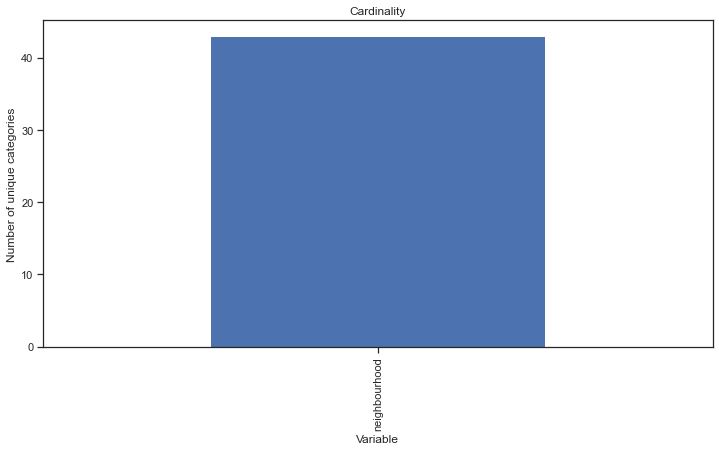

In [951]:
# Plotting cardinality of neighbourhood variable 

airbnb_data[['neighbourhood']].nunique().plot.bar(figsize=(12,6))

# add labels and title
plt.ylabel('Number of unique categories')
plt.xlabel('Variable')
plt.title('Cardinality')

From the results above, region variable has high cardinality with 43 unique categories.

#### Inspecting Unique Categories in neighbourhood Variable (repeated for ease of viewing)

In [952]:
airbnb_data['neighbourhood'].sort_values().unique()

array(['Ang Mo Kio', 'Bedok', 'Bishan', 'Bukit Batok', 'Bukit Merah',
       'Bukit Panjang', 'Bukit Timah', 'Central Water Catchment',
       'Choa Chu Kang', 'Clementi', 'Downtown Core', 'Geylang', 'Hougang',
       'Jurong East', 'Jurong West', 'Kallang', 'Lim Chu Kang', 'Mandai',
       'Marina South', 'Marine Parade', 'Museum', 'Newton', 'Novena',
       'Orchard', 'Outram', 'Pasir Ris', 'Punggol', 'Queenstown',
       'River Valley', 'Rochor', 'Sembawang', 'Sengkang', 'Serangoon',
       'Singapore River', 'Southern Islands', 'Sungei Kadut', 'Tampines',
       'Tanglin', 'Toa Payoh', 'Tuas', 'Western Water Catchment',
       'Woodlands', 'Yishun'], dtype=object)

### An extra observation on neighbourhood Variable

According to the results above, the categories in neighbourhood variable of this dataset contains neighbourhoods that I have heard of before such as Ang Mo Kio, Bedok and much more.

These neighbourhoods that I have heard of before are Singapore's neighbourhoods.

According to the Machine Learning Assignment 1 Brief, the Machine Learning Assignment 1 Brief does not specify whether this dataset is based on Singapore's context.

However, I am just going to assume that this dataset is based on Singapore's context as this dataset contains information that is highly similar to the information about Singapore.

### Further Research

As I had mentioned earlier, I am assuming that this dataset is based on Singapore's context. With that, I decided to conduct some online research about the neighbourhoods in Singapore.

After researching about the neighbourhoods in Singapore online, I found out that there are only 28 neighbourhoods in Singapore and they are:

1. Raffles Place, Marina, Cecil, People’s Park

2. Anson, Tanjong Pagar

3. Tiong Bahru, Queenstown

4. Telok Blangah, Harbourfront

5. Pasir Panjang, Hong Leong Garden, Clementi New Town

6. High Street, Beach Road

7. Middle Road, Golden Mile

8. Little India

9. Orchard, Cairnhill, River Valley

10. Ardmore, Bukit Timah, Holland Road, Tanglin

11. Watten Estate, Novena, Thomson

12. Toa Payoh, Serangoon, Balestier

13. Macpherson, Bradell

14. Geylang, Eunos

15. Joo Chiat, Amber Road, Katong

16. Bedok, Upper East Coast, Eastwood, Kew Drive

17. Changi, Loyang

18. Tampines, Pasir Ris

19. Punggol, Hougang, Serangoon Gardens

20. Ang Mo Kio, Bishan 

21. Upper Bukit Timah, Ulu Pandan, Clementi Park

22. Jurong

23. Choa Chu Kang, Dairy Farm, Hillview, Bukit Panjang

24. Lim Chu Kang, Tengah

25. Kranji, Woodgrove

26. Upper Thomson, Springleaf

27. Sembawang, Yishun

28. Seletar

### Decision on not wanting to Regroup the Categories in neighbourhood variable

After finding out that there are 43 Categories in neighbourhood variable but there are only 28 neighbourhoods in Singapore from my online research, I decided not to Regroup the Categories in neighbourhood variable. This is because...

1. I feel that the categories in neighbourhood variable are good enough to differentiate each sub region.


2. There are some categories in neighbourhood variable that are not present in the list of 28 neighbourhoods in Singapore from my online research (such as Central Water Catchment). With that, I am unsure of where to group these unknown categories with. If I were to Regroup these unknown Categories in neighbourhood variable, I may group these unknown categories into the wrong group. This may affect the result of the prediction when trying to predict the rental price of a listed Airbnb property in relation to this Machine Learning Assignment 1 dataset's regression problem.


3. Lastly, if I were to Regroup the Categories in neighbourhood variable, there would be a present of some incorrect categories in neighbourhood_group variable. These neighbourhood_group catgories would be incorrect as they do not correctly represent the correct region of the updated neighbourhood categories. This may affect the result of the prediction when trying to predict the rental price of a listed Airbnb property in relation to this Machine Learning Assignment 1 dataset's regression problem.

#### Identifying Rare Categories in neighbourhood Variable (repeated for ease of viewing)

In [953]:
# neighbourhood variable

In [954]:
# Calculating frequency for each category

# first we calculate the total number of listings in the dataset
total_listings = len(airbnb_data)
print('Total number of listings {}'.format(total_listings))

# then we calculate label frequency
# value_counts() counts the number of listings per label
# by dividing by total listings we obtain the frequency

label_freq = airbnb_data.neighbourhood.value_counts() / total_listings

# let's inspect the frequency of the labels
label_freq

Total number of listings 6928


Kallang                    0.126155
Geylang                    0.113453
Outram                     0.067263
Rochor                     0.066109
Bukit Merah                0.063366
Downtown Core              0.057592
Novena                     0.051963
Bedok                      0.049798
River Valley               0.049509
Queenstown                 0.036807
Tanglin                    0.026415
Singapore River            0.023672
Marine Parade              0.022373
Orchard                    0.018764
Jurong West                0.018043
Newton                     0.017898
Bukit Timah                0.017754
Jurong East                0.016311
Clementi                   0.014001
Hougang                    0.013712
Toa Payoh                  0.012269
Pasir Ris                  0.009527
Sengkang                   0.009382
Serangoon                  0.009094
Tampines                   0.008949
Woodlands                  0.008805
Bukit Batok                0.008516
Ang Mo Kio                 0

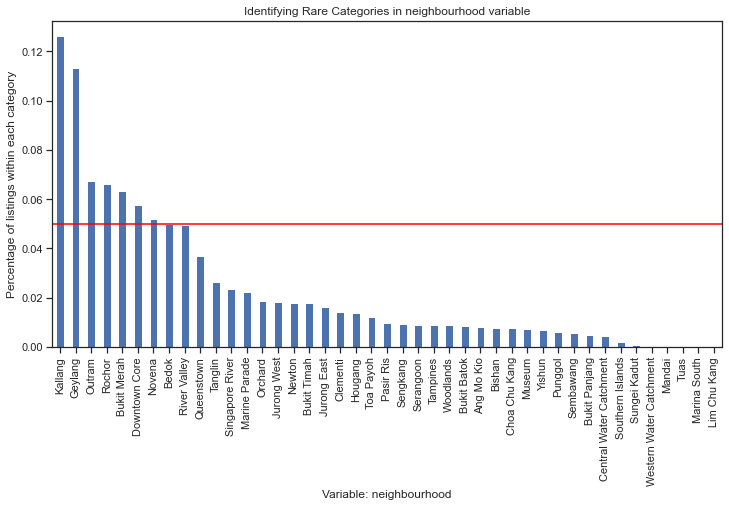

In [955]:
# Making plot with the category frequencies
fig = label_freq.sort_values(ascending=False).plot.bar(figsize=(12,6))

# add a line to signal 5 % frequency limit
# under which we will consider a category as rare
fig.axhline(y=0.05, color='red')

# add axis labels and title
fig.set_ylabel('Percentage of listings within each category')
fig.set_xlabel('Variable: neighbourhood')
fig.set_title('Identifying Rare Categories in neighbourhood variable')
plt.show()

In addition, from the results above, neighbourhood variable has many unique categories that has a frequency of less than 5%.

These unique categories are values which are considered Rare.

#### Rare values

Rare values are those categories that are present only in a small percentage of the observations. There is no rule of thumb to determine how small is a small percentage, but typically, any value below 5 % can be considered rare. 

### A need to handle Rare Categories in neighbourhood variable?

With infrequent labels, it would result in algorithms being prone to overfitting or being unable to score an observation. With that, we need to handle Rare Categories in neighbourhood variable.

### How to handle Rare Categories?

One way to avoid these complications is to group infrequent categories into a new category called Rare or Other.

Therefore, I am going to group all the unique categories in neighbourhood variable which has a frequency of less than 5% together as a single category named 'Rare'.

### Grouping Rare Categories in neighbourhood variable

In [956]:
# function to find all the frequent categories of a variable 

def find_frequent_labels(df, variable, tolerance):
    
    temp = df[variable].value_counts()  / len(df)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare

In [957]:
# Finding the frequent categories in neighbourhood variable

frequent_cat = find_frequent_labels(airbnb_data, 'neighbourhood', 0.05)

frequent_cat

['Kallang',
 'Geylang',
 'Outram',
 'Rochor',
 'Bukit Merah',
 'Downtown Core',
 'Novena']

In [958]:
# Finding the rare categories in neighbourhood variable

[x for x in airbnb_data['neighbourhood'].unique() if x not in frequent_cat]

['Woodlands',
 'Bukit Timah',
 'Tampines',
 'Newton',
 'River Valley',
 'Jurong West',
 'Queenstown',
 'Serangoon',
 'Bedok',
 'Marine Parade',
 'Pasir Ris',
 'Toa Payoh',
 'Punggol',
 'Tanglin',
 'Hougang',
 'Bukit Panjang',
 'Singapore River',
 'Orchard',
 'Ang Mo Kio',
 'Bukit Batok',
 'Museum',
 'Sembawang',
 'Choa Chu Kang',
 'Central Water Catchment',
 'Sengkang',
 'Clementi',
 'Jurong East',
 'Bishan',
 'Yishun',
 'Mandai',
 'Southern Islands',
 'Sungei Kadut',
 'Western Water Catchment',
 'Tuas',
 'Marina South',
 'Lim Chu Kang']

In [959]:
# Grouping rare labels into a new category called rare
    
airbnb_data['neighbourhood'] = np.where(airbnb_data['neighbourhood'].isin(frequent_cat), airbnb_data['neighbourhood'], 'Rare')

### Results of the Grouping of Rare Categories in neighbourhood variable

In [960]:
# Viewing the number of unique values in neighbourhood variable
airbnb_data.neighbourhood.nunique()

8

In [961]:
# Inspecting unique categories in neighbourhood variable 
airbnb_data['neighbourhood'].sort_values().unique()

array(['Bukit Merah', 'Downtown Core', 'Geylang', 'Kallang', 'Novena',
       'Outram', 'Rare', 'Rochor'], dtype=object)

#### Barplot of neighbourhood Variable after the Grouping of Rare Categories in neighbourhood variable

In [962]:
# neighbourhood variable

# Viewing the frequency count of each neighbourhood in neighbourhood variable
airbnb_data.neighbourhood.value_counts()

Rare             3146
Kallang           874
Geylang           786
Outram            466
Rochor            458
Bukit Merah       439
Downtown Core     399
Novena            360
Name: neighbourhood, dtype: int64

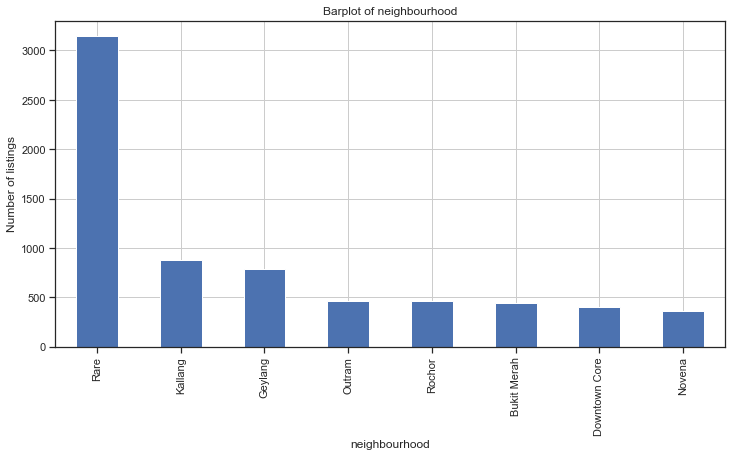

In [963]:
airbnb_data.neighbourhood.value_counts().plot.bar(figsize=(12,6))
plt.xlabel('neighbourhood')
plt.ylabel('Number of listings')
plt.title('Barplot of neighbourhood')
plt.grid(True)
plt.show()

### Creating a new variable by joining neighbourhood_group and neighbourhood variables together

I decided to create a new variable by joining neighbourhood_group and neighbourhood variables together because...

1. Earlier, I grouped all the unique categories in neighbourhood variable which has a frequency of less than 5% together as a single category named 'Rare'.


2. However, there may be some problems after grouping all the unique categories in neighbourhood variable which has a frequency of less than 5% together as a single category named 'Rare'. This is because most of these 'Rare' categories in neighbourhood variable now are having different categories in neighbourhood_group variable. This may affect the result of the prediction when trying to predict the rental price of a listed Airbnb property in relation to this Machine Learning Assignment 1 dataset's regression problem. (i.e. I may get a wrong prediction when trying to predict the rental price of a listed Airbnb property)

With the creation of this new variable by joining neighbourhood_group and neighbourhood variables together, the new variable would contain the correct values and would be of better help to correctly predict the rental price of a listed Airbnb property in relation to this Machine Learning Assignment 1 dataset's regression problem (i.e. I think that there would be a better relationship between this new variable and the target variable - price variable)

In [964]:
# Creating a new column named 'neighbourhood_grp_neighbourhood' by joining neighbourhood_group and neighbourhood variables together, each separated by an underscore
airbnb_data['neighbourhood_grp_neighbourhood'] = airbnb_data['neighbourhood_group'] + '_' + airbnb_data['neighbourhood']

# Viewing the result of the creation of host_id_name column
airbnb_data.head()

neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region          Rare   1.44255  103.79580  Private room     83   
1      Central Region          Rare   1.33235  103.78521  Private room     81   
2        North Region          Rare   1.44246  103.79667  Private room     69   
3         East Region          Rare   1.34541  103.95712  Private room    206   
4         East Region          Rare   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  cozy?  near_mrt?  new?  \
0                               2               365      1          0     0   
1                               1               365      0          0     0   
2                               2               365      1          0     0   
3                               9               353      0          0     0   
4                               9               355      0          0     0   

   within_distance_of_something?      host_id_name  \
0                              0  266763_Francesca   
1                              0    227796_Sujatha   
2                              0  266763_Francesca   
3                              1    367042_Belinda   
4                              1    367042_Belinda   

  neighbourhood_grp_neighbourhood  
0               North Region_Rare  
1             Central Region_Rare  
2               North Region_Rare  
3                East Region_Rare  
4                East Region_Rare

### 2.2.3. Outliers
An outlier is a data point which is significantly different from the remaining data. Outliers can only be found in numerical variables.

#### Identifying Numerical Variables (repeated for ease of viewing)

In [965]:
# Selecting Numerical Data from 'airbnb_data', then display first 5 rows
airbnb_data_num = airbnb_data.select_dtypes(['int64', 'float64']).copy()
airbnb_data_num.head()

latitude  longitude  price  minimum_nights  number_of_reviews  \
0   1.44255  103.79580     83             180                  1   
1   1.33235  103.78521     81              90                 18   
2   1.44246  103.79667     69               6                 20   
3   1.34541  103.95712    206               1                 14   
4   1.34567  103.95963     94               1                 22   

   reviews_per_month  calculated_host_listings_count  availability_365  cozy?  \
0               0.01                               2               365      1   
1               0.28                               1               365      0   
2               0.20                               2               365      1   
3               0.15                               9               353      0   
4               0.22                               9               355      0   

   near_mrt?  new?  within_distance_of_something?  
0          0     0                              0  
1          0     0                              0  
2          0     0                              0  
3          0     0                              1  
4          0     0                              1

### Identifying Outliers

I am going to use Boxplots to identify outliers in each numerical variable.

#### Visualizing each Numerical Variable using Boxplots

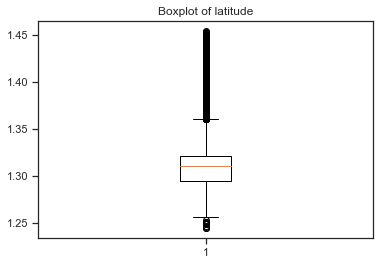

In [966]:
# Boxplot of Numerical Variable 'latitude'

plt.boxplot(airbnb_data_num['latitude'])
plt.title('Boxplot of latitude')

plt.show()

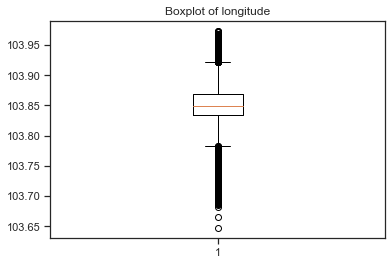

In [967]:
# Boxplot of Numerical Variable 'longitude'

plt.boxplot(airbnb_data_num['longitude'])
plt.title('Boxplot of longitude')

plt.show()

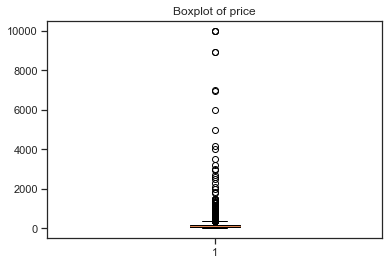

In [968]:
# Boxplot of Numerical Variable 'price'

plt.boxplot(airbnb_data_num['price'])
plt.title('Boxplot of price')

plt.show()

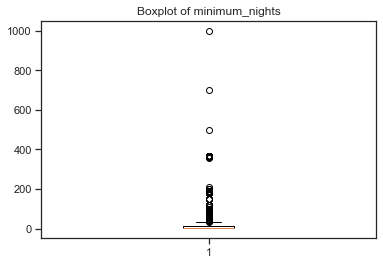

In [969]:
# Boxplot of Numerical Variable 'minimum_nights'

plt.boxplot(airbnb_data_num['minimum_nights'])
plt.title('Boxplot of minimum_nights')

plt.show()

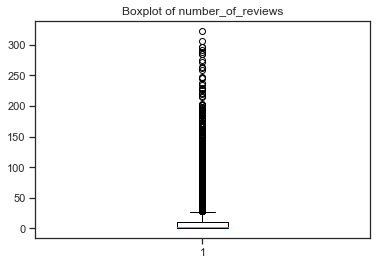

In [970]:
# Boxplot of Numerical Variable 'number_of_reviews'

plt.boxplot(airbnb_data_num['number_of_reviews'])
plt.title('Boxplot of number_of_reviews')

plt.show()

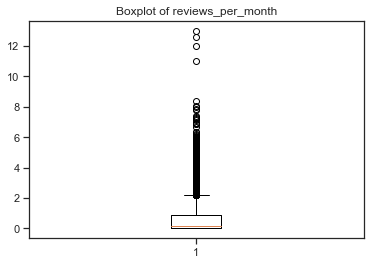

In [971]:
# Boxplot of Numerical Variable 'reviews_per_month'

plt.boxplot(airbnb_data_num['reviews_per_month'])
plt.title('Boxplot of reviews_per_month')

plt.show()

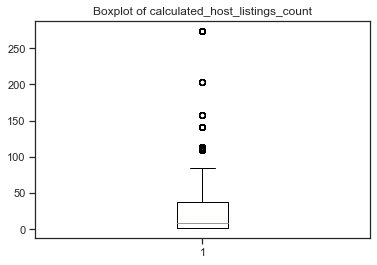

In [972]:
# Boxplot of Numerical Variable 'calculated_host_listings_count'

plt.boxplot(airbnb_data_num['calculated_host_listings_count'])
plt.title('Boxplot of calculated_host_listings_count')

plt.show()

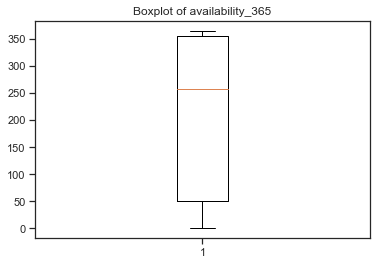

In [973]:
# Boxplot of Numerical Variable 'availability_365'

plt.boxplot(airbnb_data_num['availability_365'])
plt.title('Boxplot of availability_365')

plt.show()

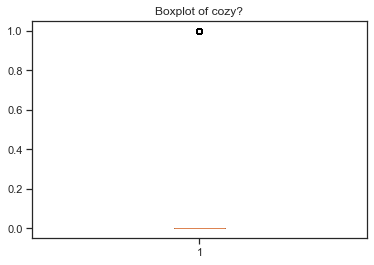

In [974]:
# Boxplot of Numerical Variable 'cozy?'

plt.boxplot(airbnb_data_num['cozy?'])
plt.title('Boxplot of cozy?')

plt.show()

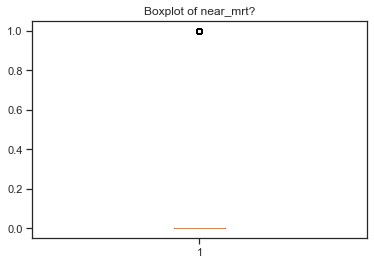

In [975]:
# Boxplot of Numerical Variable 'near_mrt?'

plt.boxplot(airbnb_data_num['near_mrt?'])
plt.title('Boxplot of near_mrt?')

plt.show()

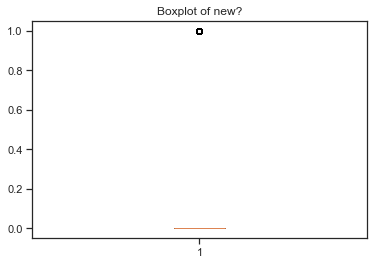

In [976]:
# Boxplot of Numerical Variable 'new?'

plt.boxplot(airbnb_data_num['new?'])
plt.title('Boxplot of new?')

plt.show()

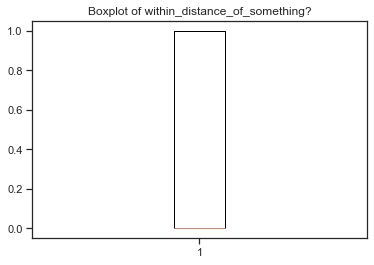

In [977]:
# Boxplot of Numerical Variable 'within_distance_of_something?'

plt.boxplot(airbnb_data_num['within_distance_of_something?'])
plt.title('Boxplot of within_distance_of_something?')

plt.show()

### Are there any Outliers?

According to the results above, there are indeed outliers in the dataset. There are 7 numerical variables with outliers.

The 7 Numerical Variables with Outliers are:

1. latitude


2. longitude


3. price


4. minimum_nights


5. number_of_reviews


6. reviews_per_month


7. calculated_host_listings_count

### Dealing with Outliers

With outliers in our dataset, we could not just leave it as is. We need to do something about it. 

This is because... 
- Statistical parameters (e.g. mean, variance) are sensitive to outliers
- Outliers may affect the performance of some machine learning models



### 4 Methods to Deal with Outliers

There are 4 Methods to Deal with Outliers and they are:

1. Trimming


2. Winsorisation


3. Capping


4. Zero-coding

### Method 1: Trimming 

Trimming, or truncating, is the process of removing observations that show outliers in one or more variables in the dataset. There are three commonly used methods to set the boundaries beyond which a value can be considered an outlier. 

For normally distributed variables:

 - Method A: Trimming by setting limits to the mean plus or minus three times the standard deviation
 
   - This is because approximately 99% of the data will be distributed between those limits. 

For normally & not normally, distributed variables:

- Method B: Trimming by setting limits using the inter-quartile range proximity rules

- Method C: Trimming by setting limits to the 5th and 95th quantiles

### Method 2: Winsorisation

Winsorization, or winsorizing, is the process of transforming the data by limiting outliers to a certain arbitrary value that is closer to the mean of the distribution. Winsorizing is different from trimming because the extreme values are not removed, but are instead replaced by other values. A typical strategy involves setting outliers to a specified percentile.

For example, with 90% winsorization, we set all data below the 5th percentile to the value at the 5th percentile and all data above the 95th percentile to the value at the 95th percentile. 

Winsorization is symmetric; therefore, the winsorized mean of a symmetric distribution provides an unbiased representation of the distribution of the variable. 

### Method 3: Capping

Similarly to winsorization, we can replace the extreme values by values closer to other values in the variable, by determining the maximum and minimum boundaries with the mean plus or minus the standard deviation, or the inter-quartile range proximity rule. 

This procedure is also called bottom and top coding, censoring, or capping. We can cap both extremes of the distribution or just one of the tails, depending on where we find the outliers in the variable. 


### Method 4: Zero-coding

Zero-coding is a variant of bottom-coding and refers to the process of capping, usually the lower value of the variable, at zero. It is commonly used for variables that cannot take negative values, such as age or income. 


### Decision on the Ideal Method to Deal with Outliers in latitude Variable

After trying all the different methods to deal with Outliers in latitude Variable, I can conclude that using Winsorisation is also the best method to deal with Outliers in latitude Variable.

This is because...

1. Compared to Trimming method, I get to retain most of the values in the dataset instead of dropping them even though Trimming method is also a great method to deal with Outliers in latitude Variable. By being able to retain most of the values in the dataset using Winsorisation, I could get a better model performance result.


2. Compared to Capping method, I get to deal with most of the outliers in latitude Variable. When dealing with Outliers in latitude Variable using Capping, there were more outliers that are still not dealt with.


3. Compared to Zero-coding, dealing with Outliers in latitude Variable by Winsorisation is way better. When performing zero-coding, there is no effect on Variable 'latitude' as the minimum value of Variable 'latitude' is 1.24387 which is not less than 0. Zero-coding is a process of capping the lower value of the variable, at zero.

### Decision on the Ideal Method to Deal with Outliers in longitude Variable

After trying all the different methods to deal with Outliers in longitude Variable, I can also conclude that using Winsorisation is also the best method to deal with Outliers in longitude Variable.

This is because...

1. Compared to Trimming method, I get to retain most of the values in the dataset instead of dropping them even though Trimming method is also a great method to deal with Outliers in longitude Variable. By being able to retain most of the values in the dataset using Winsorisation, I could get a better model performance result.


2. Compared to Capping method, I get to deal with most of the outliers in longitude Variable. When dealing with Outliers in latitude Variable using Capping, there were more outliers that are still not dealt with.


3. Compared to Zero-coding, dealing with Outliers in longitude Variable by Winsorisation is way better. When performing zero-coding, there is no effect on Variable 'longitude' as the minimum value of Variable 'longitude' is 103.64656 which is not less than 0. Zero-coding is a process of capping the lower value of the variable, at zero.

### Decision on Not to Deal with Outliers in price Variable

I decided not to deal with Outliers in price Variable because...

1. According to the Machine Learning Assignment 1 Brief, this given dataset of listings.csv is a regression problem to predict the rental price of a listed Airbnb property.


2. In addition, the data dictionary of listings.csv provided in the Machine Learning Assignment 1 Brief also stated that the price Variable is the Target variable where it contains the daily rental price of each Airbnb Property. 


3. With that, I decided not to deal with the outliers in price Variable. This is so that...

  - the price variable maintains its original values from the given listings.csv dataset and,
   
  - I would get an accurate prediction result when predicting the rental price of a listed Airbnb property from each variable in relation to this Machine Learning Assignment 1 dataset's regression problem

### Decision on the Ideal Method to Deal with Outliers in minimum_nights Variable

After trying all the different methods to deal with Outliers in minimum_nights Variable, I can also conclude that using Winsorisation is also the best method to deal with Outliers in minimum_nights Variable.

This is also because...

1. Compared to Trimming method, I get to retain most of the values in the dataset instead of dropping them even though Trimming method is also a great method to deal with Outliers in minimum_nights Variable. By being able to retain most of the values in the dataset using Winsorisation, I could get a better model performance result.


2. Compared to Capping method, I get to deal with most of the outliers in minimum_nights Variable. When dealing with Outliers in minimum_nights Variable using Capping, there were more outliers that are still not dealt with.


3. Compared to Zero-coding, dealing with Outliers in minimum_nights Variable by Winsorisation is way better. When performing zero-coding, there is no effect on Variable 'minimum_nights' as the minimum value of Variable 'minimum_nights' is 1 which is not less than 0. Zero-coding is a process of capping the lower value of the variable, at zero.

### Decision on the Ideal Method to Deal with Outliers in number_of_reviews Variable

After trying all the different methods to deal with Outliers in number_of_reviews Variable, I can also conclude that using Winsorisation is also the best method to deal with Outliers in number_of_reviews Variable.

This is also because...

1. Compared to Trimming method, I get to retain most of the values in the dataset instead of dropping them even though Trimming method is also a great method to deal with Outliers in number_of_reviews Variable. By being able to retain most of the values in the dataset using Winsorisation, I could get a better model performance result.


2. Compared to Capping method, I get to deal with most of the outliers in number_of_reviews Variable. When dealing with Outliers in number_of_reviews Variable using Capping, there were more outliers that are still not dealt with.


3. Compared to Zero-coding, dealing with Outliers in number_of_reviews Variable by Winsorisation is way better. When performing zero-coding, there is no effect on Variable 'number_of_reviews' as the minimum value of Variable 'number_of_reviews' is 0 which is not less than 0. Zero-coding is a process of capping the lower value of the variable, at zero.

### Decision on the Ideal Method to Deal with Outliers in reviews_per_month Variable

After trying all the different methods to deal with Outliers in reviews_per_month Variable, I can also conclude that using Winsorisation is also the best method to deal with Outliers in reviews_per_month Variable.

This is also because...

1. Compared to Trimming method, I get to retain most of the values in the dataset instead of dropping them even though Trimming method is also a great method to deal with Outliers in reviews_per_month Variable. By being able to retain most of the values in the dataset using Winsorisation, I could get a better model performance result.


2. Compared to Capping method, I get to deal with most of the outliers in reviews_per_month Variable. When dealing with Outliers in reviews_per_month Variable using Capping, there were more outliers that are still not dealt with.


3. Compared to Zero-coding, dealing with Outliers in reviews_per_month Variable by Winsorisation is way better. When performing zero-coding, there is no effect on Variable 'reviews_per_month' as the minimum value of Variable 'reviews_per_month' is 0 which is not less than 0. Zero-coding is a process of capping the lower value of the variable, at zero.

### Decision on the Ideal Method to Deal with Outliers in calculated_host_listings_count Variable

After trying all the different methods to deal with Outliers in calculated_host_listings_count Variable, I can also conclude that using Winsorisation is also the best method to deal with Outliers in calculated_host_listings_count Variable.

This is also because...

1. Compared to Trimming method, I get to retain most of the values in the dataset instead of dropping them even though Trimming method is also a great method to deal with Outliers in calculated_host_listings_count Variable. By being able to retain most of the values in the dataset using Winsorisation, I could get a better model performance result.


2. Compared to Capping method, I get to deal with most of the outliers in calculated_host_listings_count Variable. When dealing with Outliers in calculated_host_listings_count Variable using Capping, there were more outliers that are still not dealt with.


3. Compared to Zero-coding, dealing with Outliers in calculated_host_listings_count Variable by Winsorisation is way better. When performing zero-coding, there is no effect on Variable 'calculated_host_listings_count' as the minimum value of Variable 'calculated_host_listings_count' is 1 which is not less than 0. Zero-coding is a process of capping the lower value of the variable, at zero.

### Final Confirmed Method to Deal with Outliers in latitude, longitude, minimum_nights, number_of_reviews, reviews_per_month and calculated_host_listings_count Variables

In [978]:
# Dealing with Outliers in latitude variable (Using Winsorisation)

In [979]:
# function to create histogram, Q-Q plot and boxplot

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('latitude quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


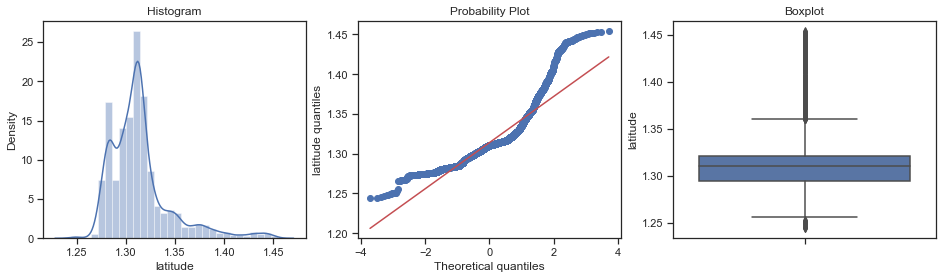

In [980]:
# finding outliers in 'latitude'

diagnostic_plots(airbnb_data, 'latitude')

In [981]:
# Method to winsorise

def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [982]:
# Replacing latitude outliers by the percentiles

airbnb_data['latitude']= winsorise(airbnb_data, 'latitude', airbnb_data['latitude'].quantile(0.95), airbnb_data['latitude'].quantile(0.05))

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


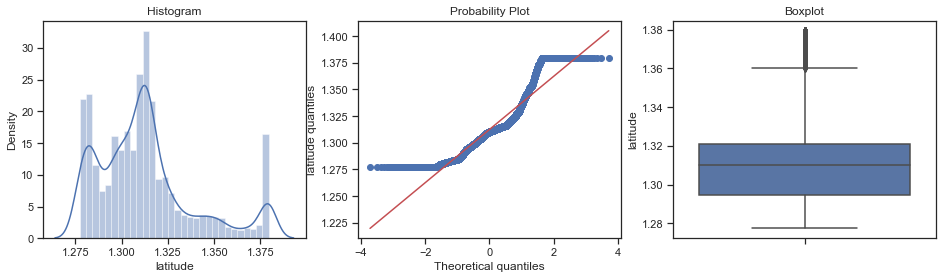

In [983]:
# let's explore outliers in the trimmed dataset

diagnostic_plots(airbnb_data, 'latitude')

In [984]:
# Dealing with Outliers in longitude variable (Using Winsorisation)

In [985]:
# function to create histogram, Q-Q plot and boxplot

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('longitude quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


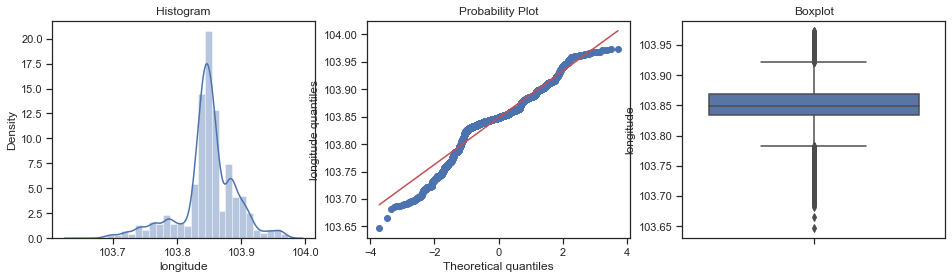

In [986]:
# finding outliers in 'longitude'

diagnostic_plots(airbnb_data, 'longitude')

In [987]:
# Method to winsorise

def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [988]:
# Replacing longitude outliers by the percentiles

airbnb_data['longitude']= winsorise(airbnb_data, 'longitude', airbnb_data['longitude'].quantile(0.95), airbnb_data['longitude'].quantile(0.05))

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


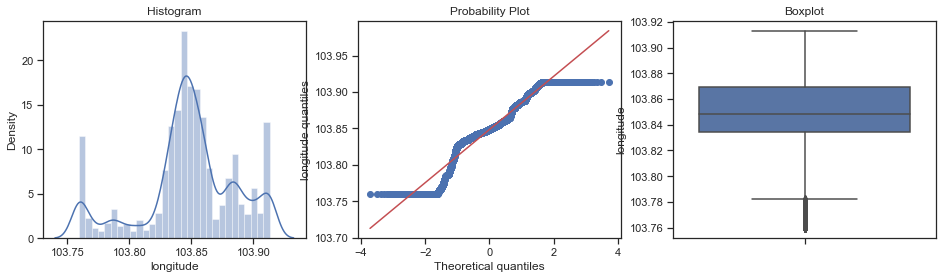

In [989]:
# let's explore outliers in the trimmed dataset

diagnostic_plots(airbnb_data, 'longitude')

In [990]:
# Dealing with Outliers in minimum_nights variable (Using Winsorisation)

In [991]:
# function to create histogram, Q-Q plot and boxplot

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('minimum_nights quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


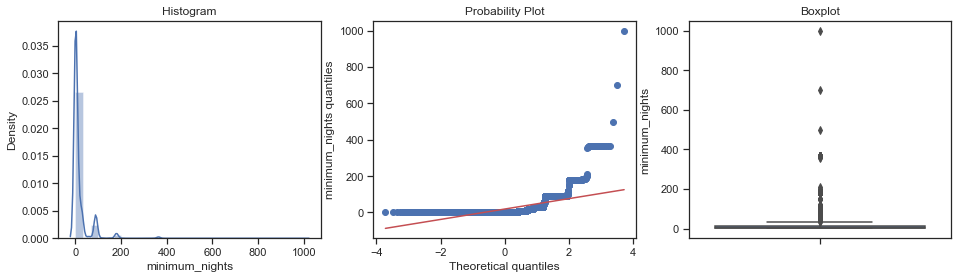

In [992]:
# finding outliers in 'minimum_nights'

diagnostic_plots(airbnb_data, 'minimum_nights')

In [993]:
# Method to winsorise

def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [994]:
# Replacing minimum_nights outliers by the percentiles

airbnb_data['minimum_nights']= winsorise(airbnb_data, 'minimum_nights', airbnb_data['minimum_nights'].quantile(0.95), airbnb_data['minimum_nights'].quantile(0.05))

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


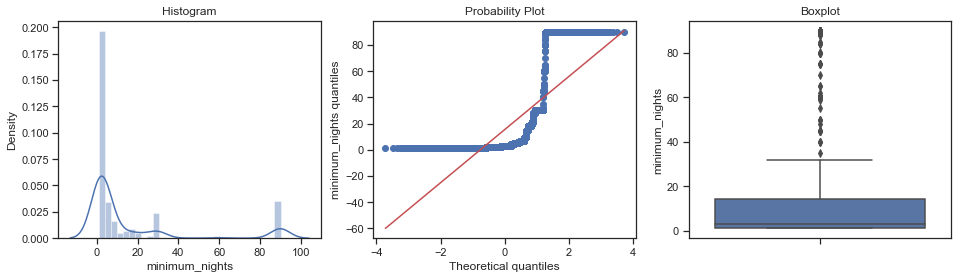

In [995]:
# let's explore outliers in the trimmed dataset

diagnostic_plots(airbnb_data, 'minimum_nights')

In [996]:
# Dealing with Outliers in number_of_reviews variable (Using Winsorisation)

In [997]:
# function to create histogram, Q-Q plot and boxplot

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('number_of_reviews quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


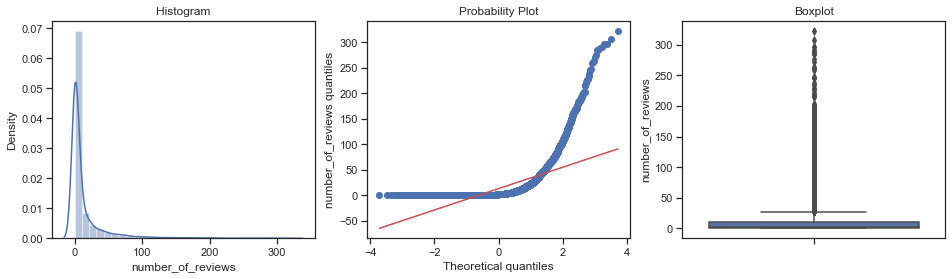

In [998]:
# finding outliers in 'number_of_reviews'

diagnostic_plots(airbnb_data, 'number_of_reviews')

In [999]:
# Method to winsorise

def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [1000]:
# Replacing number_of_reviews outliers by the percentiles

airbnb_data['number_of_reviews']= winsorise(airbnb_data, 'number_of_reviews', airbnb_data['number_of_reviews'].quantile(0.95), airbnb_data['number_of_reviews'].quantile(0.05))

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


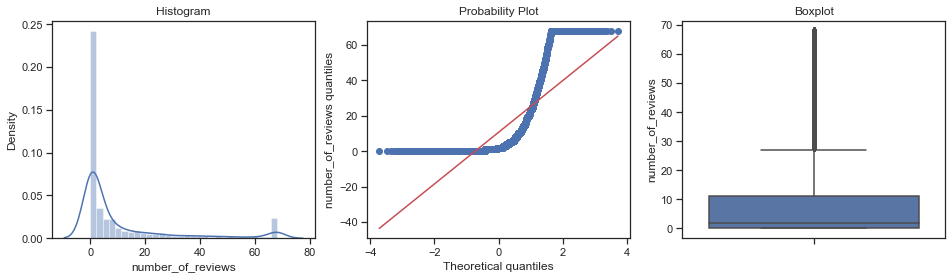

In [1001]:
# let's explore outliers in the trimmed dataset

diagnostic_plots(airbnb_data, 'number_of_reviews')

In [1002]:
# Dealing with Outliers in reviews_per_month variable (Using Winsorisation)

In [1003]:
# function to create histogram, Q-Q plot and boxplot

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('reviews_per_month quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


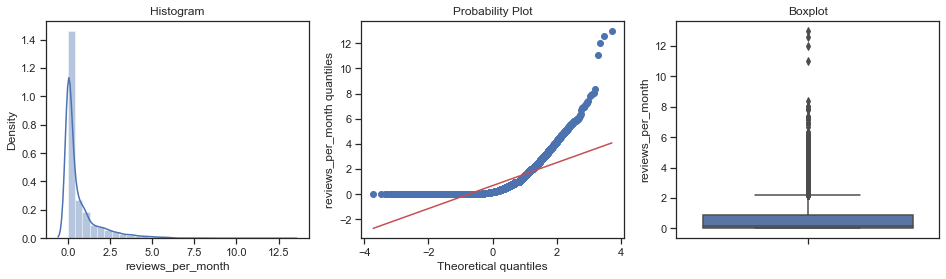

In [1004]:
# finding outliers in 'reviews_per_month'

diagnostic_plots(airbnb_data, 'reviews_per_month')

In [1005]:
# Method to winsorise

def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [1006]:
# Replacing reviews_per_month outliers by the percentiles

airbnb_data['reviews_per_month']= winsorise(airbnb_data, 'reviews_per_month', airbnb_data['reviews_per_month'].quantile(0.95), airbnb_data['reviews_per_month'].quantile(0.05))

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


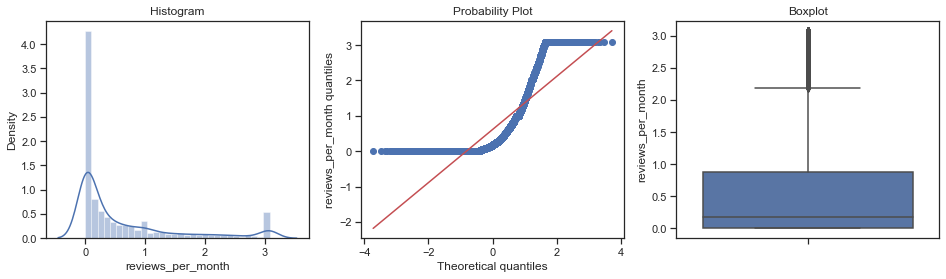

In [1007]:
# let's explore outliers in the trimmed dataset

diagnostic_plots(airbnb_data, 'reviews_per_month')

In [1008]:
# Dealing with Outliers in calculated_host_listings_count variable (Using Winsorisation)

In [1009]:
# function to create histogram, Q-Q plot and boxplot

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('calculated_host_listings_count quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


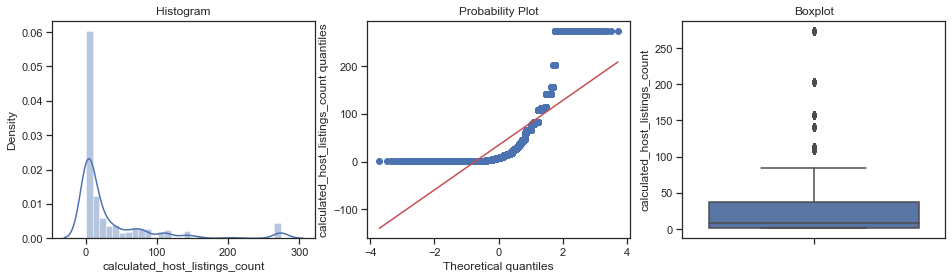

In [1010]:
# finding outliers in 'calculated_host_listings_count'

diagnostic_plots(airbnb_data, 'calculated_host_listings_count')

In [1011]:
# Method to winsorise

def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [1012]:
# Replacing calculated_host_listings_count outliers by the percentiles

airbnb_data['calculated_host_listings_count']= winsorise(airbnb_data, 'calculated_host_listings_count', airbnb_data['calculated_host_listings_count'].quantile(0.95), airbnb_data['calculated_host_listings_count'].quantile(0.05))

C:\Users\mante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


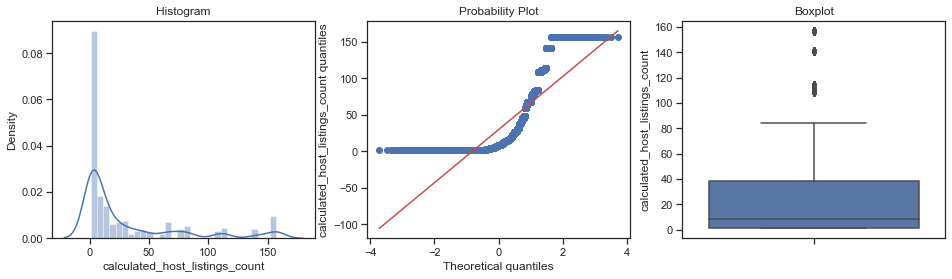

In [1013]:
# let's explore outliers in the trimmed dataset

diagnostic_plots(airbnb_data, 'calculated_host_listings_count')

### 2.2.4. Categorical Data Encoding

In [1014]:
# Selecting Categorical Data from 'airbnb_data', then display first 5 rows.
airbnb_data_cat = airbnb_data.select_dtypes(['object']).copy()
airbnb_data_cat.head()

neighbourhood_group neighbourhood     room_type last_review  \
0        North Region          Rare  Private room  2013-10-21   
1      Central Region          Rare  Private room  2014-12-26   
2        North Region          Rare  Private room  2015-10-01   
3         East Region          Rare  Private room  2019-08-11   
4         East Region          Rare  Private room  2019-07-28   

       host_id_name neighbourhood_grp_neighbourhood  
0  266763_Francesca               North Region_Rare  
1    227796_Sujatha             Central Region_Rare  
2  266763_Francesca               North Region_Rare  
3    367042_Belinda                East Region_Rare  
4    367042_Belinda                East Region_Rare

### Are there any Categorical Data in the dataset?

According to the results above, there are indeed categorical data in the dataset. There are 6 categorical variables in the dataset.

The 6 Categorical Variables in the dataset are:

1. neighbourhood_group


2. neighbourhood


3. room_type


4. last_review


5. host_id_name


6. neighbourhood_grp_neighbourhood

### A Need to transform the Categorical Data into numbers?

Based on the above results, I think it is necessary to transform the Categorical Data into numbers. This is so that Categorical Data can also be used as part of the overall revised dataset for computers to perform mathematical calculations and to determine suitable algorithms for models.


### List of Categorical Data that needs to be transformed into numbers

Actually, all Categorical Data in the dataset needs to be transformed into numbers.

Therefore, the list of Categorical Data that needs to be transformed into numbers are:

1. neighbourhood_group


2. neighbourhood


3. room_type


4. last_review


5. host_id_name


6. neighbourhood_grp_neighbourhood

### 7 Methods to Transform Categorical variables into numbers

There are 7 Methods to Transform Categorical variables into numbers and they are:

1. Creating Binary Variables through One-Hot Encoding


2. Performing One-Hot Encoding of Frequent Categories


3. Replacing Categories with Ordinal Numbers


4. Replacing Categories with Counts of Observations


5. Replacing Categories with Frequency of observations


6. Encoding with Integers in an Ordered Manner


7. Encoding with the Mean of the target

### Method 1: Creating Binary Variables through One-Hot Encoding

In one-hot encoding, we represent a categorical variable as a group of binary variables, where each binary variable represents one category. The binary variable indicates whether the category is present in an observation (1) or not (0).

For example, we have a variable named **Gender**. **Gender** variable takes in 2 categories - **Male** and **Female**.

The one-hot encoded representation of the **Gender** variable with the categories of **Male** and **Female**  would then derive the binary variable of Female, which shows the value of 1 for females, or the binary variable of Male, which takes the value of 1 for the males in the dataset.

A categorical variable with k unique categories can be encoded in k-1 binary variables. For Gender, k is 2 as it contains two labels (male and female), therefore, we need to create only one binary variable (k - 1 = 1) to capture all of the information.

### Method 2: Performing One-Hot Encoding of Frequent Categories

One-hot encoding represents each category of a categorical variable with a binary variable. Hence, one-hot encoding of highly cardinal variables or datasets with multiple categorical features can expand the feature space dramatically. To reduce the number of binary variables, we can perform one-hot encoding of the most frequent categories only. 

One-hot encoding of top categories is equivalent to treating the remaining, less frequent categories as a single, unique category.

### Method 3: Replacing Categories with Ordinal Numbers

Ordinal encoding consists of replacing the categories with digits from `1 to k` (or `0 to k-1`, depending on the implementation), where `k` is the number of distinct categories of the variable. The numbers are assigned arbitrarily. 

Ordinal encoding is better suited for non-linear machine learning models, which can navigate through the arbitrarily assigned digits to try and find patterns that relate to the target. 

### Method 4: Replacing Categories with Counts of Observations

In count encoding, we replace the categories with the count of observations for that category. That is, if 10 out of 100 observations show the category blue for the variable color, we would replace blue with 10 when doing count encoding.

These techniques, which capture the representation of each label in a dataset, are very popular in data science competitions. The assumption is that the number of observations per category is somewhat predictive of the target.

Note: If two different categories are having the same percentage of observations, they will be replaced by the same value, which may lead to information loss.

### Method 5: Replacing Categories with Frequency of observations

In frequency encoding, we replace the categories with the percentage of observations for that category. That is, if 10 out of 100 observations show the category blue for the variable color, we would replace blue with 0.1 if performing frequency encoding. 

These techniques, which capture the representation of each label in a dataset, are very popular in data science competitions. The assumption is that the number of observations per category is somewhat predictive of the target.

Note: If two different categories are having the same percentage of observations, they will be replaced by the same value, which may lead to information loss.

### Method 6: Encoding with Integers in an Ordered Manner

In Method 3: Replacing categories with ordinal numbers, I replaced categories with integers, which were assigned arbitrarily. This encoding works well with non-linear machine learning algorithms that can navigate through the arbitrarily assigned digits to try and find patterns that relate them to the target. However, that encoding method may not work so well with linear models.

I can instead assign integers to the categories given the target values. To do this, do the following:
* 1.Calculate the mean value of the target per category.
* 2.Order the categories from the one with the lowest to the one with the highest target mean value.
* 3.Assign digits to the ordered categories, starting with 0 to the first category all of the way up to `k-1` to the last category, where k is the number of distinct categories.

This encoding technique creates a monotonic relationship between the categorical variable and the response and therefore makes the variables more adequate for use in linear models.

Monotonic means strictly increasing or decreasing.

### Method 7: Encoding with the Mean of the target

Mean encoding or target encoding implies replacing the categories with the average target value for that category. For example, if we have a City variable, with the categories of London, Manchester, and Bristol, and we want to predict the default rate; if the default rate for London is 30%, we replace London with 0.3; if the default rate for Manchester is 20%, we replace Manchester with 0.2; and so on. The same can be done with a continuous target.

### neighbourhood_group variable

#### Determining Cardinality in neighbourhood_group Variable

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [1015]:
# Viewing the number of unique values in neighbourhood_group variable
airbnb_data.neighbourhood_group.nunique()

# Note: nunique() ignores missing data by default

5

#### Inspecting Unique Categories in neighbourhood_group Variable (repeated for ease of viewing)

In [1016]:
airbnb_data['neighbourhood_group'].sort_values().unique()

array(['Central Region', 'East Region', 'North Region',
       'North-East Region', 'West Region'], dtype=object)

### Transforming neighbourhood_group variable into numbers

### Decision on the Ideal Method to Transform neighbourhood_group variable into numbers

After trying all the different above methods to Transform neighbourhood_group variable into numbers, I decided to Encode with the Mean of the target to Transform neighbourhood_group variable into numbers.  

This is because...

1. With method 1, there would only be 4 binary variables created for neighbourhood_group variable. This is because there are only 5 categories in neighbourhood_group variable. This is great as there would not be many columns being created. However, I would like all the Categorical variables to be transformed by the same method. Using method 1 to transform other categorical variables may not be the best method. To be transformed with the same method, there is consistency in transforming. With a similar transforming method for all categorical variables, it may achieve a higher model performance.


2. As mentioned earlier, there are only 5 categories to transform in neighbourhood_group variable. With that, method 2 would achieve the same results as Method 1.


3. Method 3 assigned numbers arbitrarily. Since the numbers are assigned arbitrarily, there would be no meanings to the values. 


4. Method 4 replaces the categories with the count of observations for that category. Even though, the 5 categories of neighbourhood_group variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 4 to replace categorical data.


5. Method 5 replaces the categories with the percentage of observations for that category. Similar to Method 4's reasoning, even though, the 5 categories of neighbourhood_group variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 5 to replace categorical data. 


6. Method 6 creates a monotonic relationship between the categorical variable and the response. However, I feel that Encoding with Integers in an Ordered Manner would not really help with this dataset's Regression Problem - predicting the rental price of an Airbnb Property.


7. Method 7 replaces the categories with the average target value for that category. Thus, I feel that the transformed values using Encode with the Mean of the target would be more helpful for this dataset's Regression Problem - predicting the rental price of an Airbnb Property.


Therefore, I decided to Encode with the Mean of the target to Transform neighbourhood_group variable into numbers.


### neighbourhood variable

#### Determining Cardinality in neighbourhood Variable

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [1017]:
# Viewing the number of unique values in neighbourhood variable
airbnb_data.neighbourhood.nunique()

# Note: nunique() ignores missing data by default

8

#### Inspecting Unique Categories in neighbourhood Variable (repeated for ease of viewing)

In [1018]:
airbnb_data['neighbourhood'].sort_values().unique()

array(['Bukit Merah', 'Downtown Core', 'Geylang', 'Kallang', 'Novena',
       'Outram', 'Rare', 'Rochor'], dtype=object)

### Transforming neighbourhood variable into numbers

### Decision on the Ideal Method to Transform neighbourhood variable into numbers

After trying all the different above methods to Transform neighbourhood variable into numbers, I decided to Encode with the Mean of the target to Transform neighbourhood variable into numbers.  

This is because...

1. With method 1, there would be quite a few binary variables created for neighbourhood Variable. This is not great as there would be quite a few columns being created. With more columns, there are more columns to transform.


2. Method 2 represents each category of a categorical variable with a binary variable while treating the remaining, less frequent categories as a single, unique category. Method 2 is extremely useful to transform neighbourhood variable into numbers. This is because neighbourhood variable is a fairly cardinal categorical variable. When using method 1 to transform, it expands the feature space quite a bit. With method 2, it reduces the number of binary variables. However, I would like all the Categorical variables to be transformed by the same method. Using method 2 to transform other categorical variables may not be the best method. To be transformed with the same method, there is consistency in transforming. With a similar transforming method for all categorical variables, it may achieve a higher model performance.


3. Method 3 assigned numbers arbitrarily. Since the numbers are assigned arbitrarily, there would be no meanings to the values. 


4. Method 4 replaces the categories with the count of observations for that category. Even though, the 8 categories of neighbourhood variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 4 to replace categorical data.


5. Method 5 replaces the categories with the percentage of observations for that category. Similar to Method 4's reasoning, even though, the 8 categories of neighbourhood variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 5 to replace categorical data. 


6. Method 6 creates a monotonic relationship between the categorical variable and the response. However, I feel that Encoding with Integers in an Ordered Manner would not really help with this dataset's Regression Problem - predicting the rental price of an Airbnb Property.



7. Method 7 replaces the categories with the average target value for that category. Thus, I feel that the transformed values using Encode with the Mean of the target would be more helpful for this dataset's Regression Problem - predicting the rental price of an Airbnb Property.


Therefore, I decided to Encode with the Mean of the target to Transform neighbourhood variable into numbers.


### room_type variable

#### Determining Cardinality in room_type Variable

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [1019]:
# Viewing the number of unique values in room_type variable
airbnb_data.room_type.nunique()

# Note: nunique() ignores missing data by default

3

#### Inspecting Unique Categories in room_type Variable (repeated for ease of viewing)

In [1020]:
airbnb_data['room_type'].sort_values().unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

### Transforming room_type variable into numbers

### Decision on the Ideal Method to Transform room_type variable into numbers

After trying all the different above methods to Transform room_type variable into numbers, I decided to Encode with the Mean of the target to Transform room_type variable into numbers.  

This is because...

1. With method 1, there would only be 2 binary variables created for room_type variable. This is because there are only 3 categories in room_type variable. This is great as there would not be many columns being created. However, I would like all the Categorical variables to be transformed by the same method. Using method 1 to transform other categorical variables may not be the best method. To be transformed with the same method, there is consistency in transforming. With a similar transforming method for all categorical variables, it may achieve a higher model performance.


2. As mentioned earlier, there are only 3 categories to transform in room_type variable. With that, method 2 would achieve the same results as Method 1.


3. Method 3 assigned numbers arbitrarily. Since the numbers are assigned arbitrarily, there would be no meanings to the values. 


4. Method 4 replaces the categories with the count of observations for that category. Even though, the 3 categories of room_type variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 4 to replace categorical data.


5. Method 5 replaces the categories with the percentage of observations for that category. Similar to Method 4's reasoning, even though, the 3 categories of room_type variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 5 to replace categorical data. 


6. Method 6 creates a monotonic relationship between the categorical variable and the response. However, I feel that Encoding with Integers in an Ordered Manner would not really help with this dataset's Regression Problem - predicting the rental price of an Airbnb Property.


7. Method 7 replaces the categories with the average target value for that category. Thus, I feel that the transformed values using Encode with the Mean of the target would be more helpful for this dataset's Regression Problem - predicting the rental price of an Airbnb Property.


Therefore, I decided to Encode with the Mean of the target to Transform room_type variable into numbers.


### last_review variable

#### Determining Cardinality in last_review Variable

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [1021]:
# Viewing the number of unique values in last_review variable
airbnb_data.last_review.nunique()

# Note: nunique() ignores missing data by default

965

#### Inspecting Unique Categories in last_review Variable (repeated for ease of viewing)

In [1022]:
airbnb_data['last_review'].sort_values().unique()

array(['2013-10-21', '2014-02-22', '2014-03-08', '2014-06-28',
       '2014-07-14', '2014-07-17', '2014-07-19', '2014-10-26',
       '2014-12-26', '2014-12-29', '2015-01-01', '2015-01-16',
       '2015-01-21', '2015-01-25', '2015-01-29', '2015-03-15',
       '2015-03-21', '2015-03-22', '2015-05-05', '2015-05-08',
       '2015-06-09', '2015-06-14', '2015-06-15', '2015-06-30',
       '2015-07-02', '2015-07-09', '2015-07-10', '2015-07-19',
       '2015-07-23', '2015-07-24', '2015-08-02', '2015-08-04',
       '2015-08-05', '2015-08-09', '2015-08-15', '2015-08-16',
       '2015-08-23', '2015-08-24', '2015-08-27', '2015-09-04',
       '2015-09-06', '2015-09-12', '2015-09-14', '2015-09-25',
       '2015-09-28', '2015-09-29', '2015-10-01', '2015-10-10',
       '2015-10-13', '2015-10-15', '2015-10-16', '2015-10-19',
       '2015-10-28', '2015-11-01', '2015-11-08', '2015-11-10',
       '2015-11-12', '2015-11-18', '2015-11-22', '2015-11-26',
       '2015-11-27', '2015-11-29', '2015-12-01', '2015-

### Transforming last_review variable into numbers

### Decision on the Ideal Method to Transform last_review variable into numbers

After trying all the different above methods to Transform last_review variable into numbers, I decided to Encode with the Mean of the target to Transform last_review variable into numbers.  

This is because...

1. With method 1, there would be many binary variables created for last_review Variable. This is not great as there would be many columns being created. With more columns, there are more columns to transform.


2. Method 2 represents each category of a categorical variable with a binary variable while treating the remaining, less frequent categories as a single, unique category. Method 2 is extremely useful to transform last_review variable into numbers. This is because last_review variable is a highly cardinal categorical variable. When using method 1 to transform, it expands the feature space quite a lot. With method 2, it reduces the number of binary variables. However, I would like all the Categorical variables to be transformed by the same method. Using method 2 to transform other categorical variables may not be the best method. To be transformed with the same method, there is consistency in transforming. With a similar transforming method for all categorical variables, it may achieve a higher model performance.


3. Method 3 assigned numbers arbitrarily. Since the numbers are assigned arbitrarily, there would be no meanings to the values. 


4. Method 4 replaces the categories with the count of observations for that category. Even though, all the categories of last_review variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 4 to replace categorical data.


5. Method 5 replaces the categories with the percentage of observations for that category. Similar to Method 4's reasoning, even though, all the categories of last_review variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 5 to replace categorical data. 


6. Method 6 creates a monotonic relationship between the categorical variable and the response. However, I feel that Encoding with Integers in an Ordered Manner would not really help with this dataset's Regression Problem - predicting the rental price of an Airbnb Property.


7. Method 7 replaces the categories with the average target value for that category. Thus, I feel that the transformed values using Encode with the Mean of the target would be more helpful for this dataset's Regression Problem - predicting the rental price of an Airbnb Property.


Therefore, I decided to Encode with the Mean of the target to Transform last_review variable into numbers.


### host_id_name variable

#### Determining Cardinality in host_id_name Variable

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [1023]:
# Viewing the number of unique values in host_id_name variable
airbnb_data.host_id_name.nunique()

# Note: nunique() ignores missing data by default

2518

#### Inspecting Unique Categories in host_id_name Variable (repeated for ease of viewing)

In [1024]:
airbnb_data['host_id_name'].sort_values().unique()

array(['10022148_Arun', '10028971_Edwin Leopold', '100353323_Royal', ...,
       '99564980_Cheryl', '9974160_Aki', '99951899_Tony'], dtype=object)

### Transforming host_id_name variable into numbers

### Decision on the Ideal Method to Transform host_id_name variable into numbers

After trying all the different above methods to Transform host_id_name variable into numbers, I decided to Encode with the Mean of the target to Transform host_id_name variable into numbers.  

This is because...

1. With method 1, there would be many binary variables created for host_id_name Variable. This is not great as there would be many columns being created. With more columns, there are more columns to transform.


2. Method 2 represents each category of a categorical variable with a binary variable while treating the remaining, less frequent categories as a single, unique category. Method 2 is extremely useful to transform host_id_name variable into numbers. This is because host_id_name variable is a highly cardinal categorical variable. When using method 1 to transform, it expands the feature space quite a lot. With method 2, it reduces the number of binary variables. However, I would like all the Categorical variables to be transformed by the same method. Using method 2 to transform other categorical variables may not be the best method. To be transformed with the same method, there is consistency in transforming. With a similar transforming method for all categorical variables, it may achieve a higher model performance.


3. Method 3 assigned numbers arbitrarily. Since the numbers are assigned arbitrarily, there would be no meanings to the values. 


4. Method 4 replaces the categories with the count of observations for that category. Even though, all the categories of host_id_name variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 4 to replace categorical data.


5. Method 5 replaces the categories with the percentage of observations for that category. Similar to Method 4's reasoning, even though, all the categories of host_id_name variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 5 to replace categorical data. 


6. Method 6 creates a monotonic relationship between the categorical variable and the response. However, I feel that Encoding with Integers in an Ordered Manner would not really help with this dataset's Regression Problem - predicting the rental price of an Airbnb Property.


7. Method 7 replaces the categories with the average target value for that category. Thus, I feel that the transformed values using Encode with the Mean of the target would be more helpful for this dataset's Regression Problem - predicting the rental price of an Airbnb Property.


Therefore, I decided to Encode with the Mean of the target to Transform host_id_name variable into numbers.


### neighbourhood_grp_neighbourhood variable

#### Determining Cardinality in neighbourhood_grp_neighbourhood Variable

Cardinality refers to the number of unique categories in each variable.

For example, the cardinality of the variable 'gender', which takes the values 'male' and 'female' is 2.

In [1025]:
# Viewing the number of unique values in neighbourhood_grp_neighbourhood variable
airbnb_data.neighbourhood_grp_neighbourhood.nunique()

# Note: nunique() ignores missing data by default

12

#### Inspecting Unique Categories in neighbourhood_grp_neighbourhood Variable (repeated for ease of viewing)

In [1026]:
airbnb_data['neighbourhood_grp_neighbourhood'].sort_values().unique()

array(['Central Region_Bukit Merah', 'Central Region_Downtown Core',
       'Central Region_Geylang', 'Central Region_Kallang',
       'Central Region_Novena', 'Central Region_Outram',
       'Central Region_Rare', 'Central Region_Rochor', 'East Region_Rare',
       'North Region_Rare', 'North-East Region_Rare', 'West Region_Rare'],
      dtype=object)

### Transforming neighbourhood_grp_neighbourhood variable into numbers

### Decision on the Ideal Method to Transform neighbourhood_grp_neighbourhood variable into numbers

After trying all the different above methods to Transform neighbourhood_grp_neighbourhood variable into numbers, I decided to Encode with the Mean of the target to Transform neighbourhood_grp_neighbourhood variable into numbers.  

This is because...

1. With method 1, there would be quite a few binary variables created for neighbourhood_grp_neighbourhood Variable. This is not great as there would be quite a few columns being created. With more columns, there are more columns to transform.


2. Method 2 represents each category of a categorical variable with a binary variable while treating the remaining, less frequent categories as a single, unique category. Method 2 is extremely useful to transform neighbourhood_grp_neighbourhood variable into numbers. This is because neighbourhood_grp_neighbourhood variable is a fairly cardinal categorical variable. When using method 1 to transform, it expands the feature space quite a bit. With method 2, it reduces the number of binary variables. However, I would like all the Categorical variables to be transformed by the same method. Using method 2 to transform other categorical variables may not be the best method. To be transformed with the same method, there is consistency in transforming. With a similar transforming method for all categorical variables, it may achieve a higher model performance.


3. Method 3 assigned numbers arbitrarily. Since the numbers are assigned arbitrarily, there would be no meanings to the values. 


4. Method 4 replaces the categories with the count of observations for that category. Even though, all the categories of neighbourhood_grp_neighbourhood variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 4 to replace categorical data.


5. Method 5 replaces the categories with the percentage of observations for that category. Similar to Method 4's reasoning, even though, all the categories of neighbourhood_grp_neighbourhood variable would not be replaced by the same value as they do not have same percentage of observations, it logically does not seem right to use method 5 to replace categorical data. 


6. Method 6 creates a monotonic relationship between the categorical variable and the response. However, I feel that Encoding with Integers in an Ordered Manner would not really help with this dataset's Regression Problem - predicting the rental price of an Airbnb Property.


7. Method 7 replaces the categories with the average target value for that category. Thus, I feel that the transformed values using Encode with the Mean of the target would be more helpful for this dataset's Regression Problem - predicting the rental price of an Airbnb Property.


Therefore, I decided to Encode with the Mean of the target to Transform neighbourhood_grp_neighbourhood variable into numbers.


### Final Confirmed Method to Transform all Categorical variables into numbers

In [1027]:
# Based on the above decisions, I would:

# Encode with the Mean (Method 7) 
# to transform neighbourhood_group, neighbourhood, room_type, last_review, host_id_name 
# and neighbourhood_grp_neighbourhood Variables into numbers

In [1028]:
# neighbourhood_group variable

In [1029]:
# Creating a dictionary with the target mean per category for the neighbourhood_group variable

ordered_labels = airbnb_data.groupby(['neighbourhood_group'])['price'].mean().to_dict()

ordered_labels

{'Central Region': 172.1793229643184,
 'East Region': 134.5983086680761,
 'North Region': 110.73118279569893,
 'North-East Region': 100.028125,
 'West Region': 170.77892561983472}

In [1030]:
# Replacing the labels with the target mean

airbnb_data['neighbourhood_group'] = airbnb_data['neighbourhood_group'].map(ordered_labels)

In [1031]:
# Inspecting the result

airbnb_data['neighbourhood_group'].head()

0    110.731183
1    172.179323
2    110.731183
3    134.598309
4    134.598309
Name: neighbourhood_group, dtype: float64

In [1032]:
# neighbourhood variable

In [1033]:
# Creating a dictionary with the target mean per category for the neighbourhood variable

ordered_labels = airbnb_data.groupby(['neighbourhood'])['price'].mean().to_dict()

ordered_labels

{'Bukit Merah': 143.45558086560365,
 'Downtown Core': 197.01754385964912,
 'Geylang': 147.0559796437659,
 'Kallang': 158.0228832951945,
 'Novena': 169.01944444444445,
 'Outram': 144.05150214592274,
 'Rare': 168.89478703115066,
 'Rochor': 186.20960698689956}

In [1034]:
# Replacing the labels with the target mean

airbnb_data['neighbourhood'] = airbnb_data['neighbourhood'].map(ordered_labels)

In [1035]:
# Inspecting the result

airbnb_data['neighbourhood'].head()

0    168.894787
1    168.894787
2    168.894787
3    168.894787
4    168.894787
Name: neighbourhood, dtype: float64

In [1036]:
# room_type variable

In [1037]:
# Creating a dictionary with the target mean per category for the room_type variable

ordered_labels = airbnb_data.groupby(['room_type'])['price'].mean().to_dict()

ordered_labels

{'Entire home/apt': 228.45462503647505,
 'Private room': 106.45128205128205,
 'Shared room': 65.20997375328083}

In [1038]:
# Replacing the labels with the target mean

airbnb_data['room_type'] = airbnb_data['room_type'].map(ordered_labels)

In [1039]:
# Inspecting the result

airbnb_data['room_type'].head()

0    106.451282
1    106.451282
2    106.451282
3    106.451282
4    106.451282
Name: room_type, dtype: float64

In [1040]:
# last_review variable

In [1041]:
# Creating a dictionary with the target mean per category for the last_review variable

ordered_labels = airbnb_data.groupby(['last_review'])['price'].mean().to_dict()

ordered_labels

{'2013-10-21': 83.0,
 '2014-02-22': 2604.0,
 '2014-03-08': 550.0,
 '2014-06-28': 181.0,
 '2014-07-14': 31.0,
 '2014-07-17': 33.0,
 '2014-07-19': 360.0,
 '2014-10-26': 78.0,
 '2014-12-26': 81.0,
 '2014-12-29': 269.0,
 '2015-01-01': 259.5,
 '2015-01-16': 125.0,
 '2015-01-21': 81.0,
 '2015-01-25': 62.0,
 '2015-01-29': 58.0,
 '2015-03-15': 64.0,
 '2015-03-21': 100.0,
 '2015-03-22': 68.0,
 '2015-05-05': 100.0,
 '2015-05-08': 62.0,
 '2015-06-09': 50.0,
 '2015-06-14': 169.0,
 '2015-06-15': 300.0,
 '2015-06-30': 18.0,
 '2015-07-02': 54.0,
 '2015-07-09': 25.0,
 '2015-07-10': 60.0,
 '2015-07-19': 69.0,
 '2015-07-23': 58.0,
 '2015-07-24': 181.0,
 '2015-08-02': 50.0,
 '2015-08-04': 65.0,
 '2015-08-05': 99.0,
 '2015-08-09': 200.0,
 '2015-08-15': 60.0,
 '2015-08-16': 189.0,
 '2015-08-23': 240.0,
 '2015-08-24': 100.0,
 '2015-08-27': 132.0,
 '2015-09-04': 219.0,
 '2015-09-06': 69.0,
 '2015-09-12': 157.33333333333334,
 '2015-09-14': 81.0,
 '2015-09-25': 228.0,
 '2015-09-28': 50.0,
 '2015-09-29': 75.0,


In [1042]:
# Replacing the labels with the target mean

airbnb_data['last_review'] = airbnb_data['last_review'].map(ordered_labels)

In [1043]:
# Inspecting the result

airbnb_data['last_review'].head()

0     83.000000
1     81.000000
2     69.000000
3    147.655738
4    141.440000
Name: last_review, dtype: float64

In [1044]:
# host_id_name variable

In [1045]:
# Creating a dictionary with the target mean per category for the host_id_name variable

ordered_labels = airbnb_data.groupby(['host_id_name'])['price'].mean().to_dict()

ordered_labels

{'10022148_Arun': 31.0,
 '10028971_Edwin Leopold': 49.0,
 '100353323_Royal': 70.375,
 '100368677_Tim': 110.0,
 '100592228_Tiana': 68.0,
 '10064384_Jay': 171.6,
 '10065674_Chris': 60.0,
 '100724500_Lim': 25.0,
 '10089151_Calum': 200.0,
 '101001214_John': 81.0,
 '10101420_Kim': 125.0,
 '101040883_Ailyn': 183.33333333333334,
 '101144565_James': 131.0,
 '101182964_Pioreorganic': 40.0,
 '101330330_선미': 175.0,
 '101368710_TengKwee': 181.0,
 '101417182_Ramaswamy': 300.0,
 '101558071_Annie': 110.0,
 '10163328_Valerie': 56.0,
 '101683980_Sean': 150.0,
 '101835911_Himanshu': 40.0,
 '101895352_Felix': 87.0,
 '101940767_Krish': 53.0,
 '102007408_Geo': 65.0,
 '102027164_Amanda': 28.0,
 '102052937_Marisca': 83.0,
 '102063715_Benny': 51.0,
 '102149593_Syed': 50.0,
 '102202696_Keith': 250.0,
 '10248444_Rc': 131.29166666666666,
 '102492573_Lee': 42.0,
 '102537695_Sharon': 47.0,
 '10260359_Jeremy': 221.0,
 '102642786_Iana': 99.0,
 '102695772_Za': 56.0,
 '1030128_Lena': 54.0,
 '10303863_Shawn': 46.0,
 '1

In [1046]:
# Replacing the labels with the target mean

airbnb_data['host_id_name'] = airbnb_data['host_id_name'].map(ordered_labels)

In [1047]:
# Inspecting the result

airbnb_data['host_id_name'].head()

0     76.000000
1     81.000000
2     76.000000
3    170.222222
4    170.222222
Name: host_id_name, dtype: float64

In [1048]:
# neighbourhood_grp_neighbourhood variable

In [1049]:
# Creating a dictionary with the target mean per category for the neighbourhood_grp_neighbourhood variable

ordered_labels = airbnb_data.groupby(['neighbourhood_grp_neighbourhood'])['price'].mean().to_dict()

ordered_labels

{'Central Region_Bukit Merah': 143.45558086560365,
 'Central Region_Downtown Core': 197.01754385964912,
 'Central Region_Geylang': 147.0559796437659,
 'Central Region_Kallang': 158.0228832951945,
 'Central Region_Novena': 169.01944444444445,
 'Central Region_Outram': 144.05150214592274,
 'Central Region_Rare': 197.513963161022,
 'Central Region_Rochor': 186.20960698689956,
 'East Region_Rare': 134.5983086680761,
 'North Region_Rare': 110.73118279569893,
 'North-East Region_Rare': 100.028125,
 'West Region_Rare': 170.77892561983472}

In [1050]:
# Replacing the labels with the target mean

airbnb_data['neighbourhood_grp_neighbourhood'] = airbnb_data['neighbourhood_grp_neighbourhood'].map(ordered_labels)

In [1051]:
# Inspecting the result

airbnb_data['neighbourhood_grp_neighbourhood'].head()

0    110.731183
1    197.513963
2    110.731183
3    134.598309
4    134.598309
Name: neighbourhood_grp_neighbourhood, dtype: float64

In [1052]:
# Viewing the result of the Final Transformation on all Categorical variables into numbers in the dataset

airbnb_data.head()

neighbourhood_group  neighbourhood  latitude   longitude   room_type  \
0           110.731183     168.894787  1.379503  103.795800  106.451282   
1           172.179323     168.894787  1.332350  103.785210  106.451282   
2           110.731183     168.894787  1.379503  103.796670  106.451282   
3           134.598309     168.894787  1.345410  103.913063  106.451282   
4           134.598309     168.894787  1.345670  103.913063  106.451282   

   price  minimum_nights  number_of_reviews  last_review  reviews_per_month  \
0     83            90.0                1.0    83.000000               0.01   
1     81            90.0               18.0    81.000000               0.28   
2     69             6.0               20.0    69.000000               0.20   
3    206             1.0               14.0   147.655738               0.15   
4     94             1.0               22.0   141.440000               0.22   

   calculated_host_listings_count  availability_365  cozy?  near_mrt?  new?  \
0                             2.0               365      1          0     0   
1                             1.0               365      0          0     0   
2                             2.0               365      1          0     0   
3                             9.0               353      0          0     0   
4                             9.0               355      0          0     0   

   within_distance_of_something?  host_id_name  \
0                              0     76.000000   
1                              0     81.000000   
2                              0     76.000000   
3                              1    170.222222   
4                              1    170.222222   

   neighbourhood_grp_neighbourhood  
0                       110.731183  
1                       197.513963  
2                       110.731183  
3                       134.598309  
4                       134.598309

### 2.2.5. Variable Discretization / Binning

Discretization, or binning, is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals, also called bins, that span the range of the variable values. Binning groups values together whom we believe should be regarded as effectively similar, rather than to let the computer treat them as separate values, when determining the algorithm for the model.

For example, instead of doing population census analysis based on the exact numerical value of the size of each individual’s home, we might classify it into categories such as, less than 50 square metres, between 50 and 100 square metres, between 100 and 200 square metres, and finally larger than 200 square metres.

#### Numerical Data in dataset (repeated for ease of viewing)

In [1053]:
# Selecting Numerical Data from 'airbnb_data', then display first 5 rows
airbnb_data_num = airbnb_data.select_dtypes(['int64', 'float64']).copy()
airbnb_data_num.head()

neighbourhood_group  neighbourhood  latitude   longitude   room_type  \
0           110.731183     168.894787  1.379503  103.795800  106.451282   
1           172.179323     168.894787  1.332350  103.785210  106.451282   
2           110.731183     168.894787  1.379503  103.796670  106.451282   
3           134.598309     168.894787  1.345410  103.913063  106.451282   
4           134.598309     168.894787  1.345670  103.913063  106.451282   

   price  minimum_nights  number_of_reviews  last_review  reviews_per_month  \
0     83            90.0                1.0    83.000000               0.01   
1     81            90.0               18.0    81.000000               0.28   
2     69             6.0               20.0    69.000000               0.20   
3    206             1.0               14.0   147.655738               0.15   
4     94             1.0               22.0   141.440000               0.22   

   calculated_host_listings_count  availability_365  cozy?  near_mrt?  new?  \
0                             2.0               365      1          0     0   
1                             1.0               365      0          0     0   
2                             2.0               365      1          0     0   
3                             9.0               353      0          0     0   
4                             9.0               355      0          0     0   

   within_distance_of_something?  host_id_name  \
0                              0     76.000000   
1                              0     81.000000   
2                              0     76.000000   
3                              1    170.222222   
4                              1    170.222222   

   neighbourhood_grp_neighbourhood  
0                       110.731183  
1                       197.513963  
2                       110.731183  
3                       134.598309  
4                       134.598309

In [1054]:
# Viewing the five-number summary of numerical variables
airbnb_data_num.describe()

neighbourhood_group  neighbourhood     latitude    longitude  \
count          6928.000000    6928.000000  6928.000000  6928.000000   
mean            164.533343     164.533343     1.312444   103.848324   
std              19.493114      14.068342     0.026232     0.037757   
min             100.028125     143.455581     1.277413   103.759444   
25%             172.179323     158.022883     1.294730   103.834665   
50%             172.179323     168.894787     1.310205   103.848375   
75%             172.179323     168.894787     1.320852   103.869422   
max             172.179323     197.017544     1.379503   103.913063   

         room_type         price  minimum_nights  number_of_reviews  \
count  6928.000000   6928.000000     6928.000000        6928.000000   
mean    164.533343    164.533343       15.396651          10.685191   
std      63.902376    343.976705       27.267200          18.508085   
min      65.209974      0.000000        1.000000           0.000000   
25%     106.451282     62.000000        1.000000           0.000000   
50%     106.451282    117.500000        3.000000           2.000000   
75%     228.454625    187.000000       14.000000          11.000000   
max     228.454625  10000.000000       90.000000          68.000000   

        last_review  reviews_per_month  calculated_host_listings_count  \
count   6928.000000        6928.000000                     6928.000000   
mean     164.533343           0.613138                       29.764001   
std      159.233035           0.888530                       44.034278   
min       18.000000           0.000000                        1.000000   
25%      131.571429           0.000000                        1.000000   
50%      155.500000           0.170000                        8.000000   
75%      198.547274           0.872500                       38.000000   
max    10000.000000           3.080000                      157.000000   

       availability_365        cozy?    near_mrt?        new?  \
count       6928.000000  6928.000000  6928.000000  6928.00000   
mean         206.547344     0.129763     0.211894     0.05254   
std          147.409497     0.336067     0.408679     0.22313   
min            0.000000     0.000000     0.000000     0.00000   
25%           50.000000     0.000000     0.000000     0.00000   
50%          257.000000     0.000000     0.000000     0.00000   
75%          355.250000     0.000000     0.000000     0.00000   
max          365.000000     1.000000     1.000000     1.00000   

       within_distance_of_something?  host_id_name  \
count                    6928.000000   6928.000000   
mean                        0.263568    164.533343   
std                         0.440600    313.423517   
min                         0.000000     14.000000   
25%                         0.000000     68.333333   
50%                         0.000000    125.000000   
75%                         1.000000    195.808511   
max                         1.000000  10000.000000   

       neighbourhood_grp_neighbourhood  
count                      6928.000000  
mean                        164.533343  
std                          28.060889  
min                         100.028125  
25%                         144.051502  
50%                         158.022883  
75%                         197.017544  
max                         197.513963

#### Distinguishing Numerical Variable Distributions

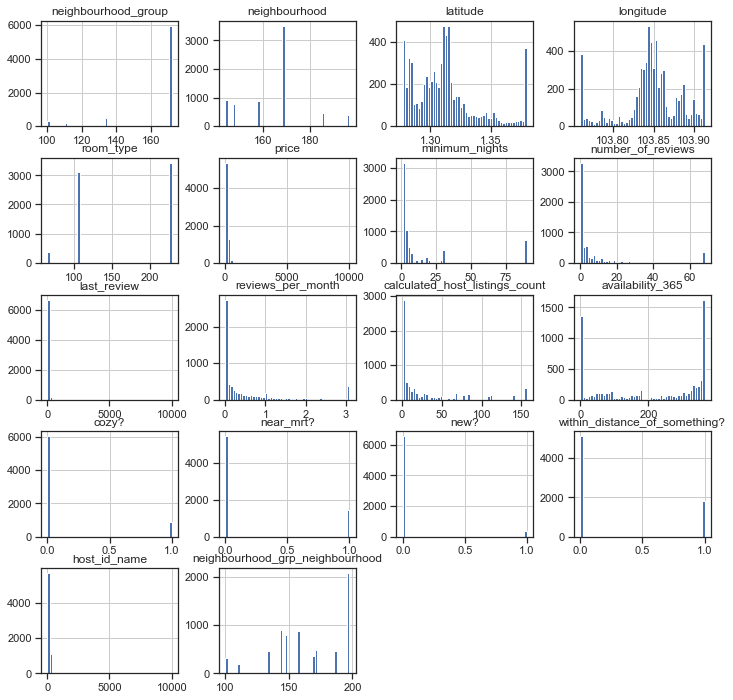

In [1055]:
airbnb_data_num.hist(bins=50, figsize=(12, 12))
plt.show()

#### Visualizing each Continuous Numerical Variable

#### List of Continuous Numerical Variables in the dataset 

As mentioned earlier, since Binning is about converting continuous numerical data into categorical data, I need to find out the List of Continuous Numerical Variables in the dataset in order to start Binning numerical data. 

From my knowledge of differentiating a Discrete Numerical Variable from a Continuous Numerical Variable, the Continuous Numerical Variables in the dataset are:

1. latitude


2. longitude


3. price


4. minimum_nights


5. number_of_reviews


6. reviews_per_month


7. calculated_host_listings_count


8. availability_365


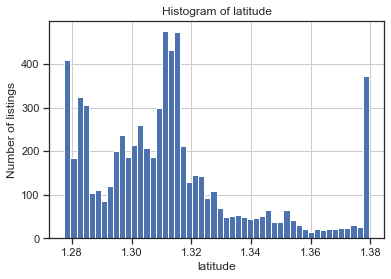

In [1056]:
# latitude variable

plt.hist(airbnb_data_num['latitude'], bins=50)
plt.xlabel('latitude')
plt.ylabel('Number of listings') 
plt.title('Histogram of latitude')
plt.grid(True)

plt.show()

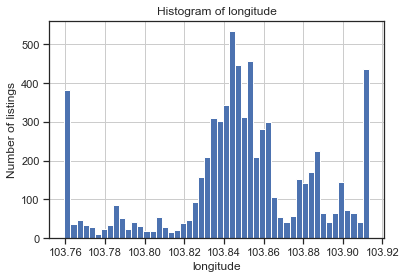

In [1057]:
# longitude variable

plt.hist(airbnb_data_num['longitude'], bins=50)
plt.xlabel('longitude')
plt.ylabel('Number of listings') 
plt.title('Histogram of longitude')
plt.grid(True)

plt.show()

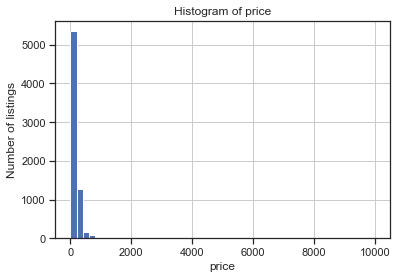

In [1058]:
# price variable

plt.hist(airbnb_data_num['price'], bins=50)
plt.xlabel('price')
plt.ylabel('Number of listings') 
plt.title('Histogram of price')
plt.grid(True)

plt.show()

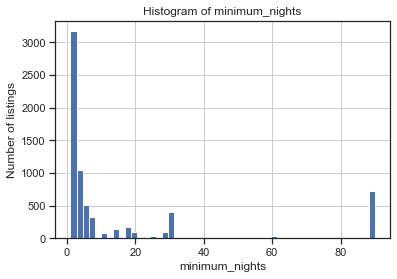

In [1059]:
# minimum_nights variable

plt.hist(airbnb_data_num['minimum_nights'], bins=50)
plt.xlabel('minimum_nights')
plt.ylabel('Number of listings') 
plt.title('Histogram of minimum_nights')
plt.grid(True)

plt.show()

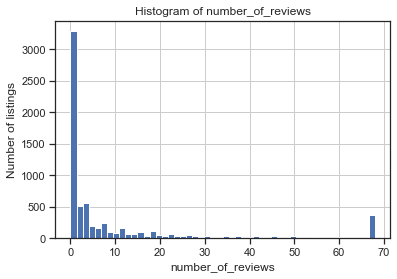

In [1060]:
# number_of_reviews variable

plt.hist(airbnb_data_num['number_of_reviews'], bins=50)
plt.xlabel('number_of_reviews')
plt.ylabel('Number of listings') 
plt.title('Histogram of number_of_reviews')
plt.grid(True)

plt.show()

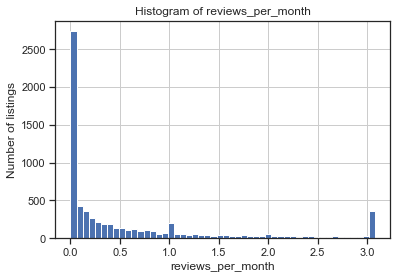

In [1061]:
# reviews_per_month variable

plt.hist(airbnb_data_num['reviews_per_month'], bins=50)
plt.xlabel('reviews_per_month')
plt.ylabel('Number of listings') 
plt.title('Histogram of reviews_per_month')
plt.grid(True)

plt.show()

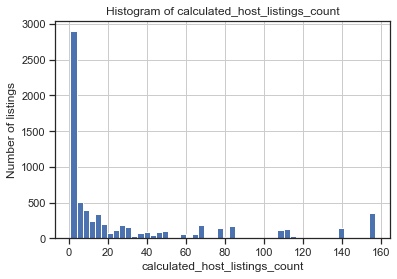

In [1062]:
# calculated_host_listings_count variable

plt.hist(airbnb_data_num['calculated_host_listings_count'], bins=50)
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Number of listings') 
plt.title('Histogram of calculated_host_listings_count')
plt.grid(True)

plt.show()

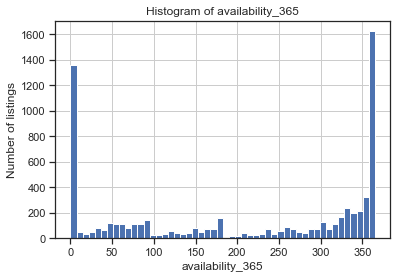

In [1063]:
# availability_365 variable

plt.hist(airbnb_data_num['availability_365'], bins=50)
plt.xlabel('availability_365')
plt.ylabel('Number of listings') 
plt.title('Histogram of availability_365')
plt.grid(True)

plt.show()

### A Need to Discretize / Bin the Continuous Numerical Data?

I do not think it is necessary to Discretize / Bin the Continuous Numerical Data. 

Discretization is used to change the distribution of skewed variables and to minimize the influence of outliers, and hence improve the performance of some machine learning models. Discretization minimizes the effect of outliers by placing outliers into the lower or higher intervals, together with the remaining inlier values of the distribution. With that, these outlier observations no longer differ from the rest of the values at the tails of the distribution, as they are now all together in the same interval or bin. 

However, since I have already dealt with outliers in the dataset in Section 2.2.3: Outliers, there is no need to Discretize / Bin variables to minimize the influence of outliers again.

Therefore, I do not think it is necessary to Discretize / Bin the Continuous Numerical Data. 

### 2.2.6. Feature Scaling

Feature Scaling is about giving each feature fair numerical airtime to different “X” features or columns containing different ranges of numerical values. This means that Feature Scaling changes the scale of features such that all features have similar scale. This allows users to compare feature importance and helps algorithms converge faster and thus improving performance.

Feature Scaling is done because many machine learning algorithms (such as linear models and principal component analysis) are sensitive to the scale and magnitude of the features. Features with bigger value ranges tend to dominate over features with smaller ranges.

For example, values with naturally high numerical values such as a feature of motorbike cost in Indonesian Rupiah, would impact the model more than a feature of the motorbike’s weight in kg, if trying to predict fuel efficiency.

In [1064]:
# Taking a look at the values of each variable in airbnb_data
# to get an idea of the feature magnitudes

airbnb_data.describe()

neighbourhood_group  neighbourhood     latitude    longitude  \
count          6928.000000    6928.000000  6928.000000  6928.000000   
mean            164.533343     164.533343     1.312444   103.848324   
std              19.493114      14.068342     0.026232     0.037757   
min             100.028125     143.455581     1.277413   103.759444   
25%             172.179323     158.022883     1.294730   103.834665   
50%             172.179323     168.894787     1.310205   103.848375   
75%             172.179323     168.894787     1.320852   103.869422   
max             172.179323     197.017544     1.379503   103.913063   

         room_type         price  minimum_nights  number_of_reviews  \
count  6928.000000   6928.000000     6928.000000        6928.000000   
mean    164.533343    164.533343       15.396651          10.685191   
std      63.902376    343.976705       27.267200          18.508085   
min      65.209974      0.000000        1.000000           0.000000   
25%     106.451282     62.000000        1.000000           0.000000   
50%     106.451282    117.500000        3.000000           2.000000   
75%     228.454625    187.000000       14.000000          11.000000   
max     228.454625  10000.000000       90.000000          68.000000   

        last_review  reviews_per_month  calculated_host_listings_count  \
count   6928.000000        6928.000000                     6928.000000   
mean     164.533343           0.613138                       29.764001   
std      159.233035           0.888530                       44.034278   
min       18.000000           0.000000                        1.000000   
25%      131.571429           0.000000                        1.000000   
50%      155.500000           0.170000                        8.000000   
75%      198.547274           0.872500                       38.000000   
max    10000.000000           3.080000                      157.000000   

       availability_365        cozy?    near_mrt?        new?  \
count       6928.000000  6928.000000  6928.000000  6928.00000   
mean         206.547344     0.129763     0.211894     0.05254   
std          147.409497     0.336067     0.408679     0.22313   
min            0.000000     0.000000     0.000000     0.00000   
25%           50.000000     0.000000     0.000000     0.00000   
50%          257.000000     0.000000     0.000000     0.00000   
75%          355.250000     0.000000     0.000000     0.00000   
max          365.000000     1.000000     1.000000     1.00000   

       within_distance_of_something?  host_id_name  \
count                    6928.000000   6928.000000   
mean                        0.263568    164.533343   
std                         0.440600    313.423517   
min                         0.000000     14.000000   
25%                         0.000000     68.333333   
50%                         0.000000    125.000000   
75%                         1.000000    195.808511   
max                         1.000000  10000.000000   

       neighbourhood_grp_neighbourhood  
count                      6928.000000  
mean                        164.533343  
std                          28.060889  
min                         100.028125  
25%                         144.051502  
50%                         158.022883  
75%                         197.017544  
max                         197.513963

### A Need to Scale the Data?

According to the table above, I think it is necesssary to scale the data. 

In the table above, we can observe the main statistics of each variable, e.g. the 25th, 50th and 75th quantiles, the mean, standard deviation and minimum and maximum value. By comparing the minimum and maximum values of a variable to another, we can quickly understand whether our features are in a similar scale. In this case, they are clearly not.

In addition to the table, we can calculate the range of each variables to determine whether the variables are in a similar scale as shown below.

In [1065]:
# Calculating the range of each variables

airbnb_data.max() - airbnb_data.min()

neighbourhood_group                   72.151198
neighbourhood                         53.561963
latitude                               0.102090
longitude                              0.153620
room_type                            163.244651
price                              10000.000000
minimum_nights                        89.000000
number_of_reviews                     68.000000
last_review                         9982.000000
reviews_per_month                      3.080000
calculated_host_listings_count       156.000000
availability_365                     365.000000
cozy?                                  1.000000
near_mrt?                              1.000000
new?                                   1.000000
within_distance_of_something?          1.000000
host_id_name                        9986.000000
neighbourhood_grp_neighbourhood       97.485838
dtype: float64

From the above range calculations, the ranges of the each variable are quite different. 

For example, cozy? variable has a range of 1 while price variable has a range of 10000.

### List of Variables that Needed to be Scaled

1. neighbourhood_group


2. neighbourhood


3. latitude


4. longitude


5. room_type


6. price


7. minimum_nights


8. number_of_reviews


9. last_review


10. reviews_per_month


11. caluculated_host_listings_count 


12. availiablity_365


13. cozy?


14. near_mrt?


15. new?


16. within_distance_of_something?


17. host_id_name


18. neighbourhood_grp_neighbourhood


For me, I think all available variables in the data needs to be scaled even though some variables have the same scale (such as coz? Variable and near_mrt? Variable). This is because, as mentioned earlier, Feature Scaling changes the scale of features such that all features have similar scale. With a similar scale for all variables, it allows users to compare feature importance and helps algorithms converge faster and thus improving performance.


### 5 Methods to Scale Variables

There are 5 Methods to Scale Variables and they are:

1. Standardization (StandardScaler)


2. Mean Normalization


3. Scaling to the Maximum and Minimum values (MinMaxScaler)


4. Maximum Absolute Scaling


5. Scaling to Quantiles and Median - RobustScaling


Note that StandardScaler and MinMaxScaler often produce the best results.


### Method 1: Standardization

Standardization is the process of centering the variable at zero and standardizing the variance to 1. To standardize features, we subtract the mean from each observation and then divide the result by the standard deviation:

\begin{equation}
z = \frac{x - mean(x)}{std(x)}
\end{equation}

The result of the preceding transformation is called the z-score and represents how many standard deviations a given observation deviates from the mean. 

### Method 2: Mean Normalization

In mean normalization, we center the variable at zero and rescale the distribution to the value range. This procedure involves subtracting the mean from each observation and then dividing the result by the difference between the minimum and maximum values:

\begin{equation}
x_{scaled} = \frac{x - mean(x)}{max(x) - min(x)}
\end{equation}

This transformation results in a distribution centered at 0, with its minimum and maximum values within the range of -1 to 1. 

### Method 3: Scaling to the Maximum and Minimum values

Scaling to the minimum and maximum values squeezes the values of the variables between 0 and 1. To implement this scaling technique, we need to subtract the minimum value from all the observations and divide the result by the value range, that is, the difference between the maximum and minimum values:

\begin{equation}
x_{scaled} = \frac{x - min(x)}{max(x) - min(x)}
\end{equation}

### Method 4: Maximum Absolute Scaling

Maximum absolute scaling scales the data to its maximum value; that is, it divides every observation by the maximum value of the variable:

\begin{equation}
x_{scaled} = \frac{x}{max(x)}
\end{equation}

The result of the preceding transformation is a distribution in which the values vary approximately within the range of -1 to 1.

Note: This method is recommended for data that is centered at zero or on sparse data.

### Method 5: Scaling to Quantiles and Median - RobustScaling

When scaling variables to the median and quantiles, the median value is removed from the observations and the result is divided by the inter-quartile range (IQR). The IQR is the range between the 1st quartile and the 3rd quartile, or, in other words, the range between the 25th quantile and the 75th quantile:


\begin{equation}
x_{scaled} = \frac{x - median(x)}{x.quantile(0.75) - x.quantile(0.25)}
\end{equation}

This method is known as robust scaling because it produces more robust estimates for the center and value range of the variable, and is recommended if the data contains outliers.

### Decision on the Ideal Method to Scale All Variables

After trying all the different above available methods to Scale all variables, I decided to use Method 3: Scaling to the Maximum and Minimum values to scale all variables.

This is because Scaling to the Maximum and Minimum values produces the best result for each variable.

### Final Confirmed Scaling Method on all Variables

In [1066]:
# From the decision above, I decided to use Method 3: Scaling to the Maximum and Minimum values to scale all variables.

In [1067]:
# neighbourhood_group variable

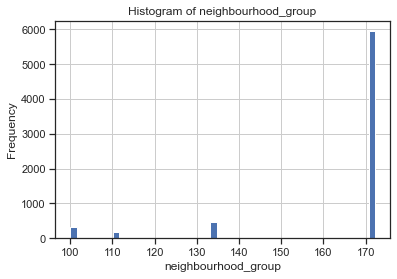

In [1068]:
# Visualizing neighbourhood_group variable (BEFORE Minimum & Maximum Scaling)

plt.hist(airbnb_data['neighbourhood_group'], bins=50)
plt.xlabel('neighbourhood_group')
plt.ylabel('Frequency') 
plt.title('Histogram of neighbourhood_group')
plt.grid(True)

plt.show()

In [1069]:
# Formula to Minimum & Maximum Scale neighbourhood_group variable

airbnb_data['neighbourhood_group'] = (airbnb_data['neighbourhood_group'] - airbnb_data['neighbourhood_group'].min()) / (airbnb_data['neighbourhood_group'].max() - airbnb_data['neighbourhood_group'].min())

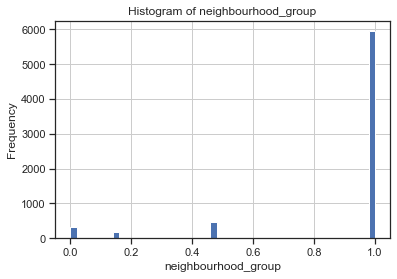

In [1070]:
# Visualizing neighbourhood_group variable (AFTER Minimum & Maximum Scaling)

plt.hist(airbnb_data['neighbourhood_group'], bins=50)
plt.xlabel('neighbourhood_group')
plt.ylabel('Frequency') 
plt.title('Histogram of neighbourhood_group')
plt.grid(True)

plt.show()

In [1071]:
# neighbourhood variable

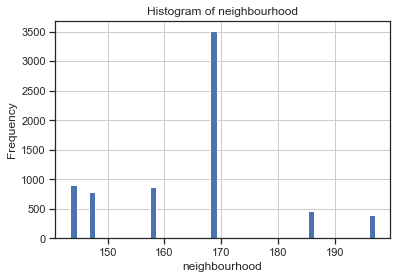

In [1072]:
# Visualizing neighbourhood variable (BEFORE Minimum & Maximum Scaling)

plt.hist(airbnb_data['neighbourhood'], bins=50)
plt.xlabel('neighbourhood')
plt.ylabel('Frequency') 
plt.title('Histogram of neighbourhood')
plt.grid(True)

plt.show()

In [1073]:
# Formula to Minimum & Maximum Scale neighbourhood variable

airbnb_data['neighbourhood'] = (airbnb_data['neighbourhood'] - airbnb_data['neighbourhood'].min()) / (airbnb_data['neighbourhood'].max() - airbnb_data['neighbourhood'].min())

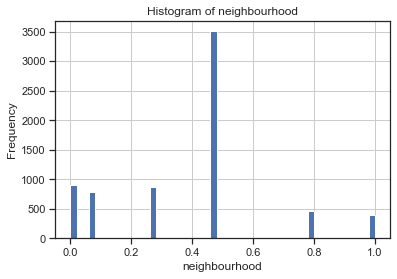

In [1074]:
# Visualizing neighbourhood variable (AFTER Minimum & Maximum Scaling)

plt.hist(airbnb_data['neighbourhood'], bins=50)
plt.xlabel('neighbourhood')
plt.ylabel('Frequency') 
plt.title('Histogram of neighbourhood')
plt.grid(True)

plt.show()

In [1075]:
# latitude variable

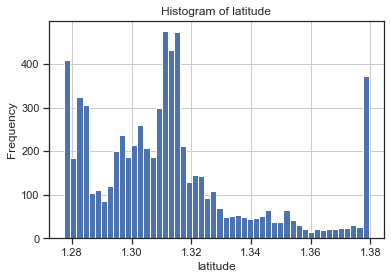

In [1076]:
# Visualizing latitude variable (BEFORE Minimum & Maximum Scaling)

plt.hist(airbnb_data['latitude'], bins=50)
plt.xlabel('latitude')
plt.ylabel('Frequency') 
plt.title('Histogram of latitude')
plt.grid(True)

plt.show()

In [1077]:
# Formula to Minimum & Maximum Scale latitude variable

airbnb_data['latitude'] = (airbnb_data['latitude'] - airbnb_data['latitude'].min()) / (airbnb_data['latitude'].max() - airbnb_data['latitude'].min())

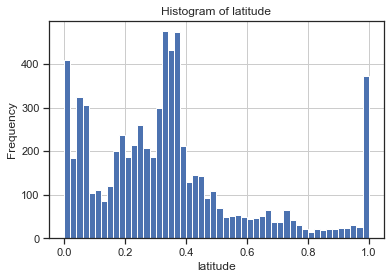

In [1078]:
# Visualizing latitude variable (AFTER Minimum & Maximum Scaling)

plt.hist(airbnb_data['latitude'], bins=50)
plt.xlabel('latitude')
plt.ylabel('Frequency') 
plt.title('Histogram of latitude')
plt.grid(True)

plt.show()

In [1079]:
# longitude variable

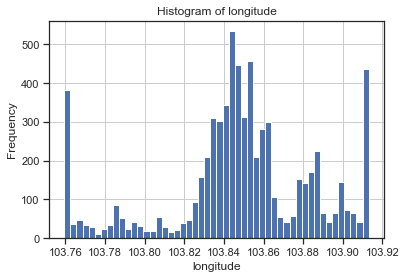

In [1080]:
# Visualizing longitude variable (BEFORE Minimum & Maximum Scaling)

plt.hist(airbnb_data['longitude'], bins=50)
plt.xlabel('longitude')
plt.ylabel('Frequency') 
plt.title('Histogram of longitude')
plt.grid(True)

plt.show()

In [1081]:
# Formula to Minimum & Maximum Scale longitude variable

airbnb_data['longitude'] = (airbnb_data['longitude'] - airbnb_data['longitude'].min()) / (airbnb_data['longitude'].max() - airbnb_data['longitude'].min())

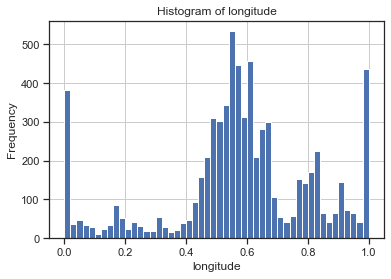

In [1082]:
# Visualizing longitude variable (AFTER Minimum & Maximum Scaling)

plt.hist(airbnb_data['longitude'], bins=50)
plt.xlabel('longitude')
plt.ylabel('Frequency') 
plt.title('Histogram of longitude')
plt.grid(True)

plt.show()

In [1083]:
# room_type variable

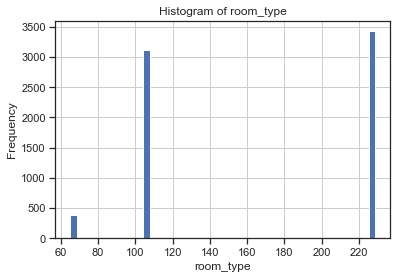

In [1084]:
# Visualizing room_type variable (BEFORE Minimum & Maximum Scaling)

plt.hist(airbnb_data['room_type'], bins=50)
plt.xlabel('room_type')
plt.ylabel('Frequency') 
plt.title('Histogram of room_type')
plt.grid(True)

plt.show()

In [1085]:
# Formula to Minimum & Maximum Scale room_type variable

airbnb_data['room_type'] = (airbnb_data['room_type'] - airbnb_data['room_type'].min()) / (airbnb_data['room_type'].max() - airbnb_data['room_type'].min())

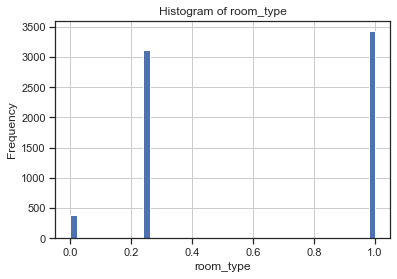

In [1086]:
# Visualizing room_type variable (AFTER Minimum & Maximum Scaling)

plt.hist(airbnb_data['room_type'], bins=50)
plt.xlabel('room_type')
plt.ylabel('Frequency') 
plt.title('Histogram of room_type')
plt.grid(True)

plt.show()

In [1087]:
# price variable

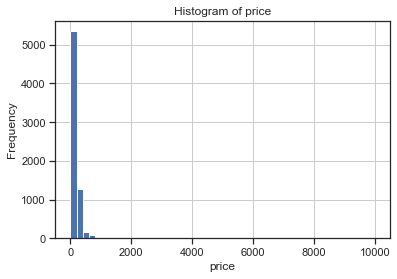

In [1088]:
# Visualizing price variable (BEFORE Minimum & Maximum Scaling)

plt.hist(airbnb_data['price'], bins=50)
plt.xlabel('price')
plt.ylabel('Frequency') 
plt.title('Histogram of price')
plt.grid(True)

plt.show()

In [1089]:
# Formula to Minimum & Maximum Scale price variable

airbnb_data['price'] = (airbnb_data['price'] - airbnb_data['price'].min()) / (airbnb_data['price'].max() - airbnb_data['price'].min())

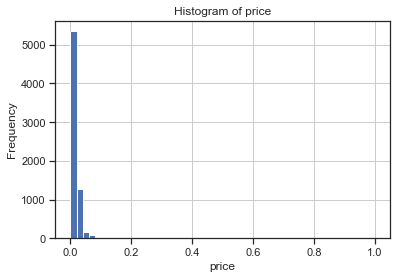

In [1090]:
# Visualizing price variable (AFTER Minimum & Maximum Scaling)

plt.hist(airbnb_data['price'], bins=50)
plt.xlabel('price')
plt.ylabel('Frequency') 
plt.title('Histogram of price')
plt.grid(True)

plt.show()

In [1091]:
# minimum_nights variable

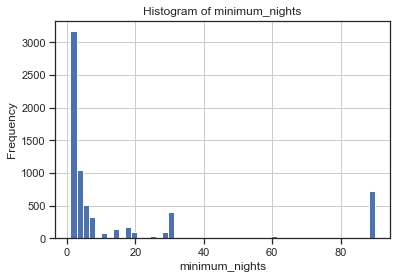

In [1092]:
# Visualizing minimum_nights variable (BEFORE Minimum & Maximum Scaling)

plt.hist(airbnb_data['minimum_nights'], bins=50)
plt.xlabel('minimum_nights')
plt.ylabel('Frequency') 
plt.title('Histogram of minimum_nights')
plt.grid(True)

plt.show()

In [1093]:
# Formula to Minimum & Maximum Scale minimum_nights variable

airbnb_data['minimum_nights'] = (airbnb_data['minimum_nights'] - airbnb_data['minimum_nights'].min()) / (airbnb_data['minimum_nights'].max() - airbnb_data['minimum_nights'].min())

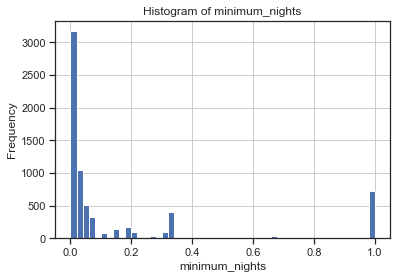

In [1094]:
# Visualizing minimum_nights variable (AFTER Minimum & Maximum Scaling)

plt.hist(airbnb_data['minimum_nights'], bins=50)
plt.xlabel('minimum_nights')
plt.ylabel('Frequency') 
plt.title('Histogram of minimum_nights')
plt.grid(True)

plt.show()

In [1095]:
# number_of_reviews variable

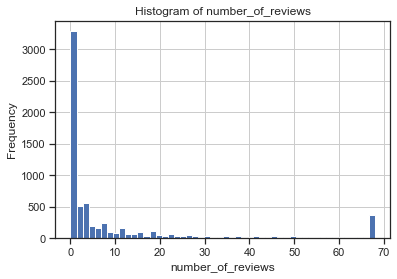

In [1096]:
# Visualizing number_of_reviews variable (BEFORE Minimum & Maximum Scaling)

plt.hist(airbnb_data['number_of_reviews'], bins=50)
plt.xlabel('number_of_reviews')
plt.ylabel('Frequency') 
plt.title('Histogram of number_of_reviews')
plt.grid(True)

plt.show()

In [1097]:
# Formula to Minimum & Maximum Scale number_of_reviews variable

airbnb_data['number_of_reviews'] = (airbnb_data['number_of_reviews'] - airbnb_data['number_of_reviews'].min()) / (airbnb_data['number_of_reviews'].max() - airbnb_data['number_of_reviews'].min())

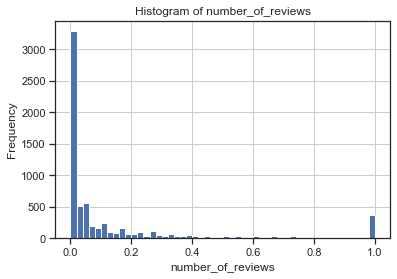

In [1098]:
# Visualizing number_of_reviews variable (AFTER Minimum & Maximum Scaling)

plt.hist(airbnb_data['number_of_reviews'], bins=50)
plt.xlabel('number_of_reviews')
plt.ylabel('Frequency') 
plt.title('Histogram of number_of_reviews')
plt.grid(True)

plt.show()

In [1099]:
# last_review variable

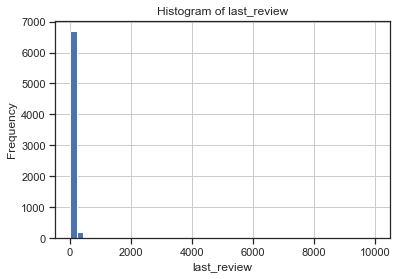

In [1100]:
# Visualizing last_review variable (BEFORE Minimum & Maximum Scaling)

plt.hist(airbnb_data['last_review'], bins=50)
plt.xlabel('last_review')
plt.ylabel('Frequency') 
plt.title('Histogram of last_review')
plt.grid(True)

plt.show()

In [1101]:
# Formula to Minimum & Maximum Scale last_review variable

airbnb_data['last_review'] = (airbnb_data['last_review'] - airbnb_data['last_review'].min()) / (airbnb_data['last_review'].max() - airbnb_data['last_review'].min())

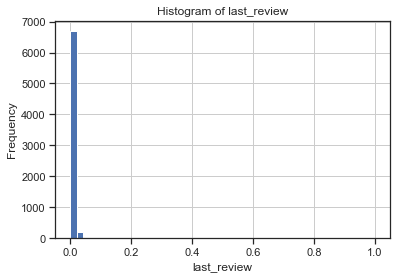

In [1102]:
# Visualizing last_review variable (AFTER Minimum & Maximum Scaling)

plt.hist(airbnb_data['last_review'], bins=50)
plt.xlabel('last_review')
plt.ylabel('Frequency') 
plt.title('Histogram of last_review')
plt.grid(True)

plt.show()

In [1103]:
# reviews_per_month variable

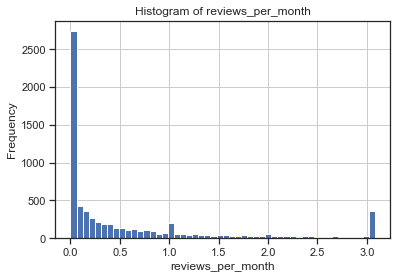

In [1104]:
# Visualizing reviews_per_month variable (BEFORE Minimum & Maximum Scaling)

plt.hist(airbnb_data['reviews_per_month'], bins=50)
plt.xlabel('reviews_per_month')
plt.ylabel('Frequency') 
plt.title('Histogram of reviews_per_month')
plt.grid(True)

plt.show()

In [1105]:
# Formula to Minimum & Maximum Scale reviews_per_month variable

airbnb_data['reviews_per_month'] = (airbnb_data['reviews_per_month'] - airbnb_data['reviews_per_month'].min()) / (airbnb_data['reviews_per_month'].max() - airbnb_data['reviews_per_month'].min())

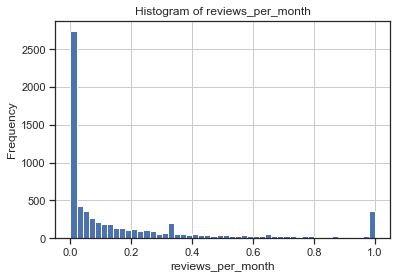

In [1106]:
# Visualizing reviews_per_month variable (AFTER Minimum & Maximum Scaling)

plt.hist(airbnb_data['reviews_per_month'], bins=50)
plt.xlabel('reviews_per_month')
plt.ylabel('Frequency') 
plt.title('Histogram of reviews_per_month')
plt.grid(True)

plt.show()

In [1107]:
# calculated_host_listings_count variable

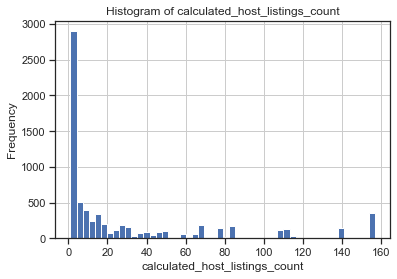

In [1108]:
# Visualizing calculated_host_listings_count variable (BEFORE Minimum & Maximum Scaling)

plt.hist(airbnb_data['calculated_host_listings_count'], bins=50)
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Frequency') 
plt.title('Histogram of calculated_host_listings_count')
plt.grid(True)

plt.show()

In [1109]:
# Formula to Minimum & Maximum Scale calculated_host_listings_count variable

airbnb_data['calculated_host_listings_count'] = (airbnb_data['calculated_host_listings_count'] - airbnb_data['calculated_host_listings_count'].min()) / (airbnb_data['calculated_host_listings_count'].max() - airbnb_data['calculated_host_listings_count'].min())

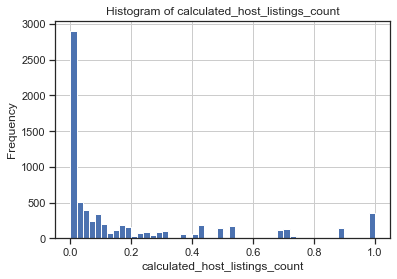

In [1110]:
# Visualizing calculated_host_listings_count variable (AFTER Minimum & Maximum Scaling)

plt.hist(airbnb_data['calculated_host_listings_count'], bins=50)
plt.xlabel('calculated_host_listings_count')
plt.ylabel('Frequency') 
plt.title('Histogram of calculated_host_listings_count')
plt.grid(True)

plt.show()

In [1111]:
# availability_365 variable

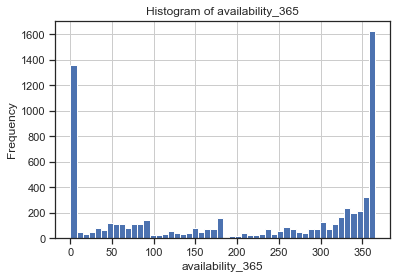

In [1112]:
# Visualizing availability_365 variable (BEFORE Minimum & Maximum Scaling)

plt.hist(airbnb_data['availability_365'], bins=50)
plt.xlabel('availability_365')
plt.ylabel('Frequency') 
plt.title('Histogram of availability_365')
plt.grid(True)

plt.show()

In [1113]:
# Formula to Minimum & Maximum Scale availability_365 variable

airbnb_data['availability_365'] = (airbnb_data['availability_365'] - airbnb_data['availability_365'].min()) / (airbnb_data['availability_365'].max() - airbnb_data['availability_365'].min())

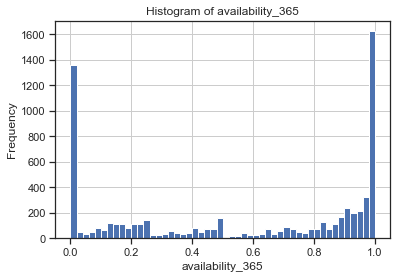

In [1114]:
# Visualizing availability_365 variable (AFTER Minimum & Maximum Scaling)

plt.hist(airbnb_data['availability_365'], bins=50)
plt.xlabel('availability_365')
plt.ylabel('Frequency') 
plt.title('Histogram of availability_365')
plt.grid(True)

plt.show()

In [1115]:
# cozy? variable

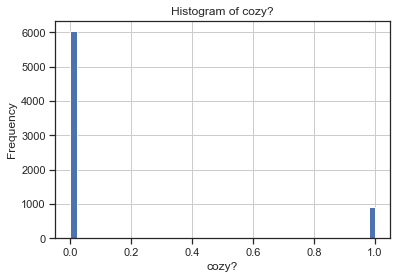

In [1116]:
# Visualizing cozy? variable (BEFORE Minimum & Maximum Scaling)

plt.hist(airbnb_data['cozy?'], bins=50)
plt.xlabel('cozy?')
plt.ylabel('Frequency') 
plt.title('Histogram of cozy?')
plt.grid(True)

plt.show()

In [1117]:
# Formula to Minimum & Maximum Scale cozy? variable

airbnb_data['cozy?'] = (airbnb_data['cozy?'] - airbnb_data['cozy?'].min()) / (airbnb_data['cozy?'].max() - airbnb_data['cozy?'].min())

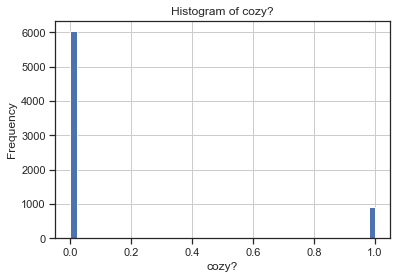

In [1118]:
# Visualizing cozy? variable (AFTER Minimum & Maximum Scaling)

plt.hist(airbnb_data['cozy?'], bins=50)
plt.xlabel('cozy?')
plt.ylabel('Frequency') 
plt.title('Histogram of cozy?')
plt.grid(True)

plt.show()

In [1119]:
# near_mrt? variable

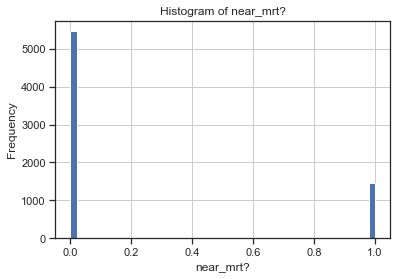

In [1120]:
# Visualizing near_mrt? variable (BEFORE Minimum & Maximum Scaling)

plt.hist(airbnb_data['near_mrt?'], bins=50)
plt.xlabel('near_mrt?')
plt.ylabel('Frequency') 
plt.title('Histogram of near_mrt?')
plt.grid(True)

plt.show()

In [1121]:
# Formula to Minimum & Maximum Scale near_mrt? variable

airbnb_data['near_mrt?'] = (airbnb_data['near_mrt?'] - airbnb_data['near_mrt?'].min()) / (airbnb_data['near_mrt?'].max() - airbnb_data['near_mrt?'].min())

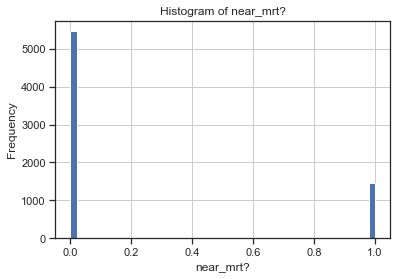

In [1122]:
# Visualizing near_mrt? variable (AFTER Minimum & Maximum Scaling)

plt.hist(airbnb_data['near_mrt?'], bins=50)
plt.xlabel('near_mrt?')
plt.ylabel('Frequency') 
plt.title('Histogram of near_mrt?')
plt.grid(True)

plt.show()

In [1123]:
# new? variable

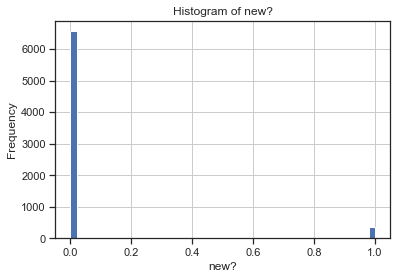

In [1124]:
# Visualizing new? variable (BEFORE Minimum & Maximum Scaling)

plt.hist(airbnb_data['new?'], bins=50)
plt.xlabel('new?')
plt.ylabel('Frequency') 
plt.title('Histogram of new?')
plt.grid(True)

plt.show()

In [1125]:
# Formula to Minimum & Maximum Scale new? variable

airbnb_data['new?'] = (airbnb_data['new?'] - airbnb_data['new?'].min()) / (airbnb_data['new?'].max() - airbnb_data['new?'].min())

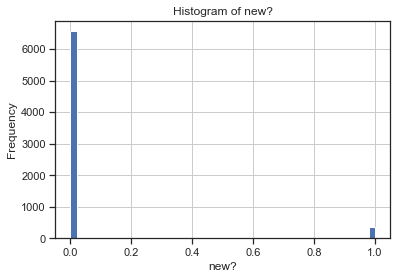

In [1126]:
# Visualizing new? variable (AFTER Minimum & Maximum Scaling)

plt.hist(airbnb_data['new?'], bins=50)
plt.xlabel('new?')
plt.ylabel('Frequency') 
plt.title('Histogram of new?')
plt.grid(True)

plt.show()

In [1127]:
# within_distance_of_something? variable

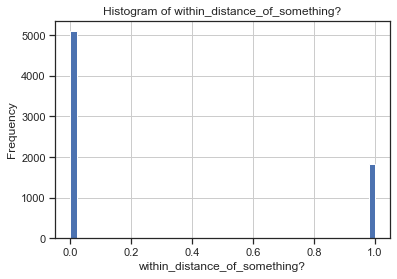

In [1128]:
# Visualizing within_distance_of_something? variable (BEFORE Minimum & Maximum Scaling)

plt.hist(airbnb_data['within_distance_of_something?'], bins=50)
plt.xlabel('within_distance_of_something?')
plt.ylabel('Frequency') 
plt.title('Histogram of within_distance_of_something?')
plt.grid(True)

plt.show()

In [1129]:
# Formula to Minimum & Maximum Scale within_distance_of_something? variable

airbnb_data['within_distance_of_something?'] = (airbnb_data['within_distance_of_something?'] - airbnb_data['within_distance_of_something?'].min()) / (airbnb_data['within_distance_of_something?'].max() - airbnb_data['within_distance_of_something?'].min())

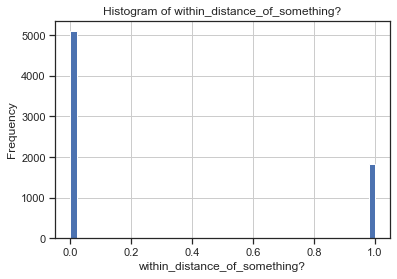

In [1130]:
# Visualizing within_distance_of_something? variable (AFTER Minimum & Maximum Scaling)

plt.hist(airbnb_data['within_distance_of_something?'], bins=50)
plt.xlabel('within_distance_of_something?')
plt.ylabel('Frequency') 
plt.title('Histogram of within_distance_of_something?')
plt.grid(True)

plt.show()

In [1131]:
# host_id_name variable

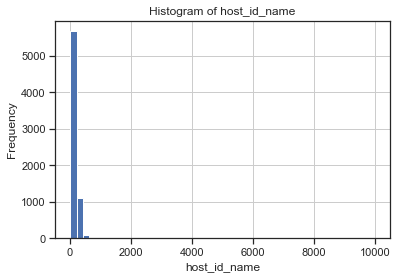

In [1132]:
# Visualizing host_id_name variable (BEFORE Minimum & Maximum Scaling)

plt.hist(airbnb_data['host_id_name'], bins=50)
plt.xlabel('host_id_name')
plt.ylabel('Frequency') 
plt.title('Histogram of host_id_name')
plt.grid(True)

plt.show()

In [1133]:
# Formula to Minimum & Maximum Scale host_id_name variable

airbnb_data['host_id_name'] = (airbnb_data['host_id_name'] - airbnb_data['host_id_name'].min()) / (airbnb_data['host_id_name'].max() - airbnb_data['host_id_name'].min())

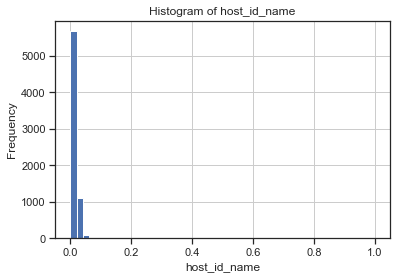

In [1134]:
# Visualizing host_id_name variable (AFTER Minimum & Maximum Scaling)

plt.hist(airbnb_data['host_id_name'], bins=50)
plt.xlabel('host_id_name')
plt.ylabel('Frequency') 
plt.title('Histogram of host_id_name')
plt.grid(True)

plt.show()

In [1135]:
# neighbourhood_grp_neighbourhood variable

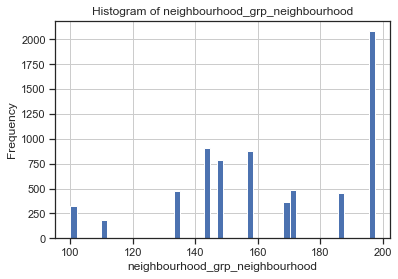

In [1136]:
# Visualizing neighbourhood_grp_neighbourhood variable (BEFORE Minimum & Maximum Scaling)

plt.hist(airbnb_data['neighbourhood_grp_neighbourhood'], bins=50)
plt.xlabel('neighbourhood_grp_neighbourhood')
plt.ylabel('Frequency') 
plt.title('Histogram of neighbourhood_grp_neighbourhood')
plt.grid(True)

plt.show()

In [1137]:
# Formula to Minimum & Maximum Scale neighbourhood_grp_neighbourhood variable

airbnb_data['neighbourhood_grp_neighbourhood'] = (airbnb_data['neighbourhood_grp_neighbourhood'] - airbnb_data['neighbourhood_grp_neighbourhood'].min()) / (airbnb_data['neighbourhood_grp_neighbourhood'].max() - airbnb_data['neighbourhood_grp_neighbourhood'].min())

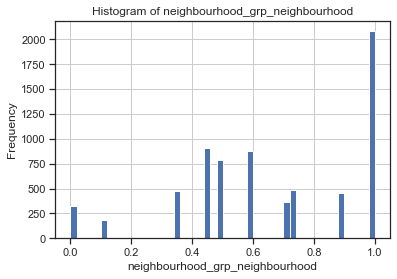

In [1138]:
# Visualizing neighbourhood_grp_neighbourhood variable (AFTER Minimum & Maximum Scaling)

plt.hist(airbnb_data['neighbourhood_grp_neighbourhood'], bins=50)
plt.xlabel('neighbourhood_grp_neighbourhood')
plt.ylabel('Frequency') 
plt.title('Histogram of neighbourhood_grp_neighbourhood')
plt.grid(True)

plt.show()

In [1139]:
# Describing each variable in the dataset (AFTER Minimum & Maximum Scaling for all variables)

airbnb_data.describe()

neighbourhood_group  neighbourhood     latitude    longitude  \
count          6928.000000    6928.000000  6928.000000  6928.000000   
mean              0.894028       0.393521     0.343134     0.578573   
std               0.270170       0.262655     0.256953     0.245781   
min               0.000000       0.000000     0.000000     0.000000   
25%               1.000000       0.271971     0.169620     0.489661   
50%               1.000000       0.474949     0.321202     0.578908   
75%               1.000000       0.474949     0.425497     0.715918   
max               1.000000       1.000000     1.000000     1.000000   

         room_type        price  minimum_nights  number_of_reviews  \
count  6928.000000  6928.000000     6928.000000        6928.000000   
mean      0.608433     0.016453        0.161760           0.157135   
std       0.391452     0.034398        0.306373           0.272178   
min       0.000000     0.000000        0.000000           0.000000   
25%       0.252635     0.006200        0.000000           0.000000   
50%       0.252635     0.011750        0.022472           0.029412   
75%       1.000000     0.018700        0.146067           0.161765   
max       1.000000     1.000000        1.000000           1.000000   

       last_review  reviews_per_month  calculated_host_listings_count  \
count  6928.000000        6928.000000                     6928.000000   
mean      0.014680           0.199071                        0.184385   
std       0.015952           0.288484                        0.282271   
min       0.000000           0.000000                        0.000000   
25%       0.011378           0.000000                        0.000000   
50%       0.013775           0.055195                        0.044872   
75%       0.018087           0.283279                        0.237179   
max       1.000000           1.000000                        1.000000   

       availability_365        cozy?    near_mrt?        new?  \
count       6928.000000  6928.000000  6928.000000  6928.00000   
mean           0.565883     0.129763     0.211894     0.05254   
std            0.403862     0.336067     0.408679     0.22313   
min            0.000000     0.000000     0.000000     0.00000   
25%            0.136986     0.000000     0.000000     0.00000   
50%            0.704110     0.000000     0.000000     0.00000   
75%            0.973288     0.000000     0.000000     0.00000   
max            1.000000     1.000000     1.000000     1.00000   

       within_distance_of_something?  host_id_name  \
count                    6928.000000   6928.000000   
mean                        0.263568      0.015074   
std                         0.440600      0.031386   
min                         0.000000      0.000000   
25%                         0.000000      0.005441   
50%                         0.000000      0.011116   
75%                         1.000000      0.018206   
max                         1.000000      1.000000   

       neighbourhood_grp_neighbourhood  
count                      6928.000000  
mean                          0.661688  
std                           0.287846  
min                           0.000000  
25%                           0.451587  
50%                           0.594904  
75%                           0.994908  
max                           1.000000

### 2.3 Correlation Analysis

In Correlation Analysis, I will investigate the relationships between different features/variables in my Final Cleansed and Transformed Dataset.

In [1140]:
# Displaying the first 5 rows of the Final Cleansed and Transformed Dataset
airbnb_data.head()

neighbourhood_group  neighbourhood  latitude  longitude  room_type   price  \
0             0.148342       0.474949  1.000000   0.236666   0.252635  0.0083   
1             1.000000       0.474949  0.538118   0.167729   0.252635  0.0081   
2             0.148342       0.474949  1.000000   0.242329   0.252635  0.0069   
3             0.479135       0.474949  0.666045   1.000000   0.252635  0.0206   
4             0.479135       0.474949  0.668591   1.000000   0.252635  0.0094   

   minimum_nights  number_of_reviews  last_review  reviews_per_month  \
0         1.00000           0.014706     0.006512           0.003247   
1         1.00000           0.264706     0.006311           0.090909   
2         0.05618           0.294118     0.005109           0.064935   
3         0.00000           0.205882     0.012989           0.048701   
4         0.00000           0.323529     0.012366           0.071429   

   calculated_host_listings_count  availability_365  cozy?  near_mrt?  new?  \
0                        0.006410          1.000000    1.0        0.0   0.0   
1                        0.000000          1.000000    0.0        0.0   0.0   
2                        0.006410          1.000000    1.0        0.0   0.0   
3                        0.051282          0.967123    0.0        0.0   0.0   
4                        0.051282          0.972603    0.0        0.0   0.0   

   within_distance_of_something?  host_id_name  \
0                            0.0      0.006209   
1                            0.0      0.006709   
2                            0.0      0.006209   
3                            1.0      0.015644   
4                            1.0      0.015644   

   neighbourhood_grp_neighbourhood  
0                         0.109791  
1                         1.000000  
2                         0.109791  
3                         0.354617  
4                         0.354617

#### Basic Summary of the Final Cleansed and Transformed Dataset

In [1141]:
# Displaying the no. of rows and columns in the format of (no. of rows, no. of columns)
print(airbnb_data.shape) 

# Displaying the size of data by using the formula: (no. of rows * no. of columns)
print(airbnb_data.size)   

(6928, 18)
124704


#### In-depth Overview of the Final Cleansed and Transformed Dataset

In [1142]:
# Viewing the number of items and data type of each column
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6928 entries, 0 to 7906
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   neighbourhood_group              6928 non-null   float64
 1   neighbourhood                    6928 non-null   float64
 2   latitude                         6928 non-null   float64
 3   longitude                        6928 non-null   float64
 4   room_type                        6928 non-null   float64
 5   price                            6928 non-null   float64
 6   minimum_nights                   6928 non-null   float64
 7   number_of_reviews                6928 non-null   float64
 8   last_review                      6928 non-null   float64
 9   reviews_per_month                6928 non-null   float64
 10  calculated_host_listings_count   6928 non-null   float64
 11  availability_365                 6928 non-null   float64
 12  cozy?               

In [1143]:
# Showing the correlations between the variables
airbnb_data.corr()

neighbourhood_group  neighbourhood  latitude  \
neighbourhood_group                         1.000000      -0.121619 -0.671942   
neighbourhood                              -0.121619       1.000000  0.093793   
latitude                                   -0.671942       0.093793  1.000000   
longitude                                  -0.276802      -0.127286  0.011004   
room_type                                   0.190992       0.005847 -0.182707   
price                                       0.056670       0.040899 -0.062255   
minimum_nights                             -0.061864       0.037680  0.038445   
number_of_reviews                           0.006713      -0.019450 -0.006521   
last_review                                 0.016647       0.020626 -0.006790   
reviews_per_month                           0.021848      -0.003737 -0.030579   
calculated_host_listings_count              0.193728      -0.025919 -0.185781   
availability_365                            0.057995       0.006562 -0.086111   
cozy?                                      -0.064273      -0.029750  0.051567   
near_mrt?                                   0.047575      -0.032618  0.026851   
new?                                        0.030050       0.018751 -0.001793   
within_distance_of_something?               0.051588      -0.016812 -0.003625   
host_id_name                                0.060522       0.046442 -0.062975   
neighbourhood_grp_neighbourhood             0.694672       0.501351 -0.470946   

                                 longitude  room_type     price  \
neighbourhood_group              -0.276802   0.190992  0.056670   
neighbourhood                    -0.127286   0.005847  0.040899   
latitude                          0.011004  -0.182707 -0.062255   
longitude                         1.000000   0.040683 -0.030706   
room_type                         0.040683   1.000000  0.185775   
price                            -0.030706   0.185775  1.000000   
minimum_nights                   -0.057254  -0.014502 -0.038739   
number_of_reviews                 0.118483   0.013316 -0.049196   
last_review                      -0.038746   0.064153  0.462918   
reviews_per_month                 0.110495   0.049994 -0.037506   
calculated_host_listings_count    0.059021   0.285507  0.007129   
availability_365                 -0.032873  -0.047411  0.017500   
cozy?                             0.021088   0.035207 -0.035481   
near_mrt?                        -0.012752   0.100271 -0.007614   
new?                             -0.035760   0.046947 -0.018341   
within_distance_of_something?    -0.023783   0.082058 -0.022119   
host_id_name                     -0.034202   0.185518  0.911177   
neighbourhood_grp_neighbourhood  -0.356063   0.154825  0.081578   

                                 minimum_nights  number_of_reviews  \
neighbourhood_group                   -0.061864           0.006713   
neighbourhood                          0.037680          -0.019450   
latitude                               0.038445          -0.006521   
longitude                             -0.057254           0.118483   
room_type                             -0.014502           0.013316   
price                                 -0.038739          -0.049196   
minimum_nights                         1.000000          -0.149993   
number_of_reviews                     -0.149993           1.000000   
last_review                            0.019289          -0.053272   
reviews_per_month                     -0.221593           0.742462   
calculated_host_listings_count         0.066842          -0.157980   
availability_365                       0.194989          -0.077001   
cozy?                                 -0.010816           0.069281   
near_mrt?                              0.004362           0.013344   
new?                                  -0.010188           0.040186   
within_distance_of_something?         -0.019205           0.026906   
host_id_name                 

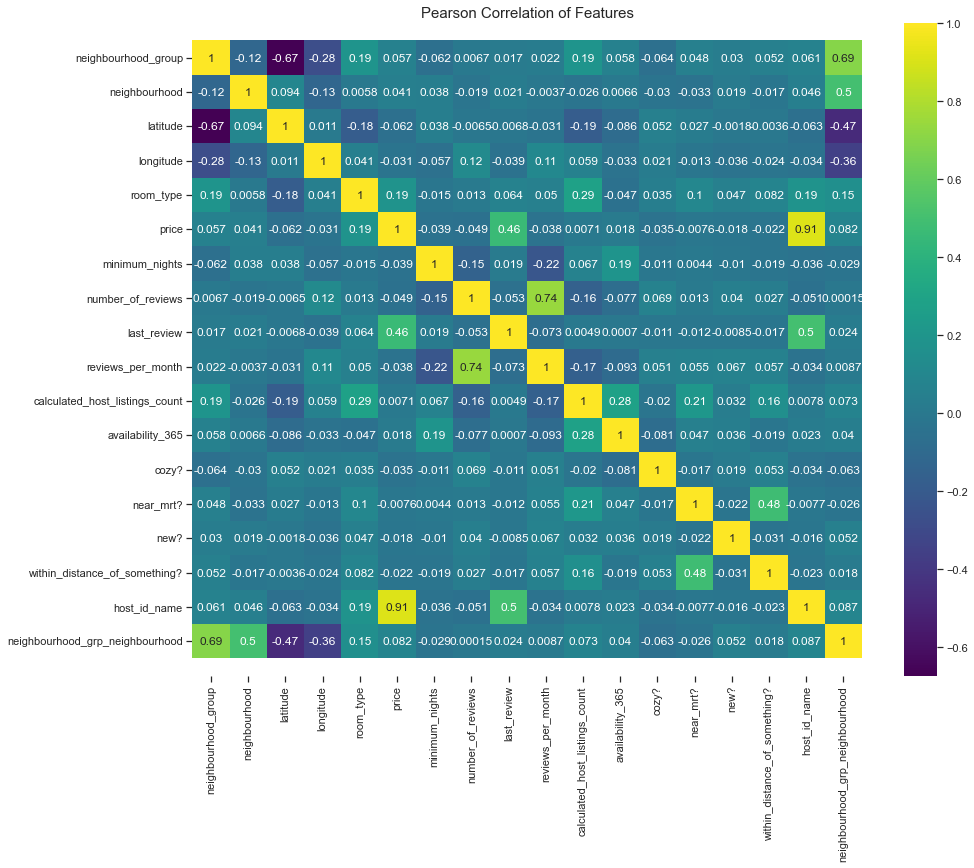

In [1144]:
# Heatmap: the correlation between any two features/variables
colormap = plt.cm.viridis
plt.figure(figsize=(15,12))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(airbnb_data.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

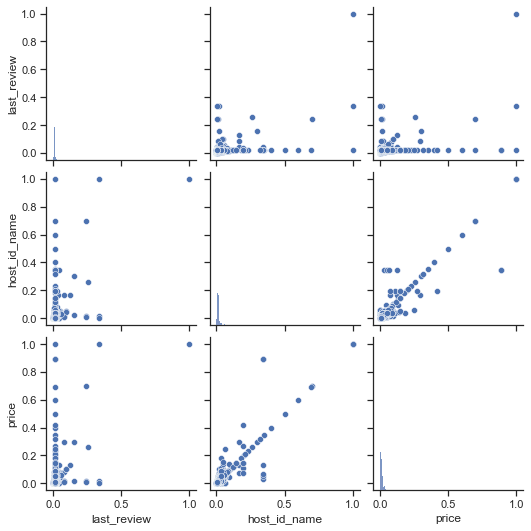

In [1145]:
# Scatter matrix
sns.set(style="ticks")
sns.pairplot(airbnb_data[['last_review', 'host_id_name', 'price']])

### Conclusion - Which features / variables are likely helpful to make predictions for this dataset's Regression Problem (to predict the rental price of a listed Airbnb property) ?

After investigating the relationships between different features/variables, there are 2 variables that are likely helpful to make predictions for this dataset's Regression Problem - to predict the rental price of a listed Airbnb property.

The 2 variables that are likely helpful to make predictions for this dataset's Regression Problem are:

1. last_review


2. host_id_name


These 2 variables that are likely helpful to make predictions for this dataset's Regression Problem because according to the heatmap above, these 2 variables each have a higher correlation of 0.4 and above with the target variable - price than each of the other variables' correlation of around 0.01 to 0.2 with the target variable - price.

### Did I create any new features / variables for this dataset's Regression Problem (to predict the rental price of a listed Airbnb property) ?

For me, yes I did create features / variables for this dataset's Regression Problem (to predict the rental price of a listed Airbnb property). 

I created 6 create features / variables for this dataset's Regression Problem and they are:

1. cozy?


2. near_mrt?


3. new?


4. within_distance_of_something


5. host_id_name


6. neighbourhood_grp_neighbourhood


### Did I drop any features/variables?

Yes, I did drop variables.

I dropped 4 variables and they are: 

1. id


2. name


3. host_id


4. host_name


The reasons for dropping these variables was explained earlier in Section 2.2.2 Feature Engineering and I would repeat the explanation for ease of reference as stated below.

#### Dropping id variable

I decided to drop id variable because...

1. I found out that there are too many unique values in id Column - id variable has very high cardinality with 7907 unique categories. This would result in algorithms being prone to overfitting or being unable to score an observation. 


2. In addition, according to the data dictionary of listings.csv provided in the Machine Learning Assignment 1 Brief, id variable only contains the listing ID. With that, the sole purpose of id variable is only to help uniquely identify each row of listing record in listings.csv. In relation to this Machine Learning Assignment 1 dataset's regression problem, id is just an irrelevant feature. Thus, I do not think that the id variable would be of any help to predict the rental price of a listed Airbnb property. (i.e. I think that there would not be any relationship or there may be close to 0 relationship between id variable and the target variable - price variable)


#### Dropping name Column

I decided to drop name Column because...

1. As mentioned earlier, there are too many unique values in name Column - name variable has very high cardinality with 7458 unique categories before filtering. This would result in algorithms being prone to overfitting or being unable to score an observation. 


2. In addition, according to the data dictionary of listings.csv provided in the Machine Learning Assignment 1 Brief, name variable only contains the name of listing. This explains the very long listing names for each name value in name variable. With very long values, it is not easy to visualise the data.


3. Lastly, in relation to this Machine Learning Assignment 1 dataset's regression problem, after creating new columns based on the values in name column, name is just an irrelevant feature. Thus, I do not think that the name variable would be of any help to predict the rental price of a listed Airbnb property. (i.e. I think that there would not be any relationship or there may be close to 0 relationship between name variable and the target variable - price variable)


#### Dropping host_id and host_name Variables

After creating a new variable named 'host_id_name' by joining host_id and host_name variables together, I decided to drop both host_id and host_name variables because...

1. As mentioned earlier, there are too many unique values in host_id and host_names Columns - both host_id and host_name variables have very high cardinality with 2518 and 1723 unique categories respectively after filtering. This would result in algorithms being prone to overfitting or being unable to score an observation. 


2. After creating a new variable named 'host_id_name' by joining host_id and host_name variables together, host_id and host_name varaibles have now each become a repetitive variable. This is because host_id and host_name variables each contain a part of a value of host_id_name variable.


2. Lastly, in relation to this Machine Learning Assignment 1 dataset's regression problem, after creating a new variable named 'host_id_name' by joining host_id and host_name variables together, host_id and host_name are now both an irrelevant feature. Thus, I do not think that the host_id and host_name variables would be of any help to predict the rental price of a listed Airbnb property. (i.e. I think that there would not be any relationship or there may be close to 0 relationship between each host_id and host_name variable and the target variable - price variable)

### 2.4 Export the data

In [1146]:
airbnb_data.to_csv('listings_new.csv', index=False)